# DeWerf, et al - Isoform Analysis of RNASeq Data

### Pediatric AML, Pediatric Non-Leukemia, Adult AML
### Genes/Isoforms
* ADAR1
* APOBECs
* MCL1-L (ENST00000369026)
* MCL1-S (ENST00000307940)
* BCL2-L (ENST00000398117)
* BCL-XL/BCL2L1 (ENST00000307677)
* CD44-012/CD44-227 (ENST00000528086)
* PTK2B-202 (ENST00000420218)

### Analyses
* APOBEC vs ADAR1 Correlation


In [1]:
sessionInfo()

R version 4.0.5 (2021-03-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.2 LTS

Matrix products: default
BLAS/LAPACK: /home/ubuntu/anaconda3/lib/libmkl_rt.so.1

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] fansi_0.5.0     digest_0.6.27   utf8_1.2.2      crayon_1.4.1   
 [5] IRdisplay_1.0   repr_1.1.3      lifecycle_1.0.0 jsonlite_1.7.2 
 [9] evaluate_0.14   pillar_1.6.2    rlang_0.4.11    uuid_0.1-4     
[13] vctrs_0.3.8     ellipsis_0.3.2  IRkernel_1.2    tools_4.0.5    
[17] fastmap_1.1.0   compiler_4.0.5  base64enc_0.1-3 pbdZMQ_0.3-5   
[21] htmltools_0.5.2

In [10]:
#source("http://bioconductor.org/biocLite.R")
#devel = "http://bioconductor.org/packages/3.2/bioc"
#biocLite("EBSeq", siteRepos = devel, type="source")
#install.packages("ggpubr")

uninstalled.packages <- TRUE
if (uninstalled.packages) {
    source("https://bioconductor.org/biocLite.R")
    #install.packages("TxDb.Hsapiens.UCSC.hg38.knownGene", repos="https://bioconductor.org/packages/3.6/bioc")
    #biocLite('Biobase')
    #biocLite('Rsamtools')
    #biocLite('limma')
    #biocLite('edgeR')
    #biocLite('Glimma')
    #biocLite('ggplot2')
    #biocLite('ggpubr')
    #biocLite('EBSeq')
    #biocLite('maftools')
    #biocLite('org.Hs.eg.db')
    #biocLite('WebGestaltR')
    #biocLite('SPIA')
    #biocLite('pathview')
    #biocLite('GSVA')
    #biocLite('GSEABase')
    #biocLite('GSVAdata')
    #biocLite('genefilter')
    #biocLite('Homo.Sapiens')
    #biocLite('TxDb.Hsapiens.UCSC.hg38.knownGene')
    #biocLite('AnnotationHub')
    biocLite("annotatr")
    #biocLite('gdata')
    #install.packages('plyr')
    #install.packages('dplyr')
    #install.packages('circlize')
    #install.packages('reshape2')
    #install.packages('RCircos')
    #install.packages('data.table')
    #install.packages('tidyverse')
    #install.packages('splitstackshape')
    #install.packages('randomforest')
}

Bioconductor version 3.6 (BiocInstaller 1.28.0), ?biocLite for help
A new version of Bioconductor is available after installing the most recent
  version of R; see http://bioconductor.org/install
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.6 (BiocInstaller 1.28.0), R 3.4.3 (2017-11-30).
Installing package(s) ‘annotatr’
also installing the dependencies ‘org.Dm.eg.db’, ‘org.Rn.eg.db’, ‘regioneR’, ‘TxDb.Dmelanogaster.UCSC.dm3.ensGene’, ‘TxDb.Dmelanogaster.UCSC.dm6.ensGene’, ‘TxDb.Mmusculus.UCSC.mm9.knownGene’, ‘TxDb.Rnorvegicus.UCSC.rn4.ensGene’, ‘TxDb.Rnorvegicus.UCSC.rn5.refGene’, ‘TxDb.Rnorvegicus.UCSC.rn6.refGene’

Old packages: 'apcluster', 'backports', 'BH', 'bibtex', 'bit', 'blob',
  'blockmodeling', 'broom', 'callr', 'checkmate', 'circlize', 'cli', 'clipr',
  'data.table', 'DBI', 'dbplyr', 'devtools', 'digest', 'doRNG', 'dplyr',
  'fansi', 'forcats', 'formatR', 'fs', 'ggplot2', 'ggpubr', 'ggrepel',
  'ggsignif', 'gh', 'git2r', 'GlobalOptions', 'glue', 'gplots', 'gto

In [1]:
install.packages('xlsx')

also installing the dependencies ‘rJava’, ‘xlsxjars’


Warning message in install.packages("xlsx"):
“installation of package ‘rJava’ had non-zero exit status”
Warning message in install.packages("xlsx"):
“installation of package ‘xlsxjars’ had non-zero exit status”
Warning message in install.packages("xlsx"):
“installation of package ‘xlsx’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
library(IRdisplay)
library('limma')
library('edgeR')
library('Glimma')
library('ggplot2')
library('ggpubr')
#library('EBSeq')
#library('maftools')
library('org.Hs.eg.db')
library('WebGestaltR')
#library('SPIA')
#library('pathview')
library('GSVA')
library('GSEABase')
library('GSVAdata')
library('genefilter')
library('Homo.sapiens')
library('splitstackshape')
library('gdata')
#library('PoiClaClu')
library('statmod')
library('plyr')
library('dplyr')
library('gdata')
library('reshape2')
#library('xlsx')

EG2SYM <- toTable(org.Hs.egSYMBOL)
ENS2EG <- toTable(org.Hs.egENSEMBL2EG)
ENS2EG2SYM <- data.frame(gene_id=ENS2EG$gene_id, ens_id=ENS2EG, 
                         SYM=EG2SYM[match(ENS2EG$gene_id,EG2SYM$gene_id),"symbol"])

Warning message:
“package ‘IRdisplay’ was built under R version 4.1.0”
Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following object is masked from ‘package:limma’:

    plotMA


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, r

In [3]:
gSourceDir = "src/" # note trailing slash here but not below
dir(gSourceDir)
for (i in dir(gSourceDir)) {
    source(paste0(gSourceDir, i))
}

[1] "ChainedNotebookSupport.R" "CountsPcaPlotter.R"      
[3] "PcaPlotter.R"


Attaching package: ‘cowplot’


The following object is masked from ‘package:ggpubr’:

    get_legend




### Preprocess RNASeq Gene Count Data and metadata

In [4]:
gene_name <- "isoformcomp"
gene_name2 <- "20200414"
genes_rsem_new <- read.csv("../inputs/all_genes_results.txt", sep="\t", stringsAsFactors=FALSE, header=TRUE)
dim(genes_rsem_new)
gene_counts_new <- genes_rsem_new[,sapply(colnames(genes_rsem_new), function(x) any(grepl(".results_expected_count",x)))]
colnames(gene_counts_new) <- gsub(".genes.results_expected_count","", colnames(gene_counts_new))
colnames(gene_counts_new) <- gsub("X09x00020pxPLUSPLUS", "X09x00020xPLUSPLUS", gsub("^cell", "Xcell", 
                                  gsub("_S[0-9]_R1_001","", colnames(gene_counts_new))))
row.names(gene_counts_new) <- genes_rsem_new$gene_id
head(gene_counts_new)
                                          

[1] 57820   182

X14x12488xPLUSPLUS X02pid24760ctHPC Xcell05id90HSC
ENSG00000000003.10   10.00              35.00             0.00       
ENSG00000000005.5     0.00               0.00             0.00       
ENSG00000000419.8  3579.00            2724.00          1705.00       
ENSG00000000457.9   456.88            1238.85           322.03       
ENSG00000000460.12 1413.12            1699.15          1042.97       
ENSG00000000938.8   181.00             293.00            18.00       
                   X02id11251HSC X04id11474HSC X05x00047xPLUSPLUS
ENSG00000000003.10    3.0           0.00         18.00           
ENSG00000000005.5     0.0           0.00          0.00           
ENSG00000000419.8  1759.0        1923.00       2350.00           
ENSG00000000457.9   160.2         529.39        354.12           
ENSG00000000460.12  352.8         543.61       1377.88           
ENSG00000000938.8    70.0         357.00        466.00           
                   X06x00077xPLUSPLUS X04pid24474ctHPC X09x00020xPLUSPLUS
ENSG00000000003.10   49.00             116.00             0.00           
ENSG00000000005.5     0.00               0.00             0.00           
ENSG00000000419.8  4884.00            3125.00          1646.00           
ENSG00000000457.9  1435.02             158.04           513.23           
ENSG00000000460.12 2543.98             768.96           199.77           
ENSG00000000938.8   436.00              50.00           238.00           
                   X03id78cellHSC ⋯ X13x12488xPLUSMINS X03id11474HPC
ENSG00000000003.10    1.00        ⋯   54.00               0.00      
ENSG00000000005.5     0.00        ⋯    0.00               0.00      
ENSG00000000419.8  1872.00        ⋯ 1712.00            2125.00      
ENSG00000000457.9    96.22        ⋯  151.32             424.19      
ENSG00000000460.12  297.78        ⋯  378.68             596.81      
ENSG00000000938.8   199.00        ⋯  230.00             659.00      
                   X05id00066HSC X15x12584xPLUSPLUS X01id11251HPC
ENSG00000000003.10   0.00          15.00               0.00      
ENSG00000000005.5    0.00           0.00               0.00      
ENSG00000000419.8  818.00        1652.00            1777.00      
ENSG00000000457.9  488.89         158.72              20.94      
ENSG00000000460.12 271.11         365.28             292.06      
ENSG00000000938.8   91.00         129.00             286.00      
                   X17x12451xPLUSPLUS X11x00082xPLUSPLUS X01x00077xPROGENIT
ENSG00000000003.10    0.00               0.00               0.00           
ENSG00000000005.5     0.00               0.00               0.00           
ENSG00000000419.8  2146.00            2294.00            1225.00           
ENSG00000000457.9  1295.05             102.96             351.54           
ENSG00000000460.12  178.95             116.04             730.46           
ENSG00000000938.8   279.00              13.00              43.00           
                   X16x12451xPLUSMINS X04x00068xPLUSMINS
ENSG00000000003.10    0.00              0.00            
ENSG00000000005.5     0.00              0.00            
ENSG00000000419.8  1082.00            910.00            
ENSG00000000457.9   178.19            145.25            
ENSG00000000460.12  121.81            281.75            
ENSG00000000938.8   133.00            114.00

In [5]:
genes <- AnnotationDbi::select(Homo.sapiens, keys=gsub("[.].*$","", rownames(gene_counts_new)), columns=c("SYMBOL", "ENSEMBL", "ENTREZID"), 
                keytype="ENSEMBL")
genes <- genes[!duplicated(genes$ENSEMBL),]
head(genes)

meta2 <- read.csv("../inputs/DeWerf_Jamieson_PediatricAMLmetadata_02282020.csv", stringsAsFactors=FALSE, header=TRUE)

gene_table_anno <- cbind(gene_counts_new, genes[match(gsub("[.].*$","", 
                                                           rownames(gene_counts_new)), genes$ENSEMBL),2:3])
meta2.Prog.filt <- meta2[meta2$Cell.type %in% "Prog",]
meta2.Prog.filt$Phenotype <- factor(as.character(meta2.Prog.filt$X), levels=c("PedAML", "AdultAML", "PedNL"))
                         
gene.Prog.filt <- cbind(ENTREZ=gene_table_anno$ENTREZID, SYMBOL=gene_table_anno$SYMBOL, 
                        gene_table_anno[match(gsub("_S[0-9]*","", paste0("X", meta2.Prog.filt$Sample)),
                                              gsub("_S[0-9]*", "", colnames(gene_table_anno)))])
meta2.Stem.filt <- meta2[meta2$Cell.type %in% "Stem",] 
meta2.Stem.filt$Phenotype <- factor(as.character(meta2.Stem.filt$X), levels=c("PedAML", "AdultAML", "PedNL"))
gene.Stem.filt <- cbind(ENTREZ=gene_table_anno$ENTREZID, SYMBOL=gene_table_anno$SYMBOL, 
                        gene_table_anno[match(gsub("_S[0-9]*","", paste0("X", meta2.Stem.filt$Sample)),
                                              gsub("_S[0-9]*", "", colnames(gene_table_anno)))])                       

'select()' returned 1:many mapping between keys and columns



ENSEMBL         ENTREZID SYMBOL  
1 ENSG00000000003 7105     TSPAN6  
2 ENSG00000000005 64102    TNMD    
3 ENSG00000000419 8813     DPM1    
4 ENSG00000000457 57147    SCYL3   
5 ENSG00000000460 55732    C1orf112
6 ENSG00000000938 2268     FGR

In [6]:
table(colnames(gene_counts_new) %in% paste0("X", meta2$Sample))
colnames(gene_counts_new)[!colnames(gene_counts_new) %in% paste0("X", meta2$Sample)]
meta2$Sample[!paste0("X", meta2$Sample) %in% colnames(gene_counts_new)]


TRUE 
  36 

character(0)

character(0)

In [7]:
head(gene.Prog.filt)
head(gene.Stem.filt)
head(meta2)
table(meta2$X, meta2$Cell.type)
table(meta2$Sample, meta2$X)

ENTREZ SYMBOL   X02id38cellPROGENITORS
ENSG00000000003.10 7105   TSPAN6      0.00               
ENSG00000000005.5  64102  TNMD        0.00               
ENSG00000000419.8  8813   DPM1     2200.00               
ENSG00000000457.9  57147  SCYL3     347.01               
ENSG00000000460.12 55732  C1orf112  651.99               
ENSG00000000938.8  2268   FGR       444.00               
                   X06id90cellPROGENITORS X04id78cellPROGENITORS X06id00066PRO
ENSG00000000003.10    0.00                   0.00                   0.00      
ENSG00000000005.5     0.00                   0.00                   0.00      
ENSG00000000419.8  2351.00                1805.00                1745.00      
ENSG00000000457.9   143.54                 277.31                 840.19      
ENSG00000000460.12  456.46                 924.69                 903.81      
ENSG00000000938.8   238.00                 188.00                 263.00      
                   X03id11474HPC X01id11251HPC X01x00077xPROGENIT
ENSG00000000003.10    0.00          0.00          0.00           
ENSG00000000005.5     0.00          0.00          0.00           
ENSG00000000419.8  2125.00       1777.00       1225.00           
ENSG00000000457.9   424.19         20.94        351.54           
ENSG00000000460.12  596.81        292.06        730.46           
ENSG00000000938.8   659.00        286.00         43.00           
                   X03x11379xHPCxxxxx ⋯ X07x00023xPLUSPLUS X09x00020xPLUSPLUS
ENSG00000000003.10    0.00            ⋯    0.0                0.00           
ENSG00000000005.5     0.00            ⋯    0.0                0.00           
ENSG00000000419.8  2308.00            ⋯ 1039.0             1646.00           
ENSG00000000457.9   833.81            ⋯  320.4              513.23           
ENSG00000000460.12 1320.19            ⋯  374.6              199.77           
ENSG00000000938.8   443.00            ⋯  169.0              238.00           
                   X11x00082xPLUSPLUS X14x12488xPLUSPLUS X15x12584xPLUSPLUS
ENSG00000000003.10    0.00              10.00              15.00           
ENSG00000000005.5     0.00               0.00               0.00           
ENSG00000000419.8  2294.00            3579.00            1652.00           
ENSG00000000457.9   102.96             456.88             158.72           
ENSG00000000460.12  116.04            1413.12             365.28           
ENSG00000000938.8    13.00             181.00             129.00           
                   X17x12451xPLUSPLUS X18x10720xPLUSPLUS X02pid24760ctHPC
ENSG00000000003.10    0.00              21.00              35.00         
ENSG00000000005.5     0.00               0.00               0.00         
ENSG00000000419.8  2146.00            3122.00            2724.00         
ENSG00000000457.9  1295.05            1056.94            1238.85         
ENSG00000000460.12  178.95            2008.06            1699.15         
ENSG00000000938.8   279.00             272.00             293.00         
                   X04pid24474ctHPC X06pid25376ctHPC
ENSG00000000003.10  116.00            47.00         
ENSG00000000005.5     0.00             0.00         
ENSG00000000419.8  3125.00          3411.00         
ENSG00000000457.9   158.04           656.66         
ENSG00000000460.12  768.96          2071.34         
ENSG00000000938.8    50.00           155.00

ENTREZ SYMBOL   X01id38cellHSC Xcell05id90HSC X03id78cellHSC
ENSG00000000003.10 7105   TSPAN6      0.00           0.00           1.00       
ENSG00000000005.5  64102  TNMD        0.00           0.00           0.00       
ENSG00000000419.8  8813   DPM1     2227.00        1705.00        1872.00       
ENSG00000000457.9  57147  SCYL3     580.36         322.03          96.22       
ENSG00000000460.12 55732  C1orf112 1137.64        1042.97         297.78       
ENSG00000000938.8  2268   FGR       204.00          18.00         199.00       
                   X05id00066HSC X04id11474HSC X02id11251HSC X02x11379xHSCxxxxx
ENSG00000000003.10   0.00           0.00          3.0           0.00           
ENSG00000000005.5    0.00           0.00          0.0           0.00           
ENSG00000000419.8  818.00        1923.00       1759.0        2213.00           
ENSG00000000457.9  488.89         529.39        160.2         844.14           
ENSG00000000460.12 271.11         543.61        352.8         626.86           
ENSG00000000938.8   91.00         357.00         70.0         169.00           
                   X04x00068xPLUSMINS X08x00020xPLUSMINS X10x00082xPLUSMINS
ENSG00000000003.10   0.00              602.00              57              
ENSG00000000005.5    0.00                0.00               0              
ENSG00000000419.8  910.00             2569.00            1308              
ENSG00000000457.9  145.25              374.05             178              
ENSG00000000460.12 281.75               41.95               0              
ENSG00000000938.8  114.00                0.00               0              
                   X12x12484xPLUSMINS X13x12488xPLUSMINS X16x12451xPLUSMINS
ENSG00000000003.10  307.0               54.00               0.00           
ENSG00000000005.5     0.0                0.00               0.00           
ENSG00000000419.8  3837.0             1712.00            1082.00           
ENSG00000000457.9   737.5              151.32             178.19           
ENSG00000000460.12  323.5              378.68             121.81           
ENSG00000000938.8   467.0              230.00             133.00           
                   X01pid24760ctHSC X03pid24474ctHSC X05pid25376ctHSC
ENSG00000000003.10   70.00             4.00           98             
ENSG00000000005.5     0.00             0.00            0             
ENSG00000000419.8  1498.00          1982.00          476             
ENSG00000000457.9  2048.79           128.74            0             
ENSG00000000460.12  878.21           218.26          191             
ENSG00000000938.8   222.00             9.00            0

SequenceRun                                                SequenceDate
1 ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91 5/5/19      
2 ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91 5/5/19      
3 ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91 5/5/19      
4 ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91 5/5/19      
5 ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91 5/5/19      
6 ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91 5/5/19      
  Sample                SampleName     Patient.ID RIN  X      Adult.Pediatric
1 01id38cellHSC         38 HSC         32538      10.0 PedAML Pediatric      
2 02id38cellPROGENITORS 38 Progenitors 32538       9.7 PedAML Pediatric      
3 cell05id90HSC         90 HSC         22390      10.0 PedAML Pediatric      
4 06id90cellPROGENITORS 90 Progenitors 22390      10.0 PedAML Pediatric      
5 03id78cellHSC         78 HSC         28678      10.0 PedAML Pediatric      
6 04id78cellPROGENITORS 78 Progenitors 28678      10.0 PedAML Pediatric      
  Disease Cell.type Sorted.Cell.Type Tissue.Source RNA.seq.status Reads   
1 AML     Stem      34+38-           PB            Completed      81234305
2 AML     Prog      34+38+           PB            Completed      73196851
3 AML     Stem      34+38-           BM            Completed      72625632
4 AML     Prog      34+38+           BM            Completed      81721991
5 AML     Stem      34+38-           PB            Completed      68483294
6 AML     Prog      34+38+           PB            Completed      88894032

          
           Prog Stem
  AdultAML    5    4
  PedAML      9    9
  PedNL       6    3

                       
                        AdultAML PedAML PedNL
  01id11251HPC                 1      0     0
  01id38cellHSC                0      1     0
  01pid24760ctHSC              0      0     1
  01x00077xPROGENIT            0      1     0
  02id11251HSC                 1      0     0
  02id38cellPROGENITORS        0      1     0
  02pid24760ctHPC              0      0     1
  02x11379xHSCxxxxx            0      1     0
  03id11474HPC                 1      0     0
  03id78cellHSC                0      1     0
  03pid24474ctHSC              0      0     1
  03x11379xHPCxxxxx            0      1     0
  04id11474HSC                 1      0     0
  04id78cellPROGENITORS        0      1     0
  04pid24474ctHPC              0      0     1
  04x00068xPLUSMINS            0      1     0
  05id00066HSC                 0      1     0
  05pid25376ctHSC              0      0     1
  05x00047xPLUSPLUS            0      0     1
  06id00066PRO                 0      1     0
  06id90ce

In [8]:
DGE.Prog <- DGEList(counts = gene.Prog.filt[,-c(1:2)], lib.size = colSums(gene.Prog.filt[,-c(1:2)]),
                      norm.factors = rep(1,ncol(gene.Prog.filt[,-c(1:2)])), samples = meta2.Prog.filt,
                      group = meta2.Prog.filt$Phenotype, 
                      genes = cbind(ENS=rownames(gene.Prog.filt), gene.Prog.filt[,c(1:2)]), remove.zeros = FALSE) 

DGE.Stem <- DGEList(counts = gene.Stem.filt[,-c(1:2)], lib.size = colSums(gene.Stem.filt[,-c(1:2)]),
                      norm.factors = rep(1,ncol(gene.Stem.filt[,-c(1:2)])), samples = meta2.Stem.filt,
                      group = meta2.Stem.filt$Phenotype, 
                      genes = cbind(ENS=rownames(gene.Stem.filt), gene.Stem.filt[,c(1:2)]), remove.zeros = FALSE) 
cpm3.Prog <- cpm(DGE.Prog, log=FALSE)
keep.exprs <- rowSums(cpm3.Prog>1)>=6
DGE3.Prog <- DGE.Prog[keep.exprs,, keep.lib.sizes=FALSE]
DGE3.Prog <- calcNormFactors(DGE3.Prog, method = "TMM")
lcpm3.Prog <- cpm(DGE3.Prog, log=TRUE)

DGE.Prog <- calcNormFactors(DGE.Prog, method = "TMM")
cpm2.Prog <- cpm(DGE.Prog, log=FALSE)
lcpm2.Prog <- cpm(DGE.Prog, log=TRUE)
design.all.Prog <- model.matrix(~0 + DGE.Prog$samples$Phenotype)
#colnames(design.all.Prog) <- c("AgedBoneMarrowCtrl", "PV")

cpm3.Stem <- cpm(DGE.Stem, log=FALSE)
keep.exprs <- rowSums(cpm3.Stem>1)>=6
DGE3.Stem <- DGE.Stem[keep.exprs,, keep.lib.sizes=FALSE]
DGE3.Stem <- calcNormFactors(DGE3.Stem, method = "TMM")
lcpm3.Stem <- cpm(DGE3.Stem, log=TRUE)

DGE.Stem <- calcNormFactors(DGE.Stem, method = "TMM")
cpm2.Stem <- cpm(DGE.Stem, log=FALSE)
lcpm2.Stem <- cpm(DGE.Stem, log=TRUE)
design.all.Stem <- model.matrix(~0 + DGE.Stem$samples$Phenotype)
#colnames(design.all.Prog) <- c("AgedBoneMarrowCtrl", "PV")

In [10]:
write.csv(lcpm2.Prog, file="DeWerf_PedAML_Progenitors_Gene_logCPM_04142020.csv")
write.csv(lcpm2.Stem, file="DeWerf_PedAML_StemCells_Gene_logCPM_04142020.csv")
write.csv(DGE.Prog$counts, file="DeWerf_PedAML_Progenitors_TMM_GeneNormCounts_04142020.csv")
write.csv(DGE.Stem$counts, file="DeWerf_PedAML_StemCells_TMM_GeneNormCounts_04142020.csv")

### Process expression of APOBECs in MPN dataset

In [9]:
APOBEC.genes <- genes[grep("APOBEC", genes$SYMBOL),]
APOBEC.genes
APOBEC.genes[APOBEC.genes$ENSEMBL %in% gsub("[.].*$","",rownames(lcpm3.Prog)),]
APOBEC.genes[APOBEC.genes$ENSEMBL %in% gsub("[.].*$","",rownames(lcpm3.Stem)),]

ENSEMBL         ENTREZID  SYMBOL      
2281  ENSG00000100298 164668    APOBEC3H    
3987  ENSG00000111701 339       APOBEC1     
5637  ENSG00000124701 10930     APOBEC2     
6092  ENSG00000128383 200315    APOBEC3A    
6094  ENSG00000128394 200316    APOBEC3F    
13769 ENSG00000173627 403314    APOBEC4     
14990 ENSG00000179750 9582      APOBEC3B    
38167 ENSG00000239713 60489     APOBEC3G    
39957 ENSG00000243811 140564    APOBEC3D    
40285 ENSG00000244509 27350     APOBEC3C    
41117 ENSG00000248822 105377532 APOBEC3AP1  
41439 ENSG00000249310 100874530 APOBEC3B-AS1

ENSEMBL         ENTREZID SYMBOL  
2281  ENSG00000100298 164668   APOBEC3H
6094  ENSG00000128394 200316   APOBEC3F
14990 ENSG00000179750 9582     APOBEC3B
38167 ENSG00000239713 60489    APOBEC3G
39957 ENSG00000243811 140564   APOBEC3D
40285 ENSG00000244509 27350    APOBEC3C

ENSEMBL         ENTREZID SYMBOL  
2281  ENSG00000100298 164668   APOBEC3H
6094  ENSG00000128394 200316   APOBEC3F
14990 ENSG00000179750 9582     APOBEC3B
38167 ENSG00000239713 60489    APOBEC3G
39957 ENSG00000243811 140564   APOBEC3D
40285 ENSG00000244509 27350    APOBEC3C

In [12]:
lcpm.Prog.APOBECs <- do.call(cbind, c(meta2.Prog.filt, lapply(1:10, function(y)   {
        i <- APOBEC.genes[y,]
        t <- data.frame(as.numeric(lcpm2.Prog[gsub("[.].*$", "", rownames(lcpm2.Prog)) %in% i[1]]))
        colnames(t) <- i[3]
        return(t)
})))
lcpm.Stem.APOBECs <- do.call(cbind, c(meta2.Stem.filt, lapply(1:10, function(y)   {
        i <- APOBEC.genes[y,]
        t <- data.frame(LogCPM=as.numeric(lcpm2.Stem[gsub("[.].*$", "", rownames(lcpm2.Stem)) %in% i[1]]))
        colnames(t)<- i[3]
        return(t)
})))

### APOBEC3 Expression in PedAML dataset for Progenitor and Hematopoietic Stem Cells

In [49]:
dim(lcpm.Prog.APOBEC3)
head(lcpm.Prog.APOBEC3)
dim(lcpm.Stem.APOBEC3)
head(lcpm.Stem.APOBEC3)

[1] 20 21

SequenceRun                                                SequenceDate
1 ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91 5/5/19      
2 ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91 5/5/19      
3 ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91 5/5/19      
4 ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91 6/26/19     
5 ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91 6/26/19     
6 ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91 6/26/19     
  Sample                SampleName     Patient.ID RIN  X        Adult.Pediatric
1 02id38cellPROGENITORS 38 Progenitors 32538       9.7 PedAML   Pediatric      
2 06id90cellPROGENITORS 90 Progenitors 22390      10.0 PedAML   Pediatric      
3 04id78cellPROGENITORS 78 Progenitors 28678      10.0 PedAML   Pediatric      
4 06id00066PRO          66 Progenitors 22666       9.8 PedAML   Pediatric      
5 03id11474HPC          11474 HPC      11474       9.6 AdultAML Adult          
6 01id11251HPC          11251 HPC      11251       9.3 AdultAML Adult          
  Disease Cell.type ⋯ Tissue.Source RNA.seq.status Reads    Phenotype
1 AML     Prog      ⋯ PB            Completed      73196851 PedAML   
2 AML     Prog      ⋯ BM            Completed      81721991 PedAML   
3 AML     Prog      ⋯ PB            Completed      88894032 PedAML   
4 AML     Prog      ⋯ BM            Completed      77343883 PedAML   
5 AML     Prog      ⋯ PB            Completed      79871449 AdultAML 
6 AML     Prog      ⋯ BM            Completed      80917720 AdultAML 
  APOBEC3H   APOBEC3F APOBEC3B APOBEC3G APOBEC3D APOBEC3C
1 -0.4286880 4.455708 4.538686 6.267677 4.635557 7.755031
2 -0.4895496 3.591901 4.777426 4.873296 1.990898 7.197453
3 -1.5562856 4.492101 4.581304 5.696439 2.501458 7.439659
4  0.9562933 4.281935 3.941139 5.580695 2.145248 6.840238
5  2.4896451 4.753043 4.764294 6.651776 3.402531 7.688854
6  0.7440242 3.041580 5.212954 5.135676 2.425223 7.655038

[1] 16 21

SequenceRun                                                SequenceDate
1 ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91 5/5/19      
2 ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91 5/5/19      
3 ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91 5/5/19      
4 ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91 6/26/19     
5 ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91 6/26/19     
6 ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91 6/26/19     
  Sample        SampleName Patient.ID RIN  X        Adult.Pediatric Disease
1 01id38cellHSC 38 HSC     32538      10.0 PedAML   Pediatric       AML    
2 cell05id90HSC 90 HSC     22390      10.0 PedAML   Pediatric       AML    
3 03id78cellHSC 78 HSC     28678      10.0 PedAML   Pediatric       AML    
4 05id00066HSC  66 HSC     22666       7.7 PedAML   Pediatric       AML    
5 04id11474HSC  11474 HSC  11474      10.0 AdultAML Adult           AML    
6 02id11251HSC  11251 HSC  11251       9.3 AdultAML Adult           AML    
  Cell.type ⋯ Tissue.Source RNA.seq.status Reads    Phenotype APOBEC3H  
1 Stem      ⋯ PB            Completed      81234305 PedAML     0.1385557
2 Stem      ⋯ BM            Completed      72625632 PedAML    -0.3850908
3 Stem      ⋯ PB            Completed      68483294 PedAML    -0.6321207
4 Stem      ⋯ BM            Completed      77519907 PedAML     0.3636017
5 Stem      ⋯ PB            Completed      79123032 AdultAML   2.1412443
6 Stem      ⋯ BM            Completed      81776486 AdultAML   0.9818249
  APOBEC3F APOBEC3B APOBEC3G APOBEC3D APOBEC3C
1 4.819523 5.080053 6.371463 4.420481 7.581210
2 4.229928 5.425555 5.998365 2.234999 7.430531
3 3.465012 4.513501 5.337004 2.800186 7.489629
4 3.823435 1.695772 5.442854 2.239733 6.754549
5 5.228188 4.410283 6.588261 3.377218 7.713957
6 2.830941 5.177008 5.025249 2.742496 7.092278

Phenotype variable value     
1 PedAML    APOBEC3H  0.1385557
2 PedAML    APOBEC3H -0.3850908
3 PedAML    APOBEC3H -0.6321207
4 PedAML    APOBEC3H  0.3636017
5 AdultAML  APOBEC3H  2.1412443
6 AdultAML  APOBEC3H  0.9818249

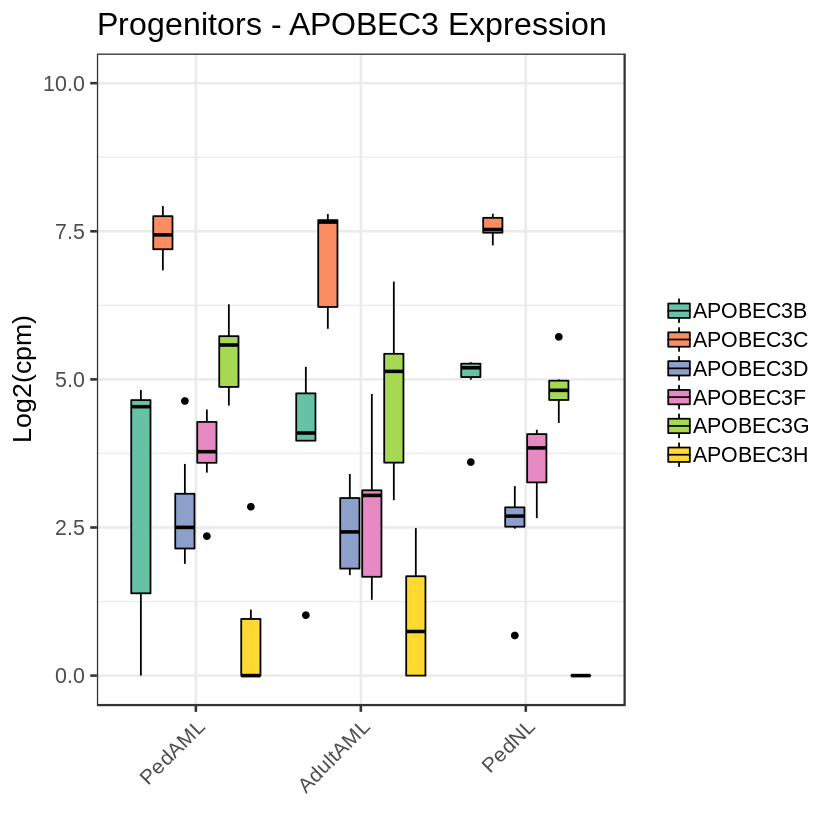

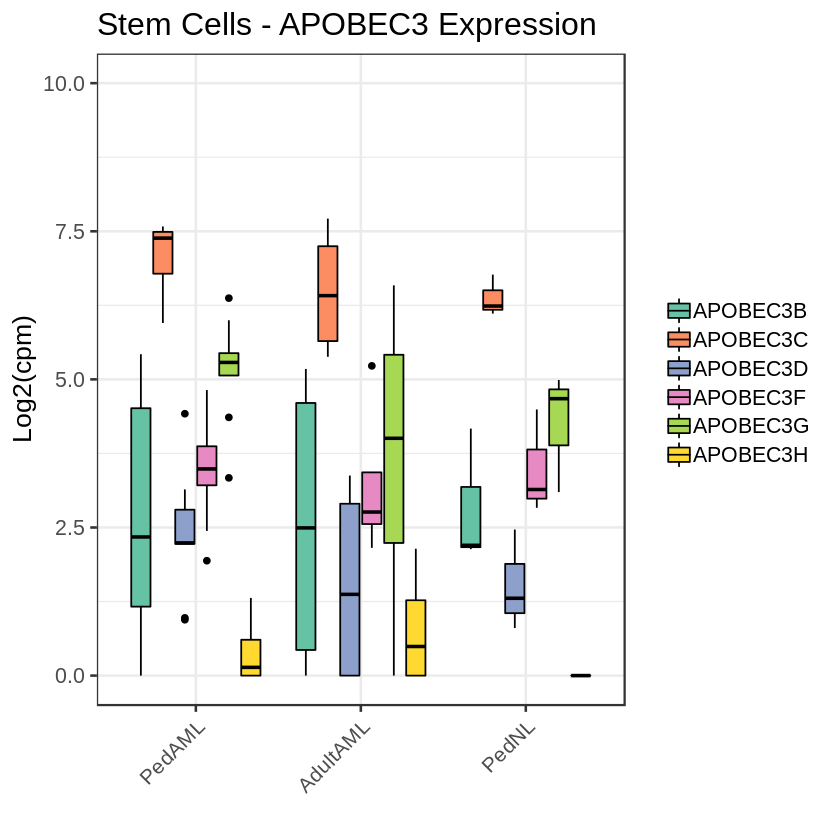

In [50]:
lcpm.Prog.APOBEC3 <- lcpm.Prog.APOBECs[,c(1:16, grep('APOBEC3[BCDFG]', colnames(lcpm.Prog.APOBECs)))]
lcpm.Prog.APOBEC3.m <- melt(lcpm.Prog.APOBEC3[-c(1:14)], id=c("Phenotype"))
lcpm.Prog.APOBEC3.m$variable <- factor(as.character(lcpm.Prog.APOBEC3.m$variable), 
                                      levels=c("APOBEC3B", "APOBEC3C", "APOBEC3D", 
                                              "APOBEC3F", "APOBEC3G", "APOBEC3H"))
lcpm.Prog.APOBEC3.m$value[lcpm.Prog.APOBEC3.m$value < 0] <- 0
colnames(lcpm.Prog.APOBEC3.m)[1]<- "Phenotype"
lcpm.Prog.APOBEC3.m$Phenotype <- factor(as.character(lcpm.Prog.APOBEC3.m$Phenotype),
                                       levels=c("PedAML", "AdultAML", "PedNL"))
lcpm.Stem.APOBEC3 <- lcpm.Stem.APOBECs[,c(1:16, grep('APOBEC3[BCDFG]', colnames(lcpm.Stem.APOBECs)))]
lcpm.Stem.APOBEC3.m <- melt(lcpm.Stem.APOBEC3[-c(1:14)], id=c("Phenotype"))
lcpm.Stem.APOBEC3.m$variable <- factor(as.character(lcpm.Stem.APOBEC3.m$variable), 
                                      levels=c("APOBEC3B", "APOBEC3C", "APOBEC3D", 
                                              "APOBEC3F", "APOBEC3G", "APOBEC3H"))
head(lcpm.Stem.APOBEC3.m)
lcpm.Stem.APOBEC3.m$value[lcpm.Stem.APOBEC3.m$value < 0] <- 0 
colnames(lcpm.Stem.APOBEC3.m)[1]<- "Phenotype"
lcpm.Stem.APOBEC3.m$Phenotype <- factor(as.character(lcpm.Stem.APOBEC3.m$Phenotype),
                                       levels=c("PedAML", "AdultAML", "PedNL"))
#png(file="MPN_Prog_APOBEC3expr_boxplot_04142020.png", width=7, height=7, units='in', res=300)
ggboxplot(lcpm.Prog.APOBEC3.m, x="Phenotype", y="value", fill="variable", ylim=c(0,10), palette="Set2") +
    theme_bw(base_size=16) + ylab("Log2(cpm)") + xlab("") + 
    labs(title="Progenitors - APOBEC3 Expression") + theme(legend.title=element_text(size=0)) + 
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) 
#dev.off()

#png(file="MPN_HSC_APOBEC3expr_boxplot_04142020.png", width=7, height=7, units='in', res=300)
ggboxplot(lcpm.Stem.APOBEC3.m, x="Phenotype", y="value", fill="variable", ylim=c(0,10),palette = "Set2") +
    theme_bw(base_size=16) + xlab("") + ylab("Log2(cpm)") + labs(title="Stem Cells - APOBEC3 Expression") +
    theme(legend.title=element_text(size=0)) + theme(axis.text.x = element_text(angle = 45, hjust = 1))
#dev.off()

In [51]:
lcpm.Prog.APOBEC3C <- do.call(cbind, c(meta2.Prog.filt, lapply(10, function(y)   {
    i <- APOBEC.genes[y,]
    t <- data.frame(as.numeric(lcpm2.Prog[gsub("[.].*$", "", rownames(lcpm2.Prog)) %in% i[1]]))
    colnames(t) <- i[3]
    return(t)
})))
lcpm.Stem.APOBEC3C <- do.call(cbind, c(meta2.Stem.filt, lapply(10, function(y)   {
    i <- APOBEC.genes[y,]
    t <- data.frame(LogCPM=as.numeric(lcpm2.Stem[gsub("[.].*$", "", rownames(lcpm2.Stem)) %in% i[1]]))
    colnames(t)<- i[3]
    return(t)
})))

lcpm.Prog.APOBEC3C$APOBEC3C.expr <- ifelse(lcpm.Prog.APOBEC3C$APOBEC3C > 7.5, "High", "Low")
lcpm.Stem.APOBEC3C$APOBEC3C.expr <- ifelse(lcpm.Stem.APOBEC3C$APOBEC3C > 7.2, "High", "Low")
dim(lcpm.Prog.APOBEC3C)
dim(lcpm.Stem.APOBEC3C)
head(lcpm.Stem.APOBEC3C)
lcpm.APOBEC3C.list <- list(Prog=lcpm.Prog.APOBEC3C, Stem=lcpm.Stem.APOBEC3C)

[1] 20 17

[1] 16 17

SequenceRun                                                SequenceDate
1 ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91 5/5/19      
2 ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91 5/5/19      
3 ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91 5/5/19      
4 ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91 6/26/19     
5 ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91 6/26/19     
6 ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91 6/26/19     
  Sample        SampleName Patient.ID RIN  X        Adult.Pediatric Disease
1 01id38cellHSC 38 HSC     32538      10.0 PedAML   Pediatric       AML    
2 cell05id90HSC 90 HSC     22390      10.0 PedAML   Pediatric       AML    
3 03id78cellHSC 78 HSC     28678      10.0 PedAML   Pediatric       AML    
4 05id00066HSC  66 HSC     22666       7.7 PedAML   Pediatric       AML    
5 04id11474HSC  11474 HSC  11474      10.0 AdultAML Adult           AML    
6 02id11251HSC  11251 HSC  11251       9.3 AdultAML Adult           AML    
  Cell.type Sorted.Cell.Type Tissue.Source RNA.seq.status Reads    Phenotype
1 Stem      34+38-           PB            Completed      81234305 PedAML   
2 Stem      34+38-           BM            Completed      72625632 PedAML   
3 Stem      34+38-           PB            Completed      68483294 PedAML   
4 Stem      34+38-           BM            Completed      77519907 PedAML   
5 Stem      34+38-           PB            Completed      79123032 AdultAML 
6 Stem      34+38-           BM            Completed      81776486 AdultAML 
  APOBEC3C APOBEC3C.expr
1 7.581210 High         
2 7.430531 High         
3 7.489629 High         
4 6.754549 Low          
5 7.713957 High         
6 7.092278 Low

In [52]:
table(lcpm.Prog.APOBEC3$Phenotype)
table(lcpm.Stem.APOBEC3$Phenotype)



  PedAML AdultAML    PedNL 
       9        5        6 


  PedAML AdultAML    PedNL 
       9        4        3 

### Preprocess RNASeq Isoform Count Data and metadata

In [13]:
name <- "iso_comp"
name2 <- "20180417"
iso_rsem_new <- read.csv("../inputs/all_isoforms_results.txt", sep="\t", stringsAsFactors=FALSE)
dim(iso_rsem_new)
iso_counts_new <- iso_rsem_new[,sapply(colnames(iso_rsem_new), function(x) any(grepl(".results_expected_count",x)))]
colnames(iso_counts_new) <- gsub(".isoforms.results_expected_count","", colnames(iso_counts_new))
colnames(iso_counts_new) <- gsub("X09x00020pxPLUSPLUS", "X09x00020xPLUSPLUS", gsub("^cell", "Xcell", 
                                  gsub("_S[0-9]_R1_001","", colnames(iso_counts_new))))
row.names(iso_counts_new) <- iso_rsem_new$transcript_id
head(iso_counts_new)
    
iso_gene_table <- iso_rsem_new[,1:2]


[1] 196520    218

X03id78cellHSC X05pid25376ctHSC X03x11379xHPCxxxxx
ENST00000373020.4 0.0            98                 0.00            
ENST00000494424.1 1.0             0                 0.00            
ENST00000496771.1 0.0             0                 0.00            
ENST00000373031.4 0.0             0                 0.00            
ENST00000485971.1 0.0             0                 0.00            
ENST00000371582.4 9.6             0               218.22            
                  X06id00066PRO X01id38cellHSC X09x00020xPLUSPLUS
ENST00000373020.4   0.00          0.00          0.00             
ENST00000494424.1   0.00          0.00          0.00             
ENST00000496771.1   0.00          0.00          0.00             
ENST00000373031.4   0.00          0.00          0.00             
ENST00000485971.1   0.00          0.00          0.00             
ENST00000371582.4 186.92        121.03         67.75             
                  X04id78cellPROGENITORS X07x00023xPLUSPLUS X02id11251HSC
ENST00000373020.4  0.0                    0.00              3.00         
ENST00000494424.1  0.0                    0.00              0.00         
ENST00000496771.1  0.0                    0.00              0.00         
ENST00000373031.4  0.0                    0.00              0.00         
ENST00000485971.1  0.0                    0.00              0.00         
ENST00000371582.4 54.9                   98.29              9.44         
                  X12x12484xPLUSMINS ⋯ X02id38cellPROGENITORS X01pid24760ctHSC
ENST00000373020.4 284.1              ⋯   0.00                  66.33          
ENST00000494424.1   0.0              ⋯   0.00                   3.67          
ENST00000496771.1  22.9              ⋯   0.00                   0.00          
ENST00000373031.4   0.0              ⋯   0.00                   0.00          
ENST00000485971.1   0.0              ⋯   0.00                   0.00          
ENST00000371582.4 129.7              ⋯ 273.36                 130.79          
                  X13x12488xPLUSMINS X08x00020xPLUSMINS X01id11251HPC
ENST00000373020.4  54.0              482.65              0.00        
ENST00000494424.1   0.0               15.51              0.00        
ENST00000496771.1   0.0              103.85              0.00        
ENST00000373031.4   0.0                0.00              0.00        
ENST00000485971.1   0.0                0.00              0.00        
ENST00000371582.4 299.7                0.00             48.28        
                  X11x00082xPLUSPLUS X14x12488xPLUSPLUS X05x00047xPLUSPLUS
ENST00000373020.4 0                   10.00              18.00            
ENST00000494424.1 0                    0.00               0.00            
ENST00000496771.1 0                    0.00               0.00            
ENST00000373031.4 0                    0.00               0.00            
ENST00000485971.1 0                    0.00               0.00            
ENST00000371582.4 0                  216.17             110.68            
                  X01x00077xPROGENIT X03id11474HPC
ENST00000373020.4  0.00                0.00       
ENST00000494424.1  0.00                0.00       
ENST00000496771.1  0.00                0.00       
ENST00000373031.4  0.00                0.00       
ENST00000485971.1  0.00                0.00       
ENST00000371582.4 20.69              209.64

In [14]:
isos <- AnnotationDbi::select(Homo.sapiens, keys=gsub("[.].*$","", iso_gene_table$gene_id), columns=c("SYMBOL", "ENSEMBL", "ENTREZID"), 
                keytype="ENSEMBL")
iso_gene_table_anno <- cbind(iso_gene_table, isos[match(gsub("[.].*$","", iso_gene_table$gene_id), isos$ENSEMBL),2:3])


'select()' returned many:many mapping between keys and columns



In [15]:
dir(path="../../Jamieson", pattern="gencodev19")

[1] "gencodev19_ANNOT.RData"

In [16]:
load("../../Jamieson/gencodev19_ANNOT.RData")
ANNOT_out <- merge(ANNOT, iso_counts_new, by.x="transcript_id", by.y="row.names", all.y=TRUE)
ANNOT_protein_coding <- subset(ANNOT, gene_type == "protein_coding")
ANNOT_ncRNA <- subset(ANNOT, gene_type %in% c("lincRNA", "antisense", "processed_transcript","sense_overlapping", "sense_intronic") )
#make list of IDs to query
protein_coding_ids <- ANNOT_protein_coding$gene_id
ncRNA_ids <- ANNOT_ncRNA$gene_id

iso_gene_table_anno_pc <- iso_gene_table_anno[gsub("[.].*$","", iso_gene_table_anno$gene_id) %in%
                                             gsub("[.].*$","", protein_coding_ids),]
iso_counts_new_pc <- iso_counts_new[rownames(iso_counts_new) %in% iso_gene_table_anno_pc$transcript_id,]
rownames(iso_counts_new_pc) <- gsub("[.].*$","", rownames(iso_counts_new_pc))


In [17]:
PedAML.Prog.meta <- meta2[which(meta2$X %in% c("PedAML") &
             meta2$Tissue.Source %in% c("BM", "PB") & 
             meta2$Cell.type %in% c("Prog")),]
AdultAML.Prog.meta <- meta2[which(meta2$X %in% c("AdultAML") &
             meta2$Tissue.Source %in% c("BM", "PB") & 
             meta2$Cell.type %in% c("Prog")),]
PedNL.Prog.meta <- meta2[which(meta2$X %in% c("PedNL") &
             meta2$Tissue.Source %in% c("BM", "PB") & 
             meta2$Cell.type %in% c("Prog")),]

PedAML.Prog.samps <- match(paste0("X", PedAML.Prog.meta$Sample), colnames(iso_counts_new_pc))
AdultAML.Prog.samps <- match(paste0("X",AdultAML.Prog.meta$Sample), colnames(iso_counts_new_pc))
PedNL.Prog.samps <- match(paste0("X",PedNL.Prog.meta$Sample), colnames(iso_counts_new_pc))

#PedAML.Prog.samps <- match(gsub("_S[0-9]+$", "", PedAML.Prog.meta$Sample), 
#                       gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))
#AdultAML.Prog.samps <- match(gsub("_S[0-9]+$", "", AdultAML.Prog.meta$Sample),
#                       gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))
#PedNL.Prog.samps <- match(gsub("_S[0-9]+$", "", PedNL.Prog.meta$Sample), 
#                       gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))

In [135]:
dim(PedAML.Prog.meta)
dim(AdultAML.Prog.meta)
dim(PedNL.Prog.meta)
PedAML.Prog.samps
AdultAML.Prog.samps
PedNL.Prog.samps

[1]  9 14

[1]  5 14

[1]  6 14

[1] 27 12  7  4 35  3 33 18 19

[1] 36 31  8  6 32

[1] 34 15 20 25 26 22

In [18]:
#colnames(iso_counts_new)

PedAML.Prog.meta.filt <- meta2.Prog.filt[which(meta2.Prog.filt$X %in% c("PedAML")),]
AdultAML.Prog.meta.filt <- meta2.Prog.filt[which(meta2.Prog.filt$X %in% c("AdultAML")),]
PedNL.Prog.meta.filt <- meta2.Prog.filt[which(meta2.Prog.filt$X %in% c("PedNL")),]

PedAML.Prog.samps.f <- match(paste0("X", PedAML.Prog.meta.filt$Sample), colnames(iso_counts_new_pc))
AdultAML.Prog.samps.f <- match(paste0("X", AdultAML.Prog.meta.filt$Sample), colnames(iso_counts_new_pc))
PedNL.Prog.samps.f <- match(paste0("X", PedNL.Prog.meta.filt$Sample), colnames(iso_counts_new_pc))


In [19]:
PedAML.Stem.meta <- meta2[which(meta2$X %in% c("PedAML") &
             meta2$Tissue.Source %in% c("BM", "PB") & 
             meta2$Cell.type %in% c("Stem")),]
AdultAML.Stem.meta <- meta2[which(meta2$X %in% c("AdultAML") &
             meta2$Tissue.Source %in% c("BM", "PB") & 
             meta2$Cell.type %in% c("Stem")),]
PedNL.Stem.meta <- meta2[which(meta2$X %in% c("PedNL") &
             meta2$Tissue.Source %in% c("BM", "PB") & 
             meta2$Cell.type %in% c("Stem")),]

PedAML.Stem.samps <- match(paste0("X", PedAML.Stem.meta$Sample), colnames(iso_counts_new_pc))
AdultAML.Stem.samps <- match(paste0("X", AdultAML.Stem.meta$Sample), colnames(iso_counts_new_pc))
PedNL.Stem.samps <- match(paste0("X", PedNL.Stem.meta$Sample), colnames(iso_counts_new_pc))

#PedAML.Stem.samps <- match(gsub("_S[0-9]+$", "", PedAML.Stem.meta$Sample), 
#                       gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))
#AdultAML.Stem.samps <- match(gsub("_S[0-9]+$", "", AdultAML.Stem.meta$Sample),
#                       gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))
#PedNL.Stem.samps <- match(gsub("_S[0-9]+$", "", PedNL.Stem.meta$Sample), 
#                       gsub("_S[0-9]+$", "", colnames(iso_counts_new_pc)))

PedAML.Stem.meta.filt <- meta2.Stem.filt[which(meta2.Stem.filt$X %in% c("PedAML")),]
AdultAML.Stem.meta.filt <- meta2.Stem.filt[which(meta2.Stem.filt$X %in% c("AdultAML")),]
PedNL.Stem.meta.filt <- meta2.Stem.filt[which(meta2.Stem.filt$X %in% c("PedNL")),]

PedAML.Stem.samps.f <- match(paste0("X", PedAML.Stem.meta.filt$Sample), colnames(iso_counts_new_pc))
AdultAML.Stem.samps.f <- match(paste0("X", AdultAML.Stem.meta.filt$Sample), colnames(iso_counts_new_pc))
PedNL.Stem.samps.f <- match(paste0("X", PedNL.Stem.meta.filt$Sample), colnames(iso_counts_new_pc))


In [138]:
dim(PedAML.Stem.meta)
dim(AdultAML.Stem.meta)
dim(PedNL.Stem.meta)
PedAML.Stem.samps
AdultAML.Stem.samps
PedNL.Stem.samps
PedAML.Prog.samps.f
AdultAML.Prog.samps.f
PedNL.Prog.samps.f
PedAML.Stem.samps.f
AdultAML.Stem.samps.f
PedNL.Stem.samps.f

[1]  9 14

[1]  4 14

[1]  3 14

[1]  5 11  1 23 24 13 10 29 14

[1] 21  9 30 17

[1] 28 16  2

[1] 27 12  7  4 35  3 33 18 19

[1] 36 31  8  6 32

[1] 34 15 20 25 26 22

[1]  5 11  1 23 24 13 10 29 14

[1] 21  9 30 17

[1] 28 16  2

### Prepare DGELists

In [20]:
iso_counts_filt.Prog.filt <- iso_counts_new_pc[,c(PedAML.Prog.samps.f, AdultAML.Prog.samps.f, PedNL.Prog.samps.f)]
iso_counts_filt.Stem.filt <- iso_counts_new_pc[,c(PedAML.Stem.samps.f, AdultAML.Stem.samps.f, PedNL.Stem.samps.f)]

meta.Prog.filt <- rbind(PedAML.Prog.meta.filt, AdultAML.Prog.meta.filt, PedNL.Prog.meta.filt)
meta.Stem.filt <- rbind(PedAML.Stem.meta.filt, AdultAML.Stem.meta.filt, PedNL.Stem.meta.filt)

id_list.Prog.filt <- gsub("[.].*$","", rownames(iso_counts_filt.Prog.filt))
id_list.Stem.filt <- gsub("[.].*$","", rownames(iso_counts_filt.Stem.filt))
rownames(iso_counts_filt.Prog.filt) <- id_list.Prog.filt
rownames(iso_counts_filt.Stem.filt) <- id_list.Stem.filt

DGE_all.Prog.filt <- DGEList(counts = iso_counts_filt.Prog.filt, lib.size = colSums(iso_counts_filt.Prog.filt),
                      norm.factors = rep(1,ncol(iso_counts_filt.Prog.filt)), samples = meta.Prog.filt,
                      group = meta.Prog.filt$Phenotype, genes = id_list.Prog.filt, remove.zeros = FALSE) 
DGE_all.Prog.filt$genes[,2:3] <- iso_gene_table_anno_pc[match(gsub("[.].*$","", iso_gene_table_anno_pc$transcript_id),
                                          id_list.Prog.filt),c("ENTREZID","SYMBOL")]

DGE_all.Stem.filt <- DGEList(counts = iso_counts_filt.Stem.filt, lib.size = colSums(iso_counts_filt.Stem.filt),
                      norm.factors = rep(1,ncol(iso_counts_filt.Stem.filt)), samples = meta.Stem.filt,
                      group = meta.Stem.filt$Phenotype, genes = id_list.Stem.filt, remove.zeros = FALSE) 
DGE_all.Stem.filt$genes[,2:3] <- iso_gene_table_anno_pc[match(gsub("[.].*$","", iso_gene_table_anno_pc$transcript_id)
                                                         ,id_list.Stem.filt),c("ENTREZID","SYMBOL")]

cpm.Prog.filt <- cpm(DGE_all.Prog.filt)
lcpm.Prog.filt <- cpm(DGE_all.Prog.filt, log=TRUE)
DGE_all.Prog.unfilt <- calcNormFactors(DGE_all.Prog.filt, method="TMM")
lcpm.Prog.unfilt <- cpm(DGE_all.Prog.unfilt, log=TRUE)
keep.exprs.Prog.filt <- rowSums(cpm.Prog.filt>1)>=10
DGE_all.Prog.filt <- DGE_all.Prog.filt[keep.exprs.Prog.filt,, keep.lib.sizes=FALSE]
DGE_all.Prog.filt <- calcNormFactors(DGE_all.Prog.filt, method = "TMM")

lcpm2.Prog.filt <- cpm(DGE_all.Prog.filt, log=TRUE)

cpm.Stem.filt <- cpm(DGE_all.Stem.filt)
lcpm.Stem.filt <- cpm(DGE_all.Stem.filt, log=TRUE)
DGE_all.Stem.unfilt <- calcNormFactors(DGE_all.Stem.filt, method="TMM")
lcpm.Stem.unfilt <- cpm(DGE_all.Stem.unfilt, log=TRUE)
keep.exprs.Stem.filt <- rowSums(cpm.Stem.filt>1)>=7
DGE_all.Stem.filt <- DGE_all.Stem.filt[keep.exprs.Stem.filt,, keep.lib.sizes=FALSE]
DGE_all.Stem.filt <- calcNormFactors(DGE_all.Stem.filt, method = "TMM")

lcpm2.Stem.filt <- cpm(DGE_all.Stem.filt, log=TRUE)

In [21]:
DGE_all.Prog.unfilt <- DGEList(counts = iso_counts_filt.Prog.filt, lib.size = colSums(iso_counts_filt.Prog.filt),
                      norm.factors = rep(1,ncol(iso_counts_filt.Prog.filt)), samples = meta.Prog.filt,
                      group = meta.Prog.filt$Phenotype, genes = id_list.Prog.filt, remove.zeros = FALSE) 
DGE_all.Prog.unfilt$genes[,2:3] <- iso_gene_table_anno_pc[match(gsub("[.].*$","", iso_gene_table_anno_pc$transcript_id),
                                          id_list.Prog.filt),c("ENTREZID","SYMBOL")]

DGE_all.Stem.unfilt <- DGEList(counts = iso_counts_filt.Stem.filt, lib.size = colSums(iso_counts_filt.Stem.filt),
                      norm.factors = rep(1,ncol(iso_counts_filt.Stem.filt)), samples = meta.Stem.filt,
                      group = meta.Stem.filt$Phenotype, genes = id_list.Stem.filt, remove.zeros = FALSE) 
DGE_all.Stem.unfilt$genes[,2:3] <- iso_gene_table_anno_pc[match(gsub("[.].*$","", iso_gene_table_anno_pc$transcript_id)
                                                         ,id_list.Stem.filt),c("ENTREZID","SYMBOL")]

DGE_all.Prog.unfilt <- calcNormFactors(DGE_all.Prog.unfilt, method = "TMM")

lcpm2.Prog.unfilt <- cpm(DGE_all.Prog.unfilt, log=TRUE)

DGE_all.Stem.unfilt <- calcNormFactors(DGE_all.Stem.unfilt, method = "TMM")

lcpm2.Stem.unfilt <- cpm(DGE_all.Stem.unfilt, log=TRUE)

In [22]:
iso_counts_filt.Ped.Prog.filt <- iso_counts_new_pc[,c(PedAML.Prog.samps.f, PedNL.Prog.samps.f)]
iso_counts_filt.Ped.Stem.filt <- iso_counts_new_pc[,c(PedAML.Stem.samps.f, PedNL.Stem.samps.f)]

meta.Ped.Prog.filt <- rbind(PedAML.Prog.meta.filt, PedNL.Prog.meta.filt)
meta.Ped.Stem.filt <- rbind(PedAML.Stem.meta.filt, PedNL.Stem.meta.filt)

id_list.Ped.Prog.filt <- gsub("[.].*$","", rownames(iso_counts_filt.Ped.Prog.filt))
id_list.Ped.Stem.filt <- gsub("[.].*$","", rownames(iso_counts_filt.Ped.Stem.filt))
rownames(iso_counts_filt.Ped.Prog.filt) <- id_list.Ped.Prog.filt
rownames(iso_counts_filt.Ped.Stem.filt) <- id_list.Ped.Stem.filt

DGE_Ped.Prog.filt <- DGEList(counts = iso_counts_filt.Ped.Prog.filt, lib.size = colSums(iso_counts_filt.Ped.Prog.filt),
                      norm.factors = rep(1,ncol(iso_counts_filt.Ped.Prog.filt)), samples = meta.Ped.Prog.filt,
                      group = meta.Ped.Prog.filt$Phenotype, genes = id_list.Ped.Prog.filt, remove.zeros = FALSE) 
DGE_Ped.Prog.filt$genes[,2:3] <- iso_gene_table_anno_pc[match(gsub("[.].*$","", iso_gene_table_anno_pc$transcript_id),
                                          id_list.Ped.Prog.filt),c("ENTREZID","SYMBOL")]

DGE_Ped.Stem.filt <- DGEList(counts = iso_counts_filt.Ped.Stem.filt, lib.size = colSums(iso_counts_filt.Ped.Stem.filt),
                      norm.factors = rep(1,ncol(iso_counts_filt.Ped.Stem.filt)), samples = meta.Ped.Stem.filt,
                      group = meta.Ped.Stem.filt$Phenotype, genes = id_list.Ped.Stem.filt, remove.zeros = FALSE) 
DGE_Ped.Stem.filt$genes[,2:3] <- iso_gene_table_anno_pc[match(gsub("[.].*$","", iso_gene_table_anno_pc$transcript_id)
                                                         ,id_list.Ped.Stem.filt),c("ENTREZID","SYMBOL")]

cpm.Ped.Prog.filt <- cpm(DGE_Ped.Prog.filt)
lcpm.Prog.filt <- cpm(DGE_Ped.Prog.filt, log=TRUE)
keep.exprs.Ped.Prog.filt <- rowSums(cpm.Ped.Prog.filt>1)>=8
DGE_Ped.Prog.filt <- DGE_Ped.Prog.filt[keep.exprs.Ped.Prog.filt,, keep.lib.sizes=FALSE]
DGE_Ped.Prog.filt <- calcNormFactors(DGE_Ped.Prog.filt, method = "TMM")

lcpm2.Ped.Prog.filt <- cpm(DGE_Ped.Prog.filt, log=TRUE)

cpm.Ped.Stem.filt <- cpm(DGE_Ped.Stem.filt)
lcpm.Ped.Stem.filt <- cpm(DGE_Ped.Stem.filt, log=TRUE)
keep.exprs.Ped.Stem.filt <- rowSums(cpm.Ped.Stem.filt>1)>=6
DGE_Ped.Stem.filt <- DGE_Ped.Stem.filt[keep.exprs.Ped.Stem.filt,, keep.lib.sizes=FALSE]
DGE_Ped.Stem.filt <- calcNormFactors(DGE_Ped.Stem.filt, method = "TMM")

lcpm2.Ped.Stem.filt <- cpm(DGE_Ped.Stem.filt, log=TRUE)

In [24]:
meta.Prog.filt

SequenceRun                                                SequenceDate
2  ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91 5/5/19      
4  ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91 5/5/19      
6  ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91 5/5/19      
8  ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91 6/26/19     
13 ca_ne_630_001_400_060_JAMIESON_SN_human-ensembl-grch38-r91 8/31/19     
15 ca_ne_630_001_400_060_JAMIESON_SN_human-ensembl-grch38-r91 8/31/19     
26 ca_ne_650_001_360_060_JAMIESON_SN_human-ensembl-grch38-r91 9/1/19      
27 ca_ne_650_001_360_060_JAMIESON_SN_human-ensembl-grch38-r91 9/1/19      
29 ca_ne_650_001_360_060_JAMIESON_SN_human-ensembl-grch38-r91 9/1/19      
10 ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91 6/26/19     
12 ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91 6/26/19     
19 ca_ne_645_001_300_060_JAMIESON_SN_human-ensembl-grch38-r91 8/31/19     
21 ca_ne_645_001_300_060_JAMIESON_SN_human-ensembl-grch38-r91 8/31/19     
23 ca_ne_645_001_300_060_JAMIESON_SN_human-ensembl-grch38-r91 8/31/19     
17 ca_ne_630_001_400_060_JAMIESON_SN_human-ensembl-grch38-r91 8/31/19     
18 ca_ne_630_001_400_060_JAMIESON_SN_human-ensembl-grch38-r91 8/31/19     
30 ca_ne_650_001_360_060_JAMIESON_SN_human-ensembl-grch38-r91 9/1/19      
32 ca_ne_714_001_400_070_JAMIESON_SN_human-ensembl-grch38-r91 12/19/19    
34 ca_ne_714_001_400_070_JAMIESON_SN_human-ensembl-grch38-r91 12/19/19    
36 ca_ne_714_001_400_070_JAMIESON_SN_human-ensembl-grch38-r91 12/19/19    
   Sample                SampleName     Patient.ID RIN  X       
2  02id38cellPROGENITORS 38 Progenitors 32538       9.7 PedAML  
4  06id90cellPROGENITORS 90 Progenitors 22390      10.0 PedAML  
6  04id78cellPROGENITORS 78 Progenitors 28678      10.0 PedAML  
8  06id00066PRO          66 Progenitors 22666       9.8 PedAML  
13 01x00077xPROGENIT     77 Progenitors 27177       9.8 PedAML  
15 03x11379xHPCxxxxx     11379 HPC      11379       9.7 PedAML  
26 14x12488xPLUSPLUS     12488 PlPl     12488       9.8 PedAML  
27 15x12584xPLUSPLUS     12584 PlPl     12584       9.8 PedAML  
29 17x12451xPLUSPLUS     12451 PlPl     12451       9.9 PedAML  
10 03id11474HPC          11474 HPC      11474       9.6 AdultAML
12 01id11251HPC          11251 HPC      11251       9.3 AdultAML
19 07x00023xPLUSPLUS     23 PlPl         7023       8.2 AdultAML
21 09x00020xPLUSPLUS     20 PlPl        11220       8.5 AdultAML
23 11x00082xPLUSPLUS     82 PlPl        12682       9.9 AdultAML
17 05x00047xPLUSPLUS     47 PlPl        12747       9.8 PedNL   
18 06x00077xPLUSPLUS     77 PlPl        17677       9.6 PedNL   
30 18x10720xPLUSPLUS     10720 PlPl     10720      10.0 PedNL   
32 02pid24760ctHPC       24760 HPC      24760       9.9 PedNL   
34 04pid24474ctHPC       24474 HPC      24474       9.9 PedNL   
36 06pid25376ctHPC       25376 HPC      25376       9.7 PedNL   
   Adult.Pediatric Disease      Cell.type Sorted.Cell.Type Tissue.Source
2  Pediatric       AML          Prog      34+38+           PB           
4  Pediatric       AML          Prog      34+38+           BM           
6  Pediatric       AML          Prog      34+38+           PB           
8  Pediatric       AML          Prog      34+38+           BM           
13 Pediatric       AML          Prog      34+38+           BM           
15 Pediatric       AML          Prog      34+38+           PB           
26 Pediatric       AML          Prog      34+38+           PB           
27 Pediatric       AML          Prog      34+38+           PB           
29 Pediatric       AML          Prog      34+38+           PB           
10 Adult           AML          Prog      34+38+           PB           
12 Adult           AML          Prog      34+38+           BM           
19 Adult           AML          Prog      34+38+           BM           
21 Adult           AML          Prog      34+38+           BM           
23 Adult           AML          Prog     

In [64]:
dim(lcpm.Prog.filt)
colnames(lcpm.Prog.filt)
DGE_all.Prog.filt$samples
dim(lcpm.Stem.filt)
colnames(lcpm.Stem.filt)
DGE_all.Stem.filt$samples

[1] 145641     20

[1] "X02id38cellPROGENITORS" "X06id90cellPROGENITORS" "X04id78cellPROGENITORS"
 [4] "X06id00066PRO"          "X01x00077xPROGENIT"     "X03x11379xHPCxxxxx"    
 [7] "X14x12488xPLUSPLUS"     "X15x12584xPLUSPLUS"     "X17x12451xPLUSPLUS"    
[10] "X03id11474HPC"          "X01id11251HPC"          "X07x00023xPLUSPLUS"    
[13] "X09x00020xPLUSPLUS"     "X11x00082xPLUSPLUS"     "X05x00047xPLUSPLUS"    
[16] "X06x00077xPLUSPLUS"     "X18x10720xPLUSPLUS"     "X02pid24760ctHPC"      
[19] "X04pid24474ctHPC"       "X06pid25376ctHPC"

group    lib.size norm.factors
X02id38cellPROGENITORS PedAML   33237102 0.9197734   
X06id90cellPROGENITORS PedAML   32460538 0.9019910   
X04id78cellPROGENITORS PedAML   40861213 0.8798325   
X06id00066PRO          PedAML   29302338 1.1557449   
X01x00077xPROGENIT     PedAML   28516316 0.9595150   
X03x11379xHPCxxxxx     PedAML   41346385 1.0871560   
X14x12488xPLUSPLUS     PedAML   46661382 1.1217883   
X15x12584xPLUSPLUS     PedAML   37201819 0.8801821   
X17x12451xPLUSPLUS     PedAML   39879055 0.9573069   
X03id11474HPC          AdultAML 23834204 1.0157258   
X01id11251HPC          AdultAML 23130984 0.8475699   
X07x00023xPLUSPLUS     AdultAML 32521806 1.1356905   
X09x00020xPLUSPLUS     AdultAML 30208942 0.9930184   
X11x00082xPLUSPLUS     AdultAML 45913929 0.6714378   
X05x00047xPLUSPLUS     PedNL    36102659 1.0794001   
X06x00077xPLUSPLUS     PedNL    60496307 1.1893689   
X18x10720xPLUSPLUS     PedNL    43115436 1.0551908   
X02pid24760ctHPC       PedNL    44259203 1.1308594   
X04pid24474ctHPC       PedNL    42073744 1.0756745   
X06pid25376ctHPC       PedNL    46275530 1.1191338   
                       SequenceRun                                               
X02id38cellPROGENITORS ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91
X06id90cellPROGENITORS ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91
X04id78cellPROGENITORS ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91
X06id00066PRO          ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91
X01x00077xPROGENIT     ca_ne_630_001_400_060_JAMIESON_SN_human-ensembl-grch38-r91
X03x11379xHPCxxxxx     ca_ne_630_001_400_060_JAMIESON_SN_human-ensembl-grch38-r91
X14x12488xPLUSPLUS     ca_ne_650_001_360_060_JAMIESON_SN_human-ensembl-grch38-r91
X15x12584xPLUSPLUS     ca_ne_650_001_360_060_JAMIESON_SN_human-ensembl-grch38-r91
X17x12451xPLUSPLUS     ca_ne_650_001_360_060_JAMIESON_SN_human-ensembl-grch38-r91
X03id11474HPC          ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91
X01id11251HPC          ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91
X07x00023xPLUSPLUS     ca_ne_645_001_300_060_JAMIESON_SN_human-ensembl-grch38-r91
X09x00020xPLUSPLUS     ca_ne_645_001_300_060_JAMIESON_SN_human-ensembl-grch38-r91
X11x00082xPLUSPLUS     ca_ne_645_001_300_060_JAMIESON_SN_human-ensembl-grch38-r91
X05x00047xPLUSPLUS     ca_ne_630_001_400_060_JAMIESON_SN_human-ensembl-grch38-r91
X06x00077xPLUSPLUS     ca_ne_630_001_400_060_JAMIESON_SN_human-ensembl-grch38-r91
X18x10720xPLUSPLUS     ca_ne_650_001_360_060_JAMIESON_SN_human-ensembl-grch38-r91
X02pid24760ctHPC       ca_ne_714_001_400_070_JAMIESON_SN_human-ensembl-grch38-r91
X04pid24474ctHPC       ca_ne_714_001_400_070_JAMIESON_SN_human-ensembl-grch38-r91
X06pid25376ctHPC       ca_ne_714_001_400_070_JAMIESON_SN_human-ensembl-grch38-r91
                       SequenceDate Sample                SampleName    
X02id38cellPROGENITORS 5/5/19       02id38cellPROGENITORS 38 Progenitors
X06id90cellPROGENITORS 5/5/19       06id90cellPROGENITORS 90 Progenitors
X04id78cellPROGENITORS 5/5/19       04id78cellPROGENITORS 78 Progenitors
X06id00066PRO          6/26/19      06id00066PRO          66 Progenitors
X01x00077xPROGENIT     8/31/19      01x00077xPROGENIT     77 Progenitors
X03x11379xHPCxxxxx     8/31/19      03x11379xHPCxxxxx     11379 HPC     
X14x12488xPLUSPLUS     9/1/19       14x12488xPLUSPLUS     12488 PlPl    
X15x12584xPLUSPLUS     9/1/19       15x12584xPLUSPLUS     12584 PlPl    
X17x12451xPLUSPLUS     9/1/19       17x12451xPLUSPLUS     12451 PlPl    
X03id11474HPC          6/26/19      03id11474HPC          11474 HPC     
X01id11251HPC          6/26/19      01id11251HPC          11251 HPC     
X07x00023xPLUSPLUS     8/31/19      07x00023xPLUSPLUS     23 PlPl       
X09x00020xPLUSPLUS     8/31/19      09x00020xPLUSPLUS     20 PlPl       
X11x00082xPLUSPLUS     8/31/19      11x00082xPLUSPLUS     82 PlPl       
X05x00047xPLUSPLUS     8/31/19      05x00047xPLUSPLUS     47 PlPl       

[1] 145641     16

[1] "X01id38cellHSC"     "Xcell05id90HSC"     "X03id78cellHSC"    
 [4] "X05id00066HSC"      "X02x11379xHSCxxxxx" "X04x00068xPLUSMINS"
 [7] "X12x12484xPLUSMINS" "X13x12488xPLUSMINS" "X16x12451xPLUSMINS"
[10] "X04id11474HSC"      "X02id11251HSC"      "X08x00020xPLUSMINS"
[13] "X10x00082xPLUSMINS" "X01pid24760ctHSC"   "X03pid24474ctHSC"  
[16] "X05pid25376ctHSC"

group    lib.size norm.factors
X01id38cellHSC     PedAML   40240587 0.9765974   
Xcell05id90HSC     PedAML   32125831 0.9041357   
X03id78cellHSC     PedAML   28097760 0.8407758   
X05id00066HSC      PedAML   15502308 1.1259891   
X02x11379xHSCxxxxx PedAML   43631784 0.9488029   
X04x00068xPLUSMINS PedAML   23804733 1.0540963   
X12x12484xPLUSMINS PedAML   40964640 0.8516928   
X13x12488xPLUSMINS PedAML   29835837 1.0897160   
X16x12451xPLUSMINS PedAML   21796191 1.0413158   
X04id11474HSC      AdultAML 24972267 1.0142567   
X02id11251HSC      AdultAML 21561744 0.9702824   
X08x00020xPLUSMINS AdultAML 25593715 1.0715450   
X10x00082xPLUSMINS AdultAML 24052552 0.7650085   
X01pid24760ctHSC   PedNL    38156224 1.0826982   
X03pid24474ctHSC   PedNL    28798974 1.0137951   
X05pid25376ctHSC   PedNL    14887800 1.3977228   
                   SequenceRun                                               
X01id38cellHSC     ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91
Xcell05id90HSC     ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91
X03id78cellHSC     ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91
X05id00066HSC      ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91
X02x11379xHSCxxxxx ca_ne_630_001_400_060_JAMIESON_SN_human-ensembl-grch38-r91
X04x00068xPLUSMINS ca_ne_630_001_400_060_JAMIESON_SN_human-ensembl-grch38-r91
X12x12484xPLUSMINS ca_ne_645_001_300_060_JAMIESON_SN_human-ensembl-grch38-r91
X13x12488xPLUSMINS ca_ne_650_001_360_060_JAMIESON_SN_human-ensembl-grch38-r91
X16x12451xPLUSMINS ca_ne_650_001_360_060_JAMIESON_SN_human-ensembl-grch38-r91
X04id11474HSC      ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91
X02id11251HSC      ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91
X08x00020xPLUSMINS ca_ne_645_001_300_060_JAMIESON_SN_human-ensembl-grch38-r91
X10x00082xPLUSMINS ca_ne_645_001_300_060_JAMIESON_SN_human-ensembl-grch38-r91
X01pid24760ctHSC   ca_ne_714_001_400_070_JAMIESON_SN_human-ensembl-grch38-r91
X03pid24474ctHSC   ca_ne_714_001_400_070_JAMIESON_SN_human-ensembl-grch38-r91
X05pid25376ctHSC   ca_ne_714_001_400_070_JAMIESON_SN_human-ensembl-grch38-r91
                   SequenceDate Sample            SampleName Patient.ID RIN 
X01id38cellHSC     5/5/19       01id38cellHSC     38 HSC     32538      10.0
Xcell05id90HSC     5/5/19       cell05id90HSC     90 HSC     22390      10.0
X03id78cellHSC     5/5/19       03id78cellHSC     78 HSC     28678      10.0
X05id00066HSC      6/26/19      05id00066HSC      66 HSC     22666       7.7
X02x11379xHSCxxxxx 8/31/19      02x11379xHSCxxxxx 11379 HSC  11379       9.6
X04x00068xPLUSMINS 8/31/19      04x00068xPLUSMINS  68PlMn    11868       6.8
X12x12484xPLUSMINS 8/31/19      12x12484xPLUSMINS 12484 PlMn 12584       9.9
X13x12488xPLUSMINS 9/1/19       13x12488xPLUSMINS 12488 PlMn 12488       7.8
X16x12451xPLUSMINS 9/1/19       16x12451xPLUSMINS 12451 PlMn 12451       8.7
X04id11474HSC      6/26/19      04id11474HSC      11474 HSC  11474      10.0
X02id11251HSC      6/26/19      02id11251HSC      11251 HSC  11251       9.3
X08x00020xPLUSMINS 8/31/19      08x00020xPLUSMINS 20 PlMn    11220       7.3
X10x00082xPLUSMINS 8/31/19      10x00082xPLUSMINS 82 PlMn    12682       9.9
X01pid24760ctHSC   12/19/19     01pid24760ctHSC   24760 HSC  24760       9.1
X03pid24474ctHSC   12/19/19     03pid24474ctHSC   24474 HSC  24474      10.0
X05pid25376ctHSC   12/19/19     05pid25376ctHSC   25376 HSC  25376       8.8
                   X        Adult.Pediatric Disease      Cell.type
X01id38cellHSC     PedAML   Pediatric       AML          Stem     
Xcell05id90HSC     PedAML   Pediatric       AML          Stem     
X03id78cellHSC     PedAML   Pediatric       AML          Stem     
X05id00066HSC      PedAML   Pediatric       AML          Stem     
X02x11379xHSCxxxxx PedAML   Pediatric       AML          Stem     
X04x00068xPLUSMINS PedAML   Pediatric       AML          Stem     
X12x12484xPLUSMINS PedAML   Pediatric       AML          Stem    

In [23]:
designModel.Prog = model.matrix(~0 + DGE_all.Prog.filt$samples$group)
levels(DGE_all.Prog.filt$samples$group)
rownames(designModel.Prog) <- rownames(DGE_all.Prog.filt$samples) # or potentially rownames(designDf)
colnames(designModel.Prog) <- levels(DGE_all.Prog.filt$samples$group)

designModel.Stem = model.matrix(~0 + DGE_all.Stem.filt$samples$group)
levels(DGE_all.Stem.filt$samples$group)
rownames(designModel.Stem) <- rownames(DGE_all.Stem.filt$samples) # or potentially rownames(designDf)
colnames(designModel.Stem) <- levels(DGE_all.Stem.filt$samples$group)

contrastMatrix.prog = makeContrasts(PedAMLvsAdultAML = PedAML - AdultAML, 
                                     PedAMLvsPedNL = PedAML - PedNL,
                                     levels=colnames(designModel.Prog))

contrastMatrix.stem = makeContrasts(PedAMLvsAdultAML = PedAML - AdultAML, 
                                     PedAMLvsPedNL = PedAML - PedNL,
                                     levels=colnames(designModel.Stem))


[1] "PedAML"   "AdultAML" "PedNL"

[1] "PedAML"   "AdultAML" "PedNL"

In [43]:
voomResult.prog = voom(DGE_all.Prog.filt, designModel.Prog, plot=FALSE)
voomResult.stem = voom(DGE_all.Stem.filt, designModel.Stem, plot=FALSE)
voomedFit.prog = lmFit(voomResult.prog, designModel.Prog)
voomedFit.stem = lmFit(voomResult.stem, designModel.Stem)
voomedFitForContrasts.prog = contrasts.fit(voomedFit.prog, contrasts=contrastMatrix.prog)
voomedFitForContrasts.stem = contrasts.fit(voomedFit.stem, contrasts=contrastMatrix.stem)
moderatedVoomedFitForContrasts.prog = eBayes(voomedFitForContrasts.prog)
moderatedVoomedFitForContrasts.stem = eBayes(voomedFitForContrasts.stem)

In [44]:
gMultipleTestingStrategy = "global"
moderatedVoomedFitForContrastsWithLogFcThreshold.prog = treat(moderatedVoomedFitForContrasts.prog)
moderatedVoomedFitForContrastsWithLogFcThreshold.stem = treat(moderatedVoomedFitForContrasts.stem)
gLogThresholdedTestResults.prog = decideTests(moderatedVoomedFitForContrasts.prog)
gLogThresholdedTestResults.stem = decideTests(moderatedVoomedFitForContrasts.stem)
summary(gLogThresholdedTestResults.prog, method=gMultipleTestingStrategy)
summary(gLogThresholdedTestResults.stem, method=gMultipleTestingStrategy)

topTable_iso_PedAMLvsAdultAML_Prog <- topTable(moderatedVoomedFitForContrasts.prog, coef=1, n=Inf)
topTable_iso_PedAMLvsPedNL_Prog <- topTable(moderatedVoomedFitForContrasts.prog, coef=2, n=Inf)
topTable_iso_PedAMLvsAdultAML_Stem <- topTable(moderatedVoomedFitForContrasts.stem, coef=1, n=Inf)
topTable_iso_PedAMLvsPedNL_Stem <- topTable(moderatedVoomedFitForContrasts.stem, coef=2, n=Inf)
head(topTable_iso_PedAMLvsAdultAML_Prog)

       PedAMLvsAdultAML PedAMLvsPedNL
Down               5638         12443
NotSig            21262         15708
Up                 7037          5786

       PedAMLvsAdultAML PedAMLvsPedNL
Down               4232          5840
NotSig            25913         23366
Up                 4838          5777

genes           ENTREZID SYMBOL logFC      AveExpr  t        
ENST00000328306 ENST00000328306 84679    SLC9A7   7.996642 4.811055  16.18374
ENST00000397043 ENST00000397043 489      ATP2A3  14.339711 3.519161  15.84295
ENST00000565010 ENST00000565010 6650     CAPN15 -16.016076 1.544834 -16.17016
ENST00000245458 ENST00000245458 6235     RPS29   -9.889936 5.636295 -15.73672
ENST00000262306 ENST00000262306 6923     ELOB    -7.514265 5.404361 -15.49696
ENST00000538539 ENST00000538539 8648     NCOA1   12.894068 5.210127  14.85049
                P.Value      adj.P.Val    B       
ENST00000328306 1.262554e-12 1.177943e-08 17.12968
ENST00000397043 1.847014e-12 1.177943e-08 16.85781
ENST00000565010 1.281666e-12 1.177943e-08 16.33302
ENST00000245458 2.082582e-12 1.177943e-08 16.31382
ENST00000262306 2.737721e-12 1.327286e-08 16.12704
ENST00000538539 5.830540e-12 1.989936e-08 16.01611

In [45]:
topTable_iso_PedAMLvsPedNL_Prog[topTable_iso_PedAMLvsPedNL_Prog$SYMBOL %in% "MCL1",]
topTable_iso_PedAMLvsAdultAML_Prog[topTable_iso_PedAMLvsAdultAML_Prog$SYMBOL %in% "MCL1",]

genes           ENTREZID SYMBOL logFC    AveExpr  t       
ENST00000369026 ENST00000369026 4170     MCL1   7.414628 9.417995 4.885976
ENST00000464132 ENST00000464132 4170     MCL1   5.658874 4.582946 3.437012
ENST00000307940 ENST00000307940 4170     MCL1   5.779699 2.060645 3.142150
                P.Value     adj.P.Val    B        
ENST00000369026 0.000100548 0.0004006924  1.459116
ENST00000464132 0.002739680 0.0069629680 -1.584666
ENST00000307940 0.005330245 0.0123932945 -2.152565

genes           ENTREZID SYMBOL logFC      AveExpr  t         
ENST00000307940 ENST00000307940 4170     MCL1   -3.5423087 2.060645 -1.9737839
ENST00000464132 ENST00000464132 4170     MCL1    1.9742572 4.582946  1.1330414
ENST00000369026 ENST00000369026 4170     MCL1   -0.5381149 9.417995 -0.3350641
                P.Value   adj.P.Val B        
ENST00000307940 0.0630164 0.1303540 -4.334288
ENST00000464132 0.2711890 0.3927512 -5.478826
ENST00000369026 0.7412205 0.8096170 -6.043294

## Create PCA plot for PedAML and PedNL Progenitors and Stem Cells based on Expressed/High Variance Isoforms of Genes with Differential Splicing Events
* Identify genes with differential splicing events
* Filter for isoforms which are expressed and have greater variance than the median
    * Need to make new Dge List and normalize counts for PedAML and PedNL Samples in Progenitors and Stem

In [24]:
iso_counts_filt.Prog.Stem <- iso_counts_new_pc[,c(PedAML.Prog.samps.f, PedNL.Prog.samps.f, 
                                                  PedAML.Stem.samps.f, PedNL.Stem.samps.f)]

meta.Prog.Stem <- rbind(PedAML.Prog.meta.filt, PedNL.Prog.meta.filt,
                        PedAML.Stem.meta.filt, PedNL.Stem.meta.filt)
meta.Prog.Stem$Phenotype.cell <- paste0(meta.Prog.Stem$Cell.type, ".", meta.Prog.Stem$Phenotype)
meta.Prog.Stem$Patient.cell <- paste0(meta.Prog.Stem$Cell.type, ".", meta.Prog.Stem$Patient.ID)
meta.Prog.Stem
id_list.Prog.Stem <- gsub("[.].*$","", rownames(iso_counts_filt.Prog.Stem))
rownames(iso_counts_filt.Prog.Stem) <- id_list.Prog.Stem

DGE_PedAML_PedNL.Prog.Stem <- DGEList(counts = iso_counts_filt.Prog.Stem, lib.size = colSums(iso_counts_filt.Prog.Stem),
                      norm.factors = rep(1,ncol(iso_counts_filt.Prog.Stem)), samples = meta.Prog.Stem,
                      group = meta.Prog.Stem$Phenotype, genes = id_list.Prog.Stem, remove.zeros = FALSE) 
DGE_PedAML_PedNL.Prog.Stem$genes[,2:3] <- iso_gene_table_anno_pc[match(gsub("[.].*$","", iso_gene_table_anno_pc$transcript_id),
                                          id_list.Prog.Stem),c("ENTREZID","SYMBOL")]

cpm.Prog.Stem <- cpm(DGE_PedAML_PedNL.Prog.Stem)
lcpm.Prog.Stem <- cpm(DGE_PedAML_PedNL.Prog.Stem, log=TRUE)
keep.exprs.Prog.Stem <- rowSums(cpm.Prog.Stem>1)>=9
DGE_PedAML_PedNL.Prog.Stem <- DGE_PedAML_PedNL.Prog.Stem[keep.exprs.Prog.Stem,, keep.lib.sizes=FALSE]

lcpm2.Prog.Stem <- cpm(DGE_PedAML_PedNL.Prog.Stem, log=TRUE)
dim(lcpm2.Prog.Stem)


SequenceRun                                                SequenceDate
2  ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91 5/5/19      
4  ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91 5/5/19      
6  ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91 5/5/19      
8  ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91 6/26/19     
13 ca_ne_630_001_400_060_JAMIESON_SN_human-ensembl-grch38-r91 8/31/19     
15 ca_ne_630_001_400_060_JAMIESON_SN_human-ensembl-grch38-r91 8/31/19     
26 ca_ne_650_001_360_060_JAMIESON_SN_human-ensembl-grch38-r91 9/1/19      
27 ca_ne_650_001_360_060_JAMIESON_SN_human-ensembl-grch38-r91 9/1/19      
29 ca_ne_650_001_360_060_JAMIESON_SN_human-ensembl-grch38-r91 9/1/19      
17 ca_ne_630_001_400_060_JAMIESON_SN_human-ensembl-grch38-r91 8/31/19     
18 ca_ne_630_001_400_060_JAMIESON_SN_human-ensembl-grch38-r91 8/31/19     
30 ca_ne_650_001_360_060_JAMIESON_SN_human-ensembl-grch38-r91 9/1/19      
32 ca_ne_714_001_400_070_JAMIESON_SN_human-ensembl-grch38-r91 12/19/19    
34 ca_ne_714_001_400_070_JAMIESON_SN_human-ensembl-grch38-r91 12/19/19    
36 ca_ne_714_001_400_070_JAMIESON_SN_human-ensembl-grch38-r91 12/19/19    
1  ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91 5/5/19      
3  ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91 5/5/19      
5  ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91 5/5/19      
7  ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91 6/26/19     
14 ca_ne_630_001_400_060_JAMIESON_SN_human-ensembl-grch38-r91 8/31/19     
16 ca_ne_630_001_400_060_JAMIESON_SN_human-ensembl-grch38-r91 8/31/19     
24 ca_ne_645_001_300_060_JAMIESON_SN_human-ensembl-grch38-r91 8/31/19     
25 ca_ne_650_001_360_060_JAMIESON_SN_human-ensembl-grch38-r91 9/1/19      
28 ca_ne_650_001_360_060_JAMIESON_SN_human-ensembl-grch38-r91 9/1/19      
31 ca_ne_714_001_400_070_JAMIESON_SN_human-ensembl-grch38-r91 12/19/19    
33 ca_ne_714_001_400_070_JAMIESON_SN_human-ensembl-grch38-r91 12/19/19    
35 ca_ne_714_001_400_070_JAMIESON_SN_human-ensembl-grch38-r91 12/19/19    
   Sample                SampleName     Patient.ID RIN  X      Adult.Pediatric
2  02id38cellPROGENITORS 38 Progenitors 32538       9.7 PedAML Pediatric      
4  06id90cellPROGENITORS 90 Progenitors 22390      10.0 PedAML Pediatric      
6  04id78cellPROGENITORS 78 Progenitors 28678      10.0 PedAML Pediatric      
8  06id00066PRO          66 Progenitors 22666       9.8 PedAML Pediatric      
13 01x00077xPROGENIT     77 Progenitors 27177       9.8 PedAML Pediatric      
15 03x11379xHPCxxxxx     11379 HPC      11379       9.7 PedAML Pediatric      
26 14x12488xPLUSPLUS     12488 PlPl     12488       9.8 PedAML Pediatric      
27 15x12584xPLUSPLUS     12584 PlPl     12584       9.8 PedAML Pediatric      
29 17x12451xPLUSPLUS     12451 PlPl     12451       9.9 PedAML Pediatric      
17 05x00047xPLUSPLUS     47 PlPl        12747       9.8 PedNL  Pediatric      
18 06x00077xPLUSPLUS     77 PlPl        17677       9.6 PedNL  Pediatric      
30 18x10720xPLUSPLUS     10720 PlPl     10720      10.0 PedNL  Pediatric      
32 02pid24760ctHPC       24760 HPC      24760       9.9 PedNL  Pediatric      
34 04pid24474ctHPC       24474 HPC      24474       9.9 PedNL  Pediatric      
36 06pid25376ctHPC       25376 HPC      25376       9.7 PedNL  Pediatric      
1  01id38cellHSC         38 HSC         32538      10.0 PedAML Pediatric      
3  cell05id90HSC         90 HSC         22390      10.0 PedAML Pediatric      
5  03id78cellHSC         78 HSC         28678      10.0 PedAML Pediatric      
7  05id00066HSC          66 HSC         22666       7.7 PedAML Pediatric      
14 02x11379xHSCxxxxx     11379 HSC      11379       9.6 PedAML Pediatric      
16 04x00068xPLUSMINS      68PlMn        11868       6.8 PedAML Pediatric      
24 12x12484xPLUSMINS     12484 PlMn     12584       9.9 PedAML Pediatric      
25 13x12488xPLUSMINS     12488 PlMn     12488       7.8 PedAML Pediatric      
28 16x1

[1] 39957    27

In [153]:
makeNormalizedPca.gl <-function(lcpm, designDf, groupColName, sampleColName, genelist, genelist.id="ENS",
                            designColNameForLabels=NULL, labelOnlyOutliers=TRUE){
    cpm_matrix = cpm(normedDgeList, normalized.lib.sizes=T)
    cpmDf = data.frame(cpm_matrix)
    if(genelist.id != "ENS" ) {
        conv.id <- gsub("[.].*$", "",as.character(ANNOT_out[match(genelist, ANNOT_out[[genelist.id]]),"transcript_id"]))
        if(length(conv.id) == 0) stop("genelist.id value is incorrect")
    } else {
        conv.id <- genelist
    }
    cpmDf.filt <- cpmDf[rownames(cpmDf) %in% conv.id,]
    title = "PCA of Normalized Counts" 
    makeAndPrintPca.gl(title, cpmDf.filt, designDf, groupColName, sampleColName, 
                    designColNameForLabels=designColNameForLabels, 
                    labelOnlyOutliers=labelOnlyOutliers)    
    return("")
}

makeAndPrintPca.gl <- function (title, countsDf, designDf, pointShapeColName, designSampleNameColName = "sample_name", 
    colorColName = "lib.size", designColNameForLabels = NULL, 
    labelOnlyOutliers = TRUE) 
{
    if (!colorColName %in% colnames(designDf)) {
        designDf = expandDesignDf(countsDf, designDf, designSampleNameColName)
    }
    display_markdown(title)
    aPca = doPcaFromSamplesAsColsDf.gl(countsDf, designDf, designSampleNameColName)
    aPlot = make2dPcaPlot(aPca, designDf, pointShapeColName, 
        colorColName, designColNameForLabels, labelOnlyOutliers)
    print(aPlot + ggtitle(title))
    return(list(design = designDf, pca = aPca))
}

doScaledPcaOnSamplesAsRowsDf.gl <- function (data_df) 
{
    variable_df = data_df[, apply(data_df, 2, var, na.rm = TRUE) != 
        0]
    pca_result = prcomp(variable_df, scale = TRUE)
}

doPcaFromSamplesAsColsDf.gl <- function (samplesAsColsDf, designDf, sampleNameDesignColName = "sample_name") 
{
    transformedDf = t(samplesAsColsDf)
    pcaResults = doAndPrintScaledPcaOnSamplesAsRowsDf(transformedDf)
    return(pcaResults)
}


In [154]:
library(org.Hs.eg.db)
ENS2EG <- toTable(org.Hs.egENSEMBL2EG)
EG2SYM <- toTable(org.Hs.egSYMBOL2EG)
ENS2EG2SYM <- data.frame(gene_id=ENS2EG$gene_id, ens_id=ENS2EG, 
                         SYM=EG2SYM[match(ENS2EG$gene_id,EG2SYM$gene_id),"symbol"])

load("../rMATS_SplicingResults/ASgenes_PedAMLvsPedNL_PSIfilt.rda")

[1] 2.776828


FALSE  TRUE 
15773 24184 

ENST00000371582 ENST00000371584 ENST00000371588 ENST00000466152 ENST00000367770 
      5.8095231       5.5715456       0.2188813       3.2008195       6.7453130 
ENST00000367771 
      5.3980680

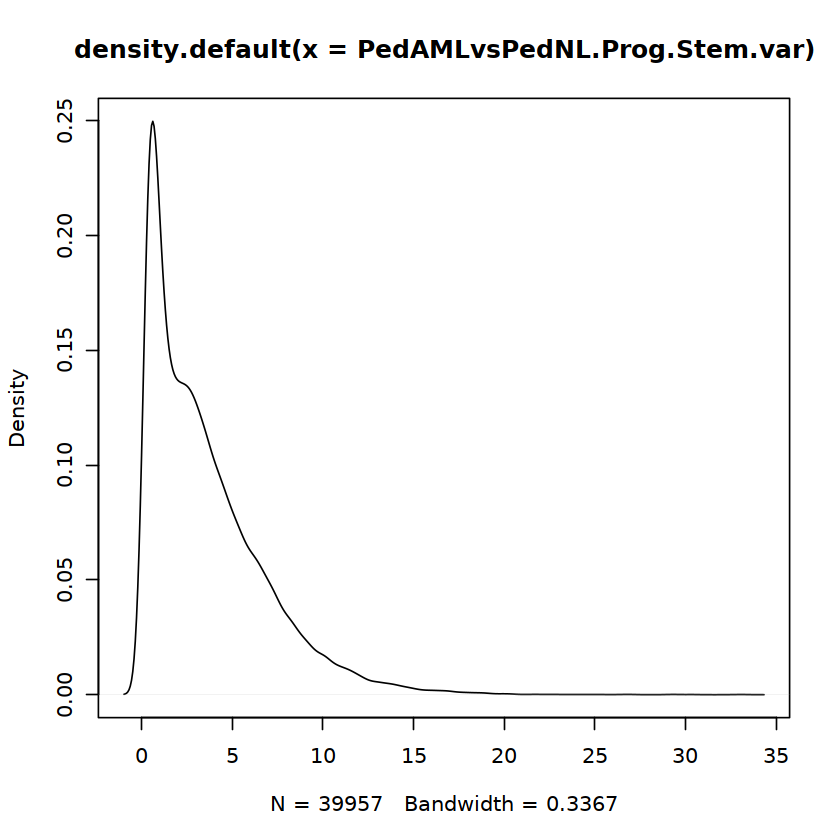

In [30]:
PedAMLvsPedNL.Prog.Stem.var <- apply(lcpm2.Prog.Stem, 1, var)
PedAMLvsPedNL.Prog.Stem.var.ord <- sort(PedAMLvsPedNL.Prog.Stem.var, decreasing = TRUE)
median(PedAMLvsPedNL.Prog.Stem.var.ord)
table(PedAMLvsPedNL.Prog.Stem.var > 2)
head(PedAMLvsPedNL.Prog.Stem.var)
PedAMLvsPedNL.Prog.Stem.var.high <- PedAMLvsPedNL.Prog.Stem.var[PedAMLvsPedNL.Prog.Stem.var > 0]
plot(density(PedAMLvsPedNL.Prog.Stem.var))
#highvargenes <- PedAMLvsPedNL.Prog.Stem.var.ord[1:500]
# i <- which(gVoomResult.stem$genes[["ENSEMBL"]] %in% names(highvargenes))
#length(i)

[1] 1.014149


FALSE  TRUE 
22746 11039 

ENST00000371582 ENST00000371584 ENST00000371588 ENST00000466152 ENST00000367770 
     3.91817256      3.61101882      0.05971984      2.10331778      1.65568697 
ENST00000367771 
     0.81228084

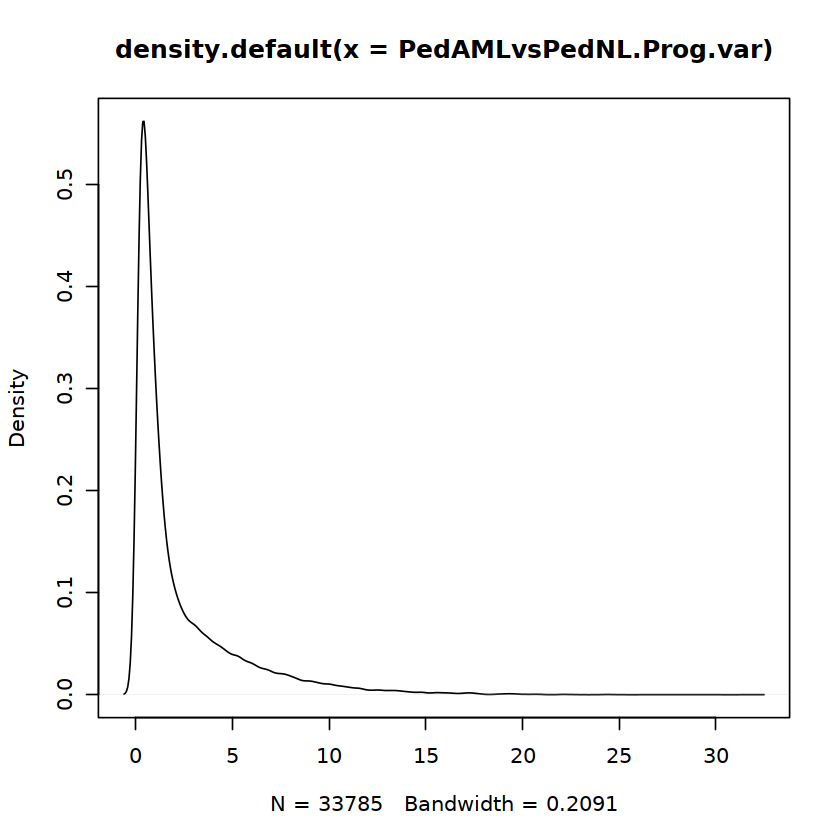

In [31]:
PedAMLvsPedNL.Prog.var <- apply(lcpm2.Ped.Prog.filt, 1, var)
PedAMLvsPedNL.Prog.var.ord <- sort(PedAMLvsPedNL.Prog.var, decreasing = TRUE)
median(PedAMLvsPedNL.Prog.var.ord)
table(PedAMLvsPedNL.Prog.var > 2)
head(PedAMLvsPedNL.Prog.var)
PedAMLvsPedNL.Prog.var.high <- PedAMLvsPedNL.Prog.var[PedAMLvsPedNL.Prog.var > 0]
plot(density(PedAMLvsPedNL.Prog.var))

[1] 3.25993


FALSE  TRUE 
13288 19953 

ENST00000371582 ENST00000371584 ENST00000371588 ENST00000466152 ENST00000367770 
      7.6009559       7.3348546       0.3745674       4.6218251      10.4748461 
ENST00000367771 
      9.8228139

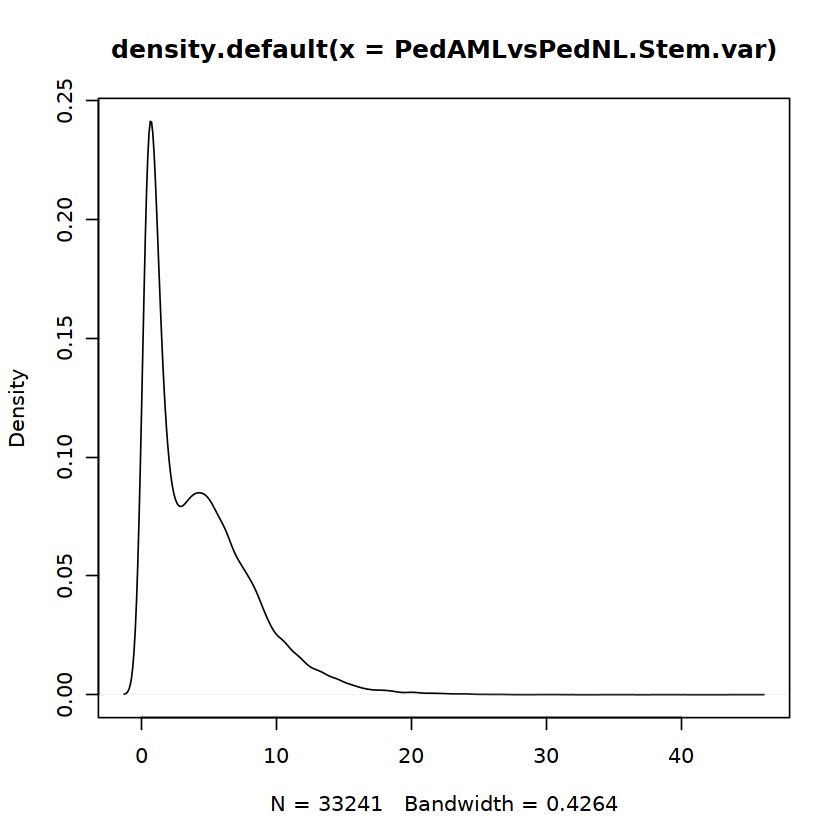

In [32]:
PedAMLvsPedNL.Stem.var <- apply(lcpm2.Ped.Stem.filt, 1, var)
PedAMLvsPedNL.Stem.var.ord <- sort(PedAMLvsPedNL.Stem.var, decreasing = TRUE)
median(PedAMLvsPedNL.Stem.var.ord)
table(PedAMLvsPedNL.Stem.var > 2)
head(PedAMLvsPedNL.Stem.var)
PedAMLvsPedNL.Stem.var.high <- PedAMLvsPedNL.Stem.var[PedAMLvsPedNL.Stem.var > 0]
plot(density(PedAMLvsPedNL.Stem.var))

In [33]:
test.genes <- ASgenes_PedAMLvsPedNL_PSIfilt[[3]]
head(rownames(lcpm2.Prog.Stem))
head(lcpm2.Prog.filt)
head(PedAMLvsPedNL.Prog.Stem.var)
#test.genes
#table(test.genes %in% ENS2EG2SYM$gene_id)
#test.genes.ENS <- ENS2EG2SYM$ens_id[match(test.genes, ENS2EG2SYM$gene_id)]
#table(test.genes.ENS %in% gsub("[.].*$", "", ANNOT_out$gene_id))
test.tx.ENS <- unique(gsub("[.].*$", "", ANNOT_out$transcript_id[ANNOT_out$gene_name %in% test.genes]))
length(test.tx.ENS)
table(test.tx.ENS %in% names(PedAMLvsPedNL.Prog.Stem.var.high))
table(test.tx.ENS %in% names(PedAMLvsPedNL.Prog.var.high))
table(test.tx.ENS %in% names(PedAMLvsPedNL.Stem.var.high))

test.tx.var.ENS <- test.tx.ENS[test.tx.ENS %in% names(PedAMLvsPedNL.Prog.Stem.var.high)]
test.tx.prog.var.ENS <- test.tx.ENS[test.tx.ENS %in% names(PedAMLvsPedNL.Prog.var.high)]
test.tx.stem.var.ENS <- test.tx.ENS[test.tx.ENS %in% names(PedAMLvsPedNL.Stem.var.high)]
length(test.tx.var.ENS)
length(test.tx.prog.var.ENS)
length(test.tx.stem.var.ENS)

[1] "ENST00000371582" "ENST00000371584" "ENST00000371588" "ENST00000466152"
[5] "ENST00000367770" "ENST00000367771"

X02id38cellPROGENITORS X06id90cellPROGENITORS
ENST00000371582  3.16893858             0.469486             
ENST00000371584  2.38819202            -2.267649             
ENST00000371588  5.82263935             6.254646             
ENST00000466152 -0.02875135             1.252121             
ENST00000367770  2.19538904             1.038701             
ENST00000367771  2.15155746             1.111201             
                X04id78cellPROGENITORS X06id00066PRO X01x00077xPROGENIT
ENST00000371582  0.6590139              2.4780193    -0.3074151        
ENST00000371584  0.2808335              1.3504995    -0.0143631        
ENST00000371588  5.5492842              5.4122270     5.4209355        
ENST00000466152 -0.3342219             -0.3110165    -4.2674098        
ENST00000367770  1.4998853              3.2450153     2.3079577        
ENST00000367771  2.0139046              3.6718793     2.5864536        
                X03x11379xHPCxxxxx X14x12488xPLUSPLUS X15x12584xPLUSPLUS
ENST00000371582  2.2947401          2.0640914         -4.2674098        
ENST00000371584  1.5312764          1.9023064         -4.2674098        
ENST00000371588  5.4207870          5.8952107          5.5702657        
ENST00000466152 -0.1213385         -0.0156902          1.6049024        
ENST00000367770  2.9109471          2.2022012          0.3314065        
ENST00000367771  2.9751713          1.8298836          0.5926875        
                X17x12451xPLUSPLUS X03id11474HPC X01id11251HPC
ENST00000371582 -0.7196587         3.1229225      1.3302983   
ENST00000371584  0.4947159         1.8738297      0.7423771   
ENST00000371588  5.7069326         6.2111433      6.4338066   
ENST00000466152  1.0477489         0.6056136     -4.2674098   
ENST00000367770  4.2292479         2.3352389     -4.2674098   
ENST00000367771  2.8598704         2.4500555     -4.2674098   
                X07x00023xPLUSPLUS X09x00020xPLUSPLUS X11x00082xPLUSPLUS
ENST00000371582  1.439946           1.2081467         -4.2674098        
ENST00000371584 -1.056520          -0.3328362         -4.2674098        
ENST00000371588  4.649174           5.6575987          6.1230563        
ENST00000466152 -4.267410           0.5804863          2.2682380        
ENST00000367770  2.149308           1.8083786         -4.2674098        
ENST00000367771  1.794197           3.5045353          0.8821609        
                X05x00047xPLUSPLUS X06x00077xPLUSPLUS X18x10720xPLUSPLUS
ENST00000371582 1.532126           2.5475262           2.911617         
ENST00000371584 2.070766           1.7881663           2.269930         
ENST00000371588 5.672609           5.8239053           5.797281         
ENST00000466152 1.270226           0.9831731          -1.251958         
ENST00000367770 1.885597           3.1788628           3.346460         
ENST00000367771 1.988446           2.2801613           2.360768         
                X02pid24760ctHPC X04pid24474ctHPC X06pid25376ctHPC
ENST00000371582  2.7948750        0.4339554       2.4818081       
ENST00000371584  1.7336971       -1.0302020       1.1499151       
ENST00000371588  5.4449386        6.0429176       5.8308329       
ENST00000466152 -0.3097947        0.5690113       0.1496534       
ENST00000367770  3.2034195       -0.7345536       2.4416575       
ENST00000367771  3.2973327        0.5534565       2.2943468

ENST00000371582 ENST00000371584 ENST00000371588 ENST00000466152 ENST00000367770 
      5.8095231       5.5715456       0.2188813       3.2008195       6.7453130 
ENST00000367771 
      5.3980680

[1] 44402


FALSE  TRUE 
27650 16752 


FALSE  TRUE 
30069 14333 


FALSE  TRUE 
30227 14175 

[1] 16752

[1] 14333

[1] 14175

In [34]:
dim(as.data.frame(cpm(DGE_PedAML_PedNL.Prog.Stem, normalized.lib.sizes=T)))


[1] 39957    27

In [36]:

reformatDfForPca <- function (counts_df, designDf, sampleColName = "sample_name") 
{
    reordered_counts_df = syncCountSampleOrderToDesignDf(counts_df, 
        designDf, sampleColName)
    transformed_df = t(reordered_counts_df)
    return(transformed_df)
}
reformatDfForPca

function (counts_df, designDf, sampleColName = "sample_name") 
{
    reordered_counts_df = syncCountSampleOrderToDesignDf(counts_df, 
        designDf, sampleColName)
    transformed_df = t(reordered_counts_df)
    return(transformed_df)
}

In [155]:
lcpm2.Prog.Stem.filt <- lcpm2.Prog.Stem[rownames(lcpm2.Prog.Stem) %in% test.tx.var.ENS,]
colnames(lcpm2.Prog.Stem.filt) <- gsub("X", "", colnames(lcpm2.Prog.Stem.filt))
table(colnames(lcpm2.Prog.Stem.filt) %in% DGE_PedAML_PedNL.Prog.Stem$samples$Sample)
dim(lcpm2.Prog.Stem.filt)
head(lcpm2.Prog.Stem.filt)
#plot(density(PedAMLvsPedNL.Prog.Stem.var.high[names(PedAMLvsPedNL.Prog.Stem.var.high) %in% rownames(lcpm2.Prog.Stem)]))
reformatDfForPca(lcpm2.Prog.Stem.filt, DGE_PedAML_PedNL.Prog.Stem$samples, "Sample")


TRUE 
  27 

[1] 16752    27

02id38cellPROGENITORS 06id90cellPROGENITORS
ENST00000371582 3.20855922             0.5047058           
ENST00000371584 2.42807606            -2.2175395           
ENST00000371588 5.86195138             6.2872709           
ENST00000466152 0.01386532             1.2862349           
ENST00000367770 2.23536318             1.0730593           
ENST00000367771 2.19155382             1.1454723           
                04id78cellPROGENITORS 06id00066PRO 01x00077xPROGENIT
ENST00000371582  0.7121061             2.5023375   -0.27601702      
ENST00000371584  0.3344268             1.3757007    0.01612854      
ENST00000371588  5.6007595             5.4358972    5.44748894      
ENST00000466152 -0.2794740            -0.2822982   -4.16595550      
ENST00000367770  1.5522387             3.2690261    2.33522489      
ENST00000367771  2.0659779             3.6957779    2.61357910      
                03x11379xHPCxxxxx 14x12488xPLUSPLUS 15x12584xPLUSPLUS
ENST00000371582  2.32530529       2.11065745        -4.1659555       
ENST00000371584  1.56238359       1.94895590        -4.1659555       
ENST00000371588  5.45066395       5.94112257         5.5856339       
ENST00000466152 -0.08740651       0.03314433         1.6216887       
ENST00000367770  2.94124213       2.24870300         0.3503380       
ENST00000367771  3.00544426       1.87657360         0.6110132       
                17x12451xPLUSPLUS 05x00047xPLUSPLUS ⋯ 03id78cellHSC
ENST00000371582 -0.6783193        1.568709          ⋯ -1.0508924   
ENST00000371584  0.5327854        2.106972          ⋯ -4.1659555   
ENST00000371588  5.7425876        5.708048          ⋯  6.3176894   
ENST00000466152  1.0850287        1.307051          ⋯  0.9401819   
ENST00000367770  4.2650225        1.921917          ⋯ -4.1659555   
ENST00000367771  2.8959405        2.024701          ⋯  0.7108764   
                05id00066HSC 02x11379xHSCxxxxx 04x00068xPLUSMINS
ENST00000371582  3.026894    2.4350450          0.6972552       
ENST00000371584  1.346514    0.9507906          0.3033768       
ENST00000371588  5.128785    5.5221234          5.0434143       
ENST00000466152 -1.978156    0.1759054          0.2006299       
ENST00000367770  2.883071    2.6219227          2.1748255       
ENST00000367771  3.712276    3.8641957         -2.7386125       
                12x12484xPLUSMINS 13x12488xPLUSMINS 16x12451xPLUSMINS
ENST00000371582 1.931135           3.2293517        -4.165956        
ENST00000371584 2.132736           2.2515314        -4.165956        
ENST00000371588 6.610431           5.2958040         5.348406        
ENST00000466152 2.311948          -4.1659555         2.607485        
ENST00000367770 2.903566           0.3586843        -4.165956        
ENST00000367771 3.554117           1.2285505        -4.165956        
                01pid24760ctHSC 03pid24474ctHSC 05pid25376ctHSC
ENST00000371582 1.665425        -4.1659555      -4.165956      
ENST00000371584 1.961443        -4.1659555      -4.165956      
ENST00000371588 4.670839         6.0209473       4.491852      
ENST00000466152 1.461353        -0.3146472      -4.165956      
ENST00000367770 4.022378        -4.1659555      -4.165956      
ENST00000367771 4.680563        -2.1106968      -4.165956

[,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
[1,] NA   NA   NA   NA   NA   NA   NA   NA   NA   NA    ⋯     NA    NA    NA   
     [,15] [,16] [,17] [,18] [,19] [,20] [,21]
[1,] NA    NA    NA    NA    NA    NA    NA

In [156]:
table(rownames(lcpm2.Ped.Prog.filt) %in% test.tx.prog.var.ENS)
lcpm2.Ped.Prog.2 <- lcpm2.Ped.Prog.filt[rownames(lcpm2.Ped.Prog.filt) %in% test.tx.prog.var.ENS,]
colnames(lcpm2.Ped.Prog.2) <- gsub("X", "", colnames(lcpm2.Ped.Prog.2))
table(colnames(lcpm2.Ped.Prog.2) %in% DGE_Ped.Prog.filt$samples$Sample)
dim(lcpm2.Ped.Prog.2)
head(lcpm2.Ped.Prog.2)
#plot(density(PedAMLvsPedNL.Prog.var.high[names(PedAMLvsPedNL.Prog.var.high) %in% rownames(lcpm2.Prog)]))
reformatDfForPca(lcpm2.Ped.Prog.2, DGE_Ped.Prog.filt$samples, "Sample")


FALSE  TRUE 
19452 14333 


TRUE 
  15 

[1] 14333    15

02id38cellPROGENITORS 06id90cellPROGENITORS
ENST00000371582 3.205362959            0.5088373           
ENST00000371584 2.424143400           -2.2541696           
ENST00000371588 5.859617604            6.2984332           
ENST00000466152 0.002278573            1.2933656           
ENST00000367770 2.231178567            1.0795263           
ENST00000367771 2.187307066            1.1521759           
                04id78cellPROGENITORS 06id00066PRO 01x00077xPROGENIT
ENST00000371582  0.6798651             2.5293143   -0.22957411      
ENST00000371584  0.3006755             1.4003775    0.06538329      
ENST00000371588  5.5733844             5.4645605    5.50891712      
ENST00000466152 -0.3167094            -0.2668052   -4.34911619      
ENST00000367770  1.5222226             3.2968031    2.39445214      
ENST00000367771  2.0368044             3.7238469    2.67324330      
                03x11379xHPCxxxxx 14x12488xPLUSPLUS 15x12584xPLUSPLUS
ENST00000371582  2.35531925       2.10545360        -4.3491162       
ENST00000371584  1.59084425       1.94349254        -4.3491162       
ENST00000371588  5.48264887       5.93795123         5.6072172       
ENST00000466152 -0.06705861       0.02087697         1.6400307       
ENST00000367770  2.97202996       2.24369876         0.3637694       
ENST00000367771  3.03629531       1.87098430         0.6258321       
                17x12451xPLUSPLUS 05x00047xPLUSPLUS 06x00077xPLUSPLUS
ENST00000371582 -0.6764624        1.574875          2.581950         
ENST00000371584  0.5442646        2.114195          1.821897         
ENST00000371588  5.7611445        5.717414          5.859226         
ENST00000466152  1.0988253        1.312542          1.015638         
ENST00000367770  4.2832295        1.928820          3.213641         
ENST00000367771  2.9132825        2.031787          2.314382         
                18x10720xPLUSPLUS 02pid24760ctHPC 04pid24474ctHPC
ENST00000371582  2.923269          2.8147896       0.4759056     
ENST00000371584  2.281230          1.7528077      -0.9966085     
ENST00000371588  5.809475          5.4654750       6.0895004     
ENST00000466152 -1.250975         -0.2955145       0.6113848     
ENST00000367770  3.358275          3.2235165      -0.6985263     
ENST00000367771  2.372128          3.3174648       0.5957833     
                06pid25376ctHPC
ENST00000371582 2.5122382      
ENST00000371584 1.1788083      
ENST00000371588 5.8621756      
ENST00000466152 0.1759923      
ENST00000367770 2.4720590      
ENST00000367771 2.3246363

[,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
[1,] NA   NA   NA   NA   NA   NA   NA   NA   NA   NA    NA    NA    NA    NA   
     [,15]
[1,] NA

In [157]:
table(rownames(lcpm2.Ped.Stem.filt) %in% test.tx.stem.var.ENS)
lcpm2.Ped.Stem.2 <- lcpm2.Ped.Stem.filt[rownames(lcpm2.Ped.Stem.filt) %in% test.tx.stem.var.ENS,]
colnames(lcpm2.Ped.Stem.2) <- gsub("X", "", colnames(lcpm2.Ped.Stem.2))
table(colnames(lcpm2.Ped.Stem.2) %in% DGE_Ped.Stem.filt$samples$Sample)
dim(lcpm2.Ped.Stem.2)
head(lcpm2.Ped.Stem.2)
#plot(density(PedAMLvsPedNL.Stem.var.high[names(PedAMLvsPedNL.Stem.var.high) %in% rownames(lcpm2.Stem)]))
reformatDfForPca(lcpm2.Ped.Stem.2, DGE_Ped.Stem.filt$samples, "Sample")


FALSE  TRUE 
19066 14175 


TRUE 
  12 

[1] 14175    12

01id38cellHSC cell05id90HSC 03id78cellHSC 05id00066HSC
ENST00000371582 1.680407      1.721755      -1.0336914     3.073487   
ENST00000371584 1.517051      1.630960      -3.8662872     1.397299   
ENST00000371588 5.640522      5.700936       6.2938474     5.173917   
ENST00000466152 1.026735      0.785780       0.9265865    -1.873516   
ENST00000367770 3.098955      1.345421      -3.8662872     2.929864   
ENST00000367771 2.023742      2.321978       0.6990821     3.758149   
                02x11379xHSCxxxxx 04x00068xPLUSMINS 12x12484xPLUSMINS
ENST00000371582 2.4344555          0.7181436        1.942586         
ENST00000371584 0.9564334          0.3276961        2.143570         
ENST00000371588 5.5184651          5.0538607        6.617330         
ENST00000466152 0.1884136          0.2260076        2.322301         
ENST00000367770 2.6209109          2.1886838        2.912696         
ENST00000367771 3.8614203         -2.6140658        3.562371         
                13x12488xPLUSMINS 16x12451xPLUSMINS 01pid24760ctHSC
ENST00000371582  3.2533431        -3.866287         1.712600       
ENST00000371584  2.2772816        -3.866287         2.007703       
ENST00000371588  5.3184129         5.404021         4.713689       
ENST00000466152 -3.8662872         2.665169         1.509278       
ENST00000367770  0.3940919        -3.866287         4.065578       
ENST00000367771  1.2579814        -3.866287         4.723409       
                03pid24474ctHSC 05pid25376ctHSC
ENST00000371582 -3.8662872      -3.866287      
ENST00000371584 -3.8662872      -3.866287      
ENST00000371588  6.1075489       4.579434      
ENST00000466152 -0.2124061      -3.866287      
ENST00000367770 -3.8662872      -3.866287      
ENST00000367771 -1.9700268      -3.866287

[,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12]
[1,] NA   NA   NA   NA   NA   NA   NA   NA   NA   NA    NA    NA

PCA of Differentially Spliced Isoforms

Wrong object

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



PCA of Differentially Spliced Isoforms

Wrong object

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



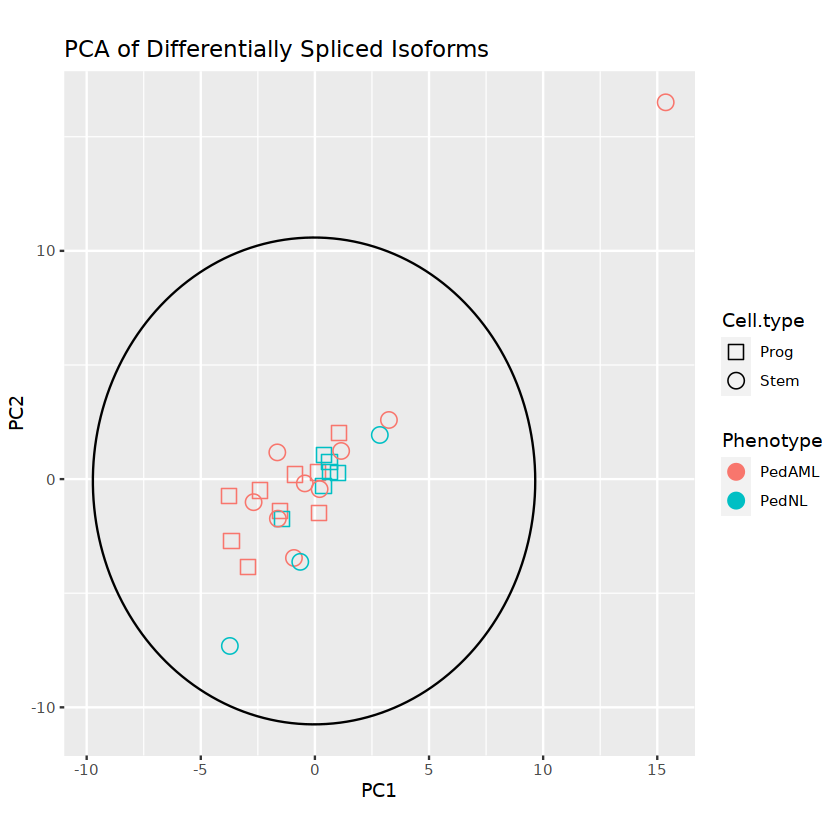

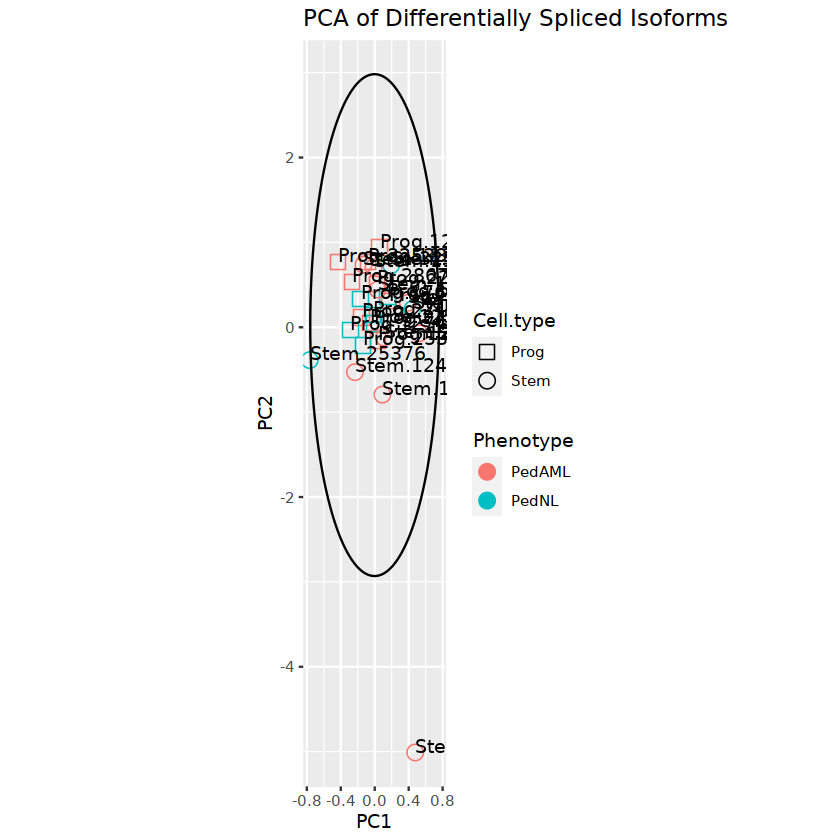

In [61]:
groupColName = "Cell.type"
sampleColName = "Sample"
colorColName = "Phenotype"
designColNameForLabels= "Patient.cell"
pcaplot.out <- makeAndPrintPca.gl("PCA of Differentially Spliced Isoforms", lcpm2.Prog.Stem.filt, DGE_PedAML_PedNL.Prog.Stem$samples, 
                   groupColName, sampleColName, colorColName, NULL, labelOnlyOutliers=TRUE)    
pcaplot.out <- makeAndPrintPca.gl("PCA of Differentially Spliced Isoforms", lcpm2.Prog.Stem.filt, DGE_PedAML_PedNL.Prog.Stem$samples, 
                   groupColName, sampleColName, colorColName, designColNameForLabels, labelOnlyOutliers=FALSE)    

In [40]:
library(RColorBrewer)
plotMdsColoredByColumn = function(lcpm, sampleCol, dimensions=c(1,2), brewerPaletteName="Dark2"){
    condition <- as.factor(sampleCol)
    #lcpm <- cpm(aDgeList, log=TRUE)
    par(mfrow=c(1,1))
    col.condition <- condition

    naive_palette = brewer.pal(nlevels(col.condition), brewerPaletteName) #if more than 2 conditions
    extended_palette = colorRampPalette(naive_palette)(nlevels(col.condition)) 
    levels(col.condition) = extended_palette
    
    # levels(col.condition) <-  brewer.pal(nlevels(col.condition), brewerPaletteName) #if more than 2 conditions
    col.condition <- as.character(col.condition)  
    plotMDS(lcpm, labels=condition, col=col.condition, cex=.5, dim=dimensions,xlab = "PC1", ylab="PC2")
    #title(main=paste("MDS plot labeled by", colNameInSampleDf))
}

Warning message in brewer.pal(nlevels(col.condition), brewerPaletteName):
“n too large, allowed maximum for palette Dark2 is 8
Returning the palette you asked for with that many colors
”


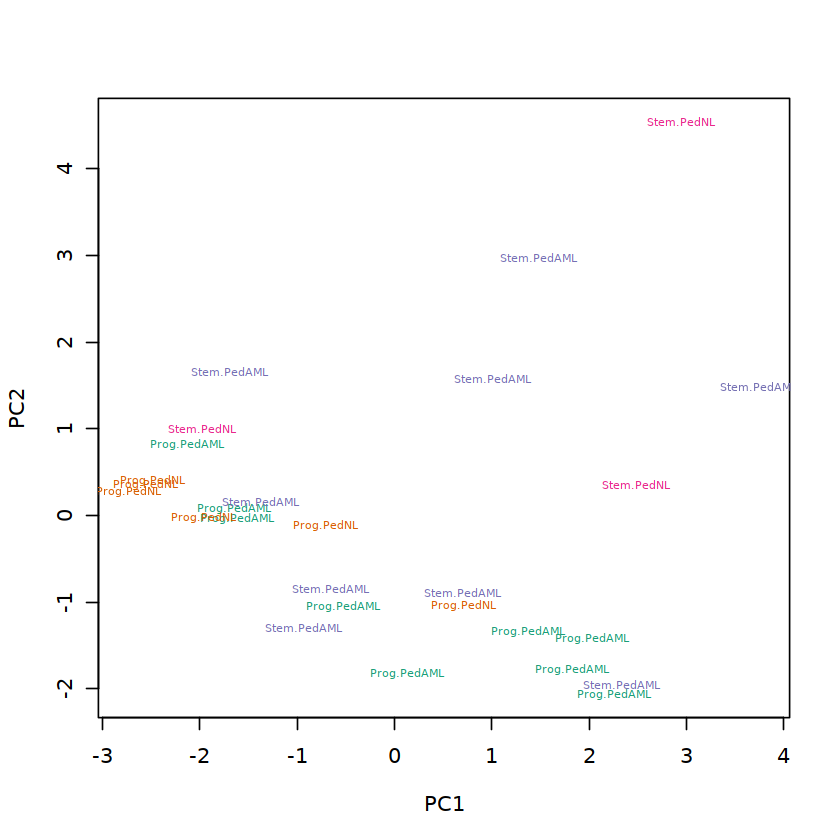

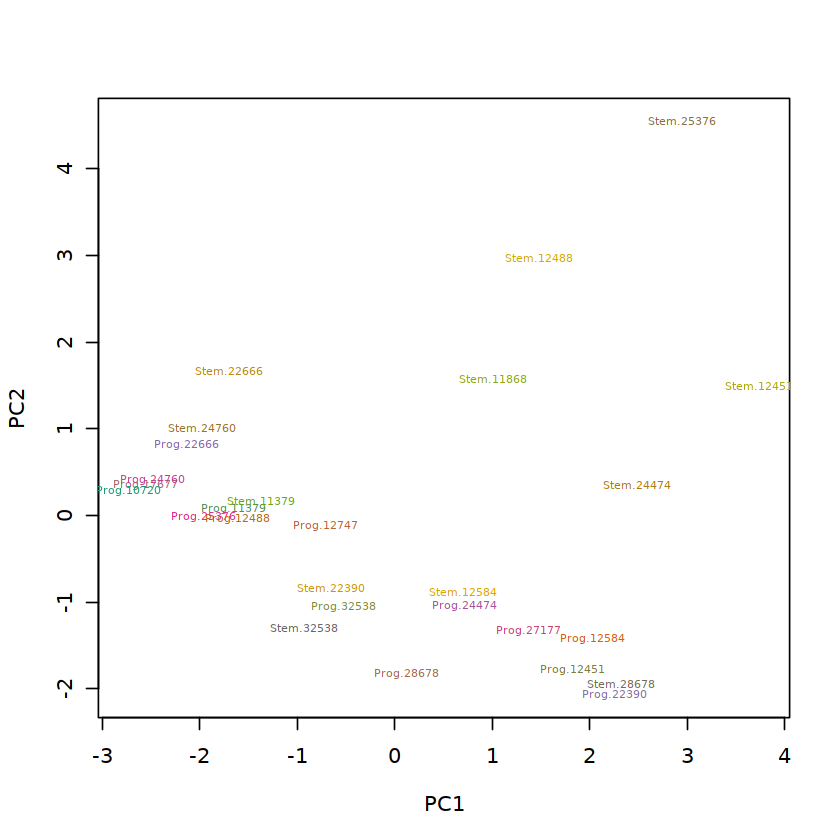

In [41]:
plotMdsColoredByColumn(lcpm2.Prog.Stem.filt, DGE_PedAML_PedNL.Prog.Stem$samples$Phenotype.cell)
plotMdsColoredByColumn(lcpm2.Prog.Stem.filt, DGE_PedAML_PedNL.Prog.Stem$samples$Patient.cell)

PCA of Differentially Spliced Isoforms

Wrong object

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



PCA of Differentially Spliced Isoforms

Wrong object

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



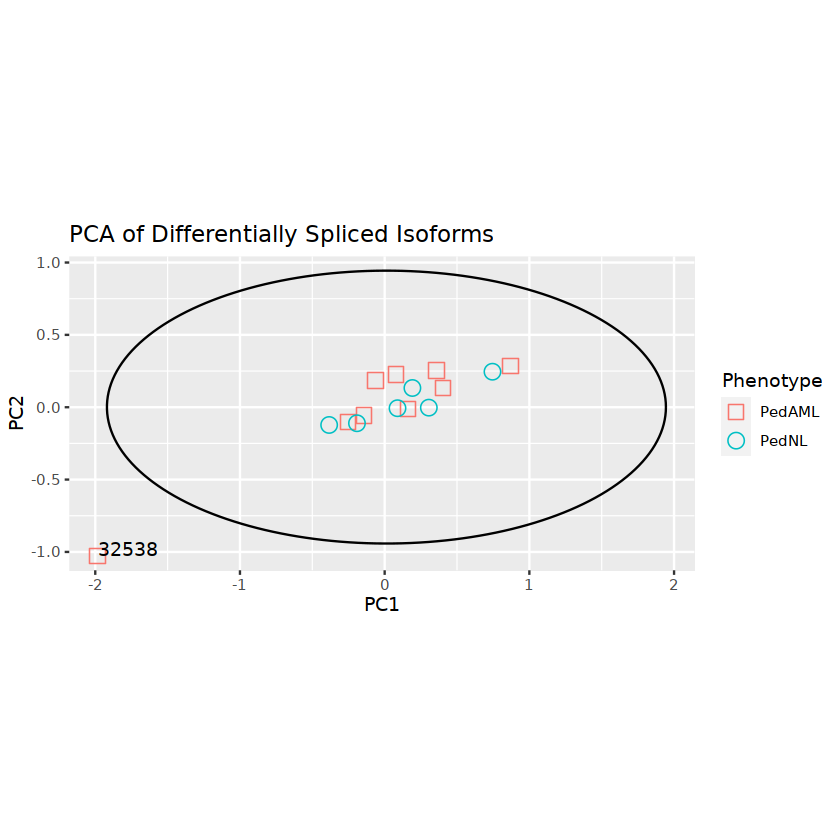

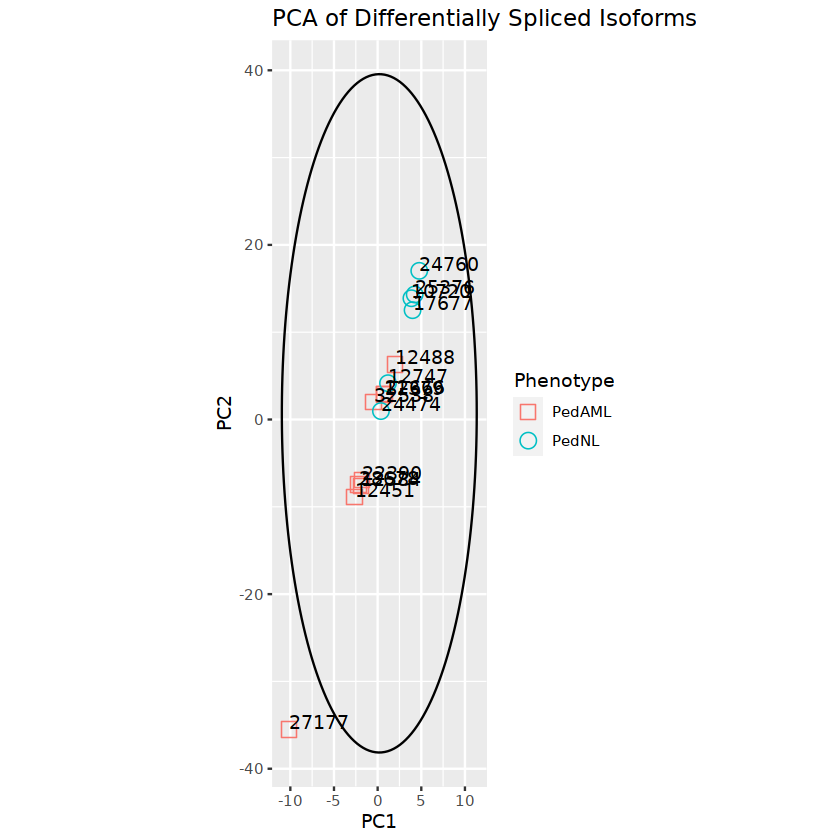

In [62]:
groupColName = "Phenotype"
sampleColName = "Sample"
colorColName = "Phenotype"
designColNameForLabels= "Patient.ID"
pcaplot.out <- makeAndPrintPca.gl("PCA of Differentially Spliced Isoforms", lcpm2.Ped.Prog.2, DGE_Ped.Prog.filt$samples, 
                   groupColName, sampleColName, colorColName, designColNameForLabels, labelOnlyOutliers=TRUE)    
pcaplot.out <- makeAndPrintPca.gl("PCA of Differentially Spliced Isoforms", lcpm2.Ped.Prog.2, DGE_Ped.Prog.filt$samples, 
                   groupColName, sampleColName, colorColName, designColNameForLabels, labelOnlyOutliers=FALSE)    

[1] 14333    15

Warning message in brewer.pal(nlevels(col.condition), brewerPaletteName):
“n too large, allowed maximum for palette Dark2 is 8
Returning the palette you asked for with that many colors
”


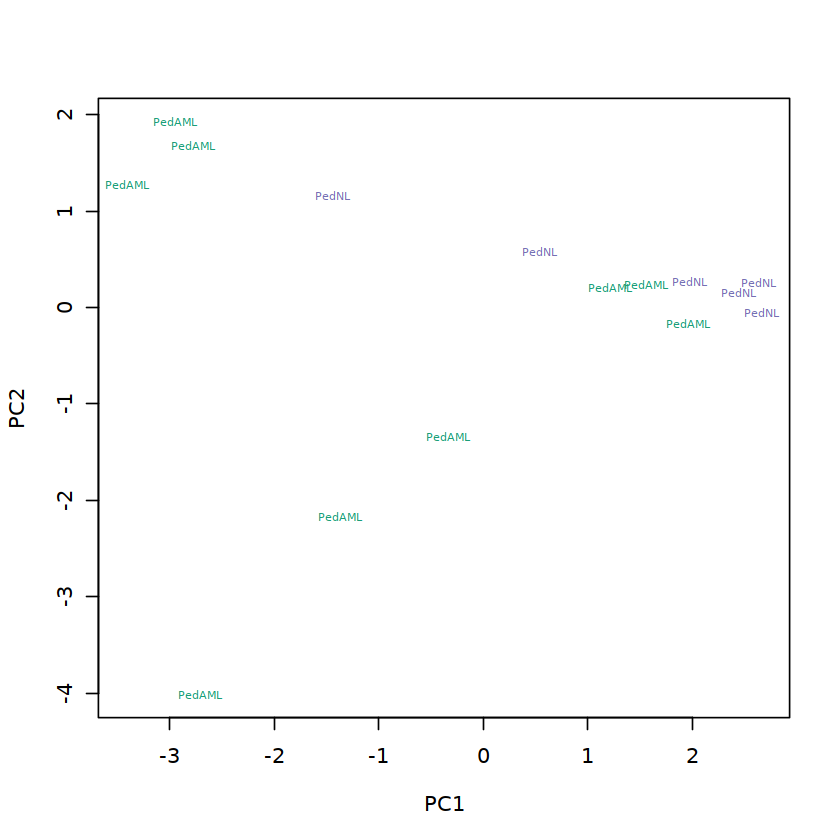

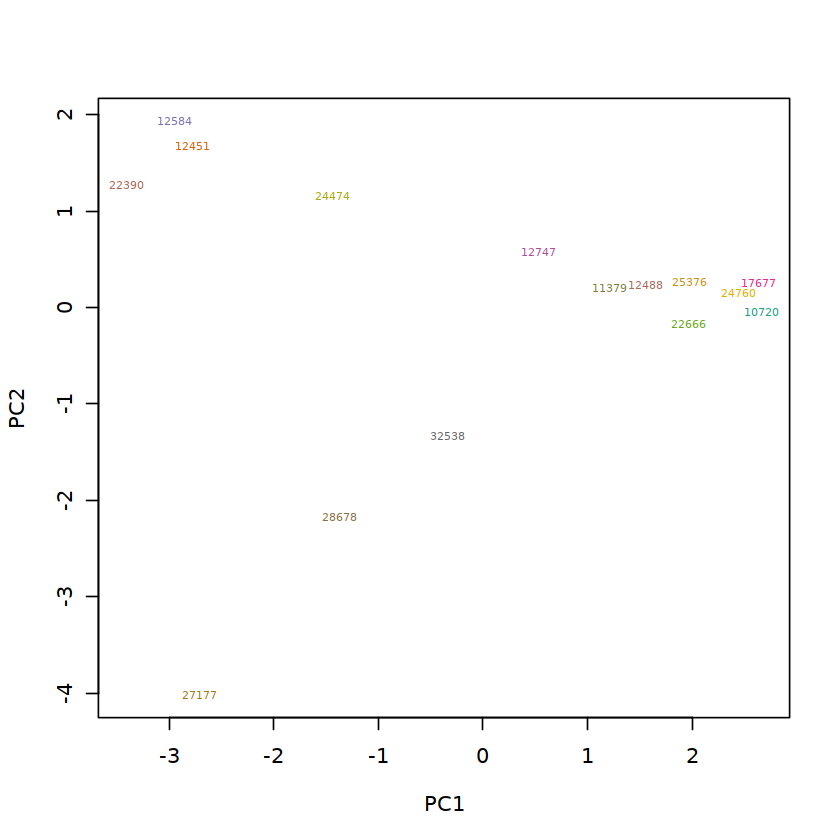

In [50]:
dim(lcpm2.Ped.Prog.2)
plotMdsColoredByColumn(lcpm2.Ped.Prog.2, DGE_Ped.Prog.filt$samples$Phenotype)
plotMdsColoredByColumn(lcpm2.Ped.Prog.2, DGE_Ped.Prog.filt$samples$Patient.ID)

group  lib.size norm.factors
X01id38cellHSC     PedAML 40088932 0.9625150   
Xcell05id90HSC     PedAML 32035428 0.8890657   
X03id78cellHSC     PedAML 27936695 0.8183923   
X05id00066HSC      PedAML 15464528 1.1170926   
X02x11379xHSCxxxxx PedAML 43531580 0.9360843   
X04x00068xPLUSMINS PedAML 23707776 1.0370519   
X12x12484xPLUSMINS PedAML 40776226 0.8425066   
X13x12488xPLUSMINS PedAML 29744165 1.0643029   
X16x12451xPLUSMINS PedAML 21711586 1.0265132   
X01pid24760ctHSC   PedNL  38047623 1.0712363   
X03pid24474ctHSC   PedNL  28677442 0.9918804   
X05pid25376ctHSC   PedNL  14830727 1.3463093   
                   SequenceRun                                               
X01id38cellHSC     ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91
Xcell05id90HSC     ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91
X03id78cellHSC     ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91
X05id00066HSC      ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91
X02x11379xHSCxxxxx ca_ne_630_001_400_060_JAMIESON_SN_human-ensembl-grch38-r91
X04x00068xPLUSMINS ca_ne_630_001_400_060_JAMIESON_SN_human-ensembl-grch38-r91
X12x12484xPLUSMINS ca_ne_645_001_300_060_JAMIESON_SN_human-ensembl-grch38-r91
X13x12488xPLUSMINS ca_ne_650_001_360_060_JAMIESON_SN_human-ensembl-grch38-r91
X16x12451xPLUSMINS ca_ne_650_001_360_060_JAMIESON_SN_human-ensembl-grch38-r91
X01pid24760ctHSC   ca_ne_714_001_400_070_JAMIESON_SN_human-ensembl-grch38-r91
X03pid24474ctHSC   ca_ne_714_001_400_070_JAMIESON_SN_human-ensembl-grch38-r91
X05pid25376ctHSC   ca_ne_714_001_400_070_JAMIESON_SN_human-ensembl-grch38-r91
                   SequenceDate Sample            SampleName Patient.ID RIN 
X01id38cellHSC     5/5/19       01id38cellHSC     38 HSC     32538      10.0
Xcell05id90HSC     5/5/19       cell05id90HSC     90 HSC     22390      10.0
X03id78cellHSC     5/5/19       03id78cellHSC     78 HSC     28678      10.0
X05id00066HSC      6/26/19      05id00066HSC      66 HSC     22666       7.7
X02x11379xHSCxxxxx 8/31/19      02x11379xHSCxxxxx 11379 HSC  11379       9.6
X04x00068xPLUSMINS 8/31/19      04x00068xPLUSMINS  68PlMn    11868       6.8
X12x12484xPLUSMINS 8/31/19      12x12484xPLUSMINS 12484 PlMn 12584       9.9
X13x12488xPLUSMINS 9/1/19       13x12488xPLUSMINS 12488 PlMn 12488       7.8
X16x12451xPLUSMINS 9/1/19       16x12451xPLUSMINS 12451 PlMn 12451       8.7
X01pid24760ctHSC   12/19/19     01pid24760ctHSC   24760 HSC  24760       9.1
X03pid24474ctHSC   12/19/19     03pid24474ctHSC   24474 HSC  24474      10.0
X05pid25376ctHSC   12/19/19     05pid25376ctHSC   25376 HSC  25376       8.8
                   X      Adult.Pediatric Disease      Cell.type
X01id38cellHSC     PedAML Pediatric       AML          Stem     
Xcell05id90HSC     PedAML Pediatric       AML          Stem     
X03id78cellHSC     PedAML Pediatric       AML          Stem     
X05id00066HSC      PedAML Pediatric       AML          Stem     
X02x11379xHSCxxxxx PedAML Pediatric       AML          Stem     
X04x00068xPLUSMINS PedAML Pediatric       AML          Stem     
X12x12484xPLUSMINS PedAML Pediatric       AML          Stem     
X13x12488xPLUSMINS PedAML Pediatric       AML          Stem     
X16x12451xPLUSMINS PedAML Pediatric       AML          Stem     
X01pid24760ctHSC   PedNL  Pediatric       non-leukemic Stem     
X03pid24474ctHSC   PedNL  Pediatric       non-leukemic Stem     
X05pid25376ctHSC   PedNL  Pediatric       non-leukemic Stem     
                   Sorted.Cell.Type Tissue.Source RNA.seq.status Reads    
X01id38cellHSC     34+38-           PB            Completed       81234305
Xcell05id90HSC     34+38-           BM            Completed       72625632
X03id78cellHSC     34+38-           PB            Completed       68483294
X05id00066HSC      34+38-           BM            Completed       77519907
X02x11379xHSCxxxxx 34+38-           PB            Completed      101108249
X04x00068xPLUSMINS 34+38-           PB            Completed       61132963
X12x12484x

PCA of Differentially Spliced Isoforms

Wrong object

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



PCA of Differentially Spliced Isoforms

Wrong object

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



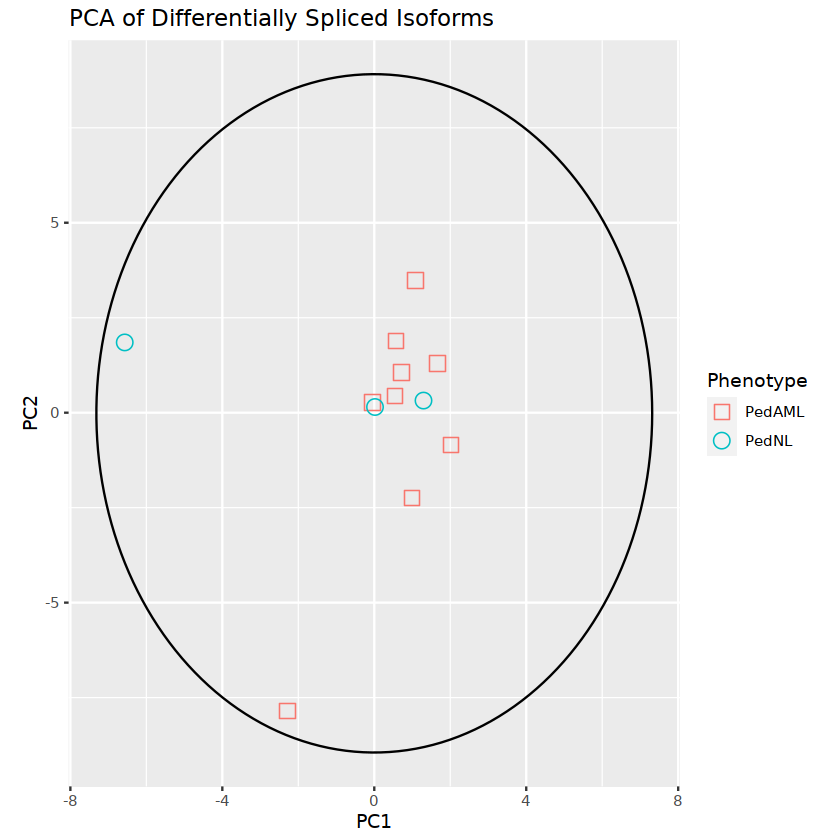

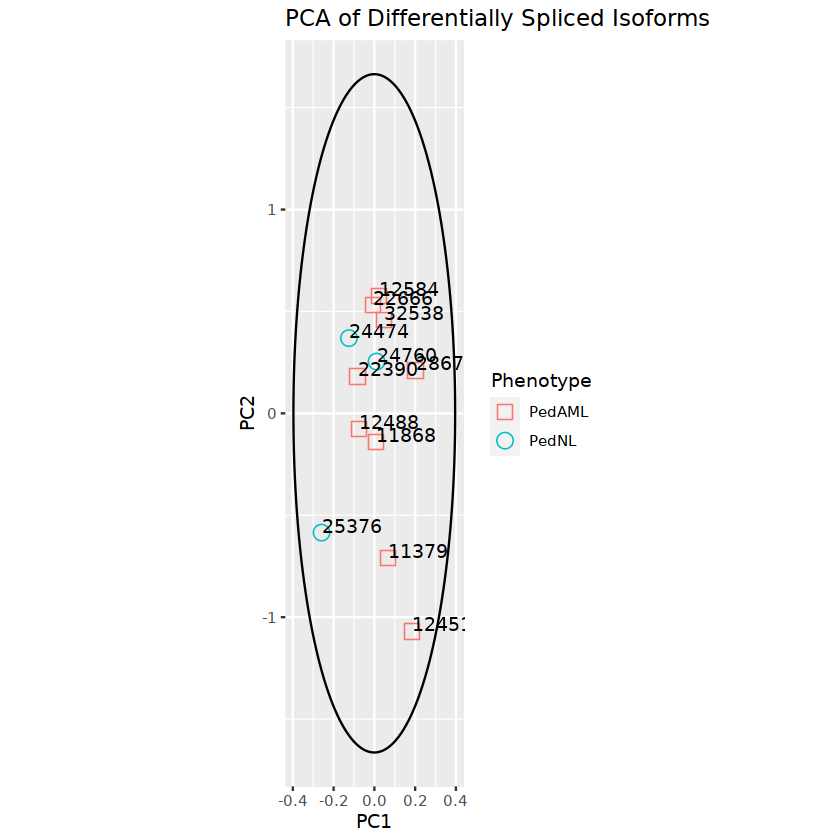

In [63]:
DGE_Ped.Stem.filt$samples
groupColName = "Phenotype"
sampleColName = "Sample"
colorColName = "Phenotype"
designColNameForLabels= "Patient.ID"
pcaplot.out <- makeAndPrintPca.gl("PCA of Differentially Spliced Isoforms", lcpm2.Ped.Stem.2, DGE_Ped.Stem.filt$samples, 
                   groupColName, sampleColName, colorColName, designColNameForLabels, labelOnlyOutliers=TRUE)    
pcaplot.out <- makeAndPrintPca.gl("PCA of Differentially Spliced Isoforms", lcpm2.Ped.Stem.2, DGE_Ped.Stem.filt$samples, 
                   groupColName, sampleColName, colorColName, designColNameForLabels, labelOnlyOutliers=FALSE)    

[1] 14175    12

Warning message in brewer.pal(nlevels(col.condition), brewerPaletteName):
“n too large, allowed maximum for palette Dark2 is 8
Returning the palette you asked for with that many colors
”


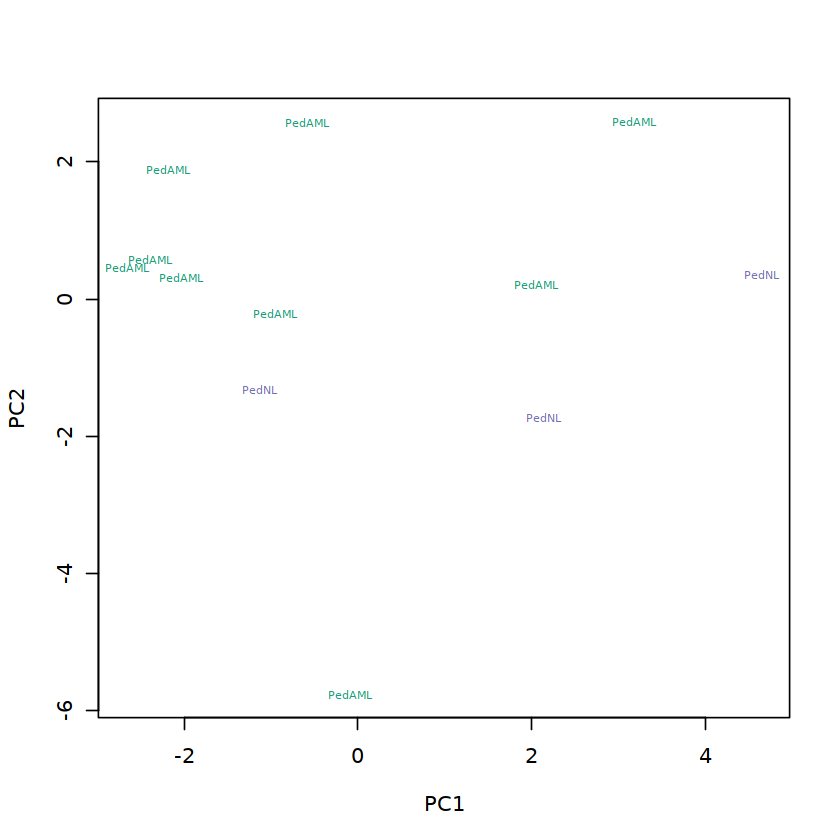

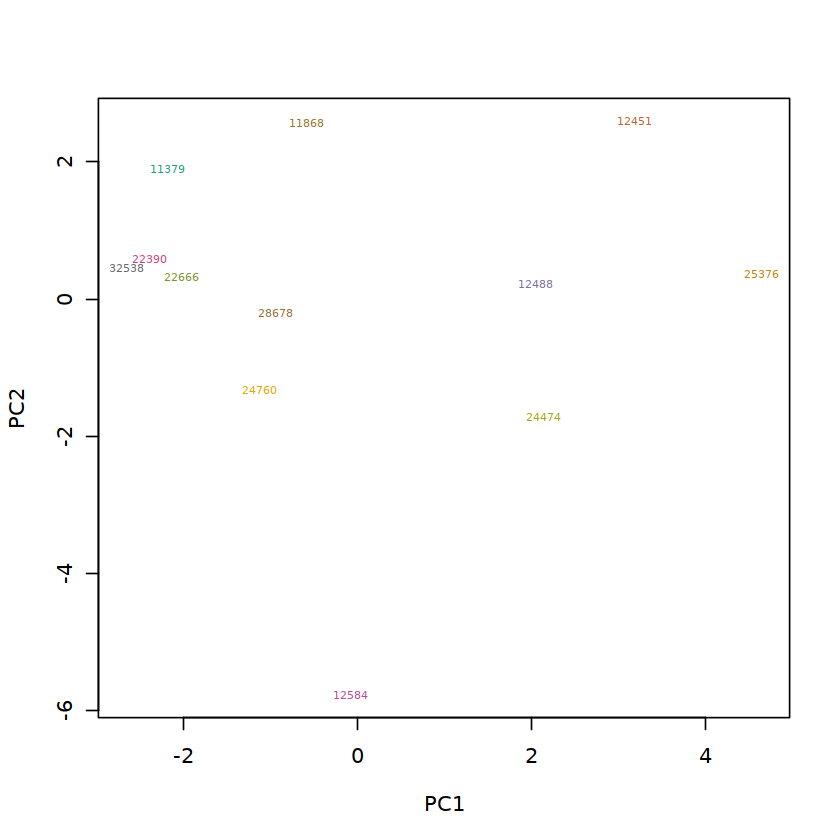

In [51]:
dim(lcpm2.Ped.Stem.2)
plotMdsColoredByColumn(lcpm2.Ped.Stem.filt, DGE_Ped.Stem.filt$samples$Phenotype)
plotMdsColoredByColumn(lcpm2.Ped.Stem.filt, DGE_Ped.Stem.filt$samples$Patient.ID)

In [158]:
library("TxDb.Hsapiens.UCSC.hg38.knownGene")
library("AnnotationHub")
txdb_hg38 <- TxDb.Hsapiens.UCSC.hg38.knownGene
tx_hg38 <- transcriptsBy(TxDb.Hsapiens.UCSC.hg38.knownGene)
tx.ex_hg38 <- exonsBy(TxDb.Hsapiens.UCSC.hg38.knownGene)
#known.junctions <- psetdiff(range(tx_hg38), tx_hg38)
#rowData(se)$known <- se %in% known.junctions

head(seqlevels(txdb_hg38))

hub <- AnnotationHub()
hub_hg38 <- subset(hub, 
                   (hub$species == "Homo sapiens") & (hub$genome == "hg38") & (hub$sourcetype=="GTF"))
length(hub_hg38)
class(hub_hg38)
query(hub_hg38, c("hg38", "GTF"))
#ov_hg38 <- lapply(1:3, function(i) subsetByOverlaps(hub_hg38[[i]], gr_hg38))

[1] "chr1" "chr2" "chr3" "chr4" "chr5" "chr6"

snapshotDate(): 2020-10-27



[1] 0

[1] "AnnotationHub"
attr(,"package")
[1] "AnnotationHub"

AnnotationHub with 0 records
# snapshotDate(): 2020-10-27

In [159]:
library(annotatr)
library(org.Hs.eg.db)
ENS2EG <- toTable(org.Hs.egENSEMBL2EG)
EG2SYM <- toTable(org.Hs.egSYMBOL2EG)
ENS2EG2SYM <- data.frame(gene_id=ENS2EG$gene_id, ens_id=ENS2EG, 
                         SYM=EG2SYM[match(ENS2EG$gene_id,EG2SYM$gene_id),"symbol"])

annos.hg38 <- build_annotations(genome = "hg38", annotations = "hg38_basicgenes")
annotateRegions <- function(granges, annotations, ign.str=TRUE){
  annotated.regions <- annotate_regions(granges, annotations, ignore.strand=ign.str)
  annotated.regions <- data.frame(annotated.regions$annot)
  annotated.regions.df <- unique(annotated.regions[c("seqnames", "start", "end", "symbol")])
  unique.genes <- unique(unlist(annotated.regions.df$symbol))
  unique.genes <- unique.genes[!is.na(unique.genes)]
  unique.genes
}
#annos.hg38.reg <- annotationRegions()
load("../inputs/Homo_sapiens_GRCh38p12_gencodev29_exons_ANNOT.Rdata")
#ANNOT_tmp <- merge(ANNOT, geneCount, by.x="gene_id", by.y="row.names", all.y=TRUE)
#ANNOT_out <- merge(ANNOT, iso_counts_new, by.x="transcript_id", by.y="row.names", all.y=TRUE)
class(ANNOT_ex)
head(ANNOT_ex)


'select()' returned 1:1 mapping between keys and columns

Building promoters...

Building 1to5kb upstream of TSS...

Building 5UTRs...

Building 3UTRs...

Building exons...

Building introns...



[1] "data.frame"

chr  start stop  stand gene_type                          gene_id          
1 chr1 11869 12227 +     transcribed_unprocessed_pseudogene ENSG00000223972.5
2 chr1 12613 12721 +     transcribed_unprocessed_pseudogene ENSG00000223972.5
3 chr1 13221 14409 +     transcribed_unprocessed_pseudogene ENSG00000223972.5
4 chr1 12010 12057 +     transcribed_unprocessed_pseudogene ENSG00000223972.5
5 chr1 12179 12227 +     transcribed_unprocessed_pseudogene ENSG00000223972.5
6 chr1 12613 12697 +     transcribed_unprocessed_pseudogene ENSG00000223972.5
  transcript_id     gene_name transcript_type                    exon_number
1 ENST00000456328.2 DDX11L1   processed_transcript               1          
2 ENST00000456328.2 DDX11L1   processed_transcript               2          
3 ENST00000456328.2 DDX11L1   processed_transcript               3          
4 ENST00000450305.2 DDX11L1   transcribed_unprocessed_pseudogene 1          
5 ENST00000450305.2 DDX11L1   transcribed_unprocessed_pseudogene 2          
6 ENST00000450305.2 DDX11L1   transcribed_unprocessed_pseudogene 3          
  exon_id          
1 ENSE00002234944.1
2 ENSE00003582793.1
3 ENSE00002312635.1
4 ENSE00001948541.1
5 ENSE00001671638.2
6 ENSE00001758273.2

In [160]:
PedNLvPedAML_overlapASE_SE <- read.csv("../rMATS_SplicingResults/rMATS_PSIfilt_Unique_Overlap_Events/SE/DeWerf_PediatricAML_rMATS_DiffSplicing_PSIfilt_SkipExon_PedAMLvsPedNL_Prog_Stem_Overlap.csv",
                                      stringsAsFactors = FALSE, header=FALSE, skip=1)
dim(PedNLvPedAML_overlapASE_SE)
PedNLvPedAML_overlapASE_SE_f <- PedNLvPedAML_overlapASE_SE[,c(1:11)]
colnames(PedNLvPedAML_overlapASE_SE_f) <- c('ID','GeneID','geneSymbol','chr','strand','exonStart_0base','exonEnd','upstreamES','upstreamEE','downstreamES','downstreamEE')
head(PedNLvPedAML_overlapASE_SE_f)
overlapASE_gr <- GRanges(seqnames=PedNLvPedAML_overlapASE_SE_f$chr,
                        ranges=IRanges(start=PedNLvPedAML_overlapASE_SE_f$exonStart_0base, 
                                       end=PedNLvPedAML_overlapASE_SE_f$exonEnd))
seqlengths(overlapASE_gr) <- seqlengths(annos.hg38)[match(names(seqlengths(overlapASE_gr)), 
                                                          names(seqlengths(annos.hg38)))]
genome(overlapASE_gr) <- genome(annos.hg38)[match(names(genome(overlapASE_gr)), names(genome(annos.hg38)))]
overlapASE_gr.anno <- annotate_regions(overlapASE_gr, annos.hg38, ignore.strand=TRUE)
overlapASE_gr.anno.df.all <- data.frame(overlapASE_gr.anno)
overlapASE_gr.anno.df.cds <- overlapASE_gr.anno.df.all[overlapASE_gr.anno.df.all$annot.type %in% c("hg38_genes_5UTRs", "hg38_genes_exons", "hg38_genes_3UTRs"),]
overlapASE_gr.anno.df.ex <- overlapASE_gr.anno.df.all[overlapASE_gr.anno.df.all$annot.type %in% c("hg38_genes_exons"),]
PedNLvPedAML_overlapASE_SE_f$SEcoord <- paste0(PedNLvPedAML_overlapASE_SE_f$chr, "_",
                                               PedNLvPedAML_overlapASE_SE_f$exonStart_0base+1, "_",
                                               PedNLvPedAML_overlapASE_SE_f$exonEnd)
PedNLvPedAML_overlapASE_SE_f$UpEcoord <- paste0(PedNLvPedAML_overlapASE_SE_f$chr, "_",
                                                PedNLvPedAML_overlapASE_SE_f$upstreamES+1, "_",
                                                PedNLvPedAML_overlapASE_SE_f$upstreamEE)
PedNLvPedAML_overlapASE_SE_f$DnEcoord <- paste0(PedNLvPedAML_overlapASE_SE_f$chr, "_",
                                                PedNLvPedAML_overlapASE_SE_f$downstreamES+1, "_",
                                                PedNLvPedAML_overlapASE_SE_f$downstreamEE)
ANNOT_ex$ex_coord <- paste0(ANNOT_ex$chr, "_",
                           ANNOT_ex$start, "_",
                           ANNOT_ex$stop)
table(PedNLvPedAML_overlapASE_SE_f$SEcoord %in% ANNOT_ex$ex_coord)
table(PedNLvPedAML_overlapASE_SE_f$UpEcoord %in% ANNOT_ex$ex_coord)
table(PedNLvPedAML_overlapASE_SE_f$DnEcoord %in% ANNOT_ex$ex_coord)
table(ANNOT_ex$ex_coord %in% PedNLvPedAML_overlapASE_SE_f$SEcoord)
table(ANNOT_ex$ex_coord %in% PedNLvPedAML_overlapASE_SE_f$UpEcoord)
table(ANNOT_ex$ex_coord %in% PedNLvPedAML_overlapASE_SE_f$DnEcoord)
ANNOT_ex_filt <- ANNOT_ex[ANNOT_ex$ex_coord %in% c(PedNLvPedAML_overlapASE_SE_f$SEcoord,
                                                  PedNLvPedAML_overlapASE_SE_f$UpEcoord,
                                                  PedNLvPedAML_overlapASE_SE_f$DnEcoord),]
PedNLvPedAML_overlapASE_SE_f.spl <- split(PedNLvPedAML_overlapASE_SE_f, PedNLvPedAML_overlapASE_SE_f$geneSymbol)
table(unlist(lapply(PedNLvPedAML_overlapASE_SE_f.spl, nrow)))
PedNLvPedAML_overlapASE_SE_Isos <- lapply(PedNLvPedAML_overlapASE_SE_f.spl, function(x) {
    skipE <- gsub("[.].*$", "", ANNOT_ex_filt$transcript_id[ANNOT_ex_filt$ex_coord %in% x$SEcoord]) 
    upE <- gsub("[.].*$", "", ANNOT_ex_filt$transcript_id[ANNOT_ex_filt$ex_coord %in% x$UpEcoord]) 
    dnE <- gsub("[.].*$", "", ANNOT_ex_filt$transcript_id[ANNOT_ex_filt$ex_coord %in% x$DnEcoord])
    E.df <- as.data.frame(table(c(skipE, upE, dnE)))
    retIso <- as.character(E.df$Var1[E.df$Freq == 3])
    skipIso <- as.character(E.df$Var1[E.df$Freq == 1 & E.df$Var1 %in% skipE])
    if(length(skipIso) == 0) {
        skipIso <- as.character(E.df$Var1[E.df$Freq == 2 & !E.df$Var1 %in% skipE])
    }
    list(retIso, skipIso)
})


[1] 395  53

ID   GeneID          geneSymbol chr   strand exonStart_0base exonEnd 
1   84 ENSG00000160208 RRP1B      chr21 +      43687515        43688240
2  294 ENSG00000159086 PAXBP1     chr21 -      32743247        32743314
3  403 ENSG00000184319 RPL23AP82  chr22 +      50788749        50788798
4  624 ENSG00000100266 PACSIN2    chr22 -      42876887        42877010
5  926 ENSG00000184381 PLA2G6     chr22 -      38127406        38127458
6 1110 ENSG00000100354 TNRC6B     chr22 +      40270121        40270280
  upstreamES upstreamEE downstreamES downstreamEE
1 43686131   43686935   43690287     43690440    
2 32738172   32738319   32743677     32743754    
3 50785172   50785293   50788891     50789353    
4 42876136   42876333   42879047     42879169    
5 38126370   38126449   38128268     38128430    
6 40264687   40267036   40273424     40273600

Annotating...




TRUE 
 395 


FALSE  TRUE 
    3   392 


FALSE  TRUE 
    5   390 


  FALSE    TRUE 
1260412    1495 


  FALSE    TRUE 
1260052    1855 


  FALSE    TRUE 
1260187    1720 


  1   2   3   4   5   6 
250  46  10   3   1   1 

In [ ]:
PedNLvPedAML_overlapASE_SE_nf <- read.csv("/mnt/data1/tomw/DeWerf_PedAML_RNASeq/rMATS_SplicingResults/DeWerf_PediatricAML_rMATS_DiffSplicing_SkipExon_PedAMLvsPedNL_Prog_Stem_Overlap.csv",
                                      stringsAsFactors = FALSE, header=FALSE, skip=1)

dim(PedNLvPedAML_overlapASE_SE_nf)
PedNLvPedAML_overlapASE_SE_nf_f <- PedNLvPedAML_overlapASE_SE_nf[,c(1:11)]
colnames(PedNLvPedAML_overlapASE_SE_nf_f) <- c('ID','GeneID','geneSymbol','chr','strand','exonStart_0base','exonEnd','upstreamES','upstreamEE','downstreamES','downstreamEE')
#head(PedNLvPedAML_overlapASE_SE_f)
PedNLvPedAML_overlapASE_SE_nf_f$SEcoord <- paste0(PedNLvPedAML_overlapASE_SE_nf_f$chr, "_",
                                               PedNLvPedAML_overlapASE_SE_nf_f$exonStart_0base+1, "_",
                                               PedNLvPedAML_overlapASE_SE_nf_f$exonEnd)
PedNLvPedAML_overlapASE_SE_nf_f$UpEcoord <- paste0(PedNLvPedAML_overlapASE_SE_nf_f$chr, "_",
                                                PedNLvPedAML_overlapASE_SE_nf_f$upstreamES+1, "_",
                                                PedNLvPedAML_overlapASE_SE_nf_f$upstreamEE)
PedNLvPedAML_overlapASE_SE_nf_f$DnEcoord <- paste0(PedNLvPedAML_overlapASE_SE_nf_f$chr, "_",
                                                PedNLvPedAML_overlapASE_SE_nf_f$downstreamES+1, "_",
                                                PedNLvPedAML_overlapASE_SE_nf_f$downstreamEE)
ANNOT_ex$ex_coord <- paste0(ANNOT_ex$chr, "_",
                           ANNOT_ex$start, "_",
                           ANNOT_ex$stop)
table(PedNLvPedAML_overlapASE_SE_nf_f$SEcoord %in% ANNOT_ex$ex_coord)
table(PedNLvPedAML_overlapASE_SE_nf_f$UpEcoord %in% ANNOT_ex$ex_coord)
table(PedNLvPedAML_overlapASE_SE_nf_f$DnEcoord %in% ANNOT_ex$ex_coord)
table(ANNOT_ex$ex_coord %in% PedNLvPedAML_overlapASE_SE_nf_f$SEcoord)
table(ANNOT_ex$ex_coord %in% PedNLvPedAML_overlapASE_SE_nf_f$UpEcoord)
table(ANNOT_ex$ex_coord %in% PedNLvPedAML_overlapASE_SE_nf_f$DnEcoord)
ANNOT_ex_nf_filt <- ANNOT_ex[ANNOT_ex$ex_coord %in% c(PedNLvPedAML_overlapASE_SE_nf_f$SEcoord,
                                                  PedNLvPedAML_overlapASE_SE_nf_f$UpEcoord,
                                                  PedNLvPedAML_overlapASE_SE_nf_f$DnEcoord),]
PedNLvPedAML_overlapASE_SE_nf_f.spl <- split(PedNLvPedAML_overlapASE_SE_nf_f, PedNLvPedAML_overlapASE_SE_nf_f$geneSymbol)
table(unlist(lapply(PedNLvPedAML_overlapASE_SE_nf_f.spl, nrow)))
PedNLvPedAML_overlapASE_SE_nf_Isos <- lapply(PedNLvPedAML_overlapASE_SE_nf_f.spl, function(x) {
    skipE <- gsub("[.].*$", "", ANNOT_ex_nf_filt$transcript_id[ANNOT_ex_nf_filt$ex_coord %in% x$SEcoord]) 
    upE <- gsub("[.].*$", "", ANNOT_ex_nf_filt$transcript_id[ANNOT_ex_nf_filt$ex_coord %in% x$UpEcoord]) 
    dnE <- gsub("[.].*$", "", ANNOT_ex_nf_filt$transcript_id[ANNOT_ex_nf_filt$ex_coord %in% x$DnEcoord])
    E.df <- as.data.frame(table(c(skipE, upE, dnE)))
    retIso <- as.character(E.df$Var1[E.df$Freq == 3])
    skipIso <- as.character(E.df$Var1[E.df$Freq == 1 & E.df$Var1 %in% skipE])
    if(length(skipIso) == 0) {
        skipIso <- as.character(E.df$Var1[E.df$Freq == 2 & !E.df$Var1 %in% skipE])
    }
    list(retIso, skipIso)
})

length(PedNLvPedAML_overlapASE_SE_nf_Isos)

In [65]:
lcpm2.Prog.Stem.med <- apply(lcpm2.Prog.Stem, 1, median)
head(lcpm2.Prog.Stem.med)
PedNLvPedAML_overlapASE_SE_nf_Isos_exp <- lapply(PedNLvPedAML_overlapASE_SE_nf_Isos, function(x) {
    r <- lcpm2.Prog.Stem.med[names(lcpm2.Prog.Stem.med) %in% x[[1]]]
    s <- lcpm2.Prog.Stem.med[names(lcpm2.Prog.Stem.med) %in% x[[2]]]
    if(length(r) > 0) {
        r.max <- names(r)[which(r == max(r))]
    } else {
        r.max <- c()
    }
    if(length(s) > 0) {
        s.max <- names(s)[which(s == max(s))]
    } else {
        s.max <- c()
    }
    c(r.max, s.max)
})
lcpm2.Prog.Stem_PedAMLvPedNL_overlap_nf <- lcpm2.Prog.Stem[rownames(lcpm2.Prog.Stem) %in% 
                                                           unlist(PedNLvPedAML_overlapASE_SE_nf_Isos_exp),]
colnames(lcpm2.Prog.Stem_PedAMLvPedNL_overlap_nf) <- gsub("X", "", colnames(lcpm2.Prog.Stem_PedAMLvPedNL_overlap_nf))
dim(lcpm2.Prog.Stem_PedAMLvPedNL_overlap_nf)

ENST00000371582 ENST00000371584 ENST00000371588 ENST00000466152 ENST00000367770 
      1.6790040       1.3465142       5.6446203       0.1931013       2.2487030 
ENST00000367771 
      2.1915538

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'X' in selecting a method for function 'lapply': object 'PedNLvPedAML_overlapASE_SE_nf_Isos' not found


In [66]:
groupColName = "Cell.type"
sampleColName = "Sample"
colorColName = "Phenotype"
designColNameForLabels= "Patient.cell"
pcaplot.out <- makeAndPrintPca.gl("PCA of Differentially Spliced Isoforms", lcpm2.Prog.Stem_PedAMLvPedNL_overlap_nf, DGE_PedAML_PedNL.Prog.Stem$samples, 
                   groupColName, sampleColName, colorColName, NULL, labelOnlyOutliers=TRUE)    
pcaplot.out <- makeAndPrintPca.gl("PCA of Differentially Spliced Isoforms", lcpm2.Prog.Stem_PedAMLvPedNL_overlap_nf, DGE_PedAML_PedNL.Prog.Stem$samples, 
                   groupColName, sampleColName, colorColName, designColNameForLabels, labelOnlyOutliers=FALSE)    

PCA of Differentially Spliced Isoforms

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 't': object 'lcpm2.Prog.Stem_PedAMLvPedNL_overlap_nf' not found


In [142]:
PedNLvPedAML_ASE_Prog_SE_nf <- read.table("/mnt/data1/tomw/DeWerf_PedAML_RNASeq/rMATS_SplicingResults/rMATS_Prog.PedNLvsPedAML_SigSplicingEvents_03132020.txt",
                                      stringsAsFactors = FALSE, header=FALSE, skip=1)
PedNLvPedAML_ASE_Stem_SE_nf <- read.table("/mnt/data1/tomw/DeWerf_PedAML_RNASeq/rMATS_SplicingResults/rMATS_Stem.PedNLvsPedAML_SigSplicingEvents_03132020.txt",
                                      stringsAsFactors = FALSE, header=FALSE, skip=1)
PedNLvPedAML_unionASE_SE_nf <- rbind(PedNLvPedAML_ASE_Prog_SE_nf, PedNLvPedAML_ASE_Stem_SE_nf)

dim(PedNLvPedAML_unionASE_SE_nf)
PedNLvPedAML_unionASE_SE_nf_f <- PedNLvPedAML_unionASE_SE_nf[,c(1:11)]
colnames(PedNLvPedAML_unionASE_SE_nf_f) <- c('ID','GeneID','geneSymbol','chr','strand','exonStart_0base','exonEnd','upstreamES','upstreamEE','downstreamES','downstreamEE')
#head(PedNLvPedAML_unionASE_SE_f)
PedNLvPedAML_unionASE_SE_nf_f$SEcoord <- paste0(PedNLvPedAML_unionASE_SE_nf_f$chr, "_",
                                               PedNLvPedAML_unionASE_SE_nf_f$exonStart_0base+1, "_",
                                               PedNLvPedAML_unionASE_SE_nf_f$exonEnd)
PedNLvPedAML_unionASE_SE_nf_f$UpEcoord <- paste0(PedNLvPedAML_unionASE_SE_nf_f$chr, "_",
                                                PedNLvPedAML_unionASE_SE_nf_f$upstreamES+1, "_",
                                                PedNLvPedAML_unionASE_SE_nf_f$upstreamEE)
PedNLvPedAML_unionASE_SE_nf_f$DnEcoord <- paste0(PedNLvPedAML_unionASE_SE_nf_f$chr, "_",
                                                PedNLvPedAML_unionASE_SE_nf_f$downstreamES+1, "_",
                                                PedNLvPedAML_unionASE_SE_nf_f$downstreamEE)
ANNOT_ex$ex_coord <- paste0(ANNOT_ex$chr, "_",
                           ANNOT_ex$start, "_",
                           ANNOT_ex$stop)
table(PedNLvPedAML_unionASE_SE_nf_f$SEcoord %in% ANNOT_ex$ex_coord)
table(PedNLvPedAML_unionASE_SE_nf_f$UpEcoord %in% ANNOT_ex$ex_coord)
table(PedNLvPedAML_unionASE_SE_nf_f$DnEcoord %in% ANNOT_ex$ex_coord)
table(ANNOT_ex$ex_coord %in% PedNLvPedAML_unionASE_SE_nf_f$SEcoord)
table(ANNOT_ex$ex_coord %in% PedNLvPedAML_unionASE_SE_nf_f$UpEcoord)
table(ANNOT_ex$ex_coord %in% PedNLvPedAML_unionASE_SE_nf_f$DnEcoord)
ANNOT_ex_nf_filt <- ANNOT_ex[ANNOT_ex$ex_coord %in% c(PedNLvPedAML_unionASE_SE_nf_f$SEcoord,
                                                  PedNLvPedAML_unionASE_SE_nf_f$UpEcoord,
                                                  PedNLvPedAML_unionASE_SE_nf_f$DnEcoord),]
PedNLvPedAML_unionASE_SE_nf_f.spl <- split(PedNLvPedAML_unionASE_SE_nf_f, PedNLvPedAML_unionASE_SE_nf_f$geneSymbol)
table(unlist(lapply(PedNLvPedAML_unionASE_SE_nf_f.spl, nrow)))
PedNLvPedAML_unionASE_SE_nf_Isos <- lapply(PedNLvPedAML_unionASE_SE_nf_f.spl, function(x) {
    skipE <- gsub("[.].*$", "", ANNOT_ex_nf_filt$transcript_id[ANNOT_ex_nf_filt$ex_coord %in% x$SEcoord]) 
    upE <- gsub("[.].*$", "", ANNOT_ex_nf_filt$transcript_id[ANNOT_ex_nf_filt$ex_coord %in% x$UpEcoord]) 
    dnE <- gsub("[.].*$", "", ANNOT_ex_nf_filt$transcript_id[ANNOT_ex_nf_filt$ex_coord %in% x$DnEcoord])
    E.df <- as.data.frame(table(c(skipE, upE, dnE)))
    retIso <- as.character(E.df$Var1[E.df$Freq == 3])
    skipIso <- as.character(E.df$Var1[E.df$Freq == 1 & E.df$Var1 %in% skipE])
    if(length(skipIso) == 0) {
        skipIso <- as.character(E.df$Var1[E.df$Freq == 2 & !E.df$Var1 %in% skipE])
    }
    list(retIso, skipIso)
})



[1] 22277    24


FALSE  TRUE 
    8 22269 


FALSE  TRUE 
   59 22218 


FALSE  TRUE 
  100 22177 


  FALSE    TRUE 
1195716   66191 


  FALSE    TRUE 
1192926   68981 


  FALSE    TRUE 
1189645   72262 


   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2048 1304  888  642  461  324  240  152  120   84   52   51   27   26   21   15 
  17   18   19   20   21   22   23   24   25   26   27   28   38 
   9    7   10    5    2    1    3    1    1    1    1    1    1 

In [143]:
lcpm2.Prog.Stem.med <- apply(lcpm2.Prog.Stem, 1, median)
head(lcpm2.Prog.Stem.med)
PedNLvPedAML_unionASE_SE_nf_Isos_exp <- lapply(PedNLvPedAML_unionASE_SE_nf_Isos, function(x) {
    r <- lcpm2.Prog.Stem.med[names(lcpm2.Prog.Stem.med) %in% x[[1]]]
    s <- lcpm2.Prog.Stem.med[names(lcpm2.Prog.Stem.med) %in% x[[2]]]
    if(length(r) > 0) {
        r.max <- names(r)[which(r == max(r))]
    } else {
        r.max <- c()
    }
    if(length(s) > 0) {
        s.max <- names(s)[which(s == max(s))]
    } else {
        s.max <- c()
    }
    c(r.max, s.max)
})
lcpm2.Prog.Stem_PedAMLvPedNL_union_nf <- lcpm2.Prog.Stem[rownames(lcpm2.Prog.Stem) %in% unlist(PedNLvPedAML_unionASE_SE_nf_Isos_exp),]
colnames(lcpm2.Prog.Stem_PedAMLvPedNL_union_nf) <- gsub("X", "", colnames(lcpm2.Prog.Stem_PedAMLvPedNL_union_nf))

ENST00000371582 ENST00000371584 ENST00000371588 ENST00000466152 ENST00000367770 
      1.6568731       1.3185915       5.6432140       0.1302372       2.2338296 
ENST00000367771 
      2.1760762

PCA of Differentially Spliced Isoforms

PC1      PC2      PC3      PC4      PC5      PC6     
Standard deviation     28.13576 24.89001 19.39977 18.21376 15.76372 14.97637
Proportion of Variance  0.19336  0.15132  0.09193  0.08103  0.06070  0.05479
Cumulative Proportion   0.19336  0.34468  0.43661  0.51764  0.57834  0.63312
                       PC7      PC8      PC9      PC10     ⋯ PC18     PC19    
Standard deviation     14.56114 13.22448 12.13399 11.56394 ⋯ 6.812109 6.569692
Proportion of Variance  0.05179  0.04272  0.03596  0.03266 ⋯ 0.011330 0.010540
Cumulative Proportion   0.68491  0.72763  0.76360  0.79626 ⋯ 0.941320 0.951860
                       PC20     PC21    PC22     PC23     PC24     PC25    
Standard deviation     6.036931 5.91763 5.527202 5.237235 5.025284 4.708443
Proportion of Variance 0.008900 0.00855 0.007460 0.006700 0.006170 0.005420
Cumulative Proportion  0.960770 0.96932 0.976780 0.983480 0.989650 0.995060
                       PC26    PC27        
Standard deviation     4.49489 1.606082e-14
Proportion of Variance 0.00494 0.000000e+00
Cumulative Proportion  1.00000 1.000000e+00

Coordinate system already present. Adding new coordinate system, which will replace the existing one.


PCA of Differentially Spliced Isoforms

PC1      PC2      PC3      PC4      PC5      PC6     
Standard deviation     28.13576 24.89001 19.39977 18.21376 15.76372 14.97637
Proportion of Variance  0.19336  0.15132  0.09193  0.08103  0.06070  0.05479
Cumulative Proportion   0.19336  0.34468  0.43661  0.51764  0.57834  0.63312
                       PC7      PC8      PC9      PC10     ⋯ PC18     PC19    
Standard deviation     14.56114 13.22448 12.13399 11.56394 ⋯ 6.812109 6.569692
Proportion of Variance  0.05179  0.04272  0.03596  0.03266 ⋯ 0.011330 0.010540
Cumulative Proportion   0.68491  0.72763  0.76360  0.79626 ⋯ 0.941320 0.951860
                       PC20     PC21    PC22     PC23     PC24     PC25    
Standard deviation     6.036931 5.91763 5.527202 5.237235 5.025284 4.708443
Proportion of Variance 0.008900 0.00855 0.007460 0.006700 0.006170 0.005420
Cumulative Proportion  0.960770 0.96932 0.976780 0.983480 0.989650 0.995060
                       PC26    PC27        
Standard deviation     4.49489 1.606082e-14
Proportion of Variance 0.00494 0.000000e+00
Cumulative Proportion  1.00000 1.000000e+00

Coordinate system already present. Adding new coordinate system, which will replace the existing one.


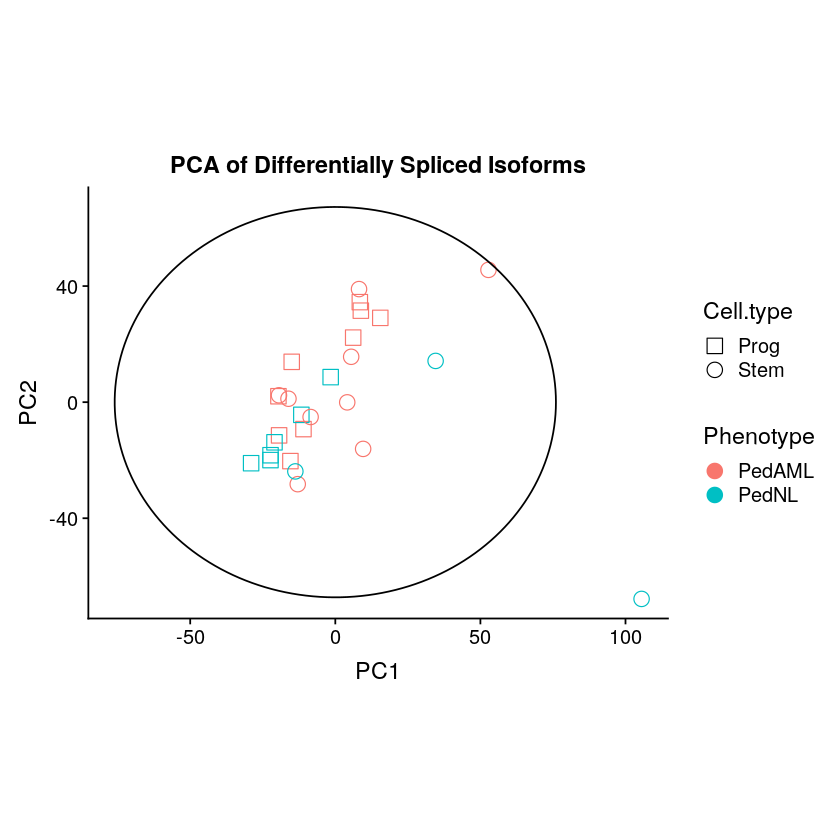

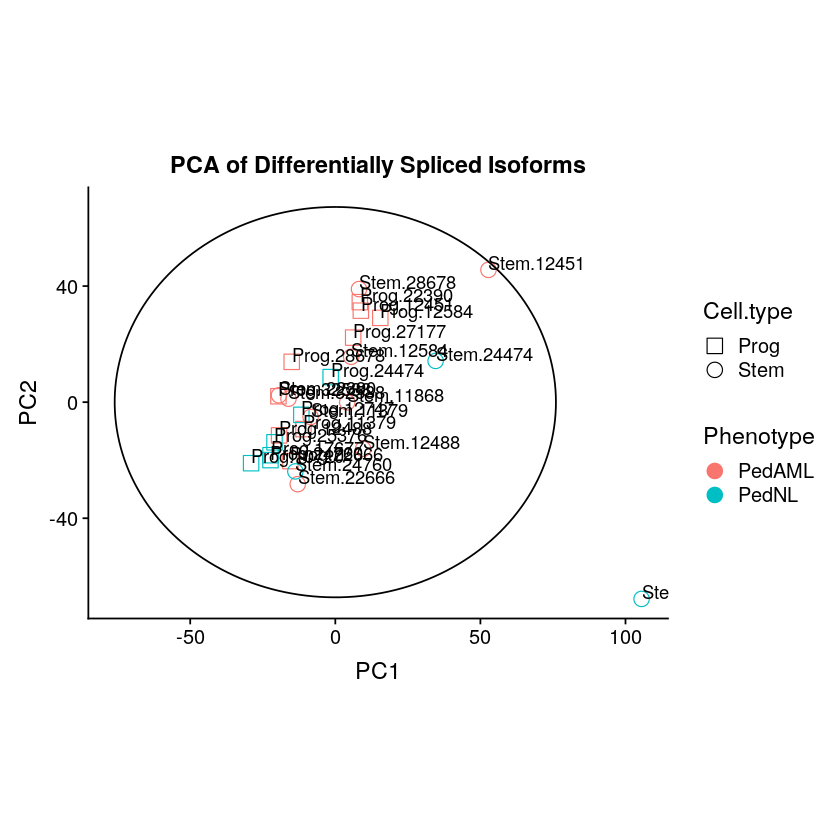

In [144]:
groupColName = "Cell.type"
sampleColName = "Sample"
colorColName = "Phenotype"
designColNameForLabels= "Patient.cell"

pcaplot.out <- makeAndPrintPca.gl("PCA of Differentially Spliced Isoforms", lcpm2.Prog.Stem_PedAMLvPedNL_union_nf, DGE_PedAML_PedNL.Prog.Stem$samples, 
                   groupColName, sampleColName, colorColName, NULL, labelOnlyOutliers=TRUE)    
pcaplot.out <- makeAndPrintPca.gl("PCA of Differentially Spliced Isoforms", lcpm2.Prog.Stem_PedAMLvPedNL_union_nf, DGE_PedAML_PedNL.Prog.Stem$samples, 
                   groupColName, sampleColName, colorColName, designColNameForLabels, labelOnlyOutliers=FALSE)    

In [70]:
PedNLvPedAML_overlapASE_SE_f.spl[1:2]
PedNLvPedAML_overlapASE_SE_Isos[1:2]
#ANNOT_ex[ANNOT_ex$ex_coord %in% PedNLvPedAML_overlapASE_SE_f.spl[[1]]$SEcoord,]
#ANNOT_ex[ANNOT_ex$ex_coord %in% PedNLvPedAML_overlapASE_SE_f.spl[[1]]$UpEcoord,]
#ANNOT_ex[ANNOT_ex$ex_coord %in% PedNLvPedAML_overlapASE_SE_f.spl[[1]]$DnEcoord,]

ANNOT_ex[ANNOT_ex$ex_coord %in% PedNLvPedAML_overlapASE_SE_f.spl[[2]]$SEcoord,]
ANNOT_ex[ANNOT_ex$ex_coord %in% PedNLvPedAML_overlapASE_SE_f.spl[[2]]$UpEcoord,]
ANNOT_ex[ANNOT_ex$ex_coord %in% PedNLvPedAML_overlapASE_SE_f.spl[[2]]$DnEcoord,]

$ABI1
      ID          GeneID geneSymbol   chr strand exonStart_0base  exonEnd
83 30351 ENSG00000136754       ABI1 chr10      -        26771074 26771089
   upstreamES upstreamEE downstreamES downstreamEE                 SEcoord
83   26770244   26770345     26777064     26777241 chr10_26771075_26771089
                  UpEcoord                DnEcoord
83 chr10_26770245_26770345 chr10_26777065_26777241

$ACSL3
       ID          GeneID geneSymbol  chr strand exonStart_0base   exonEnd
153 51912 ENSG00000123983      ACSL3 chr2      +       222918045 222918155
    upstreamES upstreamEE downstreamES downstreamEE                  SEcoord
153  222916318  222916496    222919063    222919202 chr2_222918046_222918155
                    UpEcoord                 DnEcoord
153 chr2_222916319_222916496 chr2_222919064_222919202

$ABI1
$ABI1[[1]]
[1] "ENST00000346832" "ENST00000359188" "ENST00000376137" "ENST00000376138"
[5] "ENST00000376140" "ENST00000376142" "ENST00000376170" "ENST00000536334"

$ABI1[[2]]
[1] "ENST00000376139" "ENST00000376160" "ENST00000376166"


$ACSL3
$ACSL3[[1]]
[1] "ENST00000357430" "ENST00000392066" "ENST00000540115"

$ACSL3[[2]]
character(0)

chr  start     stop      stand gene_type      gene_id           
203513 chr2 222918046 222918155 +     protein_coding ENSG00000123983.13
203529 chr2 222918046 222918155 +     protein_coding ENSG00000123983.13
203551 chr2 222918046 222918155 +     protein_coding ENSG00000123983.13
       transcript_id     gene_name transcript_type exon_number
203513 ENST00000357430.7 ACSL3     protein_coding  6          
203529 ENST00000392066.7 ACSL3     protein_coding  5          
203551 ENST00000540115.1 ACSL3     protein_coding  3          
       exon_id           ex_coord                
203513 ENSE00000922400.1 chr2_222918046_222918155
203529 ENSE00000922400.1 chr2_222918046_222918155
203551 ENSE00000922400.1 chr2_222918046_222918155

chr  start     stop      stand gene_type      gene_id           
203512 chr2 222916319 222916496 +     protein_coding ENSG00000123983.13
203528 chr2 222916319 222916496 +     protein_coding ENSG00000123983.13
203550 chr2 222916319 222916496 +     protein_coding ENSG00000123983.13
       transcript_id     gene_name transcript_type exon_number
203512 ENST00000357430.7 ACSL3     protein_coding  5          
203528 ENST00000392066.7 ACSL3     protein_coding  4          
203550 ENST00000540115.1 ACSL3     protein_coding  2          
       exon_id           ex_coord                
203512 ENSE00003463885.1 chr2_222916319_222916496
203528 ENSE00003463885.1 chr2_222916319_222916496
203550 ENSE00003626822.1 chr2_222916319_222916496

chr  start     stop      stand gene_type      gene_id           
203514 chr2 222919064 222919202 +     protein_coding ENSG00000123983.13
203530 chr2 222919064 222919202 +     protein_coding ENSG00000123983.13
203552 chr2 222919064 222919202 +     protein_coding ENSG00000123983.13
       transcript_id     gene_name transcript_type exon_number
203514 ENST00000357430.7 ACSL3     protein_coding  7          
203530 ENST00000392066.7 ACSL3     protein_coding  6          
203552 ENST00000540115.1 ACSL3     protein_coding  4          
       exon_id           ex_coord                
203514 ENSE00000786329.1 chr2_222919064_222919202
203530 ENSE00000786329.1 chr2_222919064_222919202
203552 ENSE00000786329.1 chr2_222919064_222919202

In [132]:
lcpm2.Prog.Stem.med <- apply(lcpm2.Prog.Stem, 1, median)
head(lcpm2.Prog.Stem.med)
PedNLvPedAML_overlapASE_SE_Isos_exp <- lapply(PedNLvPedAML_overlapASE_SE_Isos, function(x) {
    r <- lcpm2.Prog.Stem.med[names(lcpm2.Prog.Stem.med) %in% x[[1]]]
    s <- lcpm2.Prog.Stem.med[names(lcpm2.Prog.Stem.med) %in% x[[2]]]
    if(length(r) > 0) {
        r.max <- names(r)[which(r == max(r))]
    } else {
        r.max <- c()
    }
    if(length(s) > 0) {
        s.max <- names(s)[which(s == max(s))]
    } else {
        s.max <- c()
    }
    c(r.max, s.max)
})
lcpm2.Prog.Stem_PedAMLvPedNL_overlap_nf <- lcpm2.Prog.Stem[rownames(lcpm2.Prog.Stem) %in% unlist(PedNLvPedAML_overlapASE_SE_Isos_exp),]
colnames(lcpm2.Prog.Stem_PedAMLvPedNL_overlap_nf) <- gsub("X", "", colnames(lcpm2.Prog.Stem_PedAMLvPedNL_overlap_nf))

ENST00000371582 ENST00000371584 ENST00000371588 ENST00000466152 ENST00000367770 
      1.6568731       1.3185915       5.6432140       0.1302372       2.2338296 
ENST00000367771 
      2.1760762

In [124]:
lcpm2.Prog.Stem.filt2 <- lcpm2.Prog.Stem[rownames(lcpm2.Prog.Stem) %in% unlist(PedNLvPedAML_overlapASE_SE_Isos_exp),]
colnames(lcpm2.Prog.Stem.filt2) <- gsub("X", "", colnames(lcpm2.Prog.Stem.filt2))
table(colnames(lcpm2.Prog.Stem.filt2) %in% DGE_PedAML_PedNL.Prog.Stem$samples$Sample)
dim(lcpm2.Prog.Stem.filt2)
head(lcpm2.Prog.Stem.filt2)
#plot(density(PedAMLvsPedNL.Prog.Stem.var.high[names(PedAMLvsPedNL.Prog.Stem.var.high) %in% rownames(lcpm2.Prog.Stem)]))
reformatDfForPca(lcpm2.Prog.Stem.filt2, DGE_PedAML_PedNL.Prog.Stem$samples, "Sample")


TRUE 
  27 

[1] 287  27

02id38cellPROGENITORS 06id90cellPROGENITORS
ENST00000343338 -7.165955              0.1963711           
ENST00000526601  2.764657             -7.1659554           
ENST00000418978  2.689445              2.5972326           
ENST00000337002  5.383569              4.8986818           
ENST00000321233  7.156123              7.8756593           
ENST00000394673  7.723669              8.5198712           
                04id78cellPROGENITORS 06id00066PRO 01x00077xPROGENIT
ENST00000343338 -7.165955             4.047510     -7.165955        
ENST00000526601  2.173123             2.155075     -7.165955        
ENST00000418978  2.260248             2.351044      2.608133        
ENST00000337002  4.444692             5.812827      4.243229        
ENST00000321233  7.738560             4.868668      6.493395        
ENST00000394673  8.032885             6.960931      8.063169        
                03x11379xHPCxxxxx 14x12488xPLUSPLUS 15x12584xPLUSPLUS
ENST00000343338 2.508129          2.771255          -7.165955        
ENST00000526601 2.023892          2.102852          -7.165955        
ENST00000418978 1.187956          2.136307           2.401682        
ENST00000337002 4.923294          4.708022           4.186412        
ENST00000321233 5.480350          5.949917           7.013827        
ENST00000394673 7.503212          7.738117           8.391300        
                17x12451xPLUSPLUS 05x00047xPLUSPLUS ⋯ 03id78cellHSC
ENST00000343338 -7.165955         -3.313511         ⋯ -7.165955    
ENST00000526601  1.179110          2.629187         ⋯  2.909650    
ENST00000418978  3.544186          2.507762         ⋯  1.785016    
ENST00000337002  4.992401          4.613674         ⋯  5.228165    
ENST00000321233  6.994271          5.996508         ⋯  8.189968    
ENST00000394673  8.214185          7.838088         ⋯  8.671561    
                05id00066HSC 02x11379xHSCxxxxx 04x00068xPLUSMINS
ENST00000343338 4.317095     3.5406151          1.269069        
ENST00000526601 2.283199     3.0190331         -7.165955        
ENST00000418978 2.332899     0.9744606          3.751916        
ENST00000337002 5.912193     5.4918855          4.853152        
ENST00000321233 5.730222     5.3185632          5.301326        
ENST00000394673 6.958085     7.5406428          6.777376        
                12x12484xPLUSMINS 13x12488xPLUSMINS 16x12451xPLUSMINS
ENST00000343338 -7.165955          2.939901         2.840350         
ENST00000526601  1.732218         -7.165955         1.992849         
ENST00000418978  4.519535          3.888999         3.341040         
ENST00000337002  5.161434          5.025253         5.025888         
ENST00000321233  5.834784          5.364585         6.502936         
ENST00000394673  7.413273          6.847519         7.916880         
                01pid24760ctHSC 03pid24474ctHSC 05pid25376ctHSC
ENST00000343338 3.686751        2.052989        -7.165955      
ENST00000526601 3.003699        2.445459         4.869623      
ENST00000418978 2.007005        3.568659         3.492136      
ENST00000337002 5.619312        5.151378         4.723533      
ENST00000321233 5.691664        6.908881         4.728058      
ENST00000394673 6.890112        8.000335         6.977652

[,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
[1,] NA   NA   NA   NA   NA   NA   NA   NA   NA   NA    ⋯     NA    NA    NA   
     [,15] [,16] [,17] [,18] [,19] [,20] [,21]
[1,] NA    NA    NA    NA    NA    NA    NA

PCA of Differentially Spliced Isoforms

PC1      PC2      PC3      PC4      PC5      PC6     
Standard deviation     7.622948 7.016391 5.229802 4.859266 4.232218 3.969397
Proportion of Variance 0.202470 0.171530 0.095300 0.082270 0.062410 0.054900
Cumulative Proportion  0.202470 0.374000 0.469300 0.551580 0.613990 0.668890
                       PC7      PC8      PC9      PC10     ⋯ PC18     PC19    
Standard deviation     3.942549 3.262614 3.088396 2.998984 ⋯ 1.739595 1.570851
Proportion of Variance 0.054160 0.037090 0.033230 0.031340 ⋯ 0.010540 0.008600
Cumulative Proportion  0.723040 0.760130 0.793370 0.824710 ⋯ 0.955630 0.964230
                       PC20     PC21     PC22     PC23    PC24     PC25    
Standard deviation     1.439763 1.404035 1.250354 1.16414 1.126762 1.040369
Proportion of Variance 0.007220 0.006870 0.005450 0.00472 0.004420 0.003770
Cumulative Proportion  0.971450 0.978320 0.983770 0.98849 0.992920 0.996690
                       PC26      PC27        
Standard deviation     0.9751036 5.055556e-15
Proportion of Variance 0.0033100 0.000000e+00
Cumulative Proportion  1.0000000 1.000000e+00

Coordinate system already present. Adding new coordinate system, which will replace the existing one.


PCA of Differentially Spliced Isoforms

PC1      PC2      PC3      PC4      PC5      PC6     
Standard deviation     7.622948 7.016391 5.229802 4.859266 4.232218 3.969397
Proportion of Variance 0.202470 0.171530 0.095300 0.082270 0.062410 0.054900
Cumulative Proportion  0.202470 0.374000 0.469300 0.551580 0.613990 0.668890
                       PC7      PC8      PC9      PC10     ⋯ PC18     PC19    
Standard deviation     3.942549 3.262614 3.088396 2.998984 ⋯ 1.739595 1.570851
Proportion of Variance 0.054160 0.037090 0.033230 0.031340 ⋯ 0.010540 0.008600
Cumulative Proportion  0.723040 0.760130 0.793370 0.824710 ⋯ 0.955630 0.964230
                       PC20     PC21     PC22     PC23    PC24     PC25    
Standard deviation     1.439763 1.404035 1.250354 1.16414 1.126762 1.040369
Proportion of Variance 0.007220 0.006870 0.005450 0.00472 0.004420 0.003770
Cumulative Proportion  0.971450 0.978320 0.983770 0.98849 0.992920 0.996690
                       PC26      PC27        
Standard deviation     0.9751036 5.055556e-15
Proportion of Variance 0.0033100 0.000000e+00
Cumulative Proportion  1.0000000 1.000000e+00

Coordinate system already present. Adding new coordinate system, which will replace the existing one.


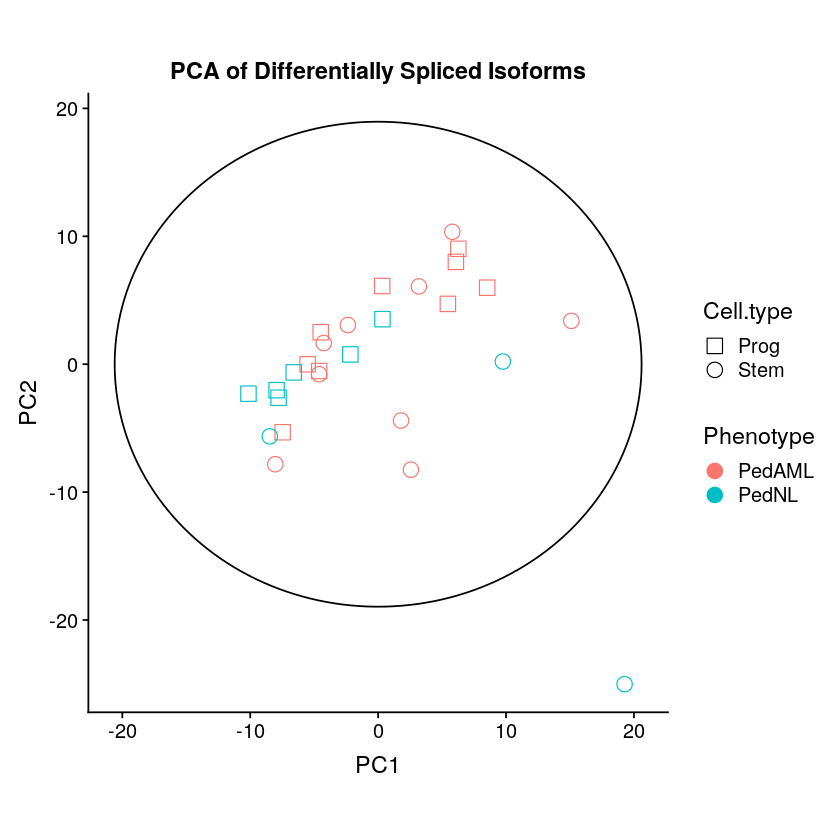

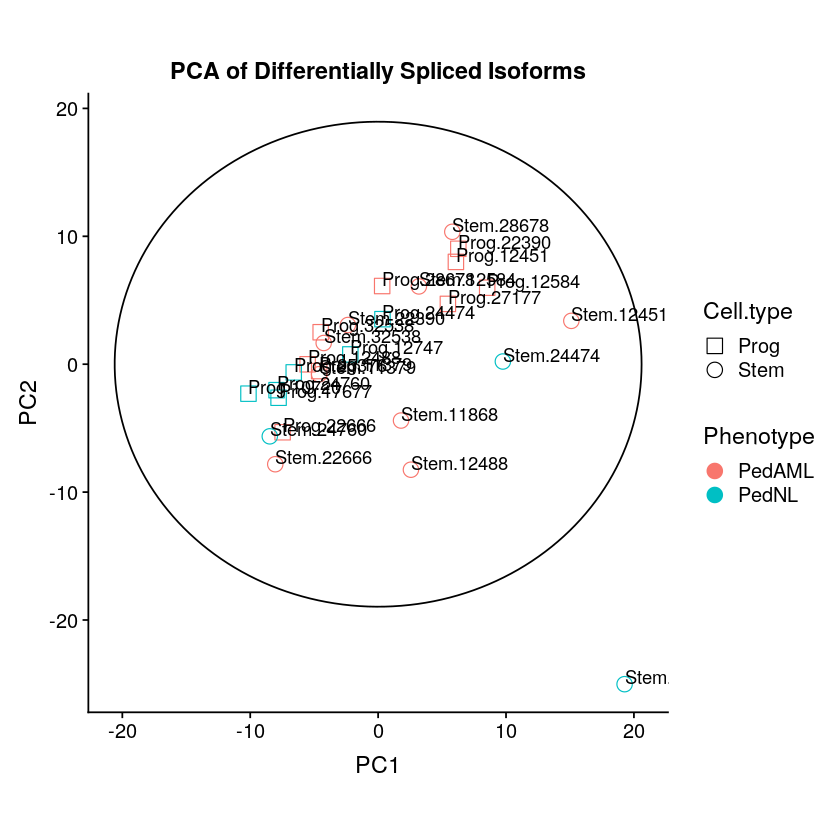

In [125]:
groupColName = "Cell.type"
sampleColName = "Sample"
colorColName = "Phenotype"
designColNameForLabels= "Patient.cell"
pcaplot.out <- makeAndPrintPca.gl("PCA of Differentially Spliced Isoforms", lcpm2.Prog.Stem.filt2, DGE_PedAML_PedNL.Prog.Stem$samples, 
                   groupColName, sampleColName, colorColName, NULL, labelOnlyOutliers=TRUE)    
pcaplot.out <- makeAndPrintPca.gl("PCA of Differentially Spliced Isoforms", lcpm2.Prog.Stem.filt2, DGE_PedAML_PedNL.Prog.Stem$samples, 
                   groupColName, sampleColName, colorColName, designColNameForLabels, labelOnlyOutliers=FALSE)    

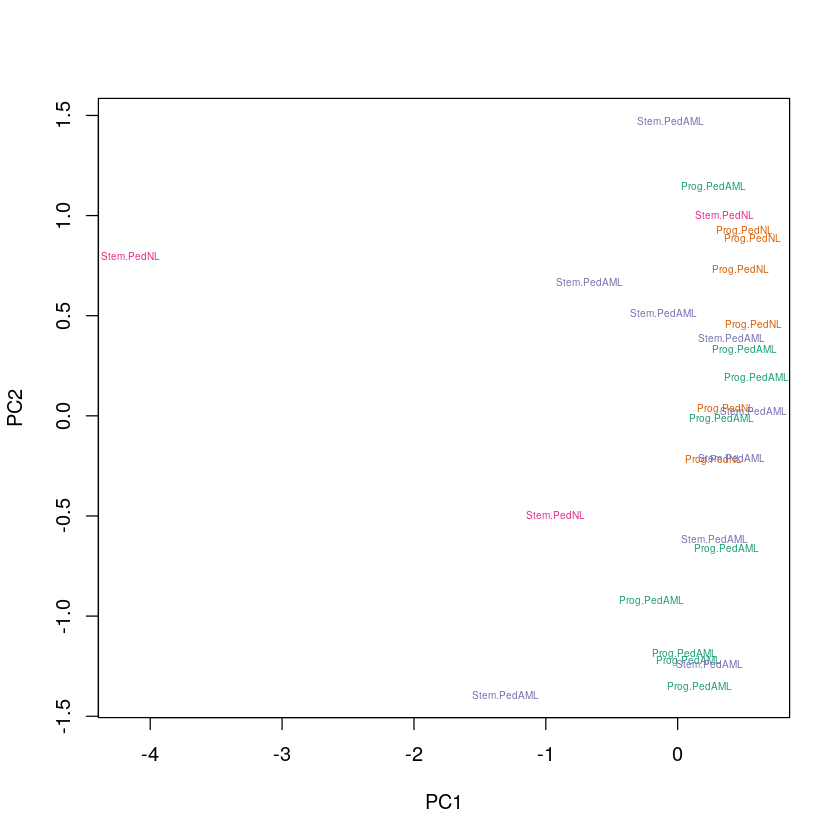

In [127]:
plotMdsColoredByColumn(lcpm2.Prog.Stem.filt2, DGE_PedAML_PedNL.Prog.Stem$samples$Phenotype.cell)

## Make Heatmaps

In [34]:
library(RColorBrewer)
mycol <- colorpanel(100,"#4B617D","white","#a63a45")
subGroups <- which(DGE_all.Prog.filt$samples$group %in% c("PedAML", "PedNL"))
group_col = c("#8DD3C7", "#FFFFB3")[as.factor(as.character(DGE_all.Prog.filt$samples$group[subGroups]))]
lcpm2.var <- apply(lcpm2.Prog.filt, 1, var)
lcpm2.Prog.filt.ord <- lcpm2.Prog.filt[order(lcpm2.var, decreasing=TRUE),]
dim(lcpm2.Prog.filt.ord)
geneNames <- row.names(lcpm2.Prog.filt)[1:500]

png(filename = "DeWerf_PediatricAML_IsoformHeatmaps_Top100_Progenitors_05122020.png", height = 10, width = 7, 
      units = "in", res = 300) 
heatmap.2(lcpm2.Prog.filt.ord[1:1000,subGroups], scale="row", labRow="", 
                 labCol=DGE_all.Prog.filt$samples$Patient.ID, # May need to change to represent variable containing sample name
                 ColSideColors=group_col,
                 col=mycol, trace="none", density.info="none", dendrogram="column",
                 margin=c(8,8), lhei=c(2,10))  
        legend("topleft", fill=unique(group_col), legend=c("PedAML", "PedNL"),
               inset=c(0,0.1), cex=0.5)
dev.off()

[1] 33937    20

png 
  2

In [35]:
library(RColorBrewer)
mycol <- colorpanel(100,"#4B617D","white","#a63a45")
subGroups <- which(DGE_all.Stem.filt$samples$group %in% c("PedAML", "PedNL"))
#group_col = brewer.pal(12, "Set3")
group_col = c("#8DD3C7", "#FFFFB3")[as.factor(as.character(DGE_all.Stem.filt$samples$group[subGroups]))]
lcpm2.var <- apply(lcpm2.Stem.filt, 1, var)
lcpm2.Stem.filt.ord <- lcpm2.Stem.filt[order(lcpm2.var, decreasing=TRUE),]
dim(lcpm2.Stem.filt.ord)
geneNames <- row.names(lcpm2.Stem.filt)[1:500]
png(filename = "DeWerf_PediatricAML_IsoformHeatmaps_Top100_StemCells_05122020.png", height = 10, width = 7, 
      units = "in", res = 300) 
heatmap.2(lcpm2.Stem.filt.ord[1:1000,subGroups], scale="row", labRow="", 
                 labCol=DGE_all.Stem.filt$samples$Patient.ID, # May need to change to represent variable containing sample name
                 ColSideColors=group_col,
                 col=mycol, trace="none", density.info="none", dendrogram="column",
                 margin=c(8,8), lhei=c(2,10))  
        legend("topleft", fill=unique(group_col), legend=c("PedAML", "PedNL"),
               inset=c(0,0.1), cex=0.5)
dev.off()

[1] 34983    16

png 
  2

In [181]:
dim(lcpm2.Prog.Stem)
DGE_PedAML_PedNL.Prog.Stem$samples

[1] 39957    27

group  lib.size norm.factors
X02id38cellPROGENITORS PedAML 33506923 0.8878772   
X06id90cellPROGENITORS PedAML 32743681 0.8742264   
X04id78cellPROGENITORS PedAML 41117771 0.8437292   
X06id00066PRO          PedAML 29578619 1.1263939   
X01x00077xPROGENIT     PedAML 28726599 0.9351810   
X03x11379xHPCxxxxx     PedAML 41749636 1.0546532   
X14x12488xPLUSPLUS     PedAML 47149438 1.0754395   
X15x12584xPLUSPLUS     PedAML 37564236 0.8625119   
X17x12451xPLUSPLUS     PedAML 40247828 0.9254235   
X05x00047xPLUSPLUS     PedNL  36432613 1.0437197   
X06x00077xPLUSPLUS     PedNL  61272093 1.1436950   
X18x10720xPLUSPLUS     PedNL  43552076 1.0103288   
X02pid24760ctHPC       PedNL  44769188 1.0908160   
X04pid24474ctHPC       PedNL  42583940 1.0383659   
X06pid25376ctHPC       PedNL  46812746 1.0756377   
X01id38cellHSC         PedAML 40562407 0.9483331   
Xcell05id90HSC         PedAML 32370500 0.8906221   
X03id78cellHSC         PedAML 28237654 0.7962592   
X05id00066HSC          PedAML 15643362 1.1390643   
X02x11379xHSCxxxxx     PedAML 43951916 0.9245214   
X04x00068xPLUSMINS     PedAML 24011158 1.0310025   
X12x12484xPLUSMINS     PedAML 41617578 0.8293247   
X13x12488xPLUSMINS     PedAML 30085624 1.0685218   
X16x12451xPLUSMINS     PedAML 21919895 1.0564520   
X01pid24760ctHSC       PedNL  38595402 1.0874040   
X03pid24474ctHSC       PedNL  29020725 1.0406431   
X05pid25376ctHSC       PedNL  15054889 1.4087171   
                       SequenceRun                                               
X02id38cellPROGENITORS ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91
X06id90cellPROGENITORS ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91
X04id78cellPROGENITORS ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91
X06id00066PRO          ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91
X01x00077xPROGENIT     ca_ne_630_001_400_060_JAMIESON_SN_human-ensembl-grch38-r91
X03x11379xHPCxxxxx     ca_ne_630_001_400_060_JAMIESON_SN_human-ensembl-grch38-r91
X14x12488xPLUSPLUS     ca_ne_650_001_360_060_JAMIESON_SN_human-ensembl-grch38-r91
X15x12584xPLUSPLUS     ca_ne_650_001_360_060_JAMIESON_SN_human-ensembl-grch38-r91
X17x12451xPLUSPLUS     ca_ne_650_001_360_060_JAMIESON_SN_human-ensembl-grch38-r91
X05x00047xPLUSPLUS     ca_ne_630_001_400_060_JAMIESON_SN_human-ensembl-grch38-r91
X06x00077xPLUSPLUS     ca_ne_630_001_400_060_JAMIESON_SN_human-ensembl-grch38-r91
X18x10720xPLUSPLUS     ca_ne_650_001_360_060_JAMIESON_SN_human-ensembl-grch38-r91
X02pid24760ctHPC       ca_ne_714_001_400_070_JAMIESON_SN_human-ensembl-grch38-r91
X04pid24474ctHPC       ca_ne_714_001_400_070_JAMIESON_SN_human-ensembl-grch38-r91
X06pid25376ctHPC       ca_ne_714_001_400_070_JAMIESON_SN_human-ensembl-grch38-r91
X01id38cellHSC         ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91
Xcell05id90HSC         ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91
X03id78cellHSC         ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91
X05id00066HSC          ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91
X02x11379xHSCxxxxx     ca_ne_630_001_400_060_JAMIESON_SN_human-ensembl-grch38-r91
X04x00068xPLUSMINS     ca_ne_630_001_400_060_JAMIESON_SN_human-ensembl-grch38-r91
X12x12484xPLUSMINS     ca_ne_645_001_300_060_JAMIESON_SN_human-ensembl-grch38-r91
X13x12488xPLUSMINS     ca_ne_650_001_360_060_JAMIESON_SN_human-ensembl-grch38-r91
X16x12451xPLUSMINS     ca_ne_650_001_360_060_JAMIESON_SN_human-ensembl-grch38-r91
X01pid24760ctHSC       ca_ne_714_001_400_070_JAMIESON_SN_human-ensembl-grch38-r91
X03pid24474ctHSC       ca_ne_714_001_400_070_JAMIESON_SN_human-ensembl-grch38-r91
X05pid25376ctHSC       ca_ne_714_001_400_070_JAMIESON_SN_human-ensembl-grch38-r91
                       SequenceDate Sample                SampleName    
X02id38cellPROGENITORS 5/5/19       02id38cellPROGENITORS 38 Progenitors
X06id90cellPROGENITORS 5/5/19       06id90cellPROGENITORS 90 Progenitors
X04id78cellPROGENITORS 5/5/19       04id78cellPROGEN

            
             AML non-leukemic
  CD34+CD38-   9            3
  CD34+CD38+   9            6

[1] 39957    27

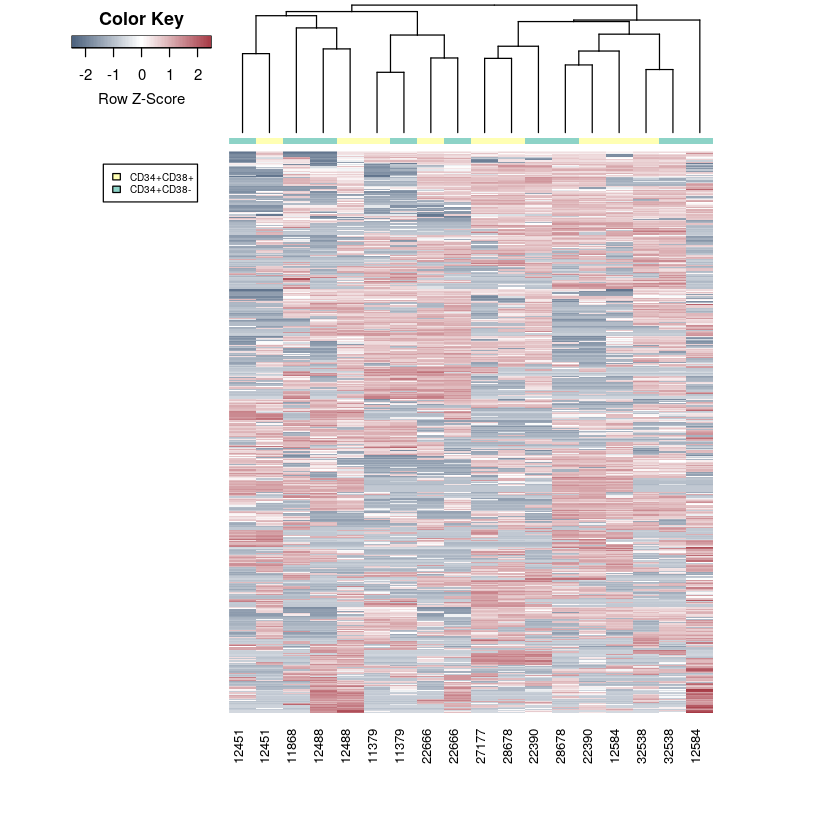

In [194]:
mycol <- colorpanel(100,"#4B617D","white","#a63a45")
DGE_PedAML_PedNL.Prog.Stem$samples$Sorted.Cell.Type2 <- gsub("3", "CD3", DGE_PedAML_PedNL.Prog.Stem$samples$Sorted.Cell.Type)
table(DGE_PedAML_PedNL.Prog.Stem$samples$Sorted.Cell.Type2,
      DGE_PedAML_PedNL.Prog.Stem$samples$Disease)
subGroups <- which(DGE_PedAML_PedNL.Prog.Stem$samples$Sorted.Cell.Type2 %in% c("CD34+CD38+", "CD34+CD38-") &
                  DGE_PedAML_PedNL.Prog.Stem$samples$Disease %in% "AML")
group_col = c("#8DD3C7", "#FFFFB3")[as.factor(as.character(DGE_PedAML_PedNL.Prog.Stem$samples$Sorted.Cell.Type2[subGroups]))]
lcpm2.Prog.Stem.subGroups <- lcpm2.Prog.Stem[,subGroups]
lcpm2.Prog.Stem.var <- apply(lcpm2.Prog.Stem.subGroups, 1, var)
lcpm2.Prog.Stem.ord <- lcpm2.Prog.Stem[order(lcpm2.Prog.Stem.var, decreasing=TRUE),]
dim(lcpm2.Prog.Stem.ord)
geneNames <- row.names(lcpm2.Prog.Stem)[1:1000]

#png(filename = "DeWerf_PediatricAML_IsoformHeatmaps_Top1000_Progenitors_StemCells_05122020.png", height = 10, width = 7, 
#      units = "in", res = 300) 
heatmap.2(lcpm2.Prog.Stem.ord[1:500,subGroups], scale="row", labRow="", 
                 labCol=DGE_PedAML_PedNL.Prog.Stem$samples$Patient.ID[subGroups], # May need to change to represent variable containing sample name
                 ColSideColors=group_col,
                 col=mycol, trace="none", density.info="none", dendrogram="column",
                 margin=c(8,8), lhei=c(2,10))  
        legend("topleft", fill=unique(group_col), legend=c("CD34+CD38+", "CD34+CD38-"),
               inset=c(0,0.1), cex=0.5)
#dev.off()

In [69]:
 brewer.pal(12, "Set3")
subGroups
c("#8DD3C7", "#FFFFB3")[as.factor(as.character(DGE_all.Stem.filt$samples$group[subGroups]))]
as.factor(DGE_all.Stem.filt$samples$group[subGroups])

[1] "#8DD3C7" "#FFFFB3" "#BEBADA" "#FB8072" "#80B1D3" "#FDB462" "#B3DE69"
 [8] "#FCCDE5" "#D9D9D9" "#BC80BD" "#CCEBC5" "#FFED6F"

[1]  1  2  3  4  5  6  7  8  9 14 15 16

[1] "#8DD3C7" "#8DD3C7" "#8DD3C7" "#8DD3C7" "#8DD3C7" "#8DD3C7" "#8DD3C7"
 [8] "#8DD3C7" "#8DD3C7" "#FFFFB3" "#FFFFB3" "#FFFFB3"

[1] PedAML PedAML PedAML PedAML PedAML PedAML PedAML PedAML PedAML PedNL 
[11] PedNL  PedNL 
Levels: PedAML AdultAML PedNL

## SF3B1, SF3B2, SF3B3, & PHF5A Isoform Expression Analysis
### SF3B1 (ENSG00000115524) transcripts are: 
* "SF3B1-001", "ENST00000335508", "1304aa, "Protein coding"
* "SF3B1-014", "ENST00000414963", "144aa", "Protein coding"
* "SF3B1-005", "ENST00000409915", "144aa", "Protein coding"
* "SF3B1-004", "ENST00000487698", "154aa", "Protein coding"
* "SF3B1-012", "ENST00000424674", "241aa", "Protein coding"
* "SF3B1-003", "ENST00000414174", "37aa", "Nonsense mediated decay"
* "SF3B1-013", "ENST00000462613", "No protein", "Processed transcript"
* "SF3B1-002", "ENST00000470268", "No protein", "Retained intron"
* "SF3B1-010", "ENST00000482158", "No protein", "Retained intron"
* "SF3B1-007", "ENST00000479532", "No protein", "Retained intron"
* "SF3B1-008", "ENST00000468925", "No protein", "Retained intron"
* "SF3B1-011", "ENST00000496458", "No protein", "Retained intron"

### SF3B2 (ENSG00000087365) transcripts are: 
* "SF3B2-001", "ENST00000322535", "895aa", "Protein coding"
* "SF3B2-006", "ENST00000528302", "878aa", "Protein coding"
* "SF3B2-018", "ENST00000530322", "387aa", "Protein coding"
* "SF3B2-012", "ENST00000533595", "353aa", "Protein coding"
* "SF3B2-015", "ENST00000530981", "315aa", "Protein coding"
* "SF3B2-019", "ENST00000524627", "273aa", "Protein coding"
* "SF3B2-009", "ENST00000524475", "80aa", "Protein coding"
* "SF3B2-008", "ENST00000534307", "No protein", "Processed transcript"
* "SF3B2-007", "ENST00000529577", "No protein", "Processed transcript"
* "SF3B2-014", "ENST00000533421", "No protein", "Processed transcript"
* "SF3B2-004", "ENST00000534765", "No protein", "Retained intron"
* "SF3B2-002", "ENST00000531041", "No protein", "Retained intron"
* "SF3B2-016", "ENST00000529994", "No protein", "Retained intron"
* "SF3B2-010", "ENST00000531589", "No protein", "Retained intron"
* "SF3B2-017", "ENST00000525207", "No protein", "Retained intron"
* "SF3B2-011", "ENST00000526653", "No protein", "Retained intron"

### SF3B3 (ENSG00000189091) transcripts are: 
* "SF3B3-001", "ENST00000302516", "1217aa", "Protein coding"
* "SF3B3-004", "ENST00000564899", "4aa", "Protein coding"
* "SF3B3-018", "ENST00000577085", "72aa", "Protein coding"
* "SF3B3-003", "ENST00000566095", "30aa", "Protein coding"
* "SF3B3-006", "ENST00000567654", "57aa", "Protein coding"
* "SF3B3-005", "ENST00000569687", "31aa", "Protein coding"
* "SF3B3-007", "ENST00000567635", "91aa", "Nonsense mediated decay"
* "SF3B3-010", "ENST00000563739", "No protein", "Retained intron"
* "SF3B3-008", "ENST00000567250", "No protein", "Retained intron"
* "SF3B3-009", "ENST00000568291", "No protein", "Retained intron"
* "SF3B3-014", "ENST00000565990", "No protein", "Retained intron"
* "SF3B3-011", "ENST00000562722", "No protein", "Retained intron"
* "SF3B3-016", "ENST00000572365", "No protein", "Retained intron"
* "SF3B3-012", "ENST00000568539", "No protein", "Retained intron"

### PHF5A (ENSG00000100410) transcripts are: 
* "PHF5A-001", "ENST00000216252", "110aa", "Protein coding"
* "PHF5A-003", "ENST00000491254", "No protein", "Processed transcript"
* "PHF5A-002", "ENST00000459687", "No protein", "Retained intron"

In [216]:
sf3b1.tx <- as.data.frame(rbind(c("SF3B1-001", "ENST00000335508", "1304aa", "Protein coding"),
c("SF3B1-014", "ENST00000414963", "144aa", "Protein coding"),
c("SF3B1-005", "ENST00000409915", "144aa", "Protein coding"),
c("SF3B1-004", "ENST00000487698", "154aa", "Protein coding"),
c("SF3B1-012", "ENST00000424674", "241aa", "Protein coding"),
c("SF3B1-003", "ENST00000414174", "37aa", "Nonsense mediated decay"),
c("SF3B1-013", "ENST00000462613", "No protein", "Processed transcript"),
c("SF3B1-002", "ENST00000470268", "No protein", "Retained intron"),
c("SF3B1-010", "ENST00000482158", "No protein", "Retained intron"),
c("SF3B1-007", "ENST00000479532", "No protein", "Retained intron"),
c("SF3B1-008", "ENST00000468925", "No protein", "Retained intron"),
c("SF3B1-011", "ENST00000496458", "No protein", "Retained intron")))
colnames(sf3b1.tx) <- c("IsoName", "ENS", "Pr", "Tx")
sf3b1.tx$ENS <- as.character(sf3b1.tx$ENS)
sf3b1.tx$IsoName <- factor(as.character(sf3b1.tx$IsoName), 
                           levels=c("SF3B1-001", "SF3B1-002", "SF3B1-003", "SF3B1-004", "SF3B1-005", "SF3B1-007", 
                                    "SF3B1-008", "SF3B1-010", "SF3B1-011", "SF3B1-012", "SF3B1-013", "SF3B1-014"))
sf3b1.tx <- with(sf3b1.tx, sf3b1.tx[order(IsoName),])
sf3b1.tx

IsoName   ENS             Pr         Tx                     
1  SF3B1-001 ENST00000335508 1304aa     Protein coding         
8  SF3B1-002 ENST00000470268 No protein Retained intron        
6  SF3B1-003 ENST00000414174 37aa       Nonsense mediated decay
4  SF3B1-004 ENST00000487698 154aa      Protein coding         
3  SF3B1-005 ENST00000409915 144aa      Protein coding         
10 SF3B1-007 ENST00000479532 No protein Retained intron        
11 SF3B1-008 ENST00000468925 No protein Retained intron        
9  SF3B1-010 ENST00000482158 No protein Retained intron        
12 SF3B1-011 ENST00000496458 No protein Retained intron        
5  SF3B1-012 ENST00000424674 241aa      Protein coding         
7  SF3B1-013 ENST00000462613 No protein Processed transcript   
2  SF3B1-014 ENST00000414963 144aa      Protein coding

In [218]:
SF3B2.tx <- as.data.frame(rbind(c("SF3B2-001", "ENST00000322535", "895aa", "Protein coding"),
c("SF3B2-006", "ENST00000528302", "878aa", "Protein coding"),
c("SF3B2-018", "ENST00000530322", "387aa", "Protein coding"),
c("SF3B2-012", "ENST00000533595", "353aa", "Protein coding"),
c("SF3B2-015", "ENST00000530981", "315aa", "Protein coding"),
c("SF3B2-019", "ENST00000524627", "273aa", "Protein coding"),
c("SF3B2-009", "ENST00000524475", "80aa", "Protein coding"),
c("SF3B2-008", "ENST00000534307", "No protein", "Processed transcript"),
c("SF3B2-007", "ENST00000529577", "No protein", "Processed transcript"),
c("SF3B2-014", "ENST00000533421", "No protein", "Processed transcript"),
c("SF3B2-004", "ENST00000534765", "No protein", "Retained intron"),
c("SF3B2-002", "ENST00000531041", "No protein", "Retained intron"),
c("SF3B2-016", "ENST00000529994", "No protein", "Retained intron"),
c("SF3B2-010", "ENST00000531589", "No protein", "Retained intron"),
c("SF3B2-017", "ENST00000525207", "No protein", "Retained intron"),
c("SF3B2-011", "ENST00000526653", "No protein", "Retained intron")))
colnames(SF3B2.tx) <- c("IsoName", "ENS", "Pr", "Tx")
SF3B2.tx$ENS <- as.character(SF3B2.tx$ENS)
SF3B2.tx$IsoName <- factor(as.character(SF3B2.tx$IsoName), 
                           levels=c("SF3B2-001", "SF3B2-002", "SF3B2-004", "SF3B2-006", "SF3B2-007", "SF3B2-008", 
                                    "SF3B2-009", "SF3B2-010", "SF3B2-011", "SF3B2-012", "SF3B2-014", "SF3B2-015",
                                    "SF3B2-016", "SF3B2-017", "SF3B2-018", "SF3B2-019"))
SF3B2.tx <- with(SF3B2.tx, SF3B2.tx[order(IsoName),])
SF3B2.tx

IsoName   ENS             Pr         Tx                  
1  SF3B2-001 ENST00000322535 895aa      Protein coding      
12 SF3B2-002 ENST00000531041 No protein Retained intron     
11 SF3B2-004 ENST00000534765 No protein Retained intron     
2  SF3B2-006 ENST00000528302 878aa      Protein coding      
9  SF3B2-007 ENST00000529577 No protein Processed transcript
8  SF3B2-008 ENST00000534307 No protein Processed transcript
7  SF3B2-009 ENST00000524475 80aa       Protein coding      
14 SF3B2-010 ENST00000531589 No protein Retained intron     
16 SF3B2-011 ENST00000526653 No protein Retained intron     
4  SF3B2-012 ENST00000533595 353aa      Protein coding      
10 SF3B2-014 ENST00000533421 No protein Processed transcript
5  SF3B2-015 ENST00000530981 315aa      Protein coding      
13 SF3B2-016 ENST00000529994 No protein Retained intron     
15 SF3B2-017 ENST00000525207 No protein Retained intron     
3  SF3B2-018 ENST00000530322 387aa      Protein coding      
6  SF3B2-019 ENST00000524627 273aa      Protein coding

In [217]:
SF3B3.tx <- as.data.frame(rbind(c("SF3B3-001", "ENST00000302516", "1217aa", "Protein coding"),
c("SF3B3-004", "ENST00000564899", "4aa", "Protein coding"),
c("SF3B3-018", "ENST00000577085", "72aa", "Protein coding"),
c("SF3B3-003", "ENST00000566095", "30aa", "Protein coding"),
c("SF3B3-006", "ENST00000567654", "57aa", "Protein coding"),
c("SF3B3-005", "ENST00000569687", "31aa", "Protein coding"),
c("SF3B3-007", "ENST00000567635", "91aa", "Nonsense mediated decay"),
c("SF3B3-010", "ENST00000563739", "No protein", "Retained intron"),
c("SF3B3-008", "ENST00000567250", "No protein", "Retained intron"),
c("SF3B3-009", "ENST00000568291", "No protein", "Retained intron"),
c("SF3B3-014", "ENST00000565990", "No protein", "Retained intron"),
c("SF3B3-011", "ENST00000562722", "No protein", "Retained intron"),
c("SF3B3-016", "ENST00000572365", "No protein", "Retained intron"),
c("SF3B3-012", "ENST00000568539", "No protein", "Retained intron")))
colnames(SF3B3.tx) <- c("IsoName", "ENS", "Pr", "Tx")
SF3B3.tx$ENS <- as.character(SF3B3.tx$ENS)
SF3B3.tx$IsoName <- factor(as.character(SF3B3.tx$IsoName), 
                           levels=c("SF3B3-001", "SF3B3-003", "SF3B3-004", "SF3B3-005", "SF3B3-006", "SF3B3-007", 
                                    "SF3B3-008", "SF3B3-009", "SF3B3-010", "SF3B3-011", "SF3B3-012", "SF3B3-014",
                                    "SF3B3-016", "SF3B3-018"))
SF3B3.tx <- with(SF3B3.tx, SF3B3.tx[order(IsoName),])
SF3B3.tx

IsoName   ENS             Pr         Tx                     
1  SF3B3-001 ENST00000302516 1217aa     Protein coding         
4  SF3B3-003 ENST00000566095 30aa       Protein coding         
2  SF3B3-004 ENST00000564899 4aa        Protein coding         
6  SF3B3-005 ENST00000569687 31aa       Protein coding         
5  SF3B3-006 ENST00000567654 57aa       Protein coding         
7  SF3B3-007 ENST00000567635 91aa       Nonsense mediated decay
9  SF3B3-008 ENST00000567250 No protein Retained intron        
10 SF3B3-009 ENST00000568291 No protein Retained intron        
8  SF3B3-010 ENST00000563739 No protein Retained intron        
12 SF3B3-011 ENST00000562722 No protein Retained intron        
14 SF3B3-012 ENST00000568539 No protein Retained intron        
11 SF3B3-014 ENST00000565990 No protein Retained intron        
13 SF3B3-016 ENST00000572365 No protein Retained intron        
3  SF3B3-018 ENST00000577085 72aa       Protein coding

In [220]:
PHF5A.tx <- as.data.frame(rbind(c("PHF5A-001", "ENST00000216252", "110aa", "Protein coding"),
                                c("PHF5A-002", "ENST00000459687", "No protein", "Retained intron"),
c("PHF5A-003", "ENST00000491254", "No protein", "Processed transcript"))
)

colnames(PHF5A.tx) <- c("IsoName", "ENS", "Pr", "Tx")
PHF5A.tx$ENS <- as.character(PHF5A.tx$ENS)
PHF5A.tx$IsoName <- factor(as.character(PHF5A.tx$IsoName), levels=c("PHF5A-001", "PHF5A-002", "PHF5A-003"))
PHF5A.tx

IsoName   ENS             Pr         Tx                  
1 PHF5A-001 ENST00000216252 110aa      Protein coding      
2 PHF5A-002 ENST00000459687 No protein Retained intron     
3 PHF5A-003 ENST00000491254 No protein Processed transcript

In [221]:
dim(lcpm2.Prog.filt)
dim(lcpm2.Stem.filt)
#table(sf3b1.tx$ENS %in% rownames(lcpm2.Prog.unfilt))
#table(SF3B2.tx$ENS %in% rownames(lcpm2.Prog.unfilt))
#table(SF3B3.tx$ENS %in% rownames(lcpm2.Prog.unfilt))
#table(PHF5A.tx$ENS %in% rownames(lcpm2.Prog.unfilt))
#table(sf3b1.tx$ENS %in% rownames(lcpm2.Stem.unfilt))
#table(SF3B2.tx$ENS %in% rownames(lcpm2.Stem.unfilt))
#table(SF3B3.tx$ENS %in% rownames(lcpm2.Stem.unfilt))
#table(PHF5A.tx$ENS %in% rownames(lcpm2.Stem.unfilt))
spec.list <- list(sf3b1.tx, SF3B2.tx, SF3B3.tx, PHF5A.tx)
spec.list[[1]]
names(spec.list) <- c("SF3B1", "SF3B2", "SF3B3", "PHF5A")
for (i in 1:4) {
print(names(spec.list)[i])
print(topTable_iso_PedAMLvsAdultAML_Prog[topTable_iso_PedAMLvsAdultAML_Prog$genes %in% spec.list[[i]]$ENS,])
print(topTable_iso_PedAMLvsPedNL_Prog[topTable_iso_PedAMLvsPedNL_Prog$genes %in% spec.list[[i]]$ENS,])
print(topTable_iso_PedAMLvsAdultAML_Stem[topTable_iso_PedAMLvsAdultAML_Stem$genes %in% spec.list[[i]]$ENS,])
print(topTable_iso_PedAMLvsPedNL_Stem[topTable_iso_PedAMLvsPedNL_Stem$genes %in% spec.list[[i]]$ENS,])
}

[1] 33937    20

[1] 34983    16

IsoName   ENS             Pr         Tx                     
1  SF3B1-001 ENST00000335508 1304aa     Protein coding         
8  SF3B1-002 ENST00000470268 No protein Retained intron        
6  SF3B1-003 ENST00000414174 37aa       Nonsense mediated decay
4  SF3B1-004 ENST00000487698 154aa      Protein coding         
3  SF3B1-005 ENST00000409915 144aa      Protein coding         
10 SF3B1-007 ENST00000479532 No protein Retained intron        
11 SF3B1-008 ENST00000468925 No protein Retained intron        
9  SF3B1-010 ENST00000482158 No protein Retained intron        
12 SF3B1-011 ENST00000496458 No protein Retained intron        
5  SF3B1-012 ENST00000424674 241aa      Protein coding         
7  SF3B1-013 ENST00000462613 No protein Processed transcript   
2  SF3B1-014 ENST00000414963 144aa      Protein coding

[1] "SF3B1"
                          genes ENTREZID SYMBOL      logFC   AveExpr          t
ENST00000479532 ENST00000479532    23451  SF3B1 -0.7664410 0.1038192 -0.6771791
ENST00000482158 ENST00000482158    23451  SF3B1 -0.3672555 0.9258489 -0.5997402
ENST00000424674 ENST00000424674    23451  SF3B1  0.3380397 4.6183939  0.9017411
ENST00000335508 ENST00000335508    23451  SF3B1  0.3507026 9.2203240  1.1358929
ENST00000470268 ENST00000470268    23451  SF3B1  0.2139317 5.3222238  0.4051257
ENST00000487698 ENST00000487698    23451  SF3B1  0.1393989 5.0787781  0.2406348
                  P.Value adj.P.Val         B
ENST00000479532 0.5057887 0.8370337 -5.256689
ENST00000482158 0.5551865 0.8564646 -5.541931
ENST00000424674 0.3775647 0.7754426 -5.915462
ENST00000335508 0.2689787 0.7134851 -6.201532
ENST00000470268 0.6895403 0.9102587 -6.373433
ENST00000487698 0.8122048 0.9482988 -6.392191
                          genes ENTREZID SYMBOL       logFC   AveExpr
ENST00000470268 ENST00000470268    2

In [222]:
SF3B1.tx.lcpm.Prog.unfilt <- lcpm2.Prog.unfilt[match(sf3b1.tx$ENS, rownames(lcpm2.Prog.unfilt)),]
SF3B1.tx.lcpm.Stem.unfilt <- lcpm2.Stem.unfilt[match(sf3b1.tx$ENS, rownames(lcpm2.Stem.unfilt)),]
SF3B2.tx.lcpm.Prog.unfilt <- lcpm2.Prog.unfilt[match(SF3B2.tx$ENS, rownames(lcpm2.Prog.unfilt)),]
SF3B2.tx.lcpm.Stem.unfilt <- lcpm2.Stem.unfilt[match(SF3B2.tx$ENS, rownames(lcpm2.Stem.unfilt)),]
SF3B3.tx.lcpm.Prog.unfilt <- lcpm2.Prog.unfilt[match(SF3B3.tx$ENS, rownames(lcpm2.Prog.unfilt)),]
SF3B3.tx.lcpm.Stem.unfilt <- lcpm2.Stem.unfilt[match(SF3B3.tx$ENS, rownames(lcpm2.Stem.unfilt)),]
PHF5A.tx.lcpm.Prog.unfilt <- lcpm2.Prog.unfilt[match(PHF5A.tx$ENS, rownames(lcpm2.Prog.unfilt)),]
PHF5A.tx.lcpm.Stem.unfilt <- lcpm2.Stem.unfilt[match(PHF5A.tx$ENS, rownames(lcpm2.Stem.unfilt)),]

SF3B1.tx.lcpm.Prog.df <- as.data.frame(t(SF3B1.tx.lcpm.Prog.unfilt))
SF3B1.tx.lcpm.Stem.df <- as.data.frame(t(SF3B1.tx.lcpm.Stem.unfilt))

for (i in 1:ncol(SF3B1.tx.lcpm.Prog.df)) {
    SF3B1.tx.lcpm.Prog.df[which(SF3B1.tx.lcpm.Prog.df[,i] < 0),i] <- 0 
    SF3B1.tx.lcpm.Stem.df[which(SF3B1.tx.lcpm.Stem.df[,i] < 0),i] <- 0     
}
SF3B1.tx.lcpm.Prog.df$Phenotype <- factor(as.character(meta.Prog.filt[match(rownames(SF3B1.tx.lcpm.Prog.df), 
                                                                paste0("X", meta.Prog.filt$Sample)),"Phenotype"]), 
                                                           levels=c("PedAML", "AdultAML","PedNL"))

SF3B1.tx.lcpm.Stem.df$Phenotype <- factor(as.character(meta.Stem.filt[match(rownames(SF3B1.tx.lcpm.Stem.df), 
                                                                paste0("X", meta.Stem.filt$Sample)),"Phenotype"]), 
                                                           levels=c("PedAML", "AdultAML","PedNL"))
colnames(SF3B1.tx.lcpm.Stem.df)[1:nrow(sf3b1.tx)] <- colnames(SF3B1.tx.lcpm.Prog.df)[1:nrow(sf3b1.tx)] <- as.character(sf3b1.tx$IsoName)

SF3B2.tx.lcpm.Prog.df <- as.data.frame(t(SF3B2.tx.lcpm.Prog.unfilt))
SF3B2.tx.lcpm.Stem.df <- as.data.frame(t(SF3B2.tx.lcpm.Stem.unfilt))
for (i in 1:ncol(SF3B2.tx.lcpm.Prog.df)) {
    SF3B2.tx.lcpm.Prog.df[which(SF3B2.tx.lcpm.Prog.df[,i] < 0),i] <- 0 
    SF3B2.tx.lcpm.Stem.df[which(SF3B2.tx.lcpm.Stem.df[,i] < 0),i] <- 0     
}
SF3B2.tx.lcpm.Prog.df$Phenotype <- factor(as.character(meta.Prog.filt[match(rownames(SF3B2.tx.lcpm.Prog.df), 
                                                                paste0("X", meta.Prog.filt$Sample)),"Phenotype"]), 
                                                           levels=c("PedAML", "AdultAML","PedNL"))

SF3B2.tx.lcpm.Stem.df$Phenotype <- factor(as.character(meta.Stem.filt[match(rownames(SF3B2.tx.lcpm.Stem.df), 
                                                                paste0("X", meta.Stem.filt$Sample)),"Phenotype"]), 
                                                           levels=c("PedAML", "AdultAML","PedNL"))
colnames(SF3B2.tx.lcpm.Stem.df)[1:nrow(SF3B2.tx)] <- colnames(SF3B2.tx.lcpm.Prog.df)[1:nrow(SF3B2.tx)] <- as.character(SF3B2.tx$IsoName)

SF3B3.tx.lcpm.Prog.df <- as.data.frame(t(SF3B3.tx.lcpm.Prog.unfilt))
SF3B3.tx.lcpm.Stem.df <- as.data.frame(t(SF3B3.tx.lcpm.Stem.unfilt))
for (i in 1:ncol(SF3B3.tx.lcpm.Prog.df)) {
    SF3B3.tx.lcpm.Prog.df[which(SF3B3.tx.lcpm.Prog.df[,i] < 0),i] <- 0 
    SF3B3.tx.lcpm.Stem.df[which(SF3B3.tx.lcpm.Stem.df[,i] < 0),i] <- 0     
}
SF3B3.tx.lcpm.Prog.df$Phenotype <- factor(as.character(meta.Prog.filt[match(rownames(SF3B3.tx.lcpm.Prog.df), 
                                                                paste0("X", meta.Prog.filt$Sample)),"Phenotype"]), 
                                                           levels=c("PedAML", "AdultAML","PedNL"))

SF3B3.tx.lcpm.Stem.df$Phenotype <- factor(as.character(meta.Stem.filt[match(rownames(SF3B3.tx.lcpm.Stem.df), 
                                                                paste0("X", meta.Stem.filt$Sample)),"Phenotype"]), 
                                                           levels=c("PedAML", "AdultAML","PedNL"))
colnames(SF3B3.tx.lcpm.Stem.df)[1:nrow(SF3B3.tx)] <- colnames(SF3B3.tx.lcpm.Prog.df)[1:nrow(SF3B3.tx)] <- as.character(SF3B3.tx$IsoName)

PHF5A.tx.lcpm.Prog.df <- as.data.frame(t(PHF5A.tx.lcpm.Prog.unfilt))
PHF5A.tx.lcpm.Stem.df <- as.data.frame(t(PHF5A.tx.lcpm.Stem.unfilt))
for (i in 1:ncol(PHF5A.tx.lcpm.Prog.df)) {
    PHF5A.tx.lcpm.Prog.df[which(PHF5A.tx.lcpm.Prog.df[,i] < 0),i] <- 0 
    PHF5A.tx.lcpm.Stem.df[which(PHF5A.tx.lcpm.Stem.df[,i] < 0),i] <- 0     
}
PHF5A.tx.lcpm.Prog.df$Phenotype <- factor(as.character(meta.Prog.filt[match(rownames(PHF5A.tx.lcpm.Prog.df), 
                                                                paste0("X", meta.Prog.filt$Sample)),"Phenotype"]), 
                                                           levels=c("PedAML", "AdultAML","PedNL"))

PHF5A.tx.lcpm.Stem.df$Phenotype <- factor(as.character(meta.Stem.filt[match(rownames(PHF5A.tx.lcpm.Stem.df), 
                                                                paste0("X", meta.Stem.filt$Sample)),"Phenotype"]), 
                                                           levels=c("PedAML", "AdultAML","PedNL"))
colnames(PHF5A.tx.lcpm.Stem.df)[1:nrow(PHF5A.tx)] <- colnames(PHF5A.tx.lcpm.Prog.df)[1:nrow(PHF5A.tx)] <- as.character(PHF5A.tx$IsoName)


In [223]:
library(reshape2)
SF3B1.tx.lcpm.Prog.df.m <- melt(variable.name = "Isoform", SF3B1.tx.lcpm.Prog.df)
SF3B1.tx.lcpm.Stem.df.m <- melt(variable.name = "Isoform", SF3B1.tx.lcpm.Stem.df)
head(SF3B1.tx.lcpm.Stem.df.m)
SF3B2.tx.lcpm.Prog.df.m <- melt(variable.name = "Isoform", SF3B2.tx.lcpm.Prog.df)
SF3B2.tx.lcpm.Stem.df.m <- melt(variable.name = "Isoform", SF3B2.tx.lcpm.Stem.df)
SF3B3.tx.lcpm.Prog.df.m <- melt(variable.name = "Isoform", SF3B3.tx.lcpm.Prog.df)
SF3B3.tx.lcpm.Stem.df.m <- melt(variable.name = "Isoform", SF3B3.tx.lcpm.Stem.df)
PHF5A.tx.lcpm.Prog.df.m <- melt(variable.name = "Isoform", PHF5A.tx.lcpm.Prog.df)
PHF5A.tx.lcpm.Stem.df.m <- melt(variable.name = "Isoform", PHF5A.tx.lcpm.Stem.df)

Using Phenotype as id variables
Using Phenotype as id variables


Phenotype Isoform   value    
1 PedAML    SF3B1-001  9.668428
2 PedAML    SF3B1-001  9.150495
3 PedAML    SF3B1-001 10.038258
4 PedAML    SF3B1-001  8.918546
5 PedAML    SF3B1-001  9.219357
6 PedAML    SF3B1-001  8.269226

Using Phenotype as id variables
Using Phenotype as id variables
Using Phenotype as id variables
Using Phenotype as id variables
Using Phenotype as id variables
Using Phenotype as id variables


png 
  2

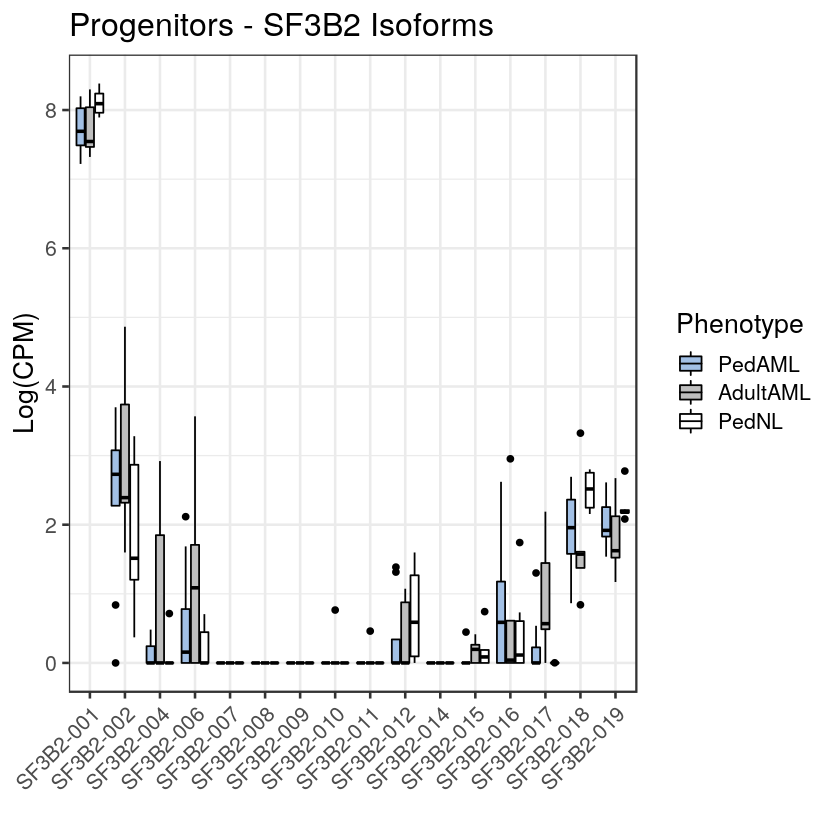

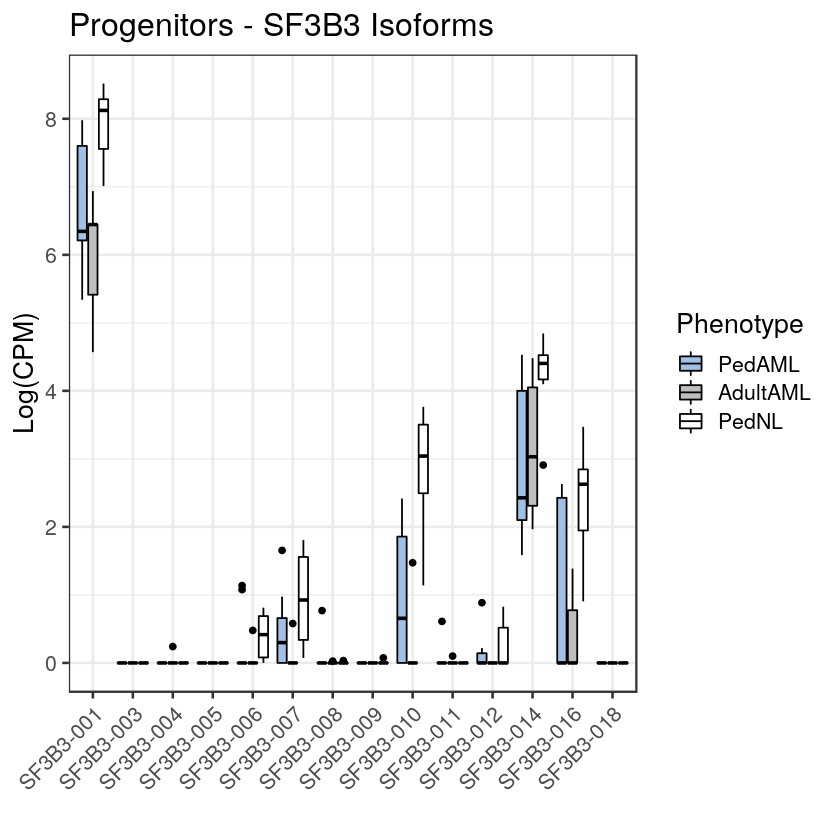

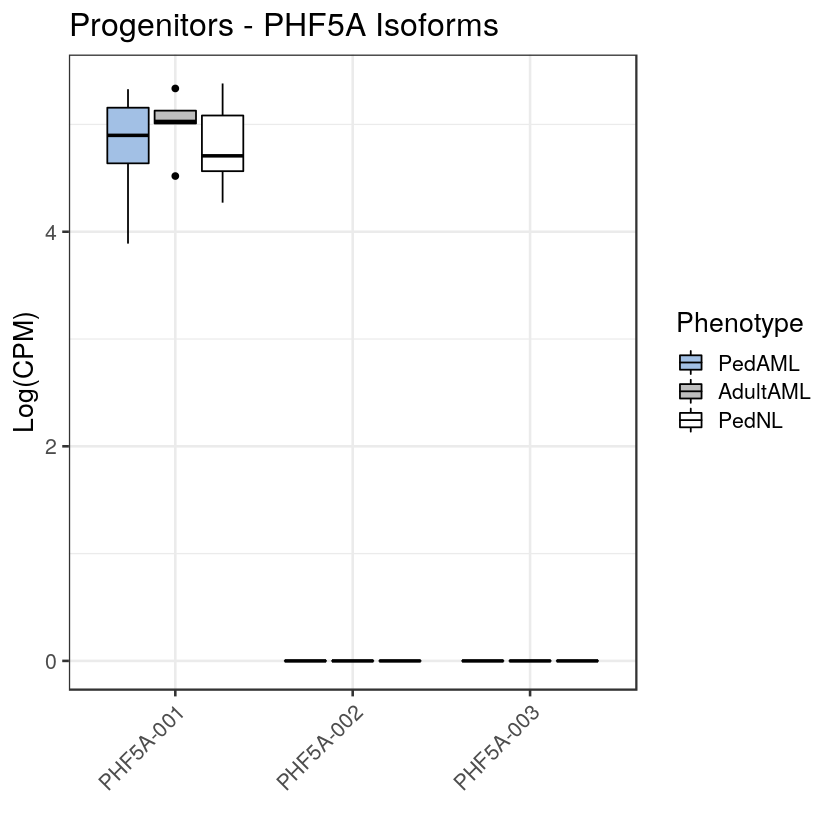

In [227]:
png(file="DerWerf_Jamieson_Prog_SF3B1_IsoformsBoxplot_12102020.png", width=10, height=7, res=300, units="in")
ggboxplot(SF3B1.tx.lcpm.Prog.df.m, x="Isoform", y="value", fill="Phenotype",
         palette = c("#657991", "#A2C0E5", "#C4C7C9")) + xlab("") +
    theme_bw(base_size=16) + ylab("Log(CPM)") + labs(title="Progenitors - SF3B1 Isoforms") + 
    theme(legend.title=element_text(size=0)) +
    theme(axis.text.x = element_text(angle = 45, hjust=1)) 
dev.off()
ggboxplot(SF3B2.tx.lcpm.Prog.df.m, x="Isoform", y="value", fill="Phenotype",
         palette = c("#A2C0E5", "gray", "white")) + xlab("") +
    theme_bw(base_size=16) + ylab("Log(CPM)") + labs(title="Progenitors - SF3B2 Isoforms") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1)) 
ggboxplot(SF3B3.tx.lcpm.Prog.df.m, x="Isoform", y="value", fill="Phenotype",
         palette = c("#A2C0E5", "gray", "white")) + xlab("") +
    theme_bw(base_size=16) + ylab("Log(CPM)") + labs(title="Progenitors - SF3B3 Isoforms") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1)) 
ggboxplot(PHF5A.tx.lcpm.Prog.df.m, x="Isoform", y="value", fill="Phenotype",
         palette = c("#A2C0E5", "gray", "white")) + xlab("") +
    theme_bw(base_size=16) + ylab("Log(CPM)") + labs(title="Progenitors - PHF5A Isoforms") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1)) 


png 
  2

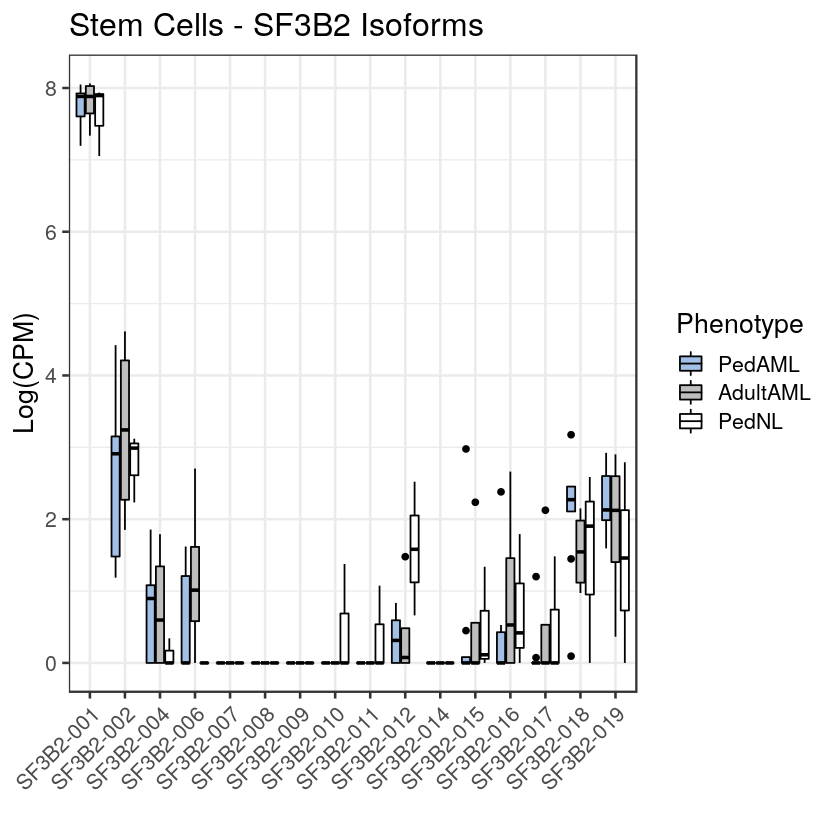

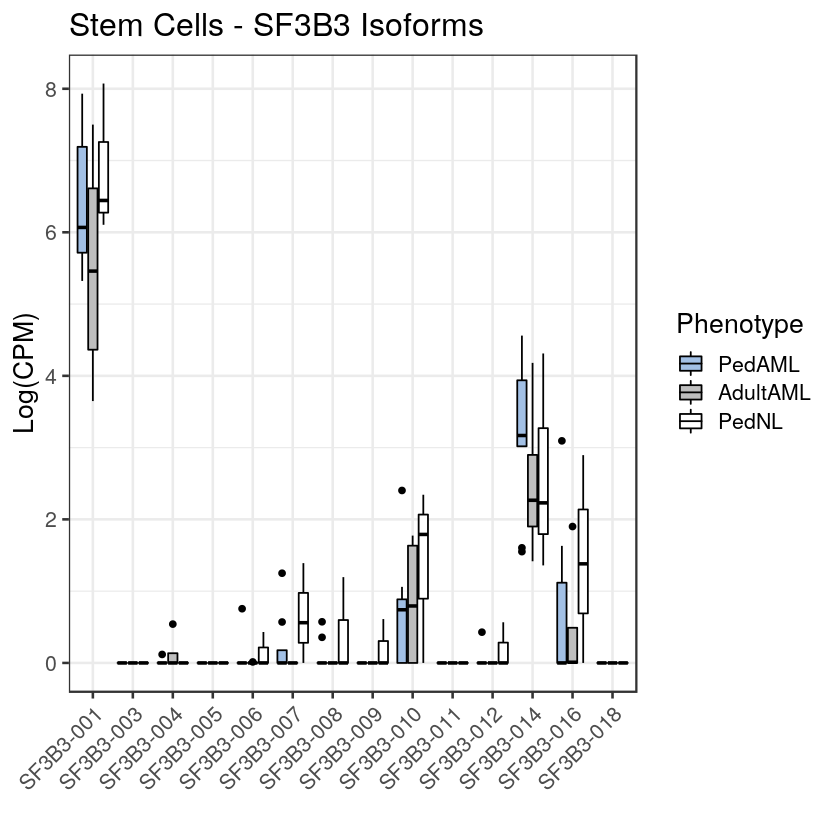

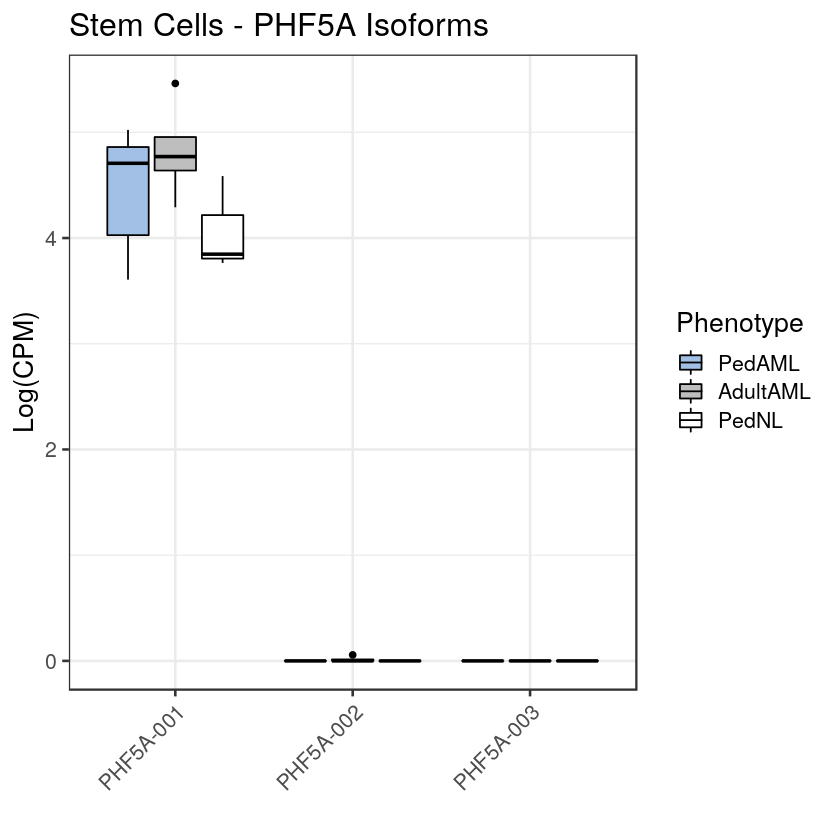

In [226]:
png(file="DerWerf_Jamieson_Stem_SF3B1_IsoformsBoxplot_12102020.png", width=10, height=7, res=300, units="in")
ggboxplot(SF3B1.tx.lcpm.Stem.df.m, x="Isoform", y="value", fill="Phenotype",
         palette = c("#A2C0E5", "gray", "white")) + xlab("") +
    theme_bw(base_size=16) + ylab("Log(CPM)") + labs(title="Stem Cells - SF3B1 Isoforms") + 
    theme(legend.title=element_text(size=0)) +
    theme(axis.text.x = element_text(angle = 45, hjust=1)) 
dev.off()
ggboxplot(SF3B2.tx.lcpm.Stem.df.m, x="Isoform", y="value", fill="Phenotype",
         palette = c("#A2C0E5", "gray", "white")) + xlab("") +
    theme_bw(base_size=16) + ylab("Log(CPM)") + labs(title="Stem Cells - SF3B2 Isoforms") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1)) 
ggboxplot(SF3B3.tx.lcpm.Stem.df.m, x="Isoform", y="value", fill="Phenotype",
         palette = c("#A2C0E5", "gray", "white")) + xlab("") +
    theme_bw(base_size=16) + ylab("Log(CPM)") + labs(title="Stem Cells - SF3B3 Isoforms") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1)) 
ggboxplot(PHF5A.tx.lcpm.Stem.df.m, x="Isoform", y="value", fill="Phenotype",
         palette = c("#A2C0E5", "gray", "white")) + xlab("") +
    theme_bw(base_size=16) + ylab("Log(CPM)") + labs(title="Stem Cells - PHF5A Isoforms") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1)) 

In [42]:
HRAS.tx <- read.table(file="../HRAS_tx.txt", sep="\t", header=FALSE, stringsAsFactors=FALSE)
colnames(HRAS.tx) <- c("IsoName", "ENS")
class(HRAS.tx$IsoName)
HRAS.tx <- with(HRAS.tx, HRAS.tx[order(IsoName),])
HRAS.tx
HRAS.tx$IsoName <- factor(as.character(HRAS.tx$IsoName), 
                           levels=as.character(HRAS.tx$IsoName))


[1] "character"

IsoName  ENS            
1  HRAS-201 ENST00000311189
5  HRAS-202 ENST00000397594
4  HRAS-203 ENST00000397596
2  HRAS-204 ENST00000417302
3  HRAS-205 ENST00000451590
9  HRAS-206 ENST00000462734
7  HRAS-207 ENST00000468682
8  HRAS-208 ENST00000478324
10 HRAS-209 ENST00000479482
11 HRAS-210 ENST00000482021
6  HRAS-211 ENST00000493230

In [43]:
spec.list <- list(HRAS.tx)
#spec.list[[1]]
names(spec.list) <- c("HRAS")

HRAS_exp <- unique(c(topTable_iso_PedAMLvsPedNL_Prog$genes[topTable_iso_PedAMLvsPedNL_Prog$genes %in% spec.list[[1]]$ENS],
       topTable_iso_PedAMLvsPedNL_Stem$genes[topTable_iso_PedAMLvsPedNL_Stem$genes %in% spec.list[[1]]$ENS]))
HRAS.tx_exp <- HRAS.tx[as.character(HRAS.tx$ENS) %in% HRAS_exp,]
spec.list[[1]] <- HRAS.tx_exp
HRAS.tx_exp


IsoName  ENS            
1 HRAS-201 ENST00000311189
5 HRAS-202 ENST00000397594
3 HRAS-205 ENST00000451590
9 HRAS-206 ENST00000462734

In [49]:
HRAS.tx.lcpm.Prog.unfilt <- lcpm2.Prog.unfilt[match(HRAS.tx_exp$ENS, rownames(lcpm2.Prog.unfilt)),]
HRAS.tx.lcpm.Stem.unfilt <- lcpm2.Stem.unfilt[match(HRAS.tx_exp$ENS, rownames(lcpm2.Stem.unfilt)),]

dim(HRAS.tx.lcpm.Prog.unfilt)
dim(HRAS.tx.lcpm.Stem.unfilt)
HRAS.tx.lcpm.Prog.df <- as.data.frame(t(HRAS.tx.lcpm.Prog.unfilt))
HRAS.tx.lcpm.Stem.df <- as.data.frame(t(HRAS.tx.lcpm.Stem.unfilt))

for (i in 1:ncol(HRAS.tx.lcpm.Prog.df)) {
    HRAS.tx.lcpm.Prog.df[which(HRAS.tx.lcpm.Prog.df[,i] < 0),i] <- 0 
    HRAS.tx.lcpm.Stem.df[which(HRAS.tx.lcpm.Stem.df[,i] < 0),i] <- 0     
}
HRAS.tx.lcpm.Prog.df$Phenotype <- factor(as.character(meta.Prog.filt[match(rownames(HRAS.tx.lcpm.Prog.df), 
                                                                paste0("X", meta.Prog.filt$Sample)),"Phenotype"]), 
                                                           levels=c("PedAML", "AdultAML","PedNL"))

HRAS.tx.lcpm.Stem.df$Phenotype <- factor(as.character(meta.Stem.filt[match(rownames(HRAS.tx.lcpm.Stem.df), 
                                                                paste0("X", meta.Stem.filt$Sample)),"Phenotype"]), 
                                                           levels=c("PedAML", "AdultAML","PedNL"))
colnames(HRAS.tx.lcpm.Stem.df)[1:nrow(HRAS.tx_exp)] <- colnames(HRAS.tx.lcpm.Prog.df)[1:nrow(HRAS.tx_exp)] <- as.character(HRAS.tx_exp$IsoName)


[1]  4 20

[1]  4 16

In [53]:
library(reshape2)
HRAS.tx.lcpm.Prog.df.m <- melt(variable.name = "Isoform", HRAS.tx.lcpm.Prog.df)
HRAS.tx.lcpm.Stem.df.m <- melt(variable.name = "Isoform", HRAS.tx.lcpm.Stem.df)
head(HRAS.tx.lcpm.Stem.df.m)
HRAS.tx.lcpm.Prog.df.m <- subset(HRAS.tx.lcpm.Prog.df.m, Phenotype != "AdultAML")
HRAS.tx.lcpm.Stem.df.m <- subset(HRAS.tx.lcpm.Stem.df.m, Phenotype != "AdultAML")

png(file="DeWerf_Jamieson_Prog_HRASIsoforms_byPhenotype_10292020.png", width=9, height=6, units = "in", res = 300)
ggboxplot(HRAS.tx.lcpm.Prog.df.m, x="Isoform", y="value", fill="Phenotype",
         palette = c("#657991", "#C4C7C9")) + xlab("") +
    theme_bw(base_size=16) + ylab("Log(CPM)") + labs(title="CD34+CD38+Lin- - HRAS Isoforms") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1)) + 
    stat_compare_means(aes(group=Phenotype), method="t.test", label = "p.format"#, label.y=c(8,7.8,7.6,7.4)
                      )
dev.off()
png(file="DeWerf_Jamieson_Stem_HRASIsoforms_byPhenotype_10292020.png", width=9, height=6, units = "in", res = 300)
ggboxplot(HRAS.tx.lcpm.Stem.df.m, x="Isoform", y="value", fill="Phenotype",
         palette = c("#657991", "#C4C7C9")) + xlab("") +
    theme_bw(base_size=16) + ylab("Log(CPM)") + labs(title="CD34+CD38-Lin- - HRAS Isoforms") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1)) + 
    stat_compare_means(aes(group=Phenotype), method="t.test", label = "p.format"#, label.y=c(8,7.8,7.6,7.4)
                      )
dev.off()

Using Phenotype as id variables
Using Phenotype as id variables


Phenotype Isoform  value   
1 PedAML    HRAS-201 2.837615
2 PedAML    HRAS-201 3.263816
3 PedAML    HRAS-201 2.122953
4 PedAML    HRAS-201 1.163482
5 PedAML    HRAS-201 2.441577
6 PedAML    HRAS-201 3.636840

png 
  2

png 
  2

In [40]:
CD44.tx <- read.table(file="../CD44_tx.txt", sep="\t", header=FALSE, stringsAsFactors=FALSE)
colnames(CD44.tx) <- c("IsoName", "ENS")
class(CD44.tx$IsoName)
CD44.tx <- with(CD44.tx, CD44.tx[order(IsoName),])
CD44.tx
CD44.tx$IsoName <- factor(as.character(CD44.tx$IsoName), 
                           levels=as.character(CD44.tx$IsoName))

PTPRC.tx <- read.table(file="../PTPRC_tx.txt", sep="\t", header=FALSE, stringsAsFactors=FALSE)
colnames(PTPRC.tx) <- c("IsoName", "ENS")
class(PTPRC.tx$IsoName)
PTPRC.tx <- with(PTPRC.tx, PTPRC.tx[order(IsoName),])
PTPRC.tx
PTPRC.tx$IsoName <- factor(as.character(PTPRC.tx$IsoName), 
                           levels=as.character(PTPRC.tx$IsoName))

FOXP1.tx <- read.table(file="../FOXP1_tx.txt", sep="\t", header=FALSE, stringsAsFactors=FALSE)
colnames(FOXP1.tx) <- c("IsoName", "ENS")
class(FOXP1.tx$IsoName)
FOXP1.tx <- with(FOXP1.tx, FOXP1.tx[order(IsoName),])
FOXP1.tx
FOXP1.tx$IsoName <- factor(as.character(FOXP1.tx$IsoName), 
                           levels=as.character(FOXP1.tx$IsoName))

[1] "character"

IsoName  ENS            
2  CD44-001 ENST00000428726
7  CD44-002 ENST00000278386
1  CD44-003 ENST00000263398
3  CD44-004 ENST00000415148
4  CD44-005 ENST00000433892
11 CD44-006 ENST00000442151
6  CD44-007 ENST00000352818
5  CD44-008 ENST00000434472
30 CD44-009 ENST00000425428
13 CD44-011 ENST00000526025
32 CD44-012 ENST00000528086
41 CD44-013 ENST00000531141
36 CD44-014 ENST00000527326
20 CD44-015 ENST00000525469
37 CD44-016 ENST00000532339
39 CD44-017 ENST00000525348
34 CD44-018 ENST00000531118
14 CD44-019 ENST00000526669
40 CD44-020 ENST00000534082
35 CD44-021 ENST00000534296
42 CD44-022 ENST00000525241
33 CD44-023 ENST00000525209
15 CD44-024 ENST00000279452
31 CD44-025 ENST00000528922
29 CD44-026 ENST00000524922
38 CD44-027 ENST00000525293
18 CD44-028 ENST00000525685
24 CD44-030 ENST00000531873
21 CD44-032 ENST00000278385
17 CD44-033 ENST00000525211
25 CD44-034 ENST00000533222
22 CD44-035 ENST00000528455
27 CD44-036 ENST00000525688
23 CD44-037 ENST00000528672
28 CD44-038 ENST00000527889
16 CD44-039 ENST00000531110
19 CD44-040 ENST00000526000
26 CD44-041 ENST00000526553
12 CD44-201 ENST00000360158
8  CD44-202 ENST00000433354
10 CD44-203 ENST00000437706
9  CD44-204 ENST00000449691

[1] "character"

IsoName   ENS            
1  PTPRC-001 ENST00000442510
2  PTPRC-002 ENST00000348564
12 PTPRC-003 ENST00000418674
10 PTPRC-004 ENST00000367364
7  PTPRC-005 ENST00000367367
8  PTPRC-006 ENST00000530727
16 PTPRC-007 ENST00000462363
17 PTPRC-008 ENST00000491302
3  PTPRC-009 ENST00000413409
13 PTPRC-010 ENST00000529828
11 PTPRC-011 ENST00000367379
18 PTPRC-012 ENST00000484135
15 PTPRC-013 ENST00000427110
14 PTPRC-014 ENST00000391970
5  PTPRC-201 ENST00000352140
4  PTPRC-202 ENST00000367376
6  PTPRC-203 ENST00000594404
9  PTPRC-204 ENST00000598951

[1] "character"

IsoName   ENS            
1  FOXP1-001 ENST00000318789
3  FOXP1-002 ENST00000493089
12 FOXP1-003 ENST00000327590
2  FOXP1-004 ENST00000475937
6  FOXP1-005 ENST00000484350
4  FOXP1-006 ENST00000498215
9  FOXP1-009 ENST00000497355
5  FOXP1-011 ENST00000491238
8  FOXP1-012 ENST00000468577
7  FOXP1-014 ENST00000318779
17 FOXP1-015 ENST00000498154
18 FOXP1-016 ENST00000471386
16 FOXP1-017 ENST00000493010
15 FOXP1-018 ENST00000470112
11 FOXP1-019 ENST00000497553
13 FOXP1-020 ENST00000472382
10 FOXP1-021 ENST00000485326
14 FOXP1-022 ENST00000460805

In [46]:
spec.list <- list(CD44.tx, PTPRC.tx, FOXP1.tx)
#spec.list[[1]]
names(spec.list) <- c("CD44", "PTPRC", "FOXP1")
for (i in 1:3) {
print(names(spec.list)[i])
print(topTable_iso_PedAMLvsAdultAML_Prog[topTable_iso_PedAMLvsAdultAML_Prog$genes %in% spec.list[[i]]$ENS,])
print(topTable_iso_PedAMLvsPedNL_Prog[topTable_iso_PedAMLvsPedNL_Prog$genes %in% spec.list[[i]]$ENS,])
print(topTable_iso_PedAMLvsAdultAML_Stem[topTable_iso_PedAMLvsAdultAML_Stem$genes %in% spec.list[[i]]$ENS,])
print(topTable_iso_PedAMLvsPedNL_Stem[topTable_iso_PedAMLvsPedNL_Stem$genes %in% spec.list[[i]]$ENS,])
}

CD44_exp <- unique(c(topTable_iso_PedAMLvsPedNL_Prog$genes[topTable_iso_PedAMLvsPedNL_Prog$genes %in% spec.list[[1]]$ENS],
       topTable_iso_PedAMLvsPedNL_Stem$genes[topTable_iso_PedAMLvsPedNL_Stem$genes %in% spec.list[[1]]$ENS]))
CD44.tx_exp <- CD44.tx[as.character(CD44.tx$ENS) %in% CD44_exp,]
spec.list[[1]] <- CD44.tx_exp
CD44.tx_exp

[1] "CD44"
                          genes ENTREZID SYMBOL      logFC    AveExpr
ENST00000528922 ENST00000528922      960   CD44 -6.4460231  1.9674738
ENST00000263398 ENST00000263398      960   CD44  5.4900590  8.6756958
ENST00000525469 ENST00000525469      960   CD44 11.8016674  2.7868928
ENST00000526025 ENST00000526025      960   CD44  6.2136665  3.7466186
ENST00000531118 ENST00000531118      960   CD44  5.9552441  1.0795902
ENST00000279452 ENST00000279452      960   CD44 17.1568002  0.8460465
ENST00000425428 ENST00000425428      960   CD44 12.4314235  3.2716205
ENST00000434472 ENST00000434472      960   CD44  5.0609829  3.6073105
ENST00000525211 ENST00000525211      960   CD44 15.3432472 -0.0784776
ENST00000352818 ENST00000352818      960   CD44 10.8302205 -1.4872415
ENST00000433892 ENST00000433892      960   CD44  0.9301647  1.3299270
ENST00000442151 ENST00000442151      960   CD44  0.3316843  2.9590720
                         t      P.Value   adj.P.Val          B
ENST00000528922 

IsoName  ENS            
1  CD44-003 ENST00000263398
4  CD44-005 ENST00000433892
11 CD44-006 ENST00000442151
6  CD44-007 ENST00000352818
5  CD44-008 ENST00000434472
30 CD44-009 ENST00000425428
13 CD44-011 ENST00000526025
36 CD44-014 ENST00000527326
20 CD44-015 ENST00000525469
34 CD44-018 ENST00000531118
15 CD44-024 ENST00000279452
31 CD44-025 ENST00000528922
17 CD44-033 ENST00000525211

In [47]:
CD44.tx.lcpm.Prog.unfilt <- lcpm2.Prog.unfilt[match(CD44.tx_exp$ENS, rownames(lcpm2.Prog.unfilt)),]
CD44.tx.lcpm.Stem.unfilt <- lcpm2.Stem.unfilt[match(CD44.tx_exp$ENS, rownames(lcpm2.Stem.unfilt)),]
PTPRC.tx.lcpm.Prog.unfilt <- lcpm2.Prog.unfilt[match(PTPRC.tx$ENS, rownames(lcpm2.Prog.unfilt)),]
PTPRC.tx.lcpm.Stem.unfilt <- lcpm2.Stem.unfilt[match(PTPRC.tx$ENS, rownames(lcpm2.Stem.unfilt)),]
FOXP1.tx.lcpm.Prog.unfilt <- lcpm2.Prog.unfilt[match(FOXP1.tx$ENS, rownames(lcpm2.Prog.unfilt)),]
FOXP1.tx.lcpm.Stem.unfilt <- lcpm2.Stem.unfilt[match(FOXP1.tx$ENS, rownames(lcpm2.Stem.unfilt)),]

dim(CD44.tx.lcpm.Prog.unfilt)
dim(CD44.tx.lcpm.Stem.unfilt)
CD44.tx.lcpm.Prog.df <- as.data.frame(t(CD44.tx.lcpm.Prog.unfilt))
CD44.tx.lcpm.Stem.df <- as.data.frame(t(CD44.tx.lcpm.Stem.unfilt))

for (i in 1:ncol(CD44.tx.lcpm.Prog.df)) {
    CD44.tx.lcpm.Prog.df[which(CD44.tx.lcpm.Prog.df[,i] < 0),i] <- 0 
    CD44.tx.lcpm.Stem.df[which(CD44.tx.lcpm.Stem.df[,i] < 0),i] <- 0     
}
CD44.tx.lcpm.Prog.df$Phenotype <- factor(as.character(meta.Prog.filt[match(rownames(CD44.tx.lcpm.Prog.df), 
                                                                paste0("X", meta.Prog.filt$Sample)),"Phenotype"]), 
                                                           levels=c("PedAML", "AdultAML","PedNL"))

CD44.tx.lcpm.Stem.df$Phenotype <- factor(as.character(meta.Stem.filt[match(rownames(CD44.tx.lcpm.Stem.df), 
                                                                paste0("X", meta.Stem.filt$Sample)),"Phenotype"]), 
                                                           levels=c("PedAML", "AdultAML","PedNL"))
colnames(CD44.tx.lcpm.Stem.df)[1:nrow(CD44.tx_exp)] <- colnames(CD44.tx.lcpm.Prog.df)[1:nrow(CD44.tx_exp)] <- as.character(CD44.tx_exp$IsoName)

PTPRC.tx.lcpm.Prog.df <- as.data.frame(t(PTPRC.tx.lcpm.Prog.unfilt))
PTPRC.tx.lcpm.Stem.df <- as.data.frame(t(PTPRC.tx.lcpm.Stem.unfilt))
for (i in 1:ncol(PTPRC.tx.lcpm.Prog.df)) {
    PTPRC.tx.lcpm.Prog.df[which(PTPRC.tx.lcpm.Prog.df[,i] < 0),i] <- 0 
    PTPRC.tx.lcpm.Stem.df[which(PTPRC.tx.lcpm.Stem.df[,i] < 0),i] <- 0     
}
PTPRC.tx.lcpm.Prog.df$Phenotype <- factor(as.character(meta.Prog.filt[match(rownames(PTPRC.tx.lcpm.Prog.df), 
                                                                paste0("X", meta.Prog.filt$Sample)),"Phenotype"]), 
                                                           levels=c("PedAML", "AdultAML","PedNL"))

PTPRC.tx.lcpm.Stem.df$Phenotype <- factor(as.character(meta.Stem.filt[match(rownames(PTPRC.tx.lcpm.Stem.df), 
                                                                paste0("X", meta.Stem.filt$Sample)),"Phenotype"]), 
                                                           levels=c("PedAML", "AdultAML","PedNL"))
colnames(PTPRC.tx.lcpm.Stem.df)[1:nrow(PTPRC.tx)] <- colnames(PTPRC.tx.lcpm.Prog.df)[1:nrow(PTPRC.tx)] <- as.character(PTPRC.tx$IsoName)

FOXP1.tx.lcpm.Prog.df <- as.data.frame(t(FOXP1.tx.lcpm.Prog.unfilt))
FOXP1.tx.lcpm.Stem.df <- as.data.frame(t(FOXP1.tx.lcpm.Stem.unfilt))
for (i in 1:ncol(FOXP1.tx.lcpm.Prog.df)) {
    FOXP1.tx.lcpm.Prog.df[which(FOXP1.tx.lcpm.Prog.df[,i] < 0),i] <- 0 
    FOXP1.tx.lcpm.Stem.df[which(FOXP1.tx.lcpm.Stem.df[,i] < 0),i] <- 0     
}
FOXP1.tx.lcpm.Prog.df$Phenotype <- factor(as.character(meta.Prog.filt[match(rownames(FOXP1.tx.lcpm.Prog.df), 
                                                                paste0("X", meta.Prog.filt$Sample)),"Phenotype"]), 
                                                           levels=c("PedAML", "AdultAML","PedNL"))

FOXP1.tx.lcpm.Stem.df$Phenotype <- factor(as.character(meta.Stem.filt[match(rownames(FOXP1.tx.lcpm.Stem.df), 
                                                                paste0("X", meta.Stem.filt$Sample)),"Phenotype"]), 
                                                           levels=c("PedAML", "AdultAML","PedNL"))
colnames(FOXP1.tx.lcpm.Stem.df)[1:nrow(FOXP1.tx)] <- colnames(FOXP1.tx.lcpm.Prog.df)[1:nrow(FOXP1.tx)] <- as.character(FOXP1.tx$IsoName)



[1] 13 20

[1] 13 16

In [29]:
table(CD44.tx.lcpm.Prog.df.m$Phenotype)

ERROR: Error in eval(quote(list(...)), env): object 'CD44.tx.lcpm.Prog.df.m' not found


Using Phenotype as id variables

Using Phenotype as id variables



Phenotype Isoform  value    
1 PedAML    CD44-003 10.004785
2 PedAML    CD44-003  8.555201
3 PedAML    CD44-003 10.359074
4 PedAML    CD44-003  9.747940
5 PedAML    CD44-003 11.052531
6 PedAML    CD44-003 10.350055

Using Phenotype as id variables

Using Phenotype as id variables

Using Phenotype as id variables

Using Phenotype as id variables

Warning message:
“Computation failed in `stat_compare_means()`:
missing value where TRUE/FALSE needed”
Warning message:
“Computation failed in `stat_compare_means()`:
missing value where TRUE/FALSE needed”


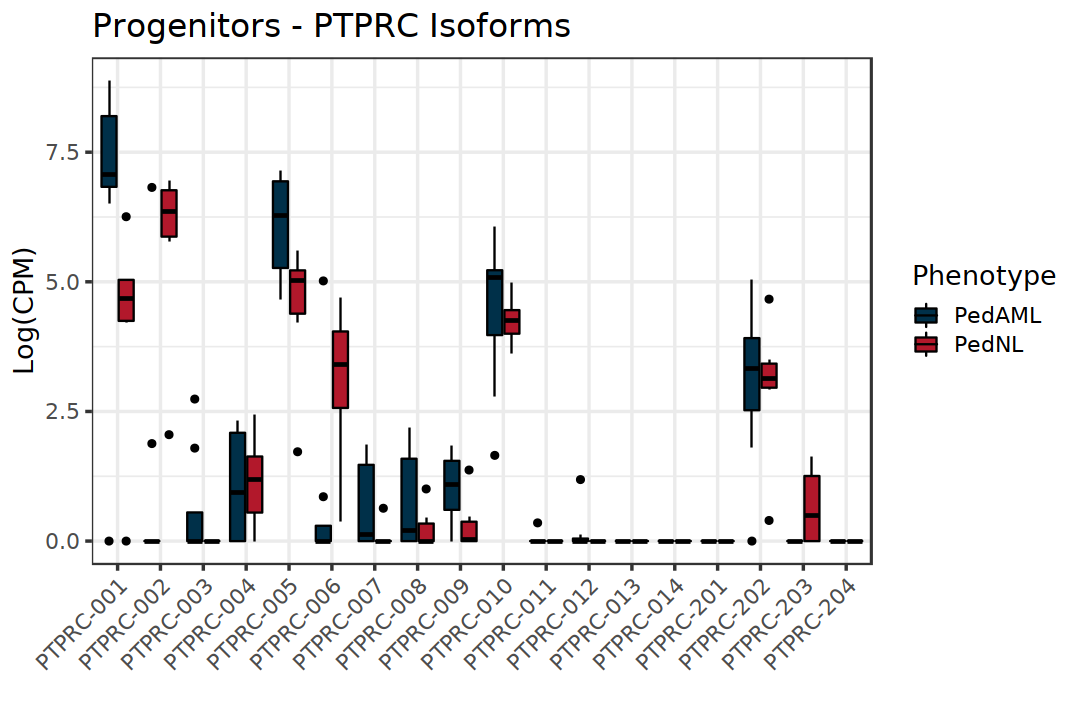

Warning message in if (!palette %in% unlist(brewer)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in pal_name(palette, type):
“Unknown palette #003049#B2182B”
Warning message:
“Computation failed in `stat_compare_means()`:
missing value where TRUE/FALSE needed”


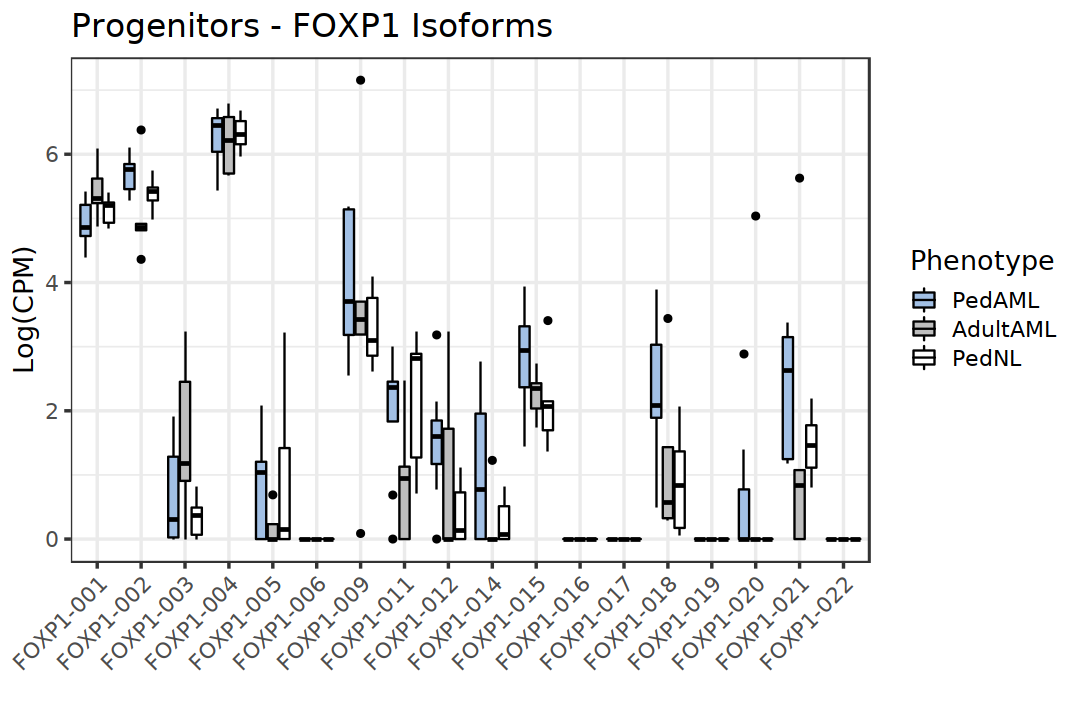

Warning message:
“Computation failed in `stat_compare_means()`:
missing value where TRUE/FALSE needed”


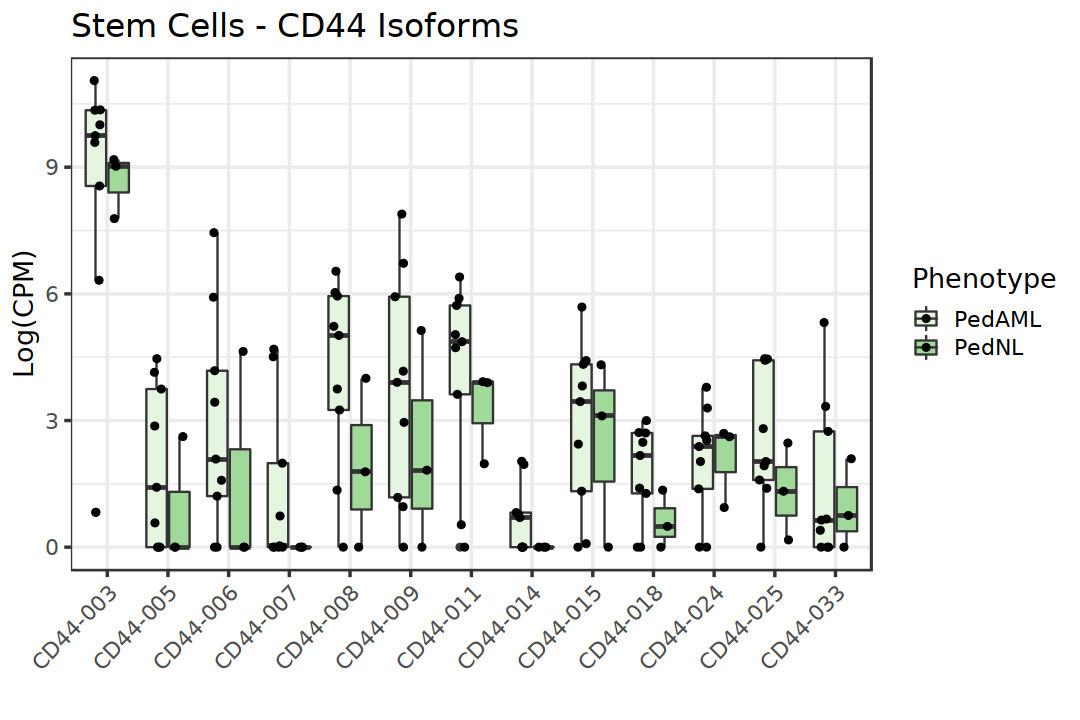

Warning message:
“Computation failed in `stat_compare_means()`:
missing value where TRUE/FALSE needed”


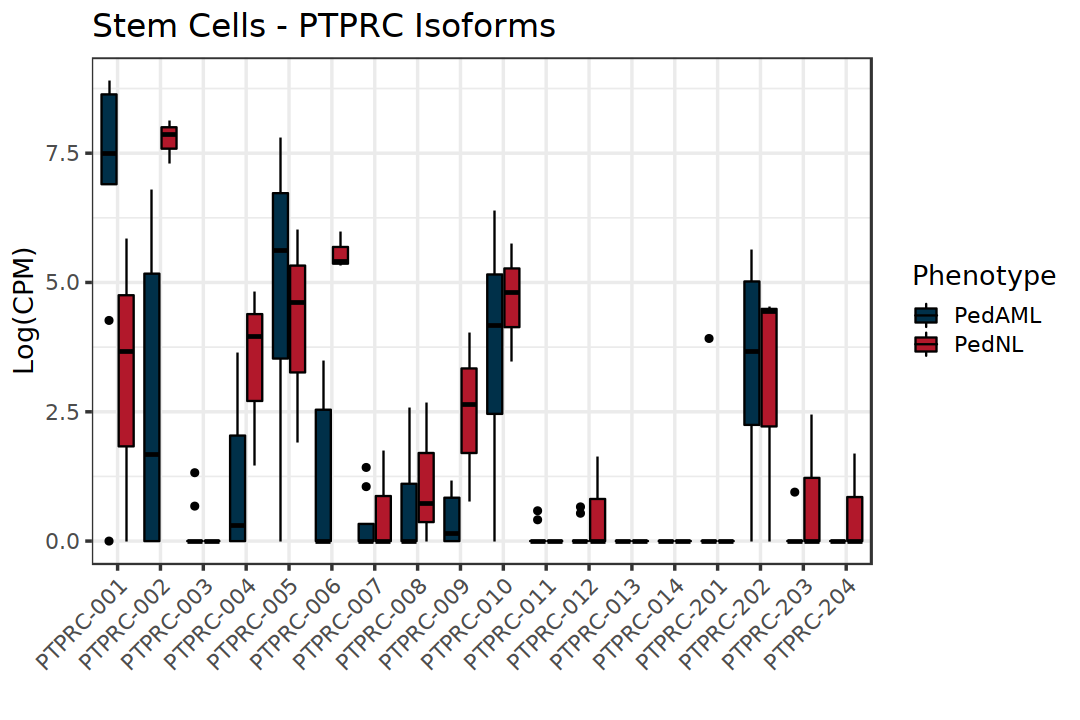

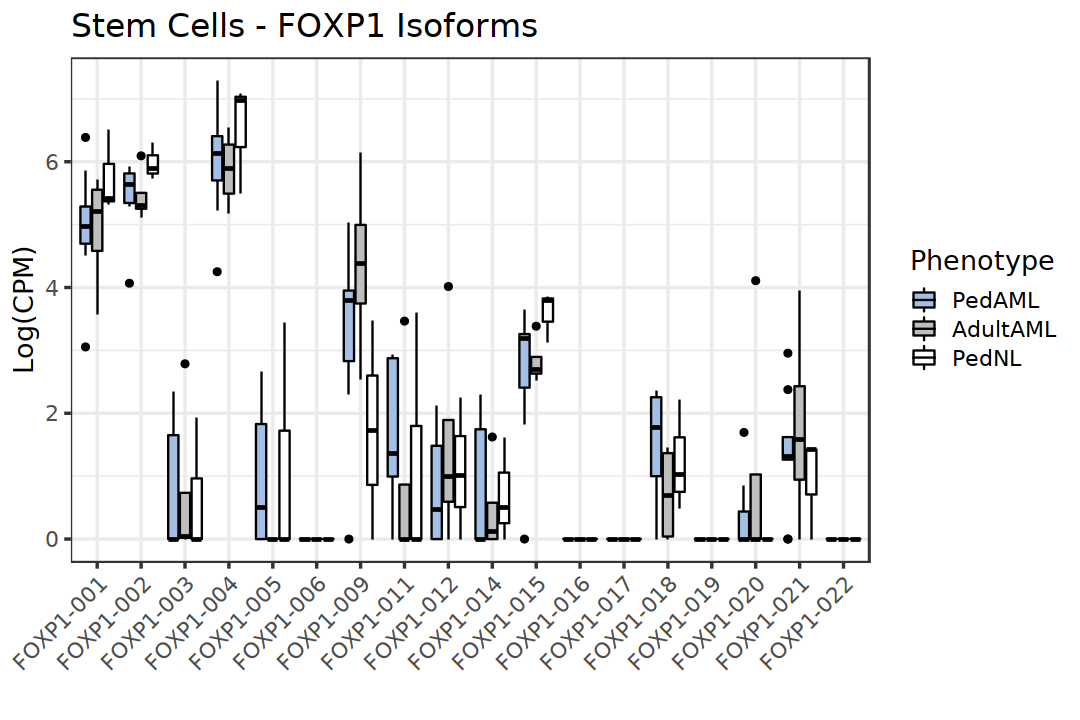

In [69]:
library(reshape2)
CD44.tx.lcpm.Prog.df.m <- melt(variable.name = "Isoform", CD44.tx.lcpm.Prog.df)
CD44.tx.lcpm.Stem.df.m <- melt(variable.name = "Isoform", CD44.tx.lcpm.Stem.df)
head(CD44.tx.lcpm.Stem.df.m)
PTPRC.tx.lcpm.Prog.df.m <- melt(variable.name = "Isoform", PTPRC.tx.lcpm.Prog.df)
PTPRC.tx.lcpm.Stem.df.m <- melt(variable.name = "Isoform", PTPRC.tx.lcpm.Stem.df)
FOXP1.tx.lcpm.Prog.df.m <- melt(variable.name = "Isoform", FOXP1.tx.lcpm.Prog.df)
FOXP1.tx.lcpm.Stem.df.m <- melt(variable.name = "Isoform", FOXP1.tx.lcpm.Stem.df)

CD44.tx.lcpm.Prog.df.m <- subset(CD44.tx.lcpm.Prog.df.m, Phenotype != "AdultAML")
CD44.tx.lcpm.Stem.df.m <- subset(CD44.tx.lcpm.Stem.df.m, Phenotype != "AdultAML")
PTPRC.tx.lcpm.Prog.df.m <- subset(PTPRC.tx.lcpm.Prog.df.m, Phenotype != "AdultAML")
PTPRC.tx.lcpm.Stem.df.m <- subset(PTPRC.tx.lcpm.Stem.df.m, Phenotype != "AdultAML")


#png(file="DeWerf_Jamieson_Prog_CD44Isoforms_byPhenotype_08262020.png", width=9, height=6, units = "in", res = 300)
options(repr.plot.width=9, repr.plot.height=6)
#ggboxplot(CD44.tx.lcpm.Prog.df.m, x="Isoform", y="value", fill="Phenotype",
#         palette = c("#003049", "#B2182B")) + xlab("") +
#    theme_bw(base_size=16) + ylab("Log(CPM)") + labs(title="Progenitors - CD44 Isoforms") + 
#    theme(axis.text.x = element_text(angle = 45, hjust=1)) + 
#    stat_compare_means(method="t.test", label = "p.format", ref.group="PedAML")
#dev.off()
#png(file="DeWerf_Jamieson_Prog_PTPRCIsoforms_byPhenotype_08262020.png", width=9, height=6, units = "in", res = 300)
options(repr.plot.width=9, repr.plot.height=6)
ggboxplot(PTPRC.tx.lcpm.Prog.df.m, x="Isoform", y="value", fill="Phenotype",
         palette = c("#003049", "#B2182B")) + xlab("") +
    theme_bw(base_size=16) + ylab("Log(CPM)") + labs(title="Progenitors - PTPRC Isoforms") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1)) + 
    stat_compare_means(method="t.test", label = "p.format", ref.group="PedAML")
#dev.off()
ggboxplot(FOXP1.tx.lcpm.Prog.df.m, x="Isoform", y="value", fill="Phenotype",
         palette = c("#A2C0E5", "gray", "white")) + xlab("") +
    theme_bw(base_size=16) + ylab("Log(CPM)") + labs(title="Progenitors - FOXP1 Isoforms") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1)) + 
    stat_compare_means(method="t.test", label = "p.format", ref.group="PedAML")


#png(file="DeWerf_Jamieson_Stem_PTPRCIsoforms_byPhenotype_08262020.png", width=9, height=6, units = "in", res = 300)
options(repr.plot.width=9, repr.plot.height=6)
ggboxplot(PTPRC.tx.lcpm.Stem.df.m, x="Isoform", y="value", fill="Phenotype",
         palette = c("#003049", "#B2182B")) + xlab("") +
    theme_bw(base_size=16) + ylab("Log(CPM)") + labs(title="Stem Cells - PTPRC Isoforms") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1)) + 
    stat_compare_means(method="t.test", label = "p.format", ref.group="PedAML")
#dev.off()
ggboxplot(FOXP1.tx.lcpm.Stem.df.m, x="Isoform", y="value", fill="Phenotype",
         palette = c("#A2C0E5", "gray", "white")) + xlab("") +
    theme_bw(base_size=16) + ylab("Log(CPM)") + labs(title="Stem Cells - FOXP1 Isoforms") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1)) + 
    stat_compare_means(method="t.test", label = "p.format", ref.group="PedAML")


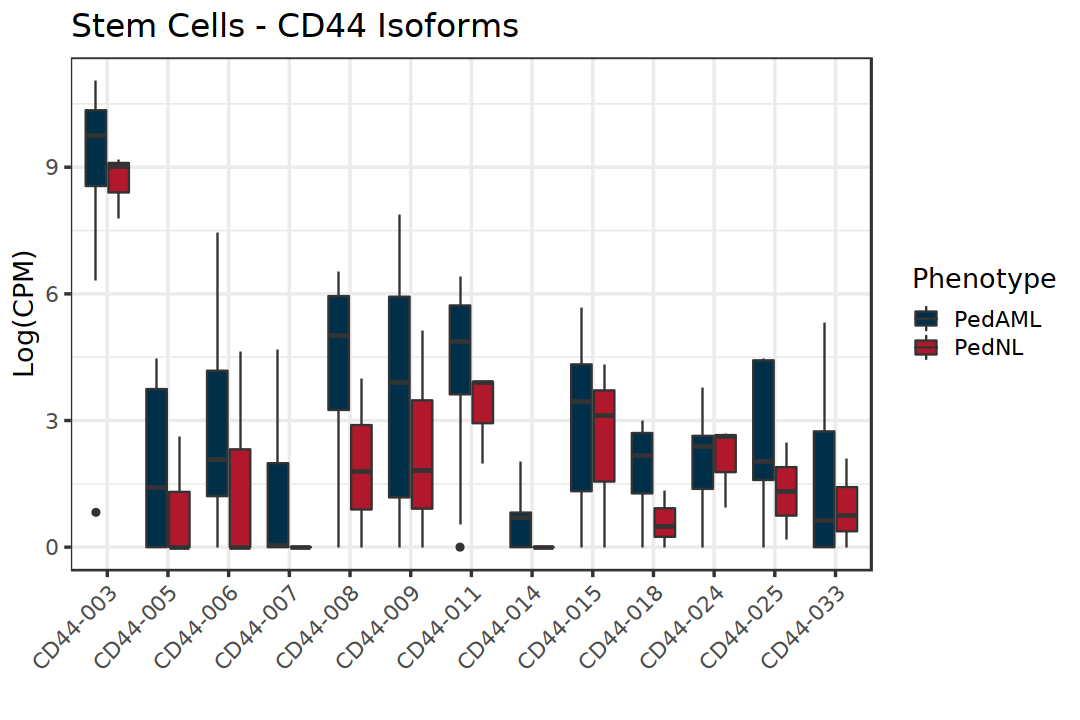

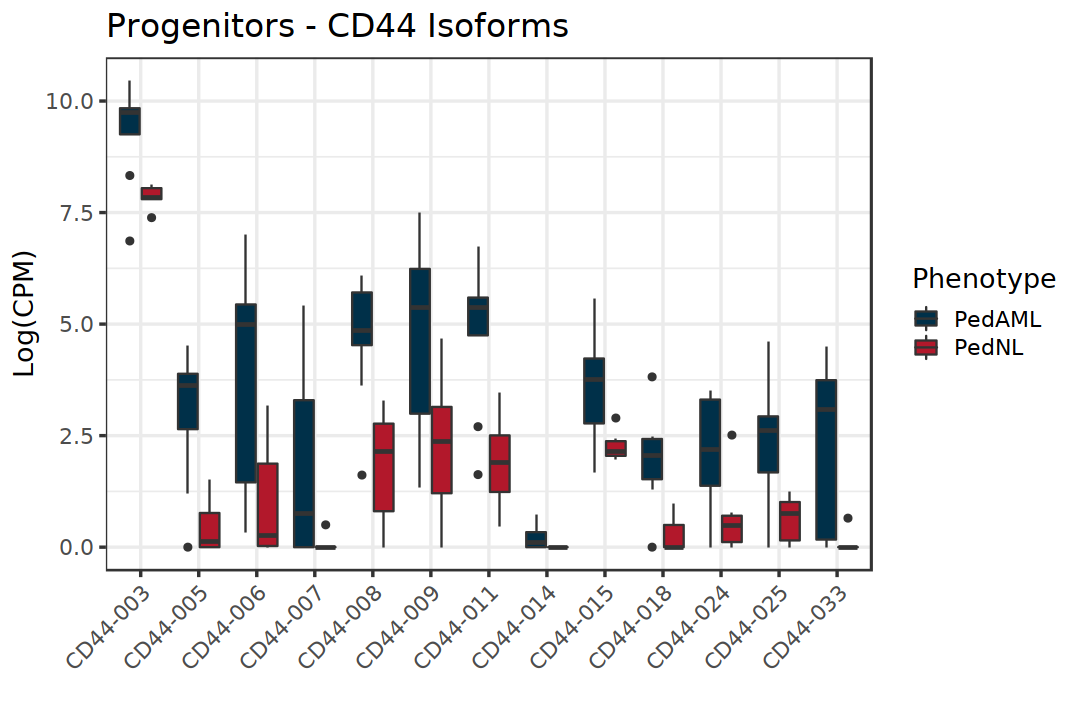

In [76]:
options(repr.plot.width=9, repr.plot.height=6)
ggplot(CD44.tx.lcpm.Stem.df.m, aes(x=Isoform, y=value, fill=Phenotype)) + xlab("") +
    geom_boxplot(aes(fill=Phenotype)) + #geom_point(shape=19, position=position_jitterdodge()) +
    scale_fill_manual(values = c("#003049", "#B2182B")) +
    theme_bw(base_size=16) + ylab("Log(CPM)") + labs(title="Stem Cells - CD44 Isoforms") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1)) 

#png(file="DeWerf_Jamieson_Stem_CD44Isoforms_byPhenotype_08262020.png", width=9, height=6, units = "in", res = 300)
#options(repr.plot.width=9, repr.plot.height=6)
ggplot(CD44.tx.lcpm.Prog.df.m, aes(x=Isoform, y=value, fill=Phenotype)) + xlab("") +
    geom_boxplot(aes(fill=Phenotype)) + #geom_point(shape=19, position=position_jitterdodge()) +
    scale_fill_manual(values = c("#003049", "#B2182B")) +
    theme_bw(base_size=16) + ylab("Log(CPM)") + labs(title="Progenitors - CD44 Isoforms") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1)) 
#dev.off()

Using Phenotype as id variables
Using Phenotype as id variables


Phenotype Isoform   value   
1 PedAML    PTPRC-001 8.194695
2 PedAML    PTPRC-001 7.063206
3 PedAML    PTPRC-001 6.904324
4 PedAML    PTPRC-001 7.554303
5 PedAML    PTPRC-001 6.830979
6 PedAML    PTPRC-001 8.272045

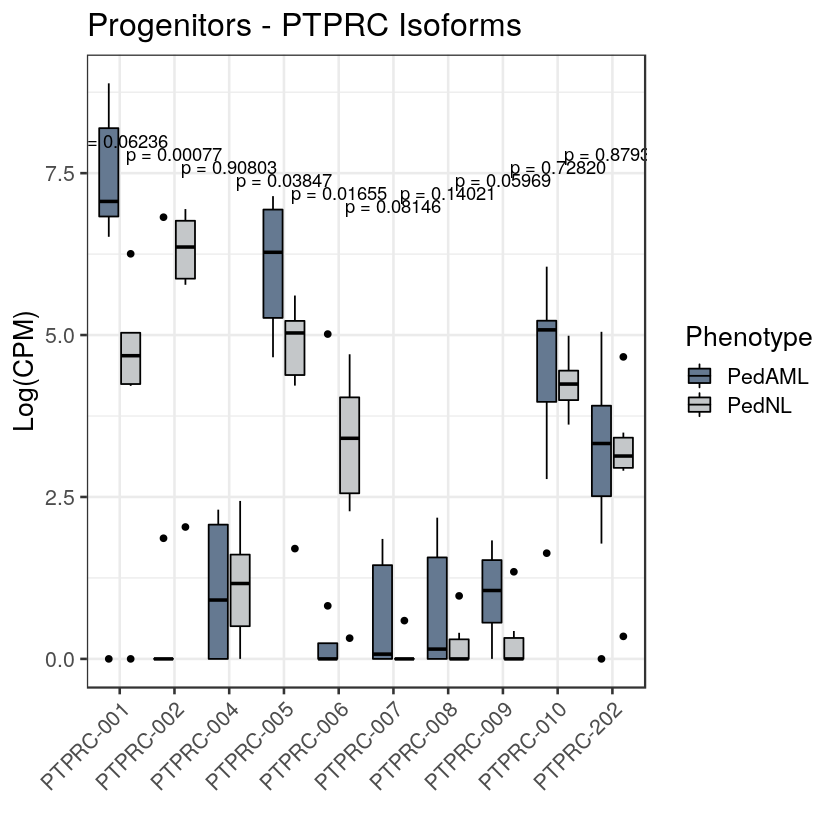

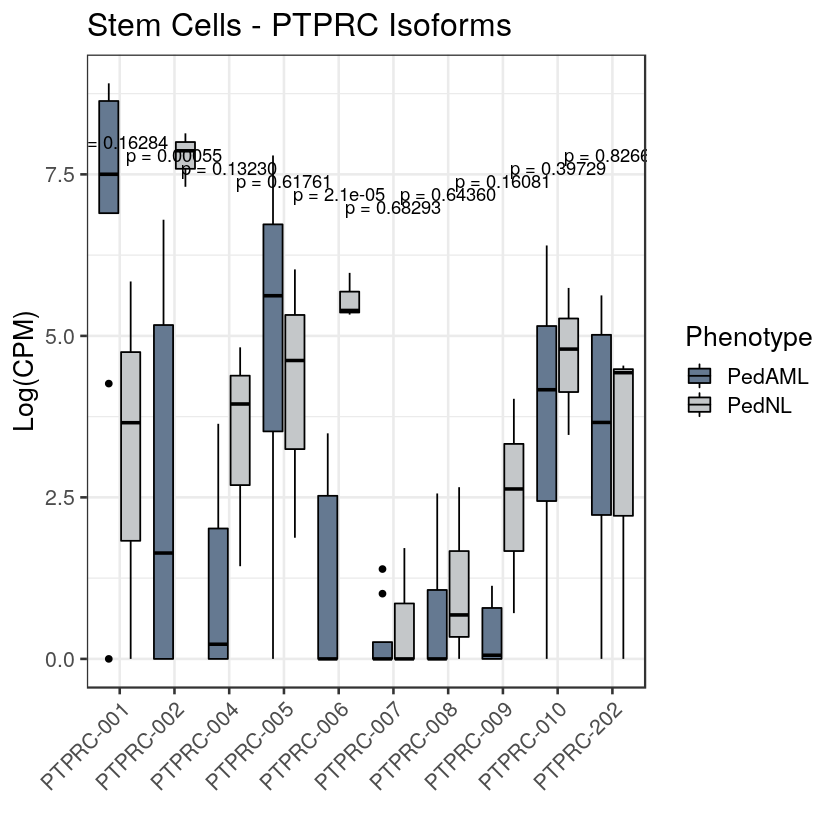

In [111]:
library(reshape2)
PTPRC.tx.lcpm.Prog.df.m <- melt(variable.name = "Isoform", PTPRC.tx.lcpm.Prog.df)
PTPRC.tx.lcpm.Stem.df.m <- melt(variable.name = "Isoform", PTPRC.tx.lcpm.Stem.df)

PTPRC.tx.lcpm.Prog.df.m <- subset(PTPRC.tx.lcpm.Prog.df.m, Phenotype != "AdultAML")
PTPRC.tx.lcpm.Stem.df.m <- subset(PTPRC.tx.lcpm.Stem.df.m, Phenotype != "AdultAML")
#head(PTPRC.tx.lcpm.Prog.df.m)
#head(PTPRC.tx.lcpm.Stem.df.m)
PTPRC.tx.lcpm.Prog.df.m.filt <- PTPRC.tx.lcpm.Prog.df.m[!PTPRC.tx.lcpm.Prog.df.m$Isoform %in% 
                                                        c("PTPRC-003", "PTPRC-011", "PTPRC-012", "PTPRC-013",
                                                          "PTPRC-014","PTPRC-201", "PTPRC-203", "PTPRC-204"),]
PTPRC.tx.lcpm.Stem.df.m.filt <- PTPRC.tx.lcpm.Stem.df.m[!PTPRC.tx.lcpm.Stem.df.m$Isoform %in% 
                                                        c("PTPRC-003", "PTPRC-011", "PTPRC-012", "PTPRC-013",
                                                          "PTPRC-014","PTPRC-201", "PTPRC-203", "PTPRC-204"),]
head(PTPRC.tx.lcpm.Prog.df.m.filt)

#png(file="DeWerf_Jamieson_Prog_PTPRCIsoforms_byPhenotype_10152020.png", width=9, height=6, units = "in", res = 300)
ggboxplot(PTPRC.tx.lcpm.Prog.df.m.filt, x="Isoform", y="value", fill="Phenotype",
         palette = c("#657991", "#C4C7C9")) + xlab("") +
    theme_bw(base_size=16) + ylab("Log(CPM)") + labs(title="Progenitors - PTPRC Isoforms") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1)) + 
    #stat_compare_means(aes(group=Phenotype), method="t.test", label = "p.signif")
#dev.off()
stat_compare_means(aes(group=Phenotype), method="t.test", label = "p.format",
                  label.y=c(8,7.8,7.6,7.4,7.2,7,7.2,7.4,7.6,7.8))
#png(file="DeWerf_Jamieson_Stem_PTPRCIsoforms_byPhenotype_10152020.png", width=9, height=6, units = "in", res = 300)
ggboxplot(PTPRC.tx.lcpm.Stem.df.m.filt, x="Isoform", y="value", fill="Phenotype",
         palette = c("#657991", "#C4C7C9")) + xlab("") +
    theme_bw(base_size=16) + ylab("Log(CPM)") + labs(title="Stem Cells - PTPRC Isoforms") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1)) + 
    #stat_compare_means(aes(group=Phenotype), method="t.test", label = "p.signif")

stat_compare_means(aes(group=Phenotype), method="t.test", label = "p.format",
                   label.y=c(8,7.8,7.6,7.4,7.2,7,7.2,7.4,7.6,7.8))
#dev.off()

In [117]:
library(reshape2)
PTPRC.tx.lcpm.Prog.df <- as.data.frame(t(PTPRC.tx.lcpm.Prog.unfilt))
PTPRC.tx.lcpm.Stem.df <- as.data.frame(t(PTPRC.tx.lcpm.Stem.unfilt))
for (i in 1:ncol(PTPRC.tx.lcpm.Prog.df)) {
    PTPRC.tx.lcpm.Prog.df[which(PTPRC.tx.lcpm.Prog.df[,i] < 0),i] <- 0 
    PTPRC.tx.lcpm.Stem.df[which(PTPRC.tx.lcpm.Stem.df[,i] < 0),i] <- 0     
}
PTPRC.tx.lcpm.Prog.df$Phenotype <- factor(as.character(meta.Prog.filt[match(rownames(PTPRC.tx.lcpm.Prog.df), 
                                                                paste0("X", meta.Prog.filt$Sample)),"Phenotype"]), 
                                                           levels=c("PedAML", "AdultAML","PedNL"))

PTPRC.tx.lcpm.Stem.df$Phenotype <- factor(as.character(meta.Stem.filt[match(rownames(PTPRC.tx.lcpm.Stem.df), 
                                                                paste0("X", meta.Stem.filt$Sample)),"Phenotype"]), 
                                                           levels=c("PedAML", "AdultAML","PedNL"))
colnames(PTPRC.tx.lcpm.Stem.df)[1:nrow(PTPRC.tx)] <- colnames(PTPRC.tx.lcpm.Prog.df)[1:nrow(PTPRC.tx)] <- as.character(PTPRC.tx$IsoName)



PTPRC.tx.lcpm.Prog.df.m <- melt(variable.name = "Isoform", PTPRC.tx.lcpm.Prog.df)

PTPRC.tx.lcpm.Prog.df.m <- subset(PTPRC.tx.lcpm.Prog.df.m, Phenotype != "AdultAML")
#head(PTPRC.tx.lcpm.Prog.df.m)
PTPRC.tx.lcpm.Prog.df.m.filt <- PTPRC.tx.lcpm.Prog.df.m[!PTPRC.tx.lcpm.Prog.df.m$Isoform %in% 
                                                        c("PTPRC-003", "PTPRC-011", "PTPRC-012", "PTPRC-013",
                                                          "PTPRC-014","PTPRC-201", "PTPRC-203", "PTPRC-204",
                                                          "PTPRC-004", "PTPRC-005", "PTPRC-007", "PTPRC-008",
                                                          "PTPRC-009", "PTPRC-010", "PTPRC-202"),]
head(PTPRC.tx.lcpm.Prog.df.m.filt)

table(PTPRC.tx.lcpm.Prog.df.m.filt$Isoform)

png(file="DeWerf_Jamieson_Prog_PTPRCIsoforms_byPhenotype_11182020.png", width=6, height=9, units = "in", res = 300)
ggboxplot(PTPRC.tx.lcpm.Prog.df.m.filt, x="Isoform", y="value", fill="Phenotype",
         palette = c("#657991", "#C4C7C9")) + xlab("") +
    theme_bw(base_size=16) + ylab("Log(CPM)") + labs(title="Progenitors - PTPRC Isoforms") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1)) #+ 
    #stat_compare_means(aes(group=Phenotype), method="t.test", label = "p.signif")
dev.off()
#stat_compare_means(aes(group=Phenotype), method="t.test", label = "p.format",
#                  label.y=c(8,7.8,7.6,7.4,7.2,7,7.2,7.4,7.6,7.8))


Using Phenotype as id variables


Phenotype Isoform   value   
1 PedAML    PTPRC-001 8.194695
2 PedAML    PTPRC-001 7.063206
3 PedAML    PTPRC-001 6.904324
4 PedAML    PTPRC-001 7.554303
5 PedAML    PTPRC-001 6.830979
6 PedAML    PTPRC-001 8.272045


PTPRC-001 PTPRC-002 PTPRC-003 PTPRC-004 PTPRC-005 PTPRC-006 PTPRC-007 PTPRC-008 
       15        15         0         0         0        15         0         0 
PTPRC-009 PTPRC-010 PTPRC-011 PTPRC-012 PTPRC-013 PTPRC-014 PTPRC-201 PTPRC-202 
        0         0         0         0         0         0         0         0 
PTPRC-203 PTPRC-204 
        0         0 

png 
  2

In [50]:
RBFOX1.tx <- read.table(file="../RBFOX1_tx.txt", sep="\t", header=FALSE, stringsAsFactors=FALSE)
colnames(RBFOX1.tx) <- c("IsoName", "ENS")
class(RBFOX1.tx$IsoName)
RBFOX1.tx <- with(RBFOX1.tx, RBFOX1.tx[order(IsoName),])
RBFOX1.tx
RBFOX1.tx$IsoName <- factor(as.character(RBFOX1.tx$IsoName), 
                           levels=as.character(RBFOX1.tx$IsoName))

RBFOX2.tx <- read.table(file="../RBFOX2_tx.txt", sep="\t", header=FALSE, stringsAsFactors=FALSE)
colnames(RBFOX2.tx) <- c("IsoName", "ENS")
class(RBFOX2.tx$IsoName)
RBFOX2.tx <- with(RBFOX2.tx, RBFOX2.tx[order(IsoName),])
RBFOX2.tx
RBFOX2.tx$IsoName <- factor(as.character(RBFOX2.tx$IsoName), 
                           levels=as.character(RBFOX2.tx$IsoName))

CD47.tx <- read.table(file="../CD47_tx.txt", sep="\t", header=FALSE, stringsAsFactors=FALSE)
colnames(CD47.tx) <- c("IsoName", "ENS")
class(CD47.tx$IsoName)
CD47.tx <- with(CD47.tx, CD47.tx[order(IsoName),])
CD47.tx
CD47.tx$IsoName <- factor(as.character(CD47.tx$IsoName), 
                           levels=as.character(CD47.tx$IsoName))
CD47.tx <- CD47.tx[-c(3,6),]

[1] "character"

IsoName    ENS            
5  RBFOX1-201 ENST00000311745
12 RBFOX1-202 ENST00000340209
4  RBFOX1-203 ENST00000355637
7  RBFOX1-204 ENST00000422070
8  RBFOX1-205 ENST00000436368
20 RBFOX1-206 ENST00000535565
9  RBFOX1-207 ENST00000547338
18 RBFOX1-208 ENST00000547372
33 RBFOX1-209 ENST00000547427
19 RBFOX1-210 ENST00000547605
34 RBFOX1-211 ENST00000548749
1  RBFOX1-212 ENST00000550418
23 RBFOX1-213 ENST00000551752
22 RBFOX1-214 ENST00000552089
6  RBFOX1-215 ENST00000553186
38 RBFOX1-216 ENST00000564850
25 RBFOX1-217 ENST00000567470
35 RBFOX1-218 ENST00000569889
32 RBFOX1-219 ENST00000569895
37 RBFOX1-220 ENST00000570188
24 RBFOX1-221 ENST00000570626
21 RBFOX1-222 ENST00000585867
13 RBFOX1-223 ENST00000620507
17 RBFOX1-224 ENST00000641259
10 RBFOX1-225 ENST00000674626
14 RBFOX1-226 ENST00000674792
29 RBFOX1-227 ENST00000674859
31 RBFOX1-228 ENST00000675077
36 RBFOX1-229 ENST00000675140
30 RBFOX1-230 ENST00000675242
11 RBFOX1-231 ENST00000675459
15 RBFOX1-232 ENST00000675562
3  RBFOX1-233 ENST00000675653
26 RBFOX1-234 ENST00000675725
2  RBFOX1-235 ENST00000675842
27 RBFOX1-236 ENST00000675904
16 RBFOX1-237 ENST00000676218
28 RBFOX1-238 ENST00000676253

[1] "character"

IsoName    ENS            
6  RBFOX2-201 ENST00000262829
7  RBFOX2-202 ENST00000359369
8  RBFOX2-203 ENST00000397303
10 RBFOX2-204 ENST00000397305
2  RBFOX2-205 ENST00000405409
12 RBFOX2-206 ENST00000408983
4  RBFOX2-207 ENST00000414461
5  RBFOX2-208 ENST00000416721
1  RBFOX2-209 ENST00000438146
3  RBFOX2-210 ENST00000449924
13 RBFOX2-211 ENST00000463509
9  RBFOX2-212 ENST00000473487
14 RBFOX2-213 ENST00000491982
11 RBFOX2-214 ENST00000495377

[1] "character"

IsoName  ENS            
1 CD47-201 ENST00000355354
2 CD47-202 ENST00000361309
5 CD47-203 ENST00000398258
6 CD47-204 ENST00000471694
4 CD47-205 ENST00000517766
3 CD47-206 ENST00000644850

In [51]:
dim(lcpm2.Prog.filt)
dim(lcpm2.Stem.filt)
head(rownames(lcpm2.Prog.filt))
head(rownames(lcpm2.Stem.filt))

table(RBFOX1.tx$ENS %in% rownames(lcpm2.Prog.unfilt))
table(RBFOX1.tx$ENS %in% rownames(lcpm2.Prog.filt))
table(RBFOX1.tx$ENS %in% rownames(lcpm2.Stem.unfilt))
table(RBFOX1.tx$ENS %in% rownames(lcpm2.Stem.filt))

table(RBFOX2.tx$ENS %in% rownames(lcpm2.Prog.unfilt))
table(RBFOX2.tx$ENS %in% rownames(lcpm2.Prog.filt))
table(RBFOX2.tx$ENS %in% rownames(lcpm2.Stem.unfilt))
table(RBFOX2.tx$ENS %in% rownames(lcpm2.Stem.filt))

table(CD47.tx$ENS %in% rownames(lcpm2.Prog.unfilt))
table(CD47.tx$ENS %in% rownames(lcpm2.Prog.filt))
table(CD47.tx$ENS %in% rownames(lcpm2.Stem.unfilt))
table(CD47.tx$ENS %in% rownames(lcpm2.Stem.filt))

[1] 33937    20

[1] 34983    16

[1] "ENST00000371582" "ENST00000371584" "ENST00000371588" "ENST00000466152"
[5] "ENST00000367770" "ENST00000367771"

[1] "ENST00000371582" "ENST00000371584" "ENST00000371588" "ENST00000466152"
[5] "ENST00000367770" "ENST00000367771"


FALSE  TRUE 
   18    20 


FALSE 
   38 


FALSE  TRUE 
   18    20 


FALSE 
   38 


TRUE 
  14 


FALSE 
   14 


TRUE 
  14 


FALSE 
   14 


TRUE 
   4 


TRUE 
   4 


TRUE 
   4 


TRUE 
   4 

In [62]:
spec.list <- list(RBFOX1.tx, RBFOX2.tx, CD47.tx)
#spec.list[[1]]
names(spec.list) <- c("RBFOX1", "RBFOX2", "CD47")
for (i in 1:3) {
print(names(spec.list)[i])
print(topTable_iso_PedAMLvsAdultAML_Prog[topTable_iso_PedAMLvsAdultAML_Prog$genes %in% spec.list[[i]]$ENS,])
print(topTable_iso_PedAMLvsPedNL_Prog[topTable_iso_PedAMLvsPedNL_Prog$genes %in% spec.list[[i]]$ENS,])
print(topTable_iso_PedAMLvsAdultAML_Stem[topTable_iso_PedAMLvsAdultAML_Stem$genes %in% spec.list[[i]]$ENS,])
print(topTable_iso_PedAMLvsPedNL_Stem[topTable_iso_PedAMLvsPedNL_Stem$genes %in% spec.list[[i]]$ENS,])
}

RBFOX1_exp <- unique(c(topTable_iso_PedAMLvsPedNL_Prog$genes[topTable_iso_PedAMLvsPedNL_Prog$genes %in% spec.list[[1]]$ENS],
       topTable_iso_PedAMLvsPedNL_Stem$genes[topTable_iso_PedAMLvsPedNL_Stem$genes %in% spec.list[[1]]$ENS]))
RBFOX1.tx_exp <- RBFOX1.tx[as.character(RBFOX1.tx$ENS) %in% RBFOX1_exp,]
spec.list[[1]] <- RBFOX1.tx_exp
RBFOX1.tx_exp

[1] "RBFOX1"
[1] genes     ENTREZID  SYMBOL    logFC     AveExpr   t         P.Value  
[8] adj.P.Val B        
<0 rows> (or 0-length row.names)
[1] genes     ENTREZID  SYMBOL    logFC     AveExpr   t         P.Value  
[8] adj.P.Val B        
<0 rows> (or 0-length row.names)
[1] genes     ENTREZID  SYMBOL    logFC     AveExpr   t         P.Value  
[8] adj.P.Val B        
<0 rows> (or 0-length row.names)
[1] genes     ENTREZID  SYMBOL    logFC     AveExpr   t         P.Value  
[8] adj.P.Val B        
<0 rows> (or 0-length row.names)
[1] "RBFOX2"
[1] genes     ENTREZID  SYMBOL    logFC     AveExpr   t         P.Value  
[8] adj.P.Val B        
<0 rows> (or 0-length row.names)
[1] genes     ENTREZID  SYMBOL    logFC     AveExpr   t         P.Value  
[8] adj.P.Val B        
<0 rows> (or 0-length row.names)
[1] genes     ENTREZID  SYMBOL    logFC     AveExpr   t         P.Value  
[8] adj.P.Val B        
<0 rows> (or 0-length row.names)
[1] genes     ENTREZID  SYMBOL    logFC     AveExpr   t  

IsoName ENS

In [73]:
head(RBFOX1.tx.lcpm.Prog.df.m)
head(RBFOX2.tx.lcpm.Prog.df.m)
head(CD47.tx.lcpm.Prog.df.m)

Phenotype Isoform    value
1 PedAML    RBFOX1-201 0    
2 PedAML    RBFOX1-201 0    
3 PedAML    RBFOX1-201 0    
4 PedAML    RBFOX1-201 0    
5 PedAML    RBFOX1-201 0    
6 PedAML    RBFOX1-201 0

Phenotype Isoform    value
1 PedAML    RBFOX2-201 0    
2 PedAML    RBFOX2-201 0    
3 PedAML    RBFOX2-201 0    
4 PedAML    RBFOX2-201 0    
5 PedAML    RBFOX2-201 0    
6 PedAML    RBFOX2-201 0

Phenotype Isoform  value   
1 PedAML    CD47-201 7.627395
2 PedAML    CD47-201 6.870112
3 PedAML    CD47-201 6.278158
4 PedAML    CD47-201 7.832918
5 PedAML    CD47-201 5.862271
6 PedAML    CD47-201 7.900891

In [75]:
RBFOX2.tx.lcpm.Prog.unfilt
RBFOX2.tx.lcpm.Stem.unfilt

X02id38cellPROGENITORS X06id90cellPROGENITORS
ENST00000262829 -7.28397               -7.28397              
ENST00000359369 -7.28397               -7.28397              
ENST00000397303 -7.28397               -7.28397              
ENST00000397305 -7.28397               -7.28397              
ENST00000405409 -7.28397               -7.28397              
ENST00000408983 -7.28397               -7.28397              
ENST00000414461 -7.28397               -7.28397              
ENST00000416721 -7.28397               -7.28397              
ENST00000438146 -7.28397               -7.28397              
ENST00000449924 -7.28397               -7.28397              
ENST00000463509 -7.28397               -7.28397              
ENST00000473487 -7.28397               -7.28397              
ENST00000491982 -7.28397               -7.28397              
ENST00000495377 -7.28397               -7.28397              
                X04id78cellPROGENITORS X06id00066PRO X01x00077xPROGENIT
ENST00000262829 -7.283970              -7.28397      -7.283970         
ENST00000359369 -7.283970              -7.28397      -7.283970         
ENST00000397303 -7.283970              -7.28397      -7.283970         
ENST00000397305 -7.283970              -7.28397      -7.283970         
ENST00000405409 -7.283970              -7.28397      -3.710872         
ENST00000408983 -7.283970              -7.28397      -7.283970         
ENST00000414461 -7.283970              -7.28397      -7.283970         
ENST00000416721 -7.283970              -7.28397      -7.283970         
ENST00000438146 -7.283970              -7.28397      -7.283970         
ENST00000449924 -7.283970              -7.28397      -7.283970         
ENST00000463509 -7.283970              -7.28397      -3.710872         
ENST00000473487 -3.087088              -7.28397      -7.283970         
ENST00000491982 -7.283970              -7.28397      -7.283970         
ENST00000495377 -7.283970              -7.28397      -7.283970         
                X03x11379xHPCxxxxx X14x12488xPLUSPLUS X15x12584xPLUSPLUS
ENST00000262829 -7.28397000        -7.28397000        -7.2839700        
ENST00000359369 -2.77818646        -7.28397000        -7.2839700        
ENST00000397303 -7.28397000        -0.82894086        -7.2839700        
ENST00000397305 -7.28397000        -7.28397000        -7.2839700        
ENST00000405409  0.04234555         0.56593694        -0.1200456        
ENST00000408983 -7.28397000        -7.28397000        -7.2839700        
ENST00000414461 -7.28397000        -7.28397000        -7.2839700        
ENST00000416721 -1.22338818        -0.02575887        -7.2839700        
ENST00000438146 -1.20550167         0.19533130        -7.2839700        
ENST00000449924 -4.20345498        -1.65694551        -7.2839700        
ENST00000463509 -3.72875840        -2.51587889        -7.2839700        
ENST00000473487 -5.59672913        -2.70297630        -2.5187467        
ENST00000491982 -2.67407889        -1.65308073        -7.2839700        
ENST00000495377 -7.28397000        -7.28397000        -7.2839700        
                X17x12451xPLUSPLUS X03id11474HPC X01id11251HPC
ENST00000262829 -7.283970          -7.283970     -7.28397     
ENST00000359369 -7.283970          -7.283970     -7.28397     
ENST00000397303 -7.283970          -7.283970     -7.28397     
ENST00000397305 -7.283970          -7.283970     -7.28397     
ENST00000405409 -7.283970          -1.020718     -7.28397     
ENST00000408983 -7.283970          -7.283970     -7.28397     
ENST00000414461 -7.283970          -1.765857     -7.28397     
ENST00000416721 -2.685512          -7.283970     -7.28397     
ENST00000438146 -3.184693          -7.283970     -7.28397     
ENST00000449924 -7.283970          -7.283970     -7.28397     
ENST00000463509 -7.283970          -7.283970     -7.28397     
ENST00000473487 -7.283970          -7.283970     -7.28397     
ENST00000491982 -7.283970          -7.283970     -7.28397     
ENST00000495377 -7.283970    

X01id38cellHSC Xcell05id90HSC X03id78cellHSC X05id00066HSC
ENST00000262829 -6.840207      -6.8402071     -6.840207      -6.8402071   
ENST00000359369 -6.840207      -6.8402071     -6.840207      -6.8402071   
ENST00000397303 -6.840207      -2.2778788     -6.840207      -6.8402071   
ENST00000397305 -6.840207      -6.8402071     -6.840207      -6.8402071   
ENST00000405409 -2.772941      -0.6488934     -6.840207      -0.4046415   
ENST00000408983 -6.840207      -6.8402071     -6.840207      -6.8402071   
ENST00000414461 -6.840207      -6.8402071     -6.840207      -6.8402071   
ENST00000416721 -4.242491      -1.4918261     -6.840207      -1.8940602   
ENST00000438146 -6.840207      -0.1812837     -6.840207      -1.0303961   
ENST00000449924 -4.554108      -6.8402071     -6.840207      -6.8402071   
ENST00000463509 -6.840207      -6.8402071     -6.840207      -6.8402071   
ENST00000473487 -6.022372      -6.8402071     -6.840207      -6.8402071   
ENST00000491982 -6.840207      -6.8402071     -6.840207      -1.1350841   
ENST00000495377 -6.840207      -6.8402071     -6.840207      -6.8402071   
                X02x11379xHSCxxxxx X04x00068xPLUSMINS X12x12484xPLUSMINS
ENST00000262829 -6.840207          -6.840207          -6.8402071        
ENST00000359369 -6.840207          -6.840207          -6.8402071        
ENST00000397303 -6.840207          -6.840207          -1.7029989        
ENST00000397305 -6.840207          -6.840207          -6.8402071        
ENST00000405409 -6.840207          -6.840207           0.6327905        
ENST00000408983 -6.840207          -6.840207          -6.8402071        
ENST00000414461 -6.840207          -6.840207          -6.8402071        
ENST00000416721 -6.840207          -6.840207          -1.8342805        
ENST00000438146 -4.120357          -6.840207          -0.2915604        
ENST00000449924 -6.840207          -6.840207          -6.8402071        
ENST00000463509 -6.840207          -6.840207          -6.8402071        
ENST00000473487 -6.840207          -6.840207          -6.8402071        
ENST00000491982 -6.840207          -6.840207          -2.6625765        
ENST00000495377 -4.789436          -6.840207          -6.8402071        
                X13x12488xPLUSMINS X16x12451xPLUSMINS X04id11474HSC
ENST00000262829 -6.8402071         -6.840207          -6.840207    
ENST00000359369 -6.8402071         -6.840207          -6.840207    
ENST00000397303 -0.3475210         -6.840207          -6.840207    
ENST00000397305 -6.8402071         -6.840207          -6.840207    
ENST00000405409  2.0287648         -6.840207          -2.292651    
ENST00000408983 -6.8402071         -6.840207          -6.840207    
ENST00000414461 -6.8402071         -6.840207          -4.696572    
ENST00000416721 -2.6393087         -6.840207          -6.840207    
ENST00000438146  0.8953079         -6.840207          -1.194044    
ENST00000449924 -6.8402071         -6.840207          -6.840207    
ENST00000463509 -6.8402071         -6.840207          -6.840207    
ENST00000473487 -1.4440763         -6.840207          -1.972661    
ENST00000491982 -6.8402071         -6.840207          -6.840207    
ENST00000495377 -6.8402071         -6.840207          -6.840207    
                X02id11251HSC X08x00020xPLUSMINS X10x00082xPLUSMINS
ENST00000262829 -6.840207     -6.8402071         -6.8402071        
ENST00000359369 -6.840207     -6.8402071         -2.3966862        
ENST00000397303 -6.840207      1.8994336         -6.8402071        
ENST00000397305 -6.840207     -6.8402071         -6.8402071        
ENST00000405409 -4.045654     -6.8402071          0.0556044        
ENST00000408983 -6.840207     -6.8402071         -6.8402071        
ENST00000414461 -6.840207     -6.8402071         -6.8402071        
ENST00000416721 -1.554238     -0.3488786         -1.0609810        
ENST00000438146 -1.581166      1.7631754          0.5380332        
ENST00000449924 -6.840207     -6.8402071         -6.8402071        
ENST00000463509 -6.840207   

In [52]:
RBFOX1.tx.lcpm.Prog.unfilt <- lcpm2.Prog.unfilt[match(RBFOX1.tx$ENS, rownames(lcpm2.Prog.unfilt)),]
RBFOX1.tx.lcpm.Stem.unfilt <- lcpm2.Stem.unfilt[match(RBFOX1.tx$ENS, rownames(lcpm2.Stem.unfilt)),]
RBFOX2.tx.lcpm.Prog.unfilt <- lcpm2.Prog.unfilt[match(RBFOX2.tx$ENS, rownames(lcpm2.Prog.unfilt)),]
RBFOX2.tx.lcpm.Stem.unfilt <- lcpm2.Stem.unfilt[match(RBFOX2.tx$ENS, rownames(lcpm2.Stem.unfilt)),]
CD47.tx.lcpm.Prog.unfilt <- lcpm2.Prog.unfilt[match(CD47.tx$ENS, rownames(lcpm2.Prog.unfilt)),]
CD47.tx.lcpm.Stem.unfilt <- lcpm2.Stem.unfilt[match(CD47.tx$ENS, rownames(lcpm2.Stem.unfilt)),]

dim(RBFOX1.tx.lcpm.Prog.unfilt)
dim(RBFOX1.tx.lcpm.Stem.unfilt)
RBFOX1.tx.lcpm.Prog.df <- as.data.frame(t(RBFOX1.tx.lcpm.Prog.unfilt))
RBFOX1.tx.lcpm.Stem.df <- as.data.frame(t(RBFOX1.tx.lcpm.Stem.unfilt))

#for (i in 1:ncol(RBFOX1.tx.lcpm.Prog.df)) {
#    RBFOX1.tx.lcpm.Prog.df[which(RBFOX1.tx.lcpm.Prog.df[,i] < 0),i] <- 0 
#    RBFOX1.tx.lcpm.Stem.df[which(RBFOX1.tx.lcpm.Stem.df[,i] < 0),i] <- 0     
#}
RBFOX1.tx.lcpm.Prog.df$Phenotype <- factor(as.character(meta.Prog.filt[match(rownames(RBFOX1.tx.lcpm.Prog.df), 
                                                                paste0("X", meta.Prog.filt$Sample)),"Phenotype"]), 
                                                           levels=c("PedAML", "AdultAML","PedNL"))

RBFOX1.tx.lcpm.Stem.df$Phenotype <- factor(as.character(meta.Stem.filt[match(rownames(RBFOX1.tx.lcpm.Stem.df), 
                                                                paste0("X", meta.Stem.filt$Sample)),"Phenotype"]), 
                                                           levels=c("PedAML", "AdultAML","PedNL"))
colnames(RBFOX1.tx.lcpm.Stem.df)[1:nrow(RBFOX1.tx)] <- colnames(RBFOX1.tx.lcpm.Prog.df)[1:nrow(RBFOX1.tx)] <- as.character(RBFOX1.tx$IsoName)

RBFOX2.tx.lcpm.Prog.df <- as.data.frame(t(RBFOX2.tx.lcpm.Prog.unfilt))
RBFOX2.tx.lcpm.Stem.df <- as.data.frame(t(RBFOX2.tx.lcpm.Stem.unfilt))
#for (i in 1:ncol(RBFOX2.tx.lcpm.Prog.df)) {
#    RBFOX2.tx.lcpm.Prog.df[which(RBFOX2.tx.lcpm.Prog.df[,i] < 0),i] <- 0 
#    RBFOX2.tx.lcpm.Stem.df[which(RBFOX2.tx.lcpm.Stem.df[,i] < 0),i] <- 0     
#}
RBFOX2.tx.lcpm.Prog.df$Phenotype <- factor(as.character(meta.Prog.filt[match(rownames(RBFOX2.tx.lcpm.Prog.df), 
                                                                paste0("X", meta.Prog.filt$Sample)),"Phenotype"]), 
                                                           levels=c("PedAML", "AdultAML","PedNL"))

RBFOX2.tx.lcpm.Stem.df$Phenotype <- factor(as.character(meta.Stem.filt[match(rownames(RBFOX2.tx.lcpm.Stem.df), 
                                                                paste0("X", meta.Stem.filt$Sample)),"Phenotype"]), 
                                                           levels=c("PedAML", "AdultAML","PedNL"))
colnames(RBFOX2.tx.lcpm.Stem.df)[1:nrow(RBFOX2.tx)] <- colnames(RBFOX2.tx.lcpm.Prog.df)[1:nrow(RBFOX2.tx)] <- as.character(RBFOX2.tx$IsoName)

CD47.tx.lcpm.Prog.df <- as.data.frame(t(CD47.tx.lcpm.Prog.unfilt))
CD47.tx.lcpm.Stem.df <- as.data.frame(t(CD47.tx.lcpm.Stem.unfilt))
for (i in 1:ncol(CD47.tx.lcpm.Prog.df)) {
    CD47.tx.lcpm.Prog.df[which(CD47.tx.lcpm.Prog.df[,i] < 0),i] <- 0 
    CD47.tx.lcpm.Stem.df[which(CD47.tx.lcpm.Stem.df[,i] < 0),i] <- 0     
}
CD47.tx.lcpm.Prog.df$Phenotype <- factor(as.character(meta.Prog.filt[match(rownames(CD47.tx.lcpm.Prog.df), 
                                                                paste0("X", meta.Prog.filt$Sample)),"Phenotype"]), 
                                                           levels=c("PedAML", "AdultAML","PedNL"))

CD47.tx.lcpm.Stem.df$Phenotype <- factor(as.character(meta.Stem.filt[match(rownames(CD47.tx.lcpm.Stem.df), 
                                                                paste0("X", meta.Stem.filt$Sample)),"Phenotype"]), 
                                                           levels=c("PedAML", "AdultAML","PedNL"))
colnames(CD47.tx.lcpm.Stem.df)[1:nrow(CD47.tx)] <- colnames(CD47.tx.lcpm.Prog.df)[1:nrow(CD47.tx)] <- as.character(CD47.tx$IsoName)



[1] 38 20

[1] 38 16

In [85]:
table(RBFOX2.tx.lcpm.Prog.df.m$Isoform)


RBFOX2-201 RBFOX2-202 RBFOX2-203 RBFOX2-204 RBFOX2-205 RBFOX2-206 RBFOX2-207 
         0          0          0          0          0          0          0 
RBFOX2-208 RBFOX2-209 RBFOX2-210 RBFOX2-211 RBFOX2-212 RBFOX2-213 RBFOX2-214 
         0          0          0          0          0          0          0 

Using Phenotype as id variables

Using Phenotype as id variables



Phenotype Isoform    value    
1 PedAML    RBFOX1-201 -3.840207
2 PedAML    RBFOX1-201 -3.840207
3 PedAML    RBFOX1-201 -3.840207
4 PedAML    RBFOX1-201 -3.840207
5 PedAML    RBFOX1-201 -3.840207
6 PedAML    RBFOX1-201 -3.840207

Using Phenotype as id variables

Using Phenotype as id variables

Using Phenotype as id variables

Using Phenotype as id variables



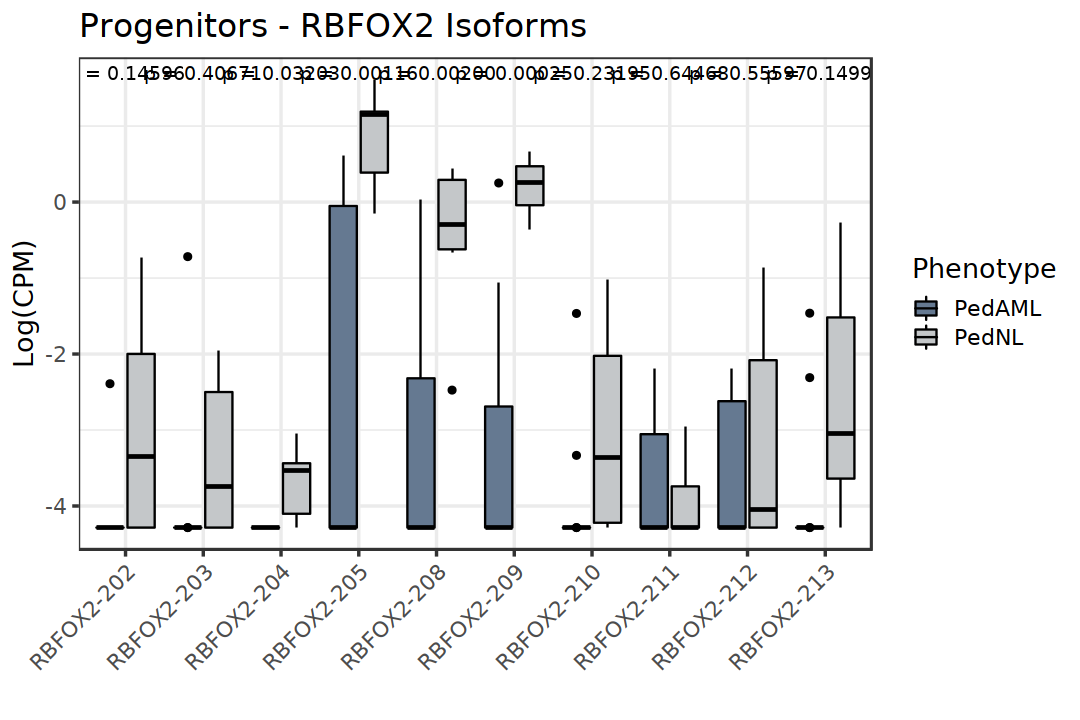

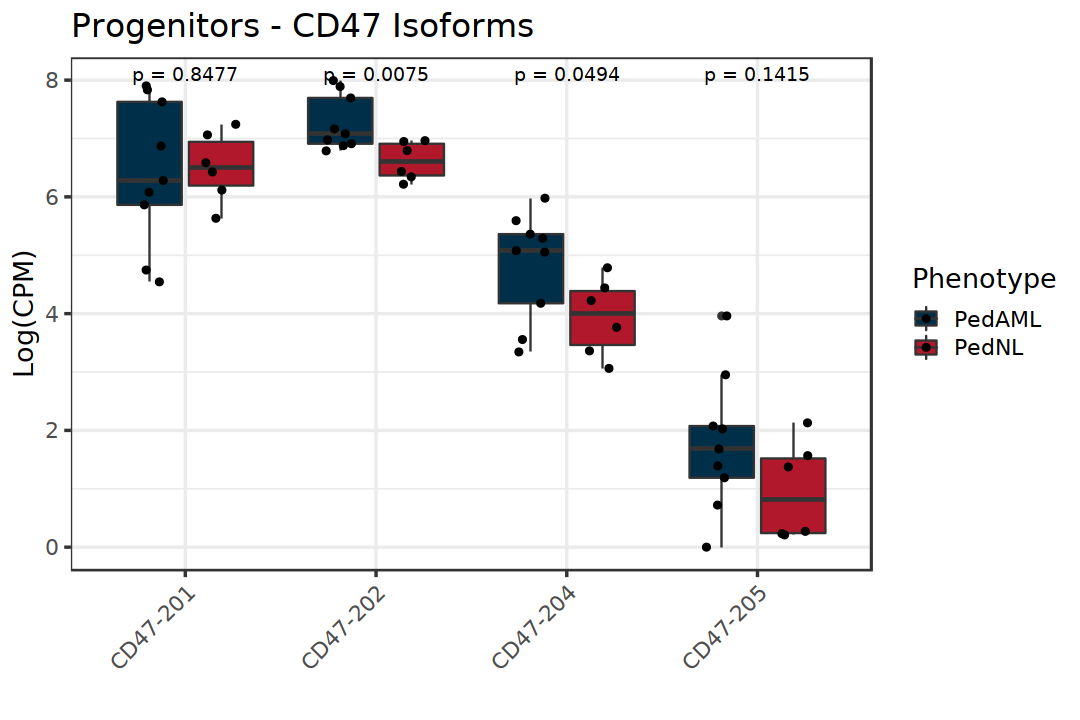

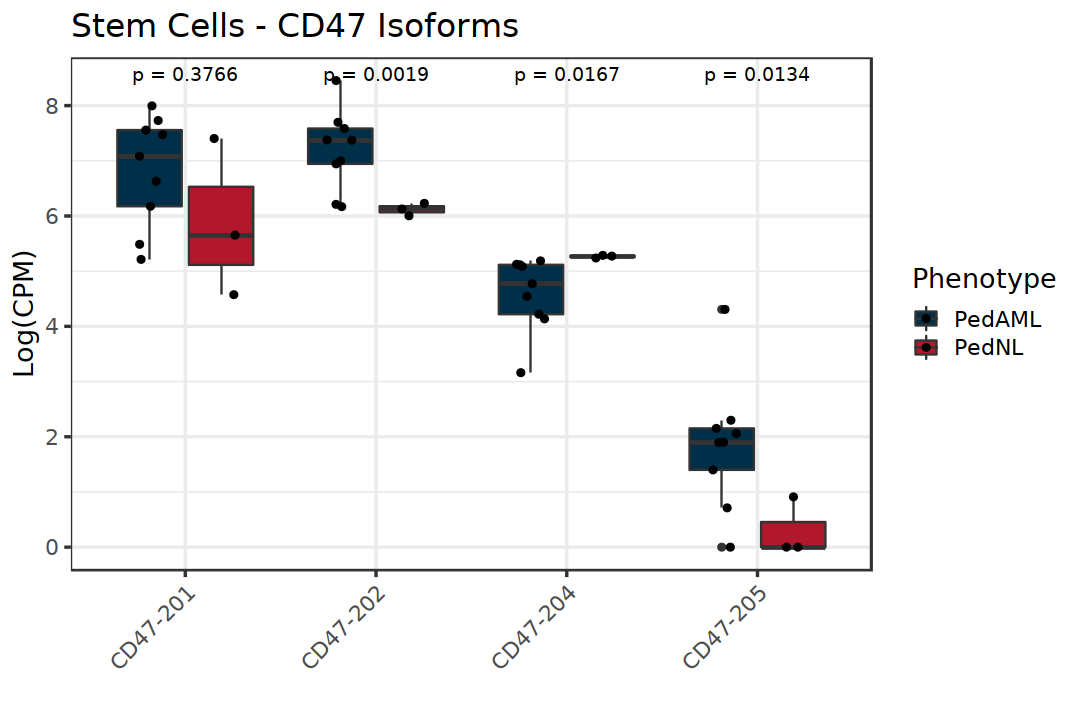

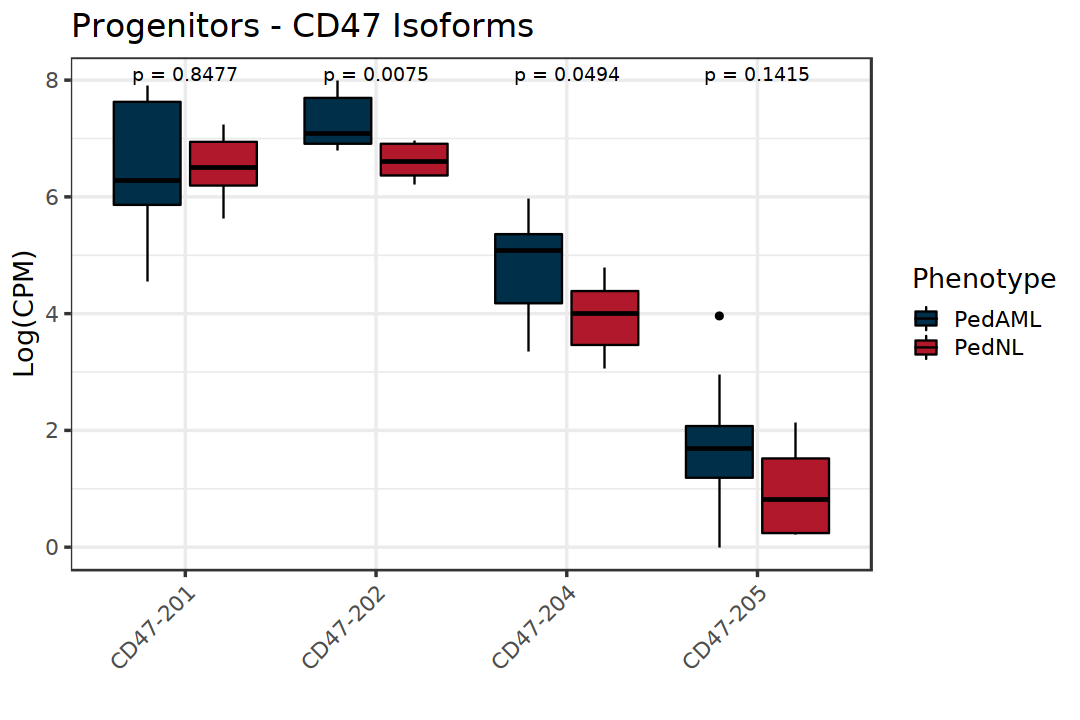

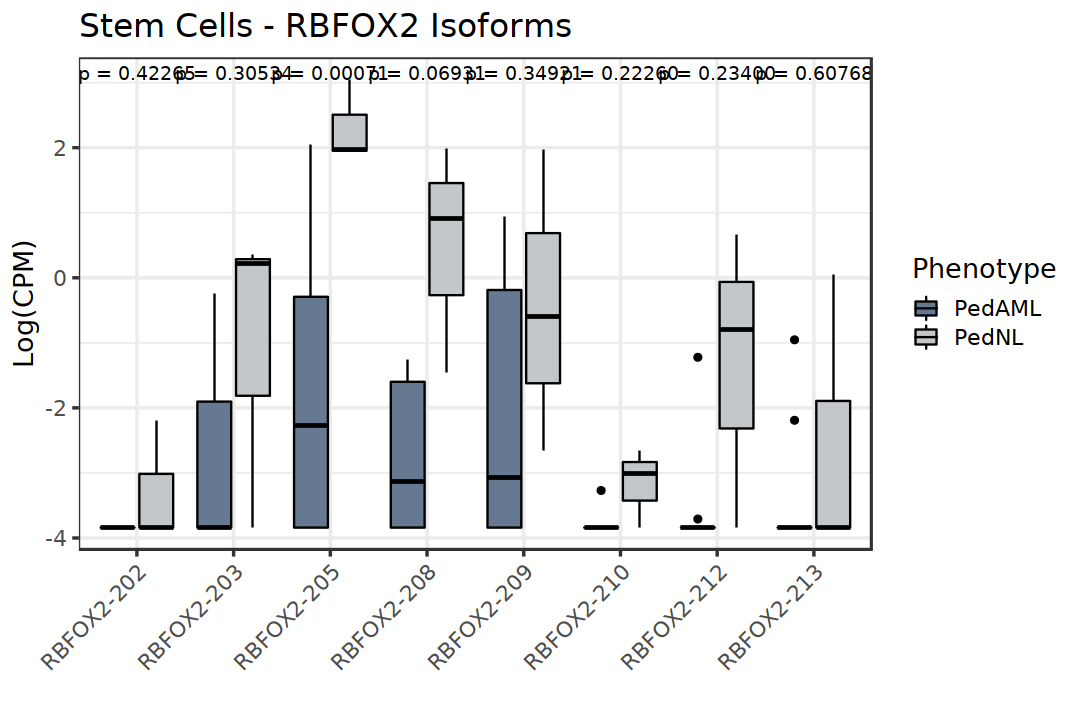

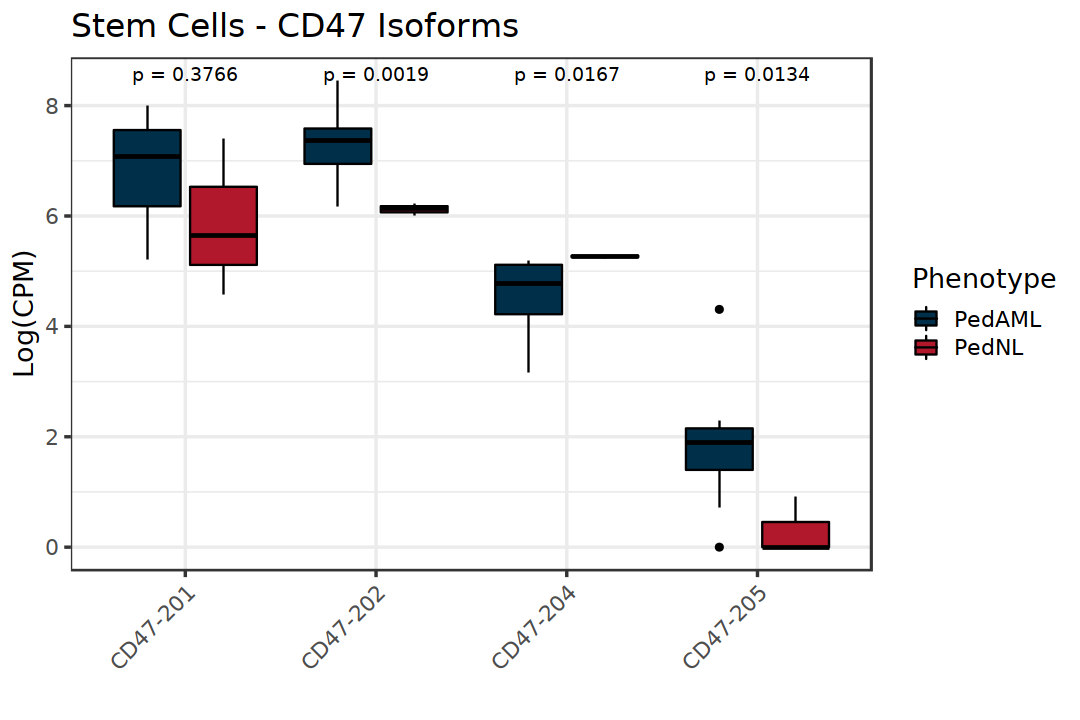

In [79]:
library(reshape2)
RBFOX1.tx.lcpm.Prog.df.m <- melt(variable.name = "Isoform", RBFOX1.tx.lcpm.Prog.df)
RBFOX1.tx.lcpm.Stem.df.m <- melt(variable.name = "Isoform", RBFOX1.tx.lcpm.Stem.df)
head(RBFOX1.tx.lcpm.Stem.df.m)
RBFOX2.tx.lcpm.Prog.df.m <- melt(variable.name = "Isoform", RBFOX2.tx.lcpm.Prog.df)
RBFOX2.tx.lcpm.Stem.df.m <- melt(variable.name = "Isoform", RBFOX2.tx.lcpm.Stem.df)
CD47.tx.lcpm.Prog.df.m <- melt(variable.name = "Isoform", CD47.tx.lcpm.Prog.df)
CD47.tx.lcpm.Stem.df.m <- melt(variable.name = "Isoform", CD47.tx.lcpm.Stem.df)

RBFOX1.tx.lcpm.Prog.df.m <- subset(RBFOX1.tx.lcpm.Prog.df.m, Phenotype != "AdultAML")
RBFOX1.tx.lcpm.Stem.df.m <- subset(RBFOX1.tx.lcpm.Stem.df.m, Phenotype != "AdultAML")
RBFOX2.tx.lcpm.Prog.df.m <- subset(RBFOX2.tx.lcpm.Prog.df.m, Phenotype != "AdultAML")
RBFOX2.tx.lcpm.Stem.df.m <- subset(RBFOX2.tx.lcpm.Stem.df.m, Phenotype != "AdultAML")
CD47.tx.lcpm.Prog.df.m <- subset(CD47.tx.lcpm.Prog.df.m, Phenotype != "AdultAML")
CD47.tx.lcpm.Stem.df.m <- subset(CD47.tx.lcpm.Stem.df.m, Phenotype != "AdultAML")

RBFOX2.tx.lcpm.Prog.df.m <- RBFOX2.tx.lcpm.Prog.df.m[!RBFOX2.tx.lcpm.Prog.df.m$Isoform %in% 
                                                     c("RBFOX2-201","RBFOX2-206","RBFOX2-207","RBFOX2-214"),]
RBFOX2.tx.lcpm.Stem.df.m <- RBFOX2.tx.lcpm.Stem.df.m[!RBFOX2.tx.lcpm.Stem.df.m$Isoform %in% 
                                                     c("RBFOX2-201","RBFOX2-204","RBFOX2-206","RBFOX2-207",
                                                       "RBFOX2-211","RBFOX2-214"),]
CD47.tx.lcpm.Prog.df.m <- CD47.tx.lcpm.Prog.df.m[!CD47.tx.lcpm.Prog.df.m$Isoform %in% c("CD47-203", "CD47-206"),]
CD47.tx.lcpm.Stem.df.m <- CD47.tx.lcpm.Stem.df.m[!CD47.tx.lcpm.Stem.df.m$Isoform %in% c("CD47-203", "CD47-206"),]

#png(file="DeWerf_Jamieson_Prog_RBFOX1Isoforms_byPhenotype_11032020.png", width=9, height=6, units = "in", res = 300)
#ggboxplot(RBFOX1.tx.lcpm.Prog.df.m, x="Isoform", y="value", fill="Phenotype",
#         palette = c("#657991", "#C4C7C9")) + xlab("") +
#    theme_bw(base_size=16) + ylab("Log(CPM)") + labs(title="Progenitors - RBFOX1 Isoforms") + 
#    theme(axis.text.x = element_text(angle = 45, hjust=1)) + 
#    stat_compare_means(method="t.test", label = "p.format", ref.group="PedAML")
#dev.off()
#png(file="DeWerf_Jamieson_Prog_RBFOX2Isoforms_byPhenotype_11032020.png", width=9, height=6, units = "in", res = 300)
ggboxplot(RBFOX2.tx.lcpm.Prog.df.m, x="Isoform", y="value", fill="Phenotype",
         palette = c("#657991", "#C4C7C9")) + xlab("") +
    theme_bw(base_size=16) + ylab("Log(CPM)") + labs(title="Progenitors - RBFOX2 Isoforms") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1)) + 
    stat_compare_means(aes(group=Phenotype), method="t.test", label = "p.format")
#dev.off()

ggplot(CD47.tx.lcpm.Prog.df.m, aes(x=Isoform, y=value, fill=Phenotype)) + xlab("") +
    geom_boxplot(aes(fill=Phenotype)) + geom_point(shape=19, position=position_jitterdodge()) +
    scale_fill_manual(values = c("#003049", "#B2182B")) +
    theme_bw(base_size=16) + ylab("Log(CPM)") + labs(title="Progenitors - CD47 Isoforms") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1)) + 
    stat_compare_means(aes(group=Phenotype), method="t.test", label = "p.format")
#dev.off()

ggplot(CD47.tx.lcpm.Stem.df.m, aes(x=Isoform, y=value, fill=Phenotype)) + xlab("") +
    geom_boxplot(aes(fill=Phenotype)) + geom_point(shape=19, position=position_jitterdodge()) +
    scale_fill_manual(values = c("#003049", "#B2182B")) +
    theme_bw(base_size=16) + ylab("Log(CPM)") + labs(title="Stem Cells - CD47 Isoforms") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1)) + 
    stat_compare_means(aes(group=Phenotype), method="t.test", label = "p.format")
#dev.off()

#png(file="DeWerf_Jamieson_Prog_CD47Isoforms_byPhenotype_11032020.png", width=9, height=6, units = "in", res = 300)
ggboxplot(CD47.tx.lcpm.Prog.df.m, x="Isoform", y="value", fill="Phenotype", #add=c("jitter"),
          palette = c("#003049", "#B2182B")) + xlab("") +
    theme_bw(base_size=16) + ylab("Log(CPM)") + labs(title="Progenitors - CD47 Isoforms") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1)) + 
    stat_compare_means(aes(group=Phenotype), method="t.test", label = "p.format")
#dev.off()
#png(file="DeWerf_Jamieson_Stem_RBFOX1Isoforms_byPhenotype_11032020.png", width=9, height=6, units = "in", res = 300)
#ggboxplot(RBFOX1.tx.lcpm.Stem.df.m, x="Isoform", y="value", fill="Phenotype",
#         palette = c("#657991", "#C4C7C9")) + xlab("") +
#    theme_bw(base_size=16) + ylab("Log(CPM)") + labs(title="Stem Cells - RBFOX1 Isoforms") + 
#    theme(axis.text.x = element_text(angle = 45, hjust=1)) + 
#    stat_compare_means(method="t.test", label = "p.format", ref.group="PedAML")
#dev.off()
#png(file="DeWerf_Jamieson_Stem_RBFOX2Isoforms_byPhenotype_11032020.png", width=9, height=6, units = "in", res = 300)
ggboxplot(RBFOX2.tx.lcpm.Stem.df.m, x="Isoform", y="value", fill="Phenotype",
         palette = c("#657991", "#C4C7C9")) + xlab("") +
    theme_bw(base_size=16) + ylab("Log(CPM)") + labs(title="Stem Cells - RBFOX2 Isoforms") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1)) + 
    stat_compare_means(aes(group=Phenotype), method="t.test", label = "p.format")
#dev.off()
#png(file="DeWerf_Jamieson_Stem_CD47Isoforms_byPhenotype_11032020.png", width=9, height=6, units = "in", res = 300)
ggboxplot(CD47.tx.lcpm.Stem.df.m, x="Isoform", y="value", fill="Phenotype", #add=c("jitter"),
         palette = c("#003049", "#B2182B")) + xlab("") +
    theme_bw(base_size=16) + ylab("Log(CPM)") + labs(title="Stem Cells - CD47 Isoforms") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1)) + 
    stat_compare_means(aes(group=Phenotype), method="t.test", label = "p.format")
#dev.off()

## ADAR Isoform Expression Analysis
### ADAR transcripts are: "ENST00000368471", "ENST00000368474"

In [25]:
ADAR.tx <- c("ENST00000368471", "ENST00000368474")
table(rownames(DGE_all.Prog.filt$counts) %in% ADAR.tx)
table(rownames(DGE_all.Stem.filt$counts) %in% ADAR.tx)
ADAR.tx.exp.Prog.filt <- DGE_all.Prog.filt$counts[rownames(DGE_all.Prog.filt$counts) %in% ADAR.tx,]
ADAR.tx.exp.Stem.filt <- DGE_all.Stem.filt$counts[rownames(DGE_all.Stem.filt$counts) %in% ADAR.tx,]
dim(ADAR.tx.exp.Prog.filt)
dim(ADAR.tx.exp.Stem.filt)

ADAR.tx.lcpm.Prog.filt <- lcpm2.Prog.filt[rownames(lcpm2.Prog.filt) %in% ADAR.tx,]
ADAR.tx.lcpm.Stem.filt <- lcpm2.Stem.filt[rownames(lcpm2.Stem.filt) %in% ADAR.tx,]
ADAR.tx.lcpm.exp <- list(Prog=ADAR.tx.lcpm.Prog.filt, Stem=ADAR.tx.lcpm.Stem.filt)
ADAR.tx.lcpm <- do.call(cbind, ADAR.tx.lcpm.exp)
ADAR.tx.ratios <- apply(ADAR.tx.lcpm, 2, function(x) x[2] - x[1])
names(ADAR.tx.ratios) <- gsub("_S[0-9]+$", "", names(ADAR.tx.ratios))
    
ADAR.tx.lcpm.Prog.ratios <- apply(ADAR.tx.lcpm.Prog.filt, 2, function(x) x[2] - x[1])
names(ADAR.tx.lcpm.Prog.ratios) <- gsub("_S[0-9]+$", "", names(ADAR.tx.lcpm.Prog.ratios))
ADAR.tx.lcpm.Prog.ratios.df <- data.frame(Sample=names(ADAR.tx.lcpm.Prog.ratios), 
                                          value=ADAR.tx.lcpm.Prog.ratios,
                                          Phenotype=factor(as.character(meta.Prog.filt[match(names(ADAR.tx.lcpm.Prog.ratios), 
                                                                paste0("X",meta.Prog.filt$Sample)),"X"]), 
                                                           levels=c("PedAML", "AdultAML","PedNL")))

ADAR.tx.lcpm.Stem.ratios <- apply(ADAR.tx.lcpm.Stem.filt, 2, function(x) x[2] - x[1])
names(ADAR.tx.lcpm.Stem.ratios) <- gsub("_S[0-9]+$", "", names(ADAR.tx.lcpm.Stem.ratios))
ADAR.tx.lcpm.Stem.ratios.df <- data.frame(Sample=names(ADAR.tx.lcpm.Stem.ratios), 
                                          value=ADAR.tx.lcpm.Stem.ratios,
                                          Phenotype=factor(as.character(meta.Stem.filt[match(names(ADAR.tx.lcpm.Stem.ratios), 
                                                                paste0("X",meta.Stem.filt$Sample)),"X"]), 
                                                           levels=c("PedAML", "AdultAML","PedNL")))



FALSE  TRUE 
33935     2 


FALSE  TRUE 
34981     2 

[1]  2 20

[1]  2 16

In [270]:

#ADAR.tx.lcpm_02192020 <- list(Stem=ADAR.tx.lcpm.Stem.filt, Prog=ADAR.tx.lcpm.Prog.filt)
#save(ADAR.tx.lcpm_02192020, file="ADAR.tx.lcpm_02192020.rdata")

In [26]:
ADAR.tx.lcpm.Prog.ratios.df$ADARp110.expr <- ADAR.tx.lcpm[1, match(ADAR.tx.lcpm.Prog.ratios.df$Sample, 
                                                              colnames(ADAR.tx.lcpm))]
ADAR.tx.lcpm.Prog.ratios.df$ADARp150.expr <- ADAR.tx.lcpm[2, match(ADAR.tx.lcpm.Prog.ratios.df$Sample, 
                                                              colnames(ADAR.tx.lcpm))]
#lcpm.Prog.APOBEC3C$ADARratio <- lcpm.Prog.APOBEC3C$ADARp150.expr - lcpm.Prog.APOBEC3C$ADARp110.expr
#
ADAR.tx.lcpm.Stem.ratios.df$ADARp110.expr <- ADAR.tx.lcpm[1, match( ADAR.tx.lcpm.Stem.ratios.df$Sample, 
                                                              colnames(ADAR.tx.lcpm))]
ADAR.tx.lcpm.Stem.ratios.df$ADARp150.expr <- ADAR.tx.lcpm[2, match(ADAR.tx.lcpm.Stem.ratios.df$Sample,
                                                               colnames(ADAR.tx.lcpm))]
#lcpm.Stem.APOBEC3C$ADARratio <- lcpm.Stem.APOBEC3C$ADARp150.expr - lcpm.Stem.APOBEC3C$ADARp110.expr
ADAR.tx.lcpm.all.ratios.df <- cbind.data.frame(rbind.data.frame(ADAR.tx.lcpm.Prog.ratios.df, 
                                                              ADAR.tx.lcpm.Stem.ratios.df), 
                                             Cell.type=c(rep("Prog", nrow(ADAR.tx.lcpm.Prog.ratios.df)),
                                                         rep("Stem", nrow(ADAR.tx.lcpm.Stem.ratios.df))))


In [146]:
dim(ADAR.tx.lcpm.Prog.ratios.df)
head(ADAR.tx.lcpm.Prog.ratios.df)
dim(ADAR.tx.lcpm.Stem.ratios.df)
head(ADAR.tx.lcpm.Stem.ratios.df)
dim(ADAR.tx.lcpm.all.ratios.df)
head(ADAR.tx.lcpm.all.ratios.df)
write.table(ADAR.tx.lcpm.all.ratios.df, file="DerWerf_PedAML_ADARtx_ratios_all.txt", 
            sep="\t", row.names=FALSE, quote=FALSE)

[1] 20  5

Sample                 value     Phenotype ADARp110.expr
X02id38cellPROGENITORS X02id38cellPROGENITORS 2.1506265 PedAML    5.6290729    
X06id90cellPROGENITORS X06id90cellPROGENITORS 6.3312299 PedAML    0.9283319    
X04id78cellPROGENITORS X04id78cellPROGENITORS 0.6153247 PedAML    6.9681447    
X06id00066PRO          X06id00066PRO          2.3315684 PedAML    5.6344767    
X01x00077xPROGENIT     X01x00077xPROGENIT     0.8452659 PedAML    6.3038313    
X03x11379xHPCxxxxx     X03x11379xHPCxxxxx     3.4632360 PedAML    4.7175030    
                       ADARp150.expr
X02id38cellPROGENITORS 7.779699     
X06id90cellPROGENITORS 7.259562     
X04id78cellPROGENITORS 7.583469     
X06id00066PRO          7.966045     
X01x00077xPROGENIT     7.149097     
X03x11379xHPCxxxxx     8.180739

[1] 16  5

Sample             value      Phenotype ADARp110.expr
X01id38cellHSC     X01id38cellHSC     0.89710616 PedAML     6.635614    
Xcell05id90HSC     Xcell05id90HSC     0.03209649 PedAML     6.939206    
X03id78cellHSC     X03id78cellHSC     1.71535373 PedAML     5.780878    
X05id00066HSC      X05id00066HSC      0.99189062 PedAML     6.939747    
X02x11379xHSCxxxxx X02x11379xHSCxxxxx 3.69914564 PedAML     5.009544    
X04x00068xPLUSMINS X04x00068xPLUSMINS 8.51916434 PedAML    -1.793848    
                   ADARp150.expr
X01id38cellHSC     7.532720     
Xcell05id90HSC     6.971302     
X03id78cellHSC     7.496232     
X05id00066HSC      7.931637     
X02x11379xHSCxxxxx 8.708690     
X04x00068xPLUSMINS 6.725316

[1] 36  6

Sample                 value     Phenotype ADARp110.expr
X02id38cellPROGENITORS X02id38cellPROGENITORS 2.1506265 PedAML    5.6290729    
X06id90cellPROGENITORS X06id90cellPROGENITORS 6.3312299 PedAML    0.9283319    
X04id78cellPROGENITORS X04id78cellPROGENITORS 0.6153247 PedAML    6.9681447    
X06id00066PRO          X06id00066PRO          2.3315684 PedAML    5.6344767    
X01x00077xPROGENIT     X01x00077xPROGENIT     0.8452659 PedAML    6.3038313    
X03x11379xHPCxxxxx     X03x11379xHPCxxxxx     3.4632360 PedAML    4.7175030    
                       ADARp150.expr Cell.type
X02id38cellPROGENITORS 7.779699      Prog     
X06id90cellPROGENITORS 7.259562      Prog     
X04id78cellPROGENITORS 7.583469      Prog     
X06id00066PRO          7.966045      Prog     
X01x00077xPROGENIT     7.149097      Prog     
X03x11379xHPCxxxxx     8.180739      Prog

In [38]:
getwd()

[1] "/home/ubuntu/DeWerf/Notebooks"

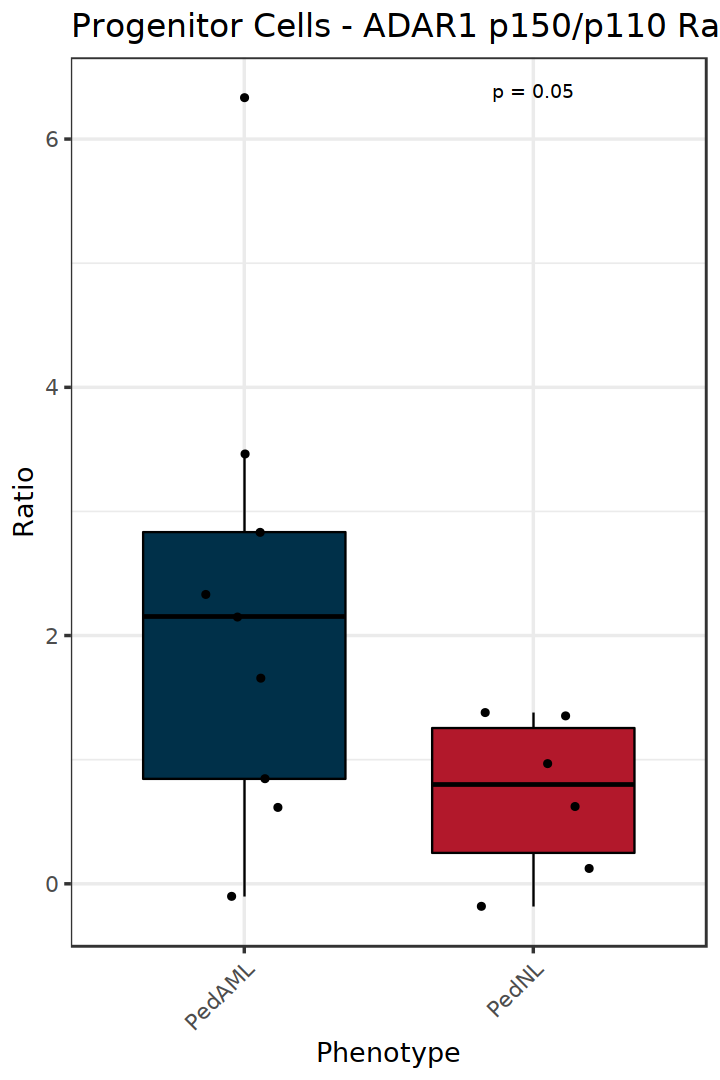

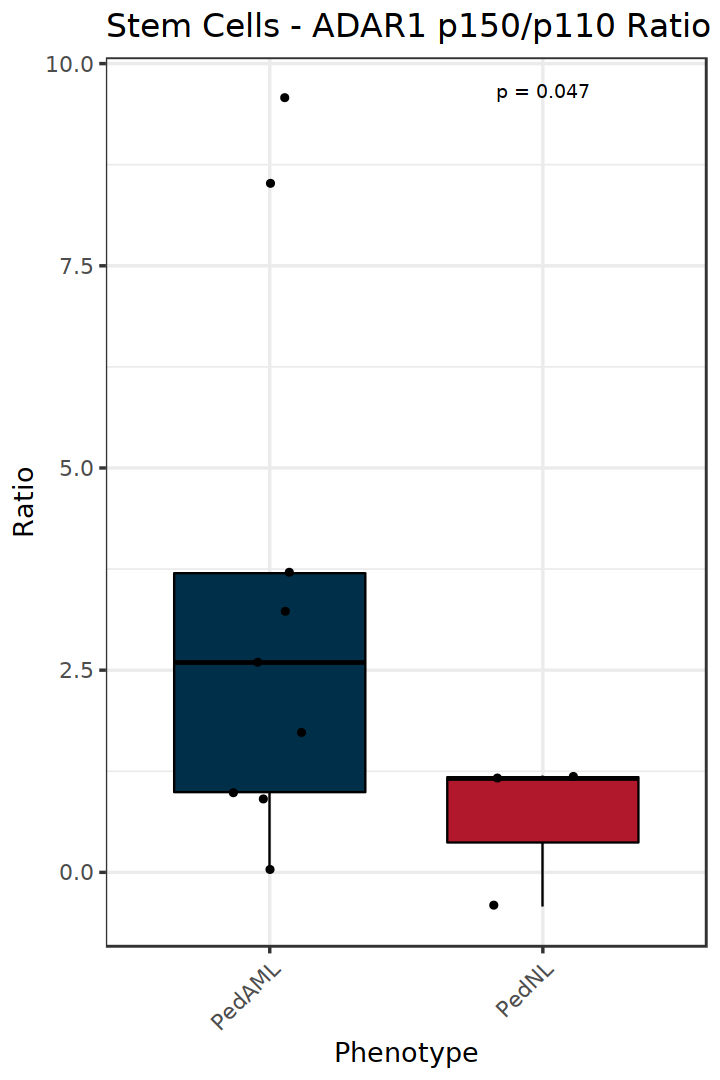

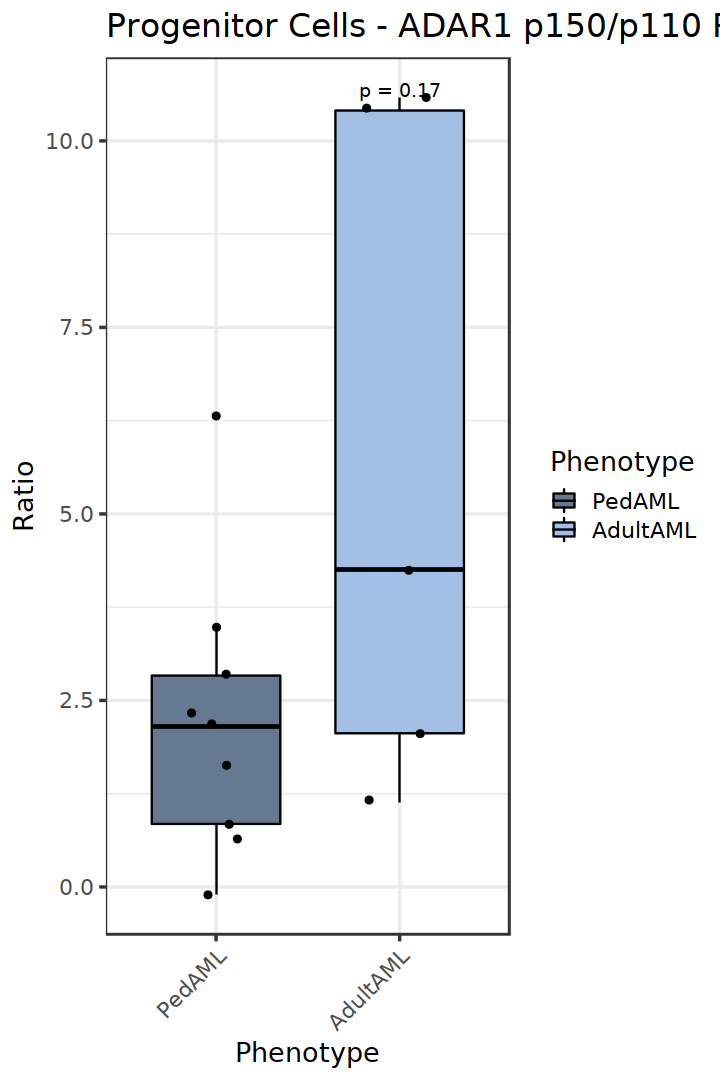

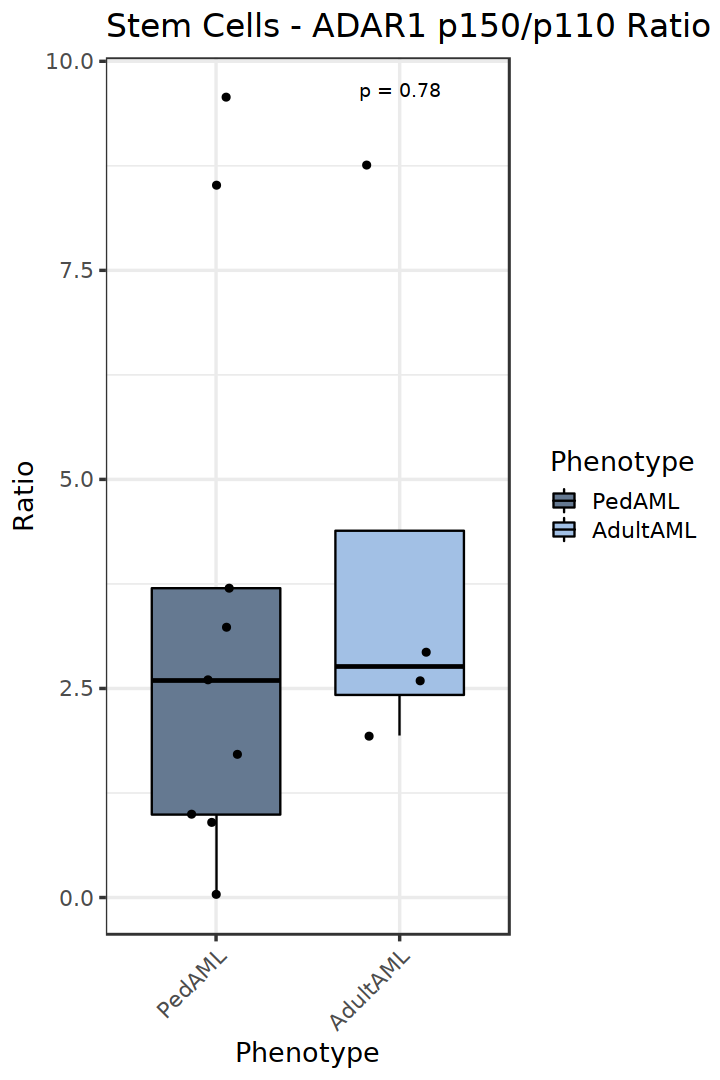

In [38]:
#rownames(ADAR.tx.lcpm.Prog.filt) <- c("ADAR1-p110", "ADAR1-p150")

#ADAR.tx.lcpm.Prog.ratios <- apply(ADAR.tx.lcpm.Prog.filt, 2, function(x) x[2] - x[1])
#names(ADAR.tx.lcpm.Prog.ratios) <- gsub("_S[0-9]+$", "", names(ADAR.tx.lcpm.Prog.ratios))
#ADAR.tx.lcpm.Prog.ratios.df <- data.frame(Sample=names(ADAR.tx.lcpm.Prog.ratios), 
#                                          value=ADAR.tx.lcpm.Prog.ratios,
#                                          Phenotype=factor(as.character(meta2.Prog.filt[match(names(ADAR.tx.lcpm.Prog.ratios), 
#                                                                gsub("_S[0-9]+$","",meta2.Prog.filt$Sample)),"Sample.type3"]), 
#                                                           levels=c("ABM", "YBM","PV","ET", "MF", "CML", "sAML", "dnAML")))

#png(file="DerWerf_PedAML_Prog_ADARisoformRatio_PedAML_PedNL_byPhenotype_06162021.png", width=6, height=9, units="in", res=300)
ggboxplot(subset(ADAR.tx.lcpm.Prog.ratios.df, Phenotype != "AdultAML"), x="Phenotype", y="value", add=c("jitter"), fill="Phenotype",
         palette = c("#003049", "#B2182B")) + 
    theme_bw(base_size=16) + ylab("Ratio") + labs(title="Progenitor Cells - ADAR1 p150/p110 Ratio") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1), legend.position="none") + 
    
    stat_compare_means(method="t.test", label = "p.format", ref.group="PedAML")
#dev.off()

#png(file="DerWerf_PedAML_PedNL__Stem_ADARisoformRatio_PedAML_PedNL_byPhenotype_06162021.png", width=6, height=9, units="in", res=300)
ggboxplot(subset(ADAR.tx.lcpm.Stem.ratios.df, Phenotype != "AdultAML"), x="Phenotype", y="value", add=c("jitter"), fill="Phenotype",
         palette = c("#003049", "#B2182B")) + 
    theme_bw(base_size=16) + ylab("Ratio") + labs(title="Stem Cells - ADAR1 p150/p110 Ratio") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1), legend.position="none") + 
    stat_compare_means(method="t.test", label = "p.format", ref.group="PedAML")
#dev.off()

#png(file="DerWerf_PedAML_Prog_ADARisoformRatio_PedAML_AdultAML_byPhenotype_06162021.png", width=6, height=9, units="in", res=300)
ggboxplot(subset(ADAR.tx.lcpm.Prog.ratios.df, Phenotype != "PedNL"), x="Phenotype", y="value", add=c("jitter"), fill="Phenotype",
         palette = c("#657991", "#A2C0E5")) + 
    theme_bw(base_size=16) + ylab("Ratio") + labs(title="Progenitor Cells - ADAR1 p150/p110 Ratio") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1)) + 
    stat_compare_means(method="t.test", label = "p.format", ref.group="PedAML")
#dev.off()

#png(file="DerWerf_PedAML_PedNL__Stem_ADARisoformRatio_PedAML_AdultAML_byPhenotype_06162021.png", width=6, height=9, units="in", res=300)
ggboxplot(subset(ADAR.tx.lcpm.Stem.ratios.df, Phenotype != "PedNL"), x="Phenotype", y="value", add=c("jitter"), fill="Phenotype",
         palette = c("#657991", "#A2C0E5")) + 
    theme_bw(base_size=16) + ylab("Ratio") + labs(title="Stem Cells - ADAR1 p150/p110 Ratio") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1)) + 
    stat_compare_means(method="t.test", label = "p.format", ref.group="PedAML")
#dev.off()


In [32]:
#pdf(file="DerWerf_PedAML_Prog_ADARisoformRatio_byPhenotype_06162021.pdf", width=7, height=9)
png(file="DerWerf_PedAML_Prog_ADARisoformRatio_byPhenotype_06162021.png", width=7, height=9, units="in", res=300)
ggboxplot(ADAR.tx.lcpm.Prog.ratios.df, x="Phenotype", y="value", add=c("jitter"), fill="Phenotype",
         palette = c("#657991", "#A2C0E5", "#C4C7C9")) + 
    theme_bw(base_size=16) + ylab("Ratio") + labs(title="Progenitor Cells - ADAR1 p150/p110 Ratio") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1))
dev.off()

#pdf(file="DerWerf_PedAML_Stem_ADARisoformRatio_byPhenotype_06162021.pdf", width=7, height=9)
png(file="DerWerf_PedAML_Stem_ADARisoformRatio_byPhenotype_06162021.png", width=7, height=9, units="in", res=300)
ggboxplot(ADAR.tx.lcpm.Stem.ratios.df, x="Phenotype", y="value", add=c("jitter"), fill="Phenotype",
         palette = c("#657991", "#A2C0E5", "#C4C7C9")) + 
    theme_bw(base_size=16) + ylab("Ratio") + labs(title="Stem Cells - ADAR1 p150/p110 Ratio") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1))
dev.off()

png 
  2

png 
  2

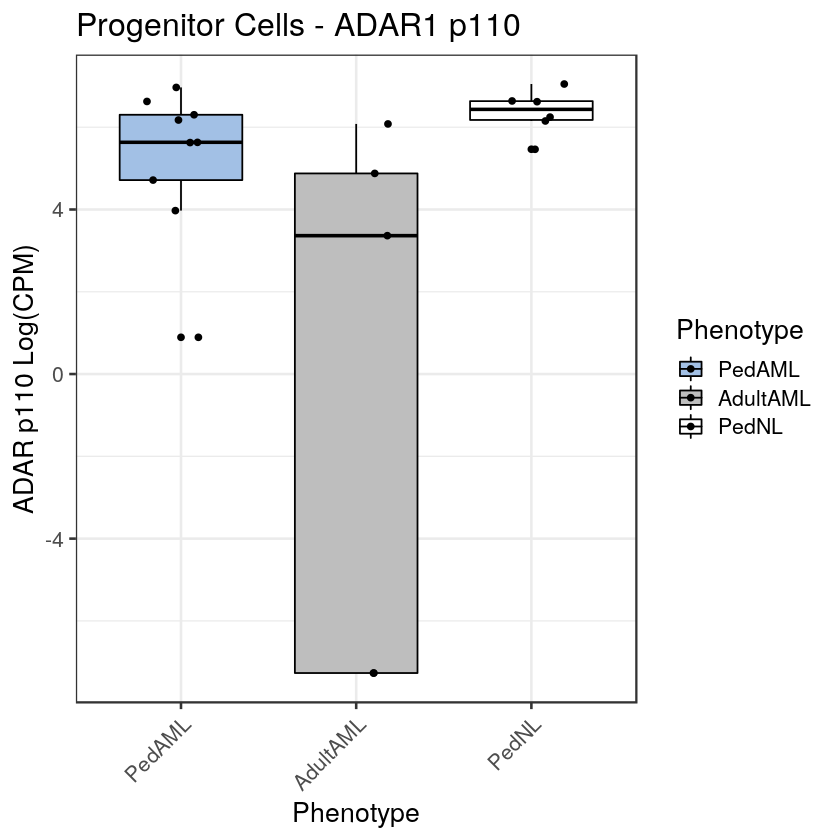

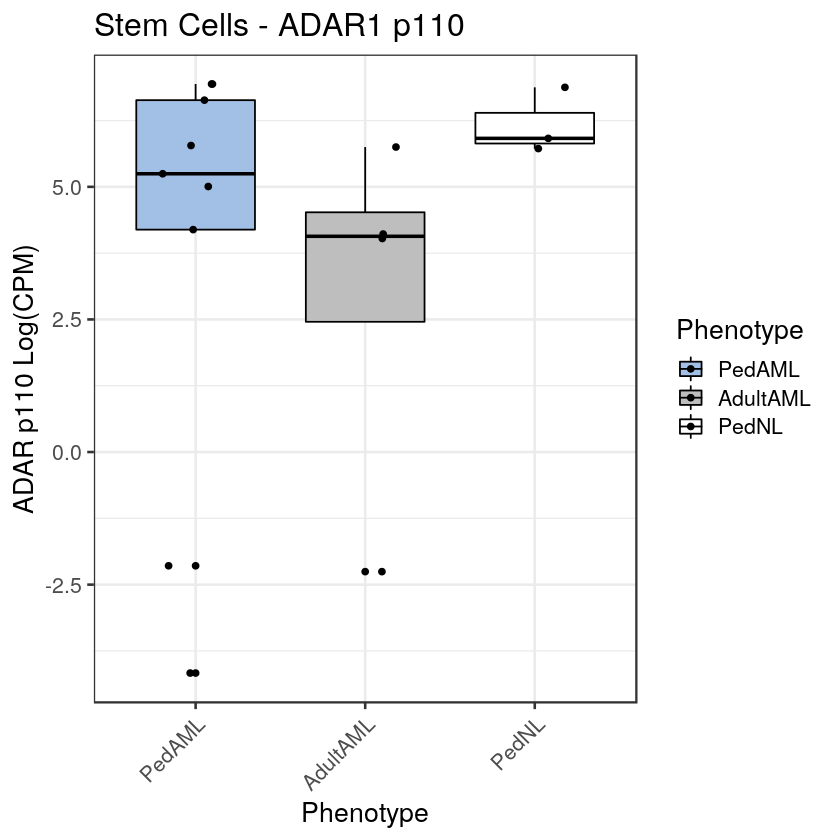

In [285]:
#pdf(file="Holm_Jamieson_Prog_ADARisoformRatio_ABM_YBM_byPhenotype_02252020.pdf", width=7, height=7)
ggboxplot(ADAR.tx.lcpm.Prog.ratios.df, x="Phenotype", y="ADARp110.expr", add=c("jitter"), fill="Phenotype",
         palette = c("#A2C0E5", "gray", "white")) + 
    theme_bw(base_size=16) + ylab("ADAR p110 Log(CPM)") + labs(title="Progenitor Cells - ADAR1 p110") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1))
#dev.off()

#pdf(file="Holm_Jamieson_Stem_ADARisoformRatio_ABM_YBM_byPhenotype_02252020.pdf", width=7, height=7)
ggboxplot(ADAR.tx.lcpm.Stem.ratios.df, x="Phenotype", y="ADARp110.expr", add=c("jitter"), fill="Phenotype",
         palette = c("#A2C0E5", "gray", "white")) + 
    theme_bw(base_size=16) + ylab("ADAR p110 Log(CPM)") + labs(title="Stem Cells - ADAR1 p110") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1))
#dev.off()

In [53]:
dim(ADAR.tx.lcpm.Prog.filt)
table(as.data.frame(t(ADAR.tx.lcpm.Prog.filt))$"ADAR1-p150" < 0)
dim(ADAR.tx.lcpm.Prog.filt[,ADAR.tx.lcpm.Prog.filt[2,] > 0 ])
table(as.data.frame(t(ADAR.tx.lcpm.Stem.filt))$"ADAR1-p150" < 0)
dim(ADAR.tx.lcpm.Stem.filt[,ADAR.tx.lcpm.Stem.filt[2,] > 0 ])

[1]  2 65


FALSE  TRUE 
   47    18 

[1]  2 47


FALSE  TRUE 
   45     2 

[1]  2 45

In [286]:
t.test(ADAR.tx.lcpm.Prog.ratios.df$value[ADAR.tx.lcpm.Prog.ratios.df$Phenotype %in% "PedAML"],
       ADAR.tx.lcpm.Prog.ratios.df$value[ADAR.tx.lcpm.Prog.ratios.df$Phenotype %in% "PedNL"])

t.test(ADAR.tx.lcpm.Prog.ratios.df$value[ADAR.tx.lcpm.Prog.ratios.df$Phenotype %in% "PedAML"],
       ADAR.tx.lcpm.Prog.ratios.df$value[ADAR.tx.lcpm.Prog.ratios.df$Phenotype %in% "AdultAML"])

t.test(ADAR.tx.lcpm.Stem.ratios.df$value[ADAR.tx.lcpm.Stem.ratios.df$Phenotype %in% "PedAML"],
       ADAR.tx.lcpm.Stem.ratios.df$value[ADAR.tx.lcpm.Stem.ratios.df$Phenotype %in% "PedNL"])

t.test(ADAR.tx.lcpm.Stem.ratios.df$value[ADAR.tx.lcpm.Stem.ratios.df$Phenotype %in% "PedAML"],
       ADAR.tx.lcpm.Stem.ratios.df$value[ADAR.tx.lcpm.Stem.ratios.df$Phenotype %in% "AdultAML"])

t.test(ADAR.tx.lcpm.Prog.ratios.df$ADARp150.expr[ADAR.tx.lcpm.Prog.ratios.df$Phenotype %in% "PedAML"],
       ADAR.tx.lcpm.Prog.ratios.df$ADARp150.expr[ADAR.tx.lcpm.Prog.ratios.df$Phenotype %in% "PedNL"])

t.test(ADAR.tx.lcpm.Prog.ratios.df$ADARp150.expr[ADAR.tx.lcpm.Prog.ratios.df$Phenotype %in% "PedAML"],
       ADAR.tx.lcpm.Prog.ratios.df$ADARp150.expr[ADAR.tx.lcpm.Prog.ratios.df$Phenotype %in% "AdultAML"])

t.test(ADAR.tx.lcpm.Stem.ratios.df$ADARp150.expr[ADAR.tx.lcpm.Stem.ratios.df$Phenotype %in% "PedAML"],
       ADAR.tx.lcpm.Stem.ratios.df$ADARp150.expr[ADAR.tx.lcpm.Stem.ratios.df$Phenotype %in% "PedNL"])

t.test(ADAR.tx.lcpm.Stem.ratios.df$ADARp150.expr[ADAR.tx.lcpm.Stem.ratios.df$Phenotype %in% "PedAML"],
       ADAR.tx.lcpm.Stem.ratios.df$ADARp150.expr[ADAR.tx.lcpm.Stem.ratios.df$Phenotype %in% "AdultAML"])

t.test(ADAR.tx.lcpm.Prog.ratios.df$ADARp110.expr[ADAR.tx.lcpm.Prog.ratios.df$Phenotype %in% "PedAML"],
       ADAR.tx.lcpm.Prog.ratios.df$ADARp110.expr[ADAR.tx.lcpm.Prog.ratios.df$Phenotype %in% "PedNL"])

t.test(ADAR.tx.lcpm.Prog.ratios.df$ADARp110.expr[ADAR.tx.lcpm.Prog.ratios.df$Phenotype %in% "PedAML"],
       ADAR.tx.lcpm.Prog.ratios.df$ADARp110.expr[ADAR.tx.lcpm.Prog.ratios.df$Phenotype %in% "AdultAML"])

t.test(ADAR.tx.lcpm.Stem.ratios.df$ADARp110.expr[ADAR.tx.lcpm.Stem.ratios.df$Phenotype %in% "PedAML"],
       ADAR.tx.lcpm.Stem.ratios.df$ADARp110.expr[ADAR.tx.lcpm.Stem.ratios.df$Phenotype %in% "PedNL"])

t.test(ADAR.tx.lcpm.Stem.ratios.df$ADARp110.expr[ADAR.tx.lcpm.Stem.ratios.df$Phenotype %in% "PedAML"],
       ADAR.tx.lcpm.Stem.ratios.df$ADARp110.expr[ADAR.tx.lcpm.Stem.ratios.df$Phenotype %in% "AdultAML"])


	Welch Two Sample t-test

data:  ADAR.tx.lcpm.Prog.ratios.df$value[ADAR.tx.lcpm.Prog.ratios.df$Phenotype %in%  and ADAR.tx.lcpm.Prog.ratios.df$value[ADAR.tx.lcpm.Prog.ratios.df$Phenotype %in%     "PedAML"] and     "PedNL"]
t = 2.2162, df = 10.464, p-value = 0.04988
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.0009416851 3.0576982390
sample estimates:
mean of x mean of y 
2.2405619 0.7112419 



	Welch Two Sample t-test

data:  ADAR.tx.lcpm.Prog.ratios.df$value[ADAR.tx.lcpm.Prog.ratios.df$Phenotype %in%  and ADAR.tx.lcpm.Prog.ratios.df$value[ADAR.tx.lcpm.Prog.ratios.df$Phenotype %in%     "PedAML"] and     "AdultAML"]
t = -1.649, df = 4.4374, p-value = 0.1674
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -12.177459   2.882401
sample estimates:
mean of x mean of y 
 2.240562  6.888091 



	Welch Two Sample t-test

data:  ADAR.tx.lcpm.Stem.ratios.df$value[ADAR.tx.lcpm.Stem.ratios.df$Phenotype %in%  and ADAR.tx.lcpm.Stem.ratios.df$value[ADAR.tx.lcpm.Stem.ratios.df$Phenotype %in%     "PedAML"] and     "PedNL"]
t = 2.2285, df = 9.8901, p-value = 0.05026
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.004075426  5.980881956
sample estimates:
mean of x mean of y 
3.6333338 0.6449305 



	Welch Two Sample t-test

data:  ADAR.tx.lcpm.Stem.ratios.df$value[ADAR.tx.lcpm.Stem.ratios.df$Phenotype %in%  and ADAR.tx.lcpm.Stem.ratios.df$value[ADAR.tx.lcpm.Stem.ratios.df$Phenotype %in%     "PedAML"] and     "AdultAML"]
t = -0.24771, df = 6.4119, p-value = 0.8121
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5.522783  4.493028
sample estimates:
mean of x mean of y 
 3.633334  4.148212 



	Welch Two Sample t-test

data:  ADAR.tx.lcpm.Prog.ratios.df$ADARp150.expr[ADAR.tx.lcpm.Prog.ratios.df$Phenotype %in%  and ADAR.tx.lcpm.Prog.ratios.df$ADARp150.expr[ADAR.tx.lcpm.Prog.ratios.df$Phenotype %in%     "PedAML"] and     "PedNL"]
t = 1.7152, df = 12.627, p-value = 0.1107
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.0999490  0.8589391
sample estimates:
mean of x mean of y 
 7.453179  7.073684 



	Welch Two Sample t-test

data:  ADAR.tx.lcpm.Prog.ratios.df$ADARp150.expr[ADAR.tx.lcpm.Prog.ratios.df$Phenotype %in%  and ADAR.tx.lcpm.Prog.ratios.df$ADARp150.expr[ADAR.tx.lcpm.Prog.ratios.df$Phenotype %in%     "PedAML"] and     "AdultAML"]
t = 1.833, df = 7.6458, p-value = 0.1059
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1631427  1.3793797
sample estimates:
mean of x mean of y 
 7.453179  6.845061 



	Welch Two Sample t-test

data:  ADAR.tx.lcpm.Stem.ratios.df$ADARp150.expr[ADAR.tx.lcpm.Stem.ratios.df$Phenotype %in%  and ADAR.tx.lcpm.Stem.ratios.df$ADARp150.expr[ADAR.tx.lcpm.Stem.ratios.df$Phenotype %in%     "PedAML"] and     "PedNL"]
t = 0.83541, df = 2.3891, p-value = 0.4787
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.200963  3.486380
sample estimates:
mean of x mean of y 
 7.458496  6.815787 



	Welch Two Sample t-test

data:  ADAR.tx.lcpm.Stem.ratios.df$ADARp150.expr[ADAR.tx.lcpm.Stem.ratios.df$Phenotype %in%  and ADAR.tx.lcpm.Stem.ratios.df$ADARp150.expr[ADAR.tx.lcpm.Stem.ratios.df$Phenotype %in%     "PedAML"] and     "AdultAML"]
t = 1.2864, df = 9.0508, p-value = 0.2302
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.304587  1.109358
sample estimates:
mean of x mean of y 
 7.458496  7.056110 



	Welch Two Sample t-test

data:  ADAR.tx.lcpm.Prog.ratios.df$ADARp110.expr[ADAR.tx.lcpm.Prog.ratios.df$Phenotype %in%  and ADAR.tx.lcpm.Prog.ratios.df$ADARp110.expr[ADAR.tx.lcpm.Prog.ratios.df$Phenotype %in%     "PedAML"] and     "PedNL"]
t = -1.7376, df = 9.9044, p-value = 0.1132
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.6261747  0.3265249
sample estimates:
mean of x mean of y 
 5.212617  6.362442 



	Welch Two Sample t-test

data:  ADAR.tx.lcpm.Prog.ratios.df$ADARp110.expr[ADAR.tx.lcpm.Prog.ratios.df$Phenotype %in%  and ADAR.tx.lcpm.Prog.ratios.df$ADARp110.expr[ADAR.tx.lcpm.Prog.ratios.df$Phenotype %in%     "PedAML"] and     "AdultAML"]
t = 1.726, df = 4.3534, p-value = 0.1536
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.934851 13.446146
sample estimates:
  mean of x   mean of y 
 5.21261720 -0.04303028 



	Welch Two Sample t-test

data:  ADAR.tx.lcpm.Stem.ratios.df$ADARp110.expr[ADAR.tx.lcpm.Stem.ratios.df$Phenotype %in%  and ADAR.tx.lcpm.Stem.ratios.df$ADARp110.expr[ADAR.tx.lcpm.Stem.ratios.df$Phenotype %in%     "PedAML"] and     "PedNL"]
t = -1.6623, df = 8.9651, p-value = 0.1309
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5.5397272  0.8483385
sample estimates:
mean of x mean of y 
 3.825162  6.170857 



	Welch Two Sample t-test

data:  ADAR.tx.lcpm.Stem.ratios.df$ADARp110.expr[ADAR.tx.lcpm.Stem.ratios.df$Phenotype %in%  and ADAR.tx.lcpm.Stem.ratios.df$ADARp110.expr[ADAR.tx.lcpm.Stem.ratios.df$Phenotype %in%     "PedAML"] and     "AdultAML"]
t = 0.4109, df = 6.7513, p-value = 0.6939
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.401023  6.235550
sample estimates:
mean of x mean of y 
 3.825162  2.907899 


In [131]:
png(file="DerWerf_Jamieson_Prog_ADARp150_byPhenotype_11182020.png", width=6, height=9, units="in", res=300)
ggboxplot(subset(ADAR.tx.lcpm.Prog.ratios.df, Phenotype != "AdultAML"), x="Phenotype", y="ADARp150.expr", add=c("jitter"), fill="Phenotype",
         palette = c("#657991", "#C4C7C9")) + ylim(0,9) +
    theme_bw(base_size=16) + ylab("ADAR p150 Log(CPM)") + labs(title="Progenitor Cells - ADAR1 p150") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1)) + 
    stat_compare_means(method="t.test", label = "p.format", ref.group="PedAML")
dev.off()

png(file="DerWerf_Jamieson_Stem_ADARp150_byPhenotype_11182020.png", width=6, height=9, units="in", res=300)
ggboxplot(subset(ADAR.tx.lcpm.Stem.ratios.df, Phenotype != "AdultAML"), x="Phenotype", y="ADARp150.expr", add=c("jitter"), fill="Phenotype",
         palette = c("#657991", "#C4C7C9")) + ylim(0,9) +
    theme_bw(base_size=16) + ylab("ADAR p150 Log(CPM)") + labs(title="Stem Cells - ADAR1 p150") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1)) + 
    stat_compare_means(method="t.test", label = "p.format", ref.group="PedAML")
dev.off()

png 
  2

png 
  2

## Cat's Request: ADAR1 vs IFIH1, ADAR1 vs RBFOX2, ADAR1 vs MBNL1, ADAR1 vs MBNL2, ADAR1 vs MBNL3

* IFIH1 - ENSG00000115267
* RBFOX2 - ENSG00000100320
* MBNL1 - ENSG00000152601
* MBNL2 - ENSG00000139793
* MBNL3 - ENSG00000076770
* CELF2 - ENSG00000048740
* PTBP1 - ENSG00000011304

In [147]:
table(rownames(lcpm2.Prog) %in%  c("ENSG00000115267.5","ENSG00000100320.18","ENSG00000152601.13",
                                   "ENSG00000139793.14","ENSG00000076770.10", "ENSG00000048740.13", "ENSG00000011304.12"))
table(rownames(lcpm2.Stem) %in%  c("ENSG00000115267.5","ENSG00000100320.18","ENSG00000152601.13",
                                   "ENSG00000139793.14","ENSG00000076770.10", "ENSG00000048740.13", "ENSG00000011304.12"))
lcpm2.Prog.tmpCor <- cbind(DGE.Prog$samples, 
                         t(lcpm2.Prog[match(c("ENSG00000115267.5","ENSG00000100320.18","ENSG00000152601.13",
                                   "ENSG00000139793.14","ENSG00000076770.10", "ENSG00000048740.13", "ENSG00000011304.12"), rownames(lcpm2.Prog)),]))
lcpm2.Stem.tmpCor <- cbind(DGE.Stem$samples, 
                         t(lcpm2.Stem[match(c("ENSG00000115267.5","ENSG00000100320.18","ENSG00000152601.13",
                                   "ENSG00000139793.14","ENSG00000076770.10", "ENSG00000048740.13", "ENSG00000011304.12"),rownames(lcpm2.Stem)),]))
#lcpm2.Prog.tmpCor2 <- cbind(meta2.Prog.filt, 
#                          t(lcpm2.Prog[match(c("ENSG00000115267.5","ENSG00000100320.18","ENSG00000152601.13",
#                                   "ENSG00000139793.14","ENSG00000076770.10"),rownames(lcpm2.Prog)),]))
#lcpm2.Stem.tmpCor2 <- cbind(meta2.Stem.filt, 
#                          t(lcpm2.Stem[match(c("ENSG00000115267.5","ENSG00000100320.18","ENSG00000152601.13",
#                                   "ENSG00000139793.14","ENSG00000076770.10"),rownames(lcpm2.Stem)),]))

colnames(lcpm2.Prog.tmpCor)[c(19:25)] <- c("IFIH1", "RBFOX2", "MBNL1", "MBNL2", "MBNL3", "CELF2", "PTBP1")
colnames(lcpm2.Stem.tmpCor)[c(19:25)] <- c("IFIH1", "RBFOX2", "MBNL1", "MBNL2", "MBNL3", "CELF2", "PTBP1")
#colnames(lcpm2.Prog.tmpCor2)[c(21:25)] <- c("IFIH1", "RBFOX2", "MBNL1", "MBNL2", "MBNL3")
#colnames(lcpm2.Stem.tmpCor2)[c(19:23)] <- c("IFIH1", "RBFOX2", "MBNL1", "MBNL2", "MBNL3")
head(lcpm2.Prog.tmpCor)
head(lcpm2.Stem.tmpCor)

for(x in 19:23) {
    lcpm2.Prog.tmpCor[,x][which(lcpm2.Prog.tmpCor[,x] < 0)] <- 0
}
for(x in 19:23) {
    lcpm2.Stem.tmpCor[,x][which(lcpm2.Stem.tmpCor[,x] < 0)] <- 0
}


lcpm2.Prog.tmpCor$ADARp110.expr <- ADAR.tx.lcpm.Prog.ratios.df$ADARp110.expr[match(rownames(lcpm2.Prog.tmpCor), 
                                                              ADAR.tx.lcpm.Prog.ratios.df$Sample)]
lcpm2.Prog.tmpCor$ADARp150.expr <- ADAR.tx.lcpm.Prog.ratios.df$ADARp150.expr[match(rownames(lcpm2.Prog.tmpCor), 
                                                              ADAR.tx.lcpm.Prog.ratios.df$Sample)]
lcpm2.Prog.tmpCor$ADARratio <- lcpm2.Prog.tmpCor$ADARp150.expr - lcpm2.Prog.tmpCor$ADARp110.expr

lcpm2.Stem.tmpCor$ADARp110.expr <- ADAR.tx.lcpm.Prog.ratios.df$ADARp110.expr[match(rownames(lcpm2.Stem.tmpCor), 
                                                             ADAR.tx.lcpm.Stem.ratios.df$Sample)]
lcpm2.Stem.tmpCor$ADARp150.expr <- ADAR.tx.lcpm.Prog.ratios.df$ADARp150.expr[match(rownames(lcpm2.Stem.tmpCor),
                                                              ADAR.tx.lcpm.Stem.ratios.df$Sample)]
lcpm2.Stem.tmpCor$ADARratio <- lcpm2.Stem.tmpCor$ADARp150.expr - lcpm2.Stem.tmpCor$ADARp110.expr

lcpm2.Prog.tmpCor$ADARp110.expr <- ifelse(lcpm2.Prog.tmpCor$ADARp110.expr < -6, 0.01, 
                                           lcpm2.Prog.tmpCor$ADARp110.expr)
lcpm2.Prog.tmpCor$ADARratio <- lcpm2.Prog.tmpCor$ADARp150.expr - lcpm2.Prog.tmpCor$ADARp110.expr
lcpm2.Prog.tmpCor$Cell.type <- gsub("^Progenitor$", "Progenitors", gsub("Sorted progenitors", "Progenitor", 
                                                                    as.character(lcpm2.Prog.tmpCor$Cell.type)))
lcpm2.Stem.tmpCor$ADARp110.expr <- ifelse(lcpm2.Stem.tmpCor$ADARp110.expr < -6, 0.01, 
                                           lcpm2.Stem.tmpCor$ADARp110.expr)
lcpm2.Stem.tmpCor$ADARratio <- lcpm2.Stem.tmpCor$ADARp150.expr - lcpm2.Stem.tmpCor$ADARp110.expr
lcpm2.Stem.tmpCor$Cell.type <- gsub("^Stem$", "Stem Cells", gsub("Sorted stem", "Stem", 
                                                                    as.character(lcpm2.Stem.tmpCor$Cell.type)))

dim(lcpm2.Prog.tmpCor)
dim(lcpm2.Stem.tmpCor)
lcpm2.tmpCor.All <- rbind(lcpm2.Stem.tmpCor, lcpm2.Prog.tmpCor)
lcpm2.tmpCor.All$Cell.type <- factor(lcpm2.tmpCor.All$Cell.type)
str(lcpm2.tmpCor.All)
#head(lcpm.APOBEC3C.All)


FALSE  TRUE 
57813     7 


FALSE  TRUE 
57813     7 

group    lib.size norm.factors
X02id38cellPROGENITORS PedAML   34657547 0.9788200   
X06id90cellPROGENITORS PedAML   34856832 0.8530318   
X04id78cellPROGENITORS PedAML   42824638 0.9087627   
X06id00066PRO          PedAML   31744580 1.1888360   
X03id11474HPC          AdultAML 25338927 1.0692039   
X01id11251HPC          AdultAML 24503278 0.8559037   
                       SequenceRun                                               
X02id38cellPROGENITORS ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91
X06id90cellPROGENITORS ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91
X04id78cellPROGENITORS ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91
X06id00066PRO          ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91
X03id11474HPC          ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91
X01id11251HPC          ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91
                       SequenceDate Sample                SampleName    
X02id38cellPROGENITORS 5/5/19       02id38cellPROGENITORS 38 Progenitors
X06id90cellPROGENITORS 5/5/19       06id90cellPROGENITORS 90 Progenitors
X04id78cellPROGENITORS 5/5/19       04id78cellPROGENITORS 78 Progenitors
X06id00066PRO          6/26/19      06id00066PRO          66 Progenitors
X03id11474HPC          6/26/19      03id11474HPC          11474 HPC     
X01id11251HPC          6/26/19      01id11251HPC          11251 HPC     
                       Patient.ID RIN  X        ⋯ RNA.seq.status Reads   
X02id38cellPROGENITORS 32538       9.7 PedAML   ⋯ Completed      73196851
X06id90cellPROGENITORS 22390      10.0 PedAML   ⋯ Completed      81721991
X04id78cellPROGENITORS 28678      10.0 PedAML   ⋯ Completed      88894032
X06id00066PRO          22666       9.8 PedAML   ⋯ Completed      77343883
X03id11474HPC          11474       9.6 AdultAML ⋯ Completed      79871449
X01id11251HPC          11251       9.3 AdultAML ⋯ Completed      80917720
                       Phenotype IFIH1    RBFOX2    MBNL1    MBNL2    MBNL3   
X02id38cellPROGENITORS PedAML    5.357304 -4.384468 8.517423 5.176264 5.371755
X06id90cellPROGENITORS PedAML    4.503470 -4.384468 8.404117 4.856538 4.868214
X04id78cellPROGENITORS PedAML    5.705533 -2.730627 9.215250 5.116253 5.458164
X06id00066PRO          PedAML    4.754677 -4.384468 8.320768 5.516738 5.855962
X03id11474HPC          AdultAML  5.067200 -0.416615 8.199982 5.175782 5.089267
X01id11251HPC          AdultAML  3.390963 -4.384468 8.154245 4.056677 5.071064
                       CELF2    PTBP1   
X02id38cellPROGENITORS 8.447244 9.560523
X06id90cellPROGENITORS 8.317608 9.664823
X04id78cellPROGENITORS 7.761514 9.439014
X06id00066PRO          8.465137 8.605423
X03id11474HPC          8.316878 8.891040
X01id11251HPC          9.017907 9.984888

group    lib.size norm.factors
X01id38cellHSC PedAML   42406592 0.9711141   
Xcell05id90HSC PedAML   34070699 0.9684815   
X03id78cellHSC PedAML   29889738 0.8401557   
X05id00066HSC  PedAML   16772570 1.2590586   
X04id11474HSC  AdultAML 26494229 1.0971761   
X02id11251HSC  AdultAML 23521044 0.9294673   
               SequenceRun                                               
X01id38cellHSC ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91
Xcell05id90HSC ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91
X03id78cellHSC ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91
X05id00066HSC  ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91
X04id11474HSC  ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91
X02id11251HSC  ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91
               SequenceDate Sample        SampleName Patient.ID RIN  X        ⋯
X01id38cellHSC 5/5/19       01id38cellHSC 38 HSC     32538      10.0 PedAML   ⋯
Xcell05id90HSC 5/5/19       cell05id90HSC 90 HSC     22390      10.0 PedAML   ⋯
X03id78cellHSC 5/5/19       03id78cellHSC 78 HSC     28678      10.0 PedAML   ⋯
X05id00066HSC  6/26/19      05id00066HSC  66 HSC     22666       7.7 PedAML   ⋯
X04id11474HSC  6/26/19      04id11474HSC  11474 HSC  11474      10.0 AdultAML ⋯
X02id11251HSC  6/26/19      02id11251HSC  11251 HSC  11251       9.3 AdultAML ⋯
               RNA.seq.status Reads    Phenotype IFIH1    RBFOX2     MBNL1   
X01id38cellHSC Completed      81234305 PedAML    5.201804 -1.9494125 8.457143
Xcell05id90HSC Completed      72625632 PedAML    5.405030  0.8416497 8.533440
X03id78cellHSC Completed      68483294 PedAML    4.608550 -3.9509752 8.395334
X05id00066HSC  Completed      77519907 PedAML    5.175853  0.7841201 8.361646
X04id11474HSC  Completed      79123032 AdultAML  5.419230 -0.2836947 8.607729
X02id11251HSC  Completed      81776486 AdultAML  3.998436 -0.4135359 8.651674
               MBNL2    MBNL3    CELF2    PTBP1   
X01id38cellHSC 5.128587 5.730586 8.482703 9.771486
Xcell05id90HSC 4.259829 5.747015 8.165674 9.399344
X03id78cellHSC 4.099977 5.270974 8.011387 9.723484
X05id00066HSC  5.501041 5.057753 8.427236 8.590678
X04id11474HSC  5.718744 5.186921 8.401997 8.895559
X02id11251HSC  4.105819 4.858924 9.008360 9.646393

[1] 20 28

[1] 16 28

'data.frame':	36 obs. of  28 variables:
 $ group           : Factor w/ 3 levels "PedAML","AdultAML",..: 1 1 1 1 2 2 1 1 2 2 ...
 $ lib.size        : num  42406592 34070699 29889738 16772570 26494229 ...
 $ norm.factors    : num  0.971 0.968 0.84 1.259 1.097 ...
 $ SequenceRun     : chr  "ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91" "ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91" "ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91" "ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91" ...
 $ SequenceDate    : chr  "5/5/19" "5/5/19" "5/5/19" "6/26/19" ...
 $ Sample          : chr  "01id38cellHSC" "cell05id90HSC" "03id78cellHSC" "05id00066HSC" ...
 $ SampleName      : chr  "38 HSC" "90 HSC" "78 HSC" "66 HSC" ...
 $ Patient.ID      : int  32538 22390 28678 22666 11474 11251 11379 11868 11220 12682 ...
 $ RIN             : num  10 10 10 7.7 10 9.3 9.6 6.8 7.3 9.9 ...
 $ X               : chr  "PedAML" "PedAML" "PedAML" "PedAML" ...
 $ Adult.Pediatr

In [60]:
pdf(file="Jamieson_Prog_PedAML_IFIH1_ggbox_02222021.pdf", width=7, height=7)
ggboxplot(lcpm2.Prog.tmpCor, #[STAT3.lcpm.Prog.filt.pheno.melt$Gene %in% c("ENST00000381298"),], 
          x="Phenotype", y="IFIH1", ylim=c(0,7), palette=c("#657991","#A2C0E5", "#C4C7C9"), #add="jitter", 
          fill="Phenotype", xlab="") + 
    stat_compare_means(method="t.test", label = "p.signif", ref.group="PedAML", label.y=6.5) + #, aes(label=format.pval(digits=1))) + 
    theme_bw(base_size=16) + ylab("Log2(cpm)") + labs(title="Progenitor Cells - IFIH1 expression") +
    theme(legend.title=element_text(size=0)) + xlab("")
dev.off()

pdf(file="Jamieson_Stem_PedAML_IFIH1_ggbox_02222021.pdf", width=7, height=7)
ggboxplot(lcpm2.Stem.tmpCor, #[STAT3.lcpm.Prog.filt.pheno.melt$Gene %in% c("ENST00000381298"),], 
          x="Phenotype", y="IFIH1", ylim=c(0,8), palette=c("#657991","#A2C0E5", "#C4C7C9"), #add="jitter", 
           fill="Phenotype", xlab="") + 
    stat_compare_means(method="t.test", label = "p.signif", ref.group="PedAML", label.y=7.5) + #, aes(label=format.pval(digits=1))) + 
    theme_bw(base_size=16) + ylab("Log2(cpm)") + labs(title="Stem Cells - IFIH1 expression") +
    theme(legend.title=element_text(size=0)) + xlab("")
dev.off()

png 
  2

png 
  2

Warning message in if (shape %in% colnames(data)) {:
“the condition has length > 1 and only the first element will be used”
Warning message:
“Ignoring unknown aesthetics: shape”
Warning message in if (shape %in% colnames(data)) {:
“the condition has length > 1 and only the first element will be used”
Warning message:
“Ignoring unknown aesthetics: shape”


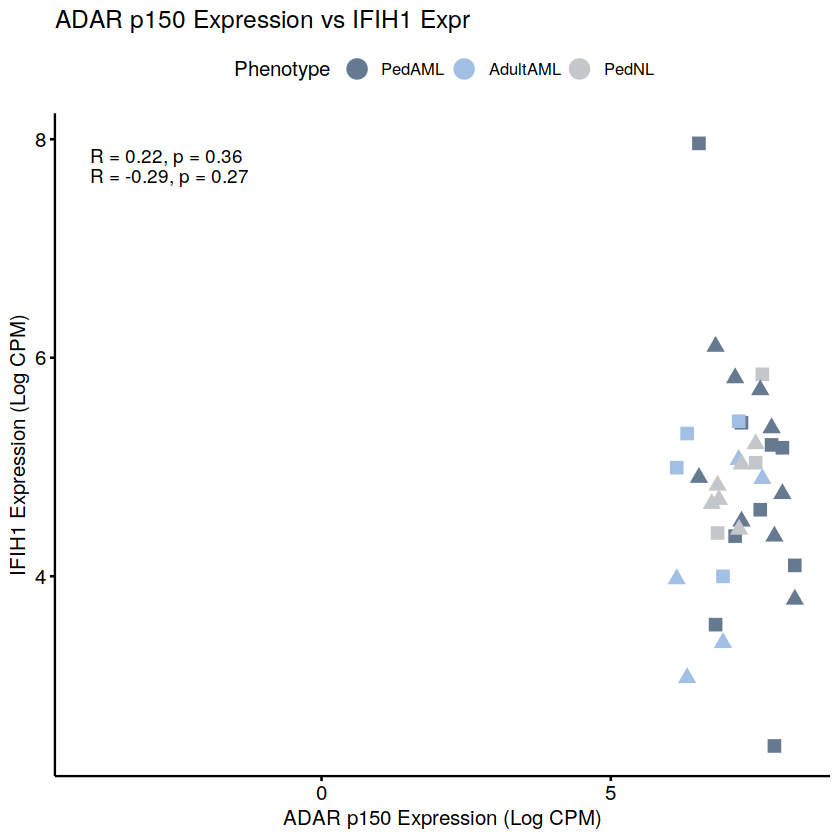

Warning message in if (shape %in% colnames(data)) {:
“the condition has length > 1 and only the first element will be used”
Warning message:
“Ignoring unknown aesthetics: shape”


png 
  2

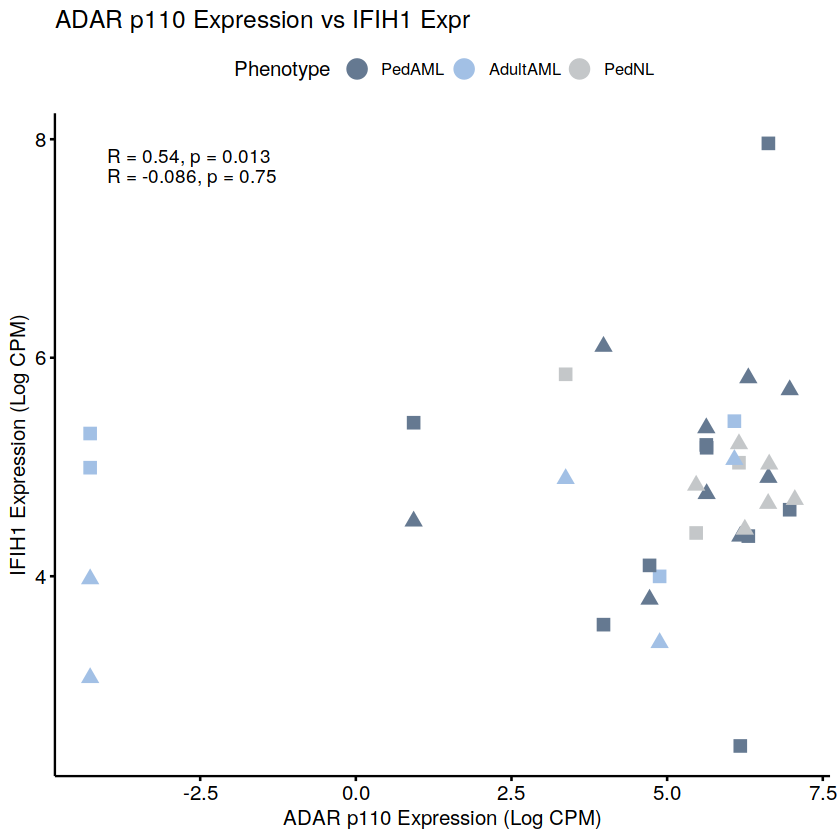

In [80]:
#png("PedAML_Sample_IFIH1expr_vs_ADARp150_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
#pdf("PedAML_Sample_IFIH1expr_vs_ADARp150_ggScatter_03112020.pdf", width = 7, height = 7)
ggscatter(lcpm2.tmpCor.All, x="ADARp150.expr", y="IFIH1", color="Phenotype", palette=c("#657991","#A2C0E5", "#C4C7C9"),
          size=c(3.5,3.5)[lcpm2.tmpCor.All$Cell.type],
          shape = c(17,15)[lcpm2.tmpCor.All$Cell.type],
          title = "ADAR p150 Expression vs IFIH1 Expr") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("IFIH1 Expression (Log CPM)") + xlab("ADAR p150 Expression (Log CPM)") + 
          stat_cor(aes(shape=Cell.type), output.type = "text", label.x = -4, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))
#dev.off()

#png("PedAML_Sample_IFIH1expr_vs_ADARp110_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
#pdf("PedAML_Sample_IFIH1expr_vs_ADARp110_ggScatter_02232021.pdf", width = 7, height = 7)
ggscatter(lcpm2.tmpCor.All, x="ADARp110.expr", y="IFIH1", color="Phenotype", palette=c("#657991","#A2C0E5", "#C4C7C9"),
          size=c(3.5,3.5)[lcpm2.tmpCor.All$Cell.type],
          shape = c(17,15)[lcpm2.tmpCor.All$Cell.type],
          title = "ADAR p110 Expression vs IFIH1 Expr") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("IFIH1 Expression (Log CPM)") + xlab("ADAR p110 Expression (Log CPM)") + 
          stat_cor(aes(shape=Cell.type), output.type = "text", label.x = -4, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))
#dev.off()

#png("PedAML_Sample_IFIH1expr_vs_ADARratio_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
pdf("PedAML_Sample_IFIH1expr_vs_ADARratio_ggScatter_03022021.pdf", width = 7, height = 7)
ggscatter(lcpm2.tmpCor.All, x="ADARratio", y="IFIH1", color="Phenotype", palette=c("#657991","#A2C0E5", "#C4C7C9"),
          size=c(3.5,3.5)[lcpm2.tmpCor.All$Cell.type],
          shape = c(17,15)[lcpm2.tmpCor.All$Cell.type],
          title = "ADAR Ratio Expression vs IFIH1 Expr") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("IFIH1 Expression (Log CPM)") + xlab("ADAR Ratio") + 
          stat_cor(aes(shape=Cell.type), output.type = "text", label.x = -4, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))
dev.off()

In [44]:
dim(lcpm2.tmpCor.All)
head(lcpm2.tmpCor.All)

[1] 36 28

group    lib.size norm.factors
X01id38cellHSC PedAML   42406592 0.9711141   
Xcell05id90HSC PedAML   34070699 0.9684815   
X03id78cellHSC PedAML   29889738 0.8401557   
X05id00066HSC  PedAML   16772570 1.2590586   
X04id11474HSC  AdultAML 26494229 1.0971761   
X02id11251HSC  AdultAML 23521044 0.9294673   
               SequenceRun                                               
X01id38cellHSC ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91
Xcell05id90HSC ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91
X03id78cellHSC ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91
X05id00066HSC  ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91
X04id11474HSC  ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91
X02id11251HSC  ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91
               SequenceDate Sample        SampleName Patient.ID RIN  X        ⋯
X01id38cellHSC 5/5/19       01id38cellHSC 38 HSC     32538      10.0 PedAML   ⋯
Xcell05id90HSC 5/5/19       cell05id90HSC 90 HSC     22390      10.0 PedAML   ⋯
X03id78cellHSC 5/5/19       03id78cellHSC 78 HSC     28678      10.0 PedAML   ⋯
X05id00066HSC  6/26/19      05id00066HSC  66 HSC     22666       7.7 PedAML   ⋯
X04id11474HSC  6/26/19      04id11474HSC  11474 HSC  11474      10.0 AdultAML ⋯
X02id11251HSC  6/26/19      02id11251HSC  11251 HSC  11251       9.3 AdultAML ⋯
               IFIH1    RBFOX2    MBNL1    MBNL2    MBNL3    CELF2    PTBP1   
X01id38cellHSC 5.201804 0.0000000 8.457143 5.128587 5.730586 8.482703 9.771486
Xcell05id90HSC 5.405030 0.8416497 8.533440 4.259829 5.747015 8.165674 9.399344
X03id78cellHSC 4.608550 0.0000000 8.395334 4.099977 5.270974 8.011387 9.723484
X05id00066HSC  5.175853 0.7841201 8.361646 5.501041 5.057753 8.427236 8.590678
X04id11474HSC  5.419230 0.0000000 8.607729 5.718744 5.186921 8.401997 8.895559
X02id11251HSC  3.998436 0.0000000 8.651674 4.105819 4.858924 9.008360 9.646393
               ADARp110.expr ADARp150.expr ADARratio
X01id38cellHSC 5.6290729     7.779699      2.1506265
Xcell05id90HSC 0.9283319     7.259562      6.3312299
X03id78cellHSC 6.9681447     7.583469      0.6153247
X05id00066HSC  5.6344767     7.966045      2.3315684
X04id11474HSC  6.0799977     7.210424      1.1304266
X02id11251HSC  4.8792134     6.939398      2.0601851

Warning message in if (shape %in% colnames(data)) {:
“the condition has length > 1 and only the first element will be used”
Warning message:
“Ignoring unknown aesthetics: shape”


png 
  2

Warning message in if (shape %in% colnames(data)) {:
“the condition has length > 1 and only the first element will be used”
Warning message:
“Ignoring unknown aesthetics: shape”


png 
  2

Warning message in if (shape %in% colnames(data)) {:
“the condition has length > 1 and only the first element will be used”
Warning message:
“Ignoring unknown aesthetics: shape”


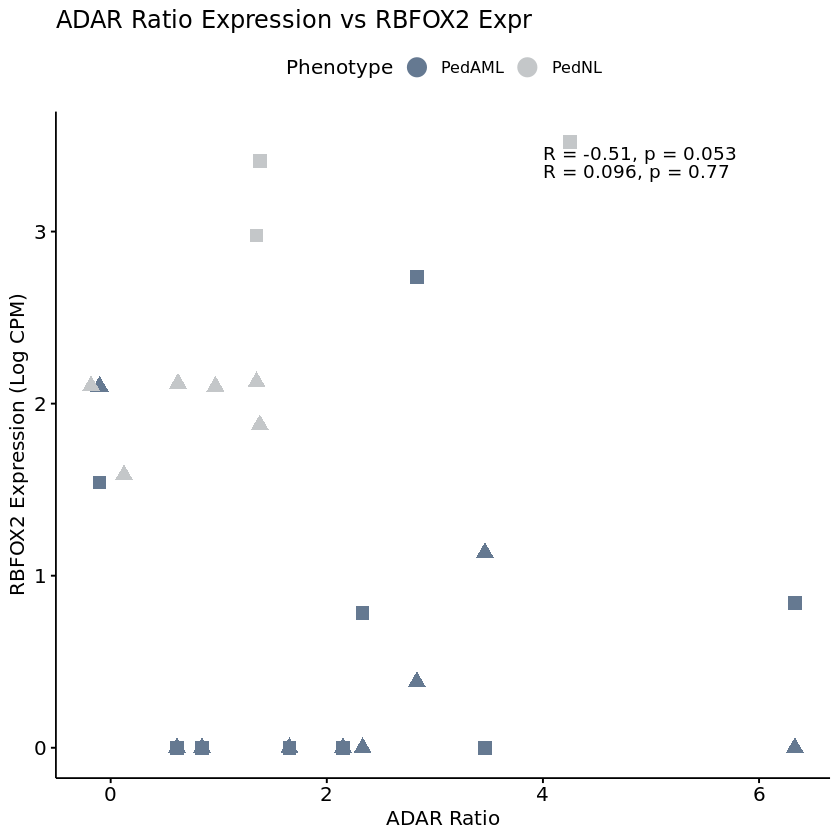

In [49]:
#png("PedAML_Sample_RBFOX2expr_vs_ADARp150_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
pdf("PedAML_Sample_RBFOX2expr_vs_ADARp150_noAdultAML_ggScatter_09032020.pdf", width = 7, height = 7)
lcpm2.tmpCor.All_noAA <- subset(lcpm2.tmpCor.All, Phenotype != "AdultAML") 
ggscatter(lcpm2.tmpCor.All_noAA, x="ADARp150.expr", y="RBFOX2", color="Phenotype", palette=c("#657991","#C4C7C9"),
          size=c(3.5,3.5)[lcpm2.tmpCor.All_noAA$Cell.type],
          shape = c(17,15)[lcpm2.tmpCor.All_noAA$Cell.type],
          title = "ADAR p150 Expression vs RBFOX2 Expr") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("RBFOX2 Expression (Log CPM)") + xlab("ADAR p150 Expression (Log CPM)") + 
          stat_cor(aes(shape=Cell.type), output.type = "text", label.x = 1, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))
dev.off()

#png("PedAML_Sample_RBFOX2expr_vs_ADARp110_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
pdf("PedAML_Sample_RBFOX2expr_vs_ADARp110_noAdultAML_ggScatter_09032021.pdf", width = 7, height = 7)
ggscatter(lcpm2.tmpCor.All_noAA, x="ADARp110.expr", y="RBFOX2", color="Phenotype", palette=c("#657991","#C4C7C9"),
          size=c(3.5,3.5)[lcpm2.tmpCor.All_noAA$Cell.type],
          shape = c(17,15)[lcpm2.tmpCor.All_noAA$Cell.type],
          title = "ADAR p110 Expression vs RBFOX2 Expr") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("RBFOX2 Expression (Log CPM)") + xlab("ADAR p110 Expression (Log CPM)") + 
          stat_cor(aes(shape=Cell.type), output.type = "text", label.x = 1, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))
dev.off()

#png("PedAML_Sample_RBFOX2expr_vs_ADARratio_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
#pdf("PedAML_Sample_RBFOX2expr_vs_ADARratio_noAdultAML_ggScatter_09032021.pdf", width = 7, height = 7)
ggscatter(lcpm2.tmpCor.All_noAA, x="ADARratio", y="RBFOX2", color="Phenotype", palette=c("#657991", "#C4C7C9"),
          size=c(3.5,3.5)[lcpm2.tmpCor.All_noAA$Cell.type],
          shape = c(17,15)[lcpm2.tmpCor.All_noAA$Cell.type],
          title = "ADAR Ratio Expression vs RBFOX2 Expr") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("RBFOX2 Expression (Log CPM)") + xlab("ADAR Ratio") + 
          stat_cor(aes(shape=Cell.type), output.type = "text", label.x = 4, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))
#dev.off()

In [45]:
levels(lcpm2.tmpCor.All$Cell.type)

[1] "Prog"       "Stem Cells"

Warning message in if (shape %in% colnames(data)) {:
“the condition has length > 1 and only the first element will be used”
Warning message:
“Ignoring unknown aesthetics: shape”
Warning message in if (shape %in% colnames(data)) {:
“the condition has length > 1 and only the first element will be used”
Warning message:
“Ignoring unknown aesthetics: shape”


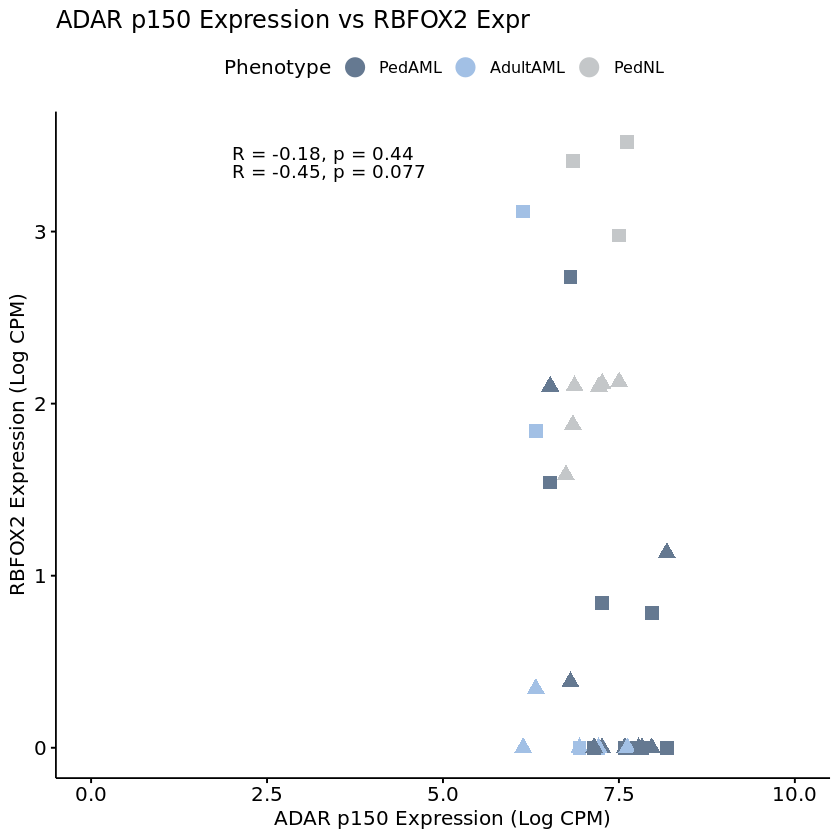

Warning message in if (shape %in% colnames(data)) {:
“the condition has length > 1 and only the first element will be used”
Warning message:
“Ignoring unknown aesthetics: shape”


png 
  2

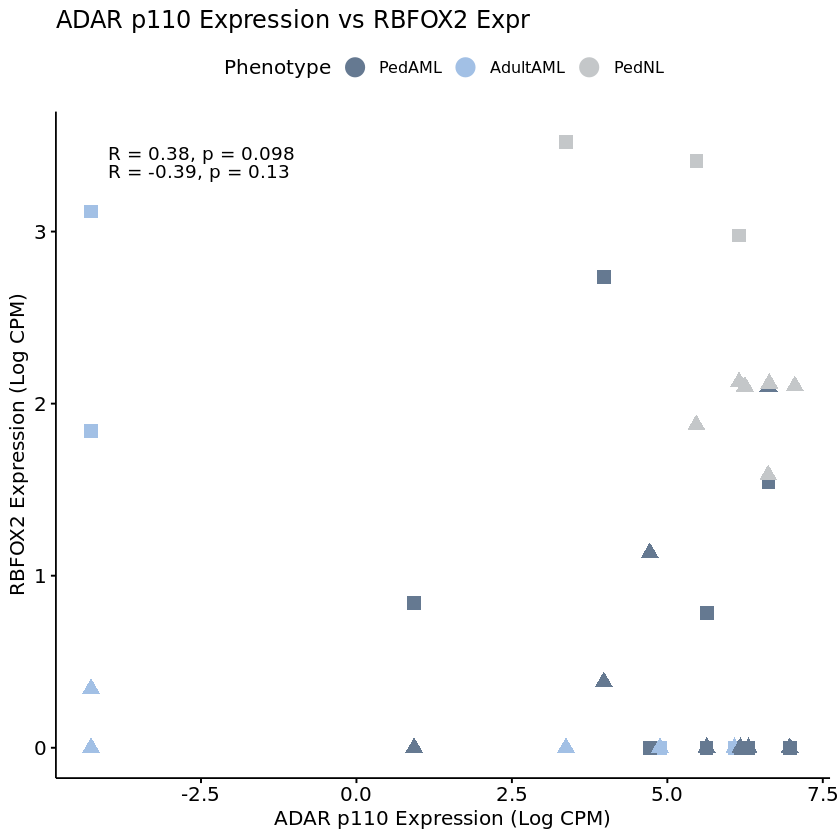

In [48]:
#png("PedAML_Sample_RBFOX2expr_vs_ADARp150_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
#pdf("PedAML_Sample_RBFOX2expr_vs_ADARp150_ggScatter_03112020.pdf", width = 7, height = 7)
ggscatter(lcpm2.tmpCor.All, x="ADARp150.expr", y="RBFOX2", color="Phenotype", palette=c("#657991","#A2C0E5", "#C4C7C9"),
          size=c(3.5,3.5)[lcpm2.tmpCor.All$Cell.type],
          shape = c(17,15)[lcpm2.tmpCor.All$Cell.type], xlim=c(0,10),
          title = "ADAR p150 Expression vs RBFOX2 Expr") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("RBFOX2 Expression (Log CPM)") + xlab("ADAR p150 Expression (Log CPM)") + 
          stat_cor(aes(shape=Cell.type), output.type = "text", label.x = 2, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))
#dev.off()

#png("PedAML_Sample_RBFOX2expr_vs_ADARp110_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
#pdf("PedAML_Sample_RBFOX2expr_vs_ADARp110_ggScatter_02232021.pdf", width = 7, height = 7)
ggscatter(lcpm2.tmpCor.All, x="ADARp110.expr", y="RBFOX2", color="Phenotype", palette=c("#657991","#A2C0E5", "#C4C7C9"),
          size=c(3.5,3.5)[lcpm2.tmpCor.All$Cell.type],
          shape = c(17,15)[lcpm2.tmpCor.All$Cell.type],
          title = "ADAR p110 Expression vs RBFOX2 Expr") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("RBFOX2 Expression (Log CPM)") + xlab("ADAR p110 Expression (Log CPM)") + 
          stat_cor(aes(shape=Cell.type), output.type = "text", label.x = -4, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))
#dev.off()

#png("PedAML_Sample_RBFOX2expr_vs_ADARratio_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
pdf("PedAML_Sample_RBFOX2expr_vs_ADARratio_ggScatter_03022021.pdf", width = 7, height = 7)
ggscatter(lcpm2.tmpCor.All, x="ADARratio", y="RBFOX2", color="Phenotype", palette=c("#657991","#A2C0E5", "#C4C7C9"),
          size=c(3.5,3.5)[lcpm2.tmpCor.All$Cell.type],
          shape = c(17,15)[lcpm2.tmpCor.All$Cell.type],
          title = "ADAR Ratio Expression vs RBFOX2 Expr") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("RBFOX2 Expression (Log CPM)") + xlab("ADAR Ratio") + 
          stat_cor(aes(shape=Cell.type), output.type = "text", label.x = -4, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))
dev.off()

Warning message in if (shape %in% colnames(data)) {:
“the condition has length > 1 and only the first element will be used”
Warning message:
“Ignoring unknown aesthetics: shape”


png 
  2

Warning message in if (shape %in% colnames(data)) {:
“the condition has length > 1 and only the first element will be used”
Warning message:
“Ignoring unknown aesthetics: shape”


png 
  2

Warning message in if (shape %in% colnames(data)) {:
“the condition has length > 1 and only the first element will be used”
Warning message:
“Ignoring unknown aesthetics: shape”


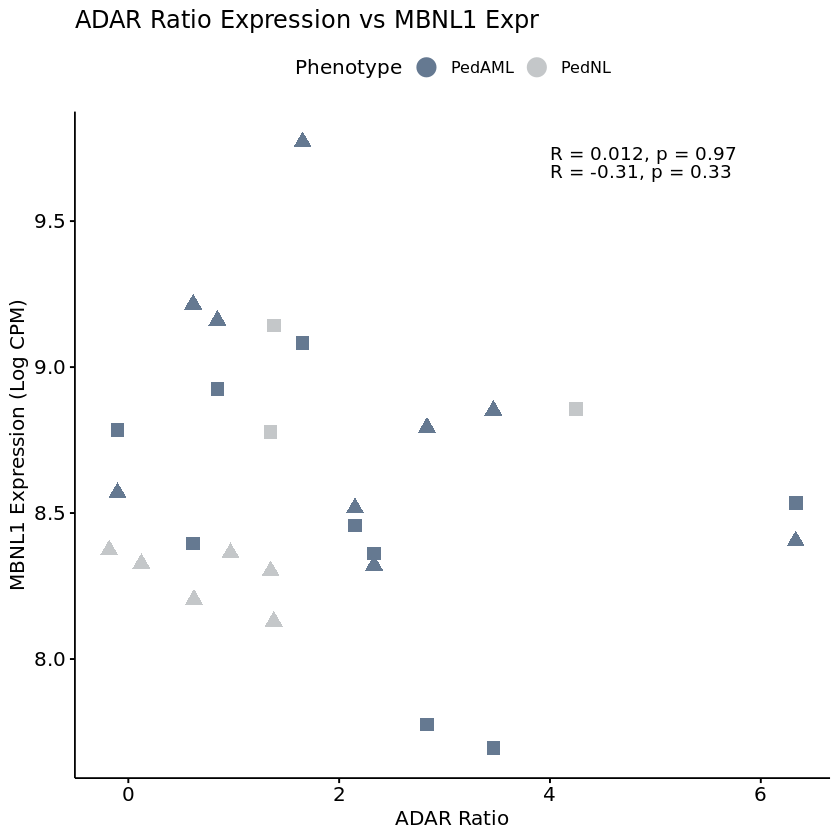

In [51]:
#png("PedAML_Sample_MBNL1expr_vs_ADARp150_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
pdf("PedAML_Sample_MBNL1expr_vs_ADARp150_noAdultAML_ggScatter_09032020.pdf", width = 7, height = 7)
lcpm2.tmpCor.All_noAA <- subset(lcpm2.tmpCor.All, Phenotype != "AdultAML") 
ggscatter(lcpm2.tmpCor.All_noAA, x="ADARp150.expr", y="MBNL1", color="Phenotype", palette=c("#657991","#C4C7C9"),
          size=c(3.5,3.5)[lcpm2.tmpCor.All_noAA$Cell.type],
          shape = c(17,15)[lcpm2.tmpCor.All_noAA$Cell.type],
          title = "ADAR p150 Expression vs MBNL1 Expr") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("MBNL1 Expression (Log CPM)") + xlab("ADAR p150 Expression (Log CPM)") + 
          stat_cor(aes(shape=Cell.type), output.type = "text", label.x = 1, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))
dev.off()

#png("PedAML_Sample_MBNL1expr_vs_ADARp110_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
pdf("PedAML_Sample_MBNL1expr_vs_ADARp110_noAdultAML_ggScatter_09032021.pdf", width = 7, height = 7)
ggscatter(lcpm2.tmpCor.All_noAA, x="ADARp110.expr", y="MBNL1", color="Phenotype", palette=c("#657991","#C4C7C9"),
          size=c(3.5,3.5)[lcpm2.tmpCor.All_noAA$Cell.type],
          shape = c(17,15)[lcpm2.tmpCor.All_noAA$Cell.type],
          title = "ADAR p110 Expression vs MBNL1 Expr") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("MBNL1 Expression (Log CPM)") + xlab("ADAR p110 Expression (Log CPM)") + 
          stat_cor(aes(shape=Cell.type), output.type = "text", label.x = 1, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))
dev.off()

#png("PedAML_Sample_MBNL1expr_vs_ADARratio_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
#pdf("PedAML_Sample_MBNL1expr_vs_ADARratio_noAdultAML_ggScatter_09032021.pdf", width = 7, height = 7)
ggscatter(lcpm2.tmpCor.All_noAA, x="ADARratio", y="MBNL1", color="Phenotype", palette=c("#657991", "#C4C7C9"),
          size=c(3.5,3.5)[lcpm2.tmpCor.All_noAA$Cell.type],
          shape = c(17,15)[lcpm2.tmpCor.All_noAA$Cell.type],
          title = "ADAR Ratio Expression vs MBNL1 Expr") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("MBNL1 Expression (Log CPM)") + xlab("ADAR Ratio") + 
          stat_cor(aes(shape=Cell.type), output.type = "text", label.x = 4, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))
#dev.off()

Warning message in if (shape %in% colnames(data)) {:
“the condition has length > 1 and only the first element will be used”
Warning message:
“Ignoring unknown aesthetics: shape”
Warning message in if (shape %in% colnames(data)) {:
“the condition has length > 1 and only the first element will be used”
Warning message:
“Ignoring unknown aesthetics: shape”


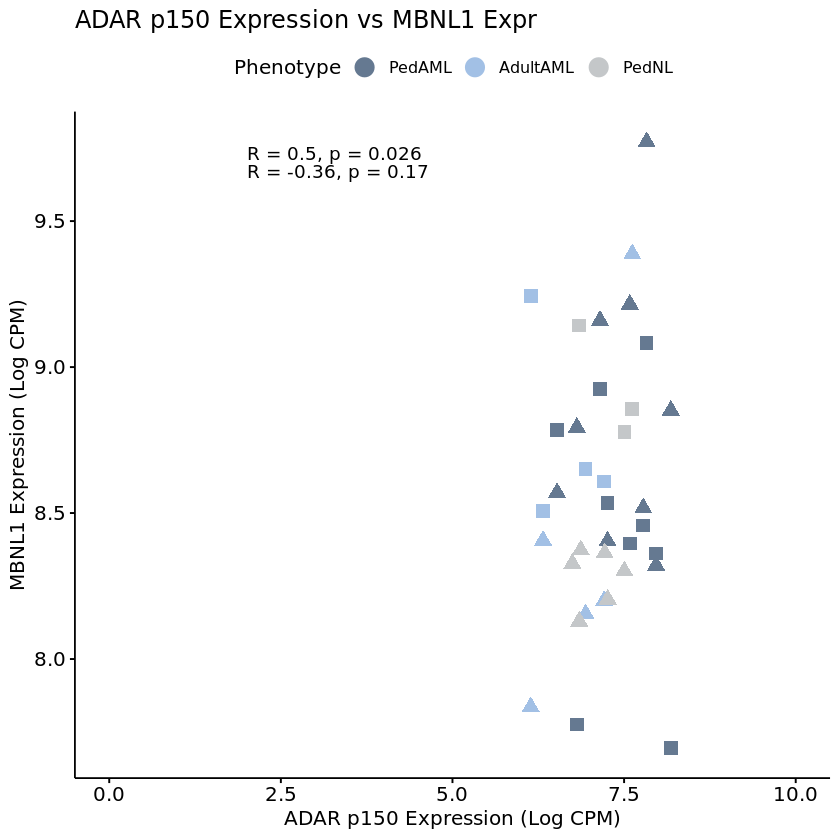

Warning message in if (shape %in% colnames(data)) {:
“the condition has length > 1 and only the first element will be used”
Warning message:
“Ignoring unknown aesthetics: shape”


png 
  2

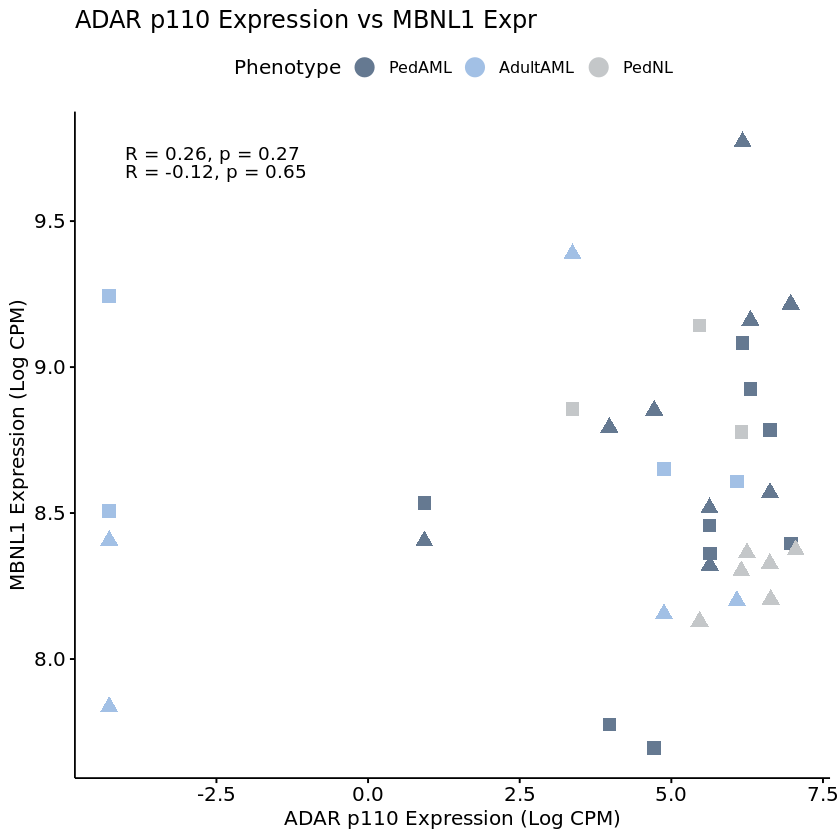

In [47]:
#png("PedAML_Sample_MBNL1expr_vs_ADARp150_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
#pdf("PedAML_Sample_MBNL1expr_vs_ADARp150_ggScatter_03112020.pdf", width = 7, height = 7)
ggscatter(lcpm2.tmpCor.All, x="ADARp150.expr", y="MBNL1", color="Phenotype", palette=c("#657991","#A2C0E5", "#C4C7C9"),
          size=c(3.5,3.5)[lcpm2.tmpCor.All$Cell.type],
          shape = c(17,15)[lcpm2.tmpCor.All$Cell.type], xlim=c(0,10),
          title = "ADAR p150 Expression vs MBNL1 Expr") + 
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("MBNL1 Expression (Log CPM)") + xlab("ADAR p150 Expression (Log CPM)") + 
          stat_cor(aes(shape=Cell.type), output.type = "text", label.x = 2, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))
#dev.off()

#png("PedAML_Sample_MBNL1expr_vs_ADARp110_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
#pdf("PedAML_Sample_MBNL1expr_vs_ADARp110_ggScatter_02232021.pdf", width = 7, height = 7)
ggscatter(lcpm2.tmpCor.All, x="ADARp110.expr", y="MBNL1", color="Phenotype", palette=c("#657991","#A2C0E5", "#C4C7C9"),
          size=c(3.5,3.5)[lcpm2.tmpCor.All$Cell.type],
          shape = c(17,15)[lcpm2.tmpCor.All$Cell.type],
          title = "ADAR p110 Expression vs MBNL1 Expr") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("MBNL1 Expression (Log CPM)") + xlab("ADAR p110 Expression (Log CPM)") + 
          stat_cor(aes(shape=Cell.type), output.type = "text", label.x = -4, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))
#dev.off()

#png("PedAML_Sample_MBNL1expr_vs_ADARratio_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
pdf("PedAML_Sample_MBNL1expr_vs_ADARratio_ggScatter_03022021.pdf", width = 7, height = 7)
ggscatter(lcpm2.tmpCor.All, x="ADARratio", y="MBNL1", color="Phenotype", palette=c("#657991","#A2C0E5", "#C4C7C9"),
          size=c(3.5,3.5)[lcpm2.tmpCor.All$Cell.type],
          shape = c(17,15)[lcpm2.tmpCor.All$Cell.type],
          title = "ADAR Ratio Expression vs MBNL1 Expr") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("MBNL1 Expression (Log CPM)") + xlab("ADAR Ratio") + 
          stat_cor(aes(shape=Cell.type), output.type = "text", label.x = -4, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))
dev.off()

Warning message in if (shape %in% colnames(data)) {:
“the condition has length > 1 and only the first element will be used”
Warning message:
“Ignoring unknown aesthetics: shape”
Warning message in if (shape %in% colnames(data)) {:
“the condition has length > 1 and only the first element will be used”
Warning message:
“Ignoring unknown aesthetics: shape”


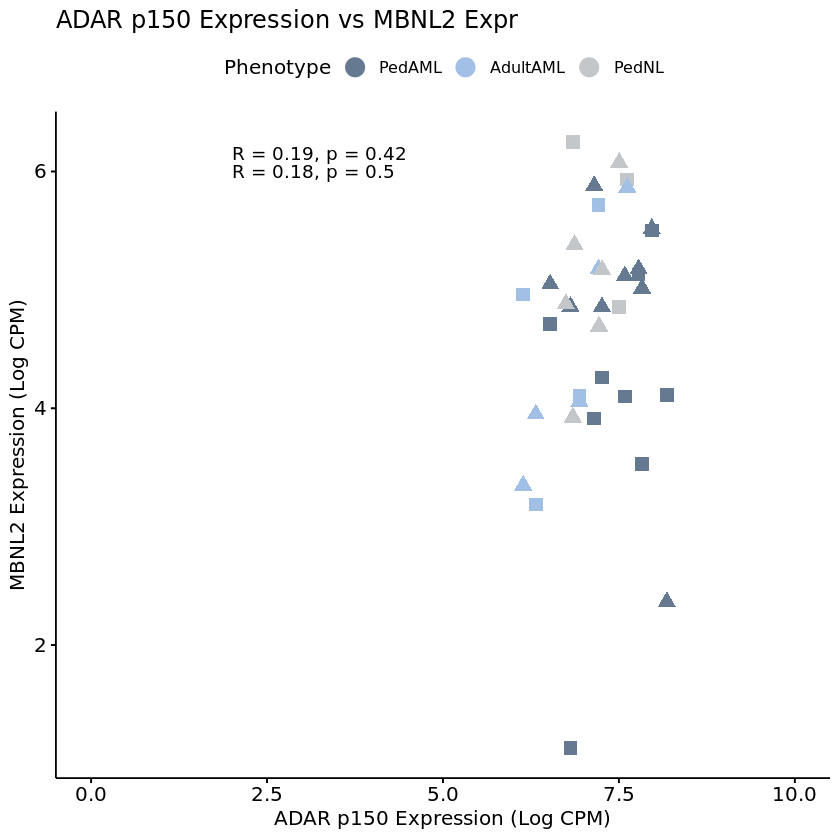

Warning message in if (shape %in% colnames(data)) {:
“the condition has length > 1 and only the first element will be used”
Warning message:
“Ignoring unknown aesthetics: shape”


png 
  2

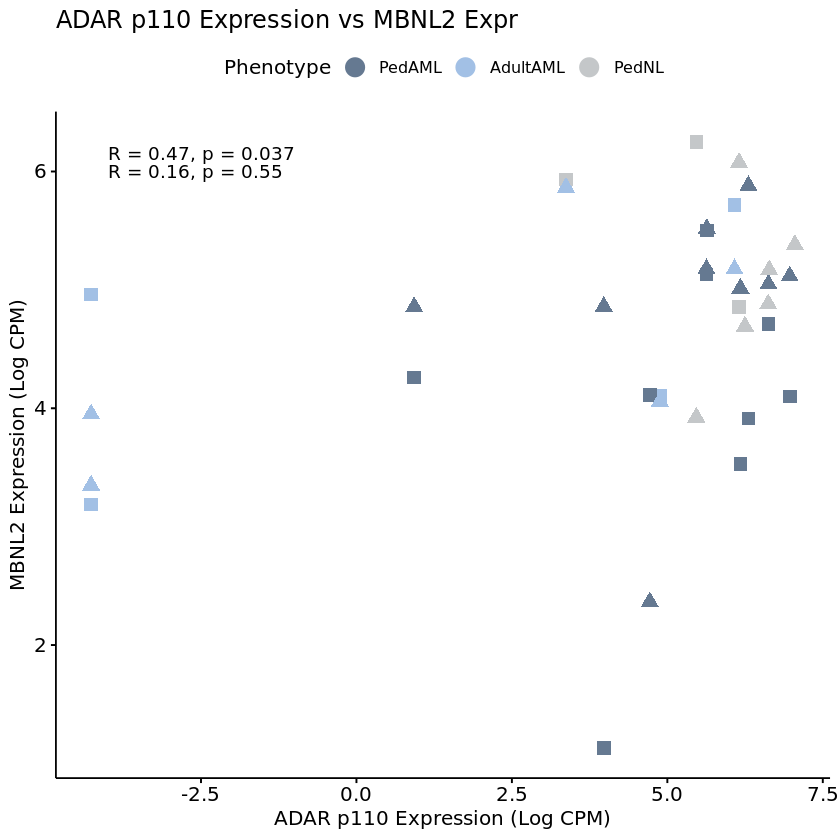

In [49]:
#png("PedAML_Sample_MBNL2expr_vs_ADARp150_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
#pdf("PedAML_Sample_MBNL2expr_vs_ADARp150_ggScatter_03112020.pdf", width = 7, height = 7)
ggscatter(lcpm2.tmpCor.All, x="ADARp150.expr", y="MBNL2", color="Phenotype", palette=c("#657991","#A2C0E5", "#C4C7C9"),
          size=c(3.5,3.5)[lcpm2.tmpCor.All$Cell.type],
          shape = c(17,15)[lcpm2.tmpCor.All$Cell.type], xlim=c(0,10),
          title = "ADAR p150 Expression vs MBNL2 Expr") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("MBNL2 Expression (Log CPM)") + xlab("ADAR p150 Expression (Log CPM)") + 
          stat_cor(aes(shape=Cell.type), output.type = "text", label.x = 2, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))
#dev.off()

#png("PedAML_Sample_MBNL2expr_vs_ADARp110_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
#pdf("PedAML_Sample_MBNL2expr_vs_ADARp110_ggScatter_02232021.pdf", width = 7, height = 7)
ggscatter(lcpm2.tmpCor.All, x="ADARp110.expr", y="MBNL2", color="Phenotype", palette=c("#657991","#A2C0E5", "#C4C7C9"),
          size=c(3.5,3.5)[lcpm2.tmpCor.All$Cell.type],
          shape = c(17,15)[lcpm2.tmpCor.All$Cell.type],
          title = "ADAR p110 Expression vs MBNL2 Expr") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("MBNL2 Expression (Log CPM)") + xlab("ADAR p110 Expression (Log CPM)") + 
          stat_cor(aes(shape=Cell.type), output.type = "text", label.x = -4, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))
#dev.off()

#png("PedAML_Sample_MBNL2expr_vs_ADARratio_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
pdf("PedAML_Sample_MBNL2expr_vs_ADARratio_ggScatter_03022021.pdf", width = 7, height = 7)
ggscatter(lcpm2.tmpCor.All, x="ADARratio", y="MBNL2", color="Phenotype", palette=c("#657991","#A2C0E5", "#C4C7C9"),
          size=c(3.5,3.5)[lcpm2.tmpCor.All$Cell.type],
          shape = c(17,15)[lcpm2.tmpCor.All$Cell.type],
          title = "ADAR Ratio Expression vs MBNL2 Expr") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("MBNL2 Expression (Log CPM)") + xlab("ADAR Ratio") + 
          stat_cor(aes(shape=Cell.type), output.type = "text", label.x = -4, na.rm=TRUE) + 
          ylim(0,9) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))
dev.off()

[1] 27 28

group    lib.size norm.factors
X01id38cellHSC PedAML   42406592 0.9711141   
Xcell05id90HSC PedAML   34070699 0.9684815   
X03id78cellHSC PedAML   29889738 0.8401557   
X05id00066HSC  PedAML   16772570 1.2590586   
X04id11474HSC  AdultAML 26494229 1.0971761   
X02id11251HSC  AdultAML 23521044 0.9294673   
               SequenceRun                                               
X01id38cellHSC ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91
Xcell05id90HSC ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91
X03id78cellHSC ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91
X05id00066HSC  ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91
X04id11474HSC  ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91
X02id11251HSC  ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91
               SequenceDate Sample        SampleName Patient.ID RIN  X        ⋯
X01id38cellHSC 5/5/19       01id38cellHSC 38 HSC     32538      10.0 PedAML   ⋯
Xcell05id90HSC 5/5/19       cell05id90HSC 90 HSC     22390      10.0 PedAML   ⋯
X03id78cellHSC 5/5/19       03id78cellHSC 78 HSC     28678      10.0 PedAML   ⋯
X05id00066HSC  6/26/19      05id00066HSC  66 HSC     22666       7.7 PedAML   ⋯
X04id11474HSC  6/26/19      04id11474HSC  11474 HSC  11474      10.0 AdultAML ⋯
X02id11251HSC  6/26/19      02id11251HSC  11251 HSC  11251       9.3 AdultAML ⋯
               IFIH1    RBFOX2    MBNL1    MBNL2    MBNL3    CELF2    PTBP1   
X01id38cellHSC 5.201804 0.0000000 8.457143 5.128587 5.730586 8.482703 9.771486
Xcell05id90HSC 5.405030 0.8416497 8.533440 4.259829 5.747015 8.165674 9.399344
X03id78cellHSC 4.608550 0.0000000 8.395334 4.099977 5.270974 8.011387 9.723484
X05id00066HSC  5.175853 0.7841201 8.361646 5.501041 5.057753 8.427236 8.590678
X04id11474HSC  5.419230 0.0000000 8.607729 5.718744 5.186921 8.401997 8.895559
X02id11251HSC  3.998436 0.0000000 8.651674 4.105819 4.858924 9.008360 9.646393
               ADARp110.expr ADARp150.expr ADARratio
X01id38cellHSC 5.6290729     7.779699      2.1506265
Xcell05id90HSC 0.9283319     7.259562      6.3312299
X03id78cellHSC 6.9681447     7.583469      0.6153247
X05id00066HSC  5.6344767     7.966045      2.3315684
X04id11474HSC  6.0799977     7.210424      1.1304266
X02id11251HSC  4.8792134     6.939398      2.0601851

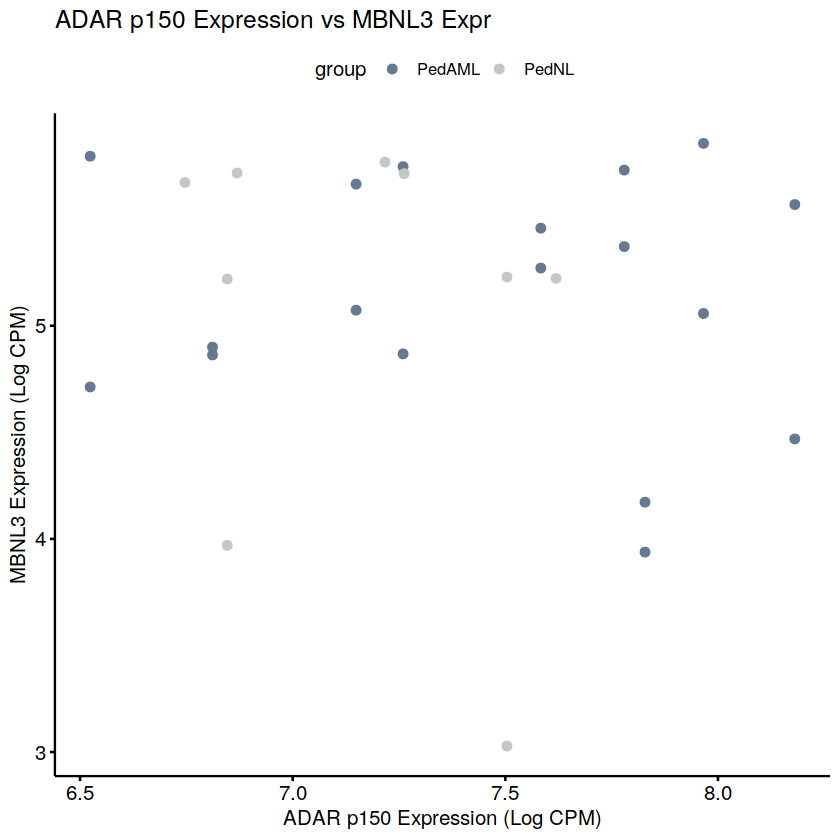

In [36]:
dim(subset(lcpm2.tmpCor.All, group != "AdultAML"))
head(lcpm2.tmpCor.All)


Warning message in if (shape %in% colnames(data)) {:
“the condition has length > 1 and only the first element will be used”
Warning message:
“Ignoring unknown aesthetics: shape”
Warning message in if (shape %in% colnames(data)) {:
“the condition has length > 1 and only the first element will be used”
Warning message:
“Ignoring unknown aesthetics: shape”


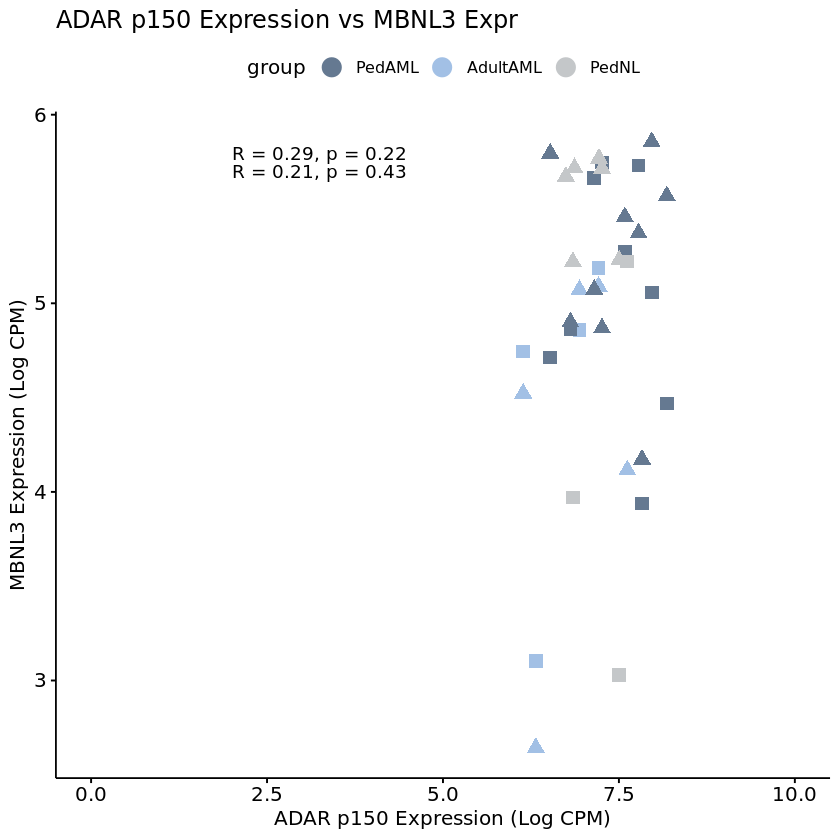

Warning message in if (shape %in% colnames(data)) {:
“the condition has length > 1 and only the first element will be used”
Warning message:
“Ignoring unknown aesthetics: shape”


png 
  2

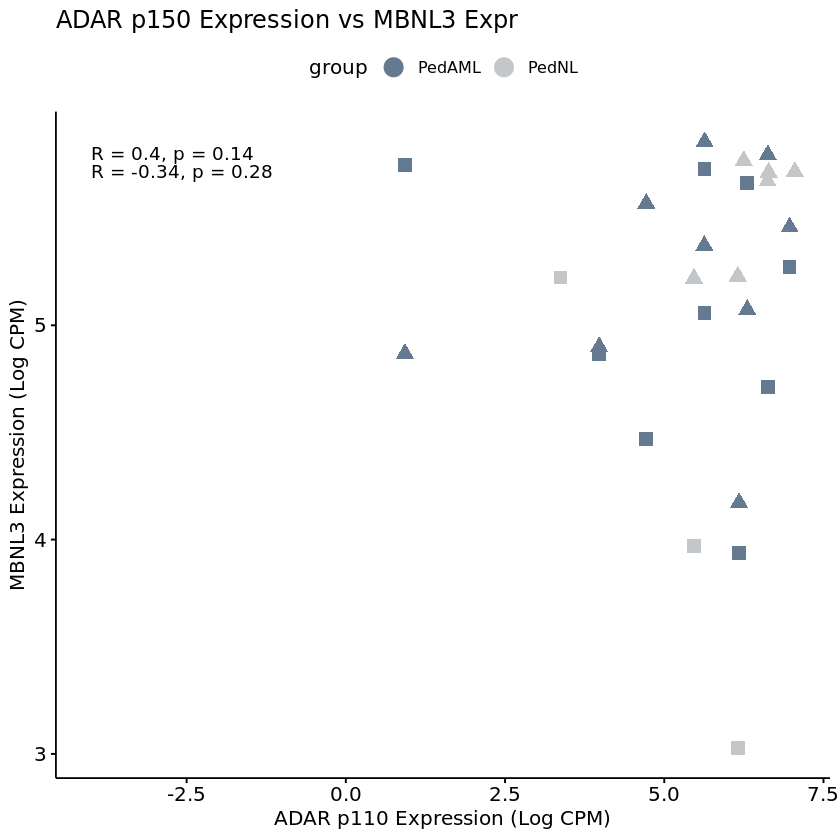

In [55]:
#png("PedAML_Sample_MBNL3expr_vs_ADARp150_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
#pdf("PedAML_Sample_MBNL3expr_vs_ADARp150_ggScatter_03112020.pdf", width = 7, height = 7)
ggscatter(lcpm2.tmpCor.All, x="ADARp150.expr", y="MBNL3", color="group", palette=c("#657991","#A2C0E5", "#C4C7C9"),
          size=c(3.5,3.5)[lcpm2.tmpCor.All$Cell.type],
          shape = c(17,15)[lcpm2.tmpCor.All$Cell.type], xlim=c(0,10),
          title = "ADAR p150 Expression vs MBNL3 Expr") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("MBNL3 Expression (Log CPM)") + xlab("ADAR p150 Expression (Log CPM)") + 
          stat_cor(aes(shape=Cell.type), output.type = "text", label.x = 2, na.rm=TRUE) + 
          #xlim(0,9) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))
#dev.off()

#png("PedAML_Sample_MBNL3expr_vs_ADARp110_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
#pdf("PedAML_Sample_MBNL3expr_vs_ADARp110_ggScatter_02232021.pdf", width = 7, height = 7)
ggscatter(subset(lcpm2.tmpCor.All, group != "AdultAML"), x="ADARp110.expr", y="MBNL3", color="group", palette=c("#657991",#"#A2C0E5", 
                                                                                                                        "#C4C7C9"),
          size=c(3.5,3.5)[subset(lcpm2.tmpCor.All, group != "AdultAML")$Cell.type],
          shape = c(17,15)[subset(lcpm2.tmpCor.All, group != "AdultAML")$Cell.type],
          title = "ADAR p150 Expression vs MBNL3 Expr") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("MBNL3 Expression (Log CPM)") + xlab("ADAR p110 Expression (Log CPM)") + 
          stat_cor(aes(shape=Cell.type), output.type = "text", label.x = -4, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))
#dev.off()

#png("PedAML_Sample_MBNL3expr_vs_ADARratio_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
pdf("PedAML_PedNL_Sample_MBNL3expr_vs_ADARratio_ggScatter_06282021.pdf", width = 7, height = 7)
ggscatter(subset(lcpm2.tmpCor.All, group != "AdultAML"), x="ADARratio", y="MBNL3", color="group", palette=c("#657991",#"#A2C0E5", 
                                                                                                                    "#C4C7C9"),
          size=c(3.5,3.5)[subset(lcpm2.tmpCor.All, group != "AdultAML")$Cell.type],
          shape = c(17,15)[subset(lcpm2.tmpCor.All, group != "AdultAML")$Cell.type],
          title = "ADAR Ratio Expression vs MBNL3 Expr") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("MBNL3 Expression (Log CPM)") + xlab("ADAR Ratio") + 
          stat_cor(aes(shape=Cell.type), output.type = "text", label.x = -4, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))
dev.off()

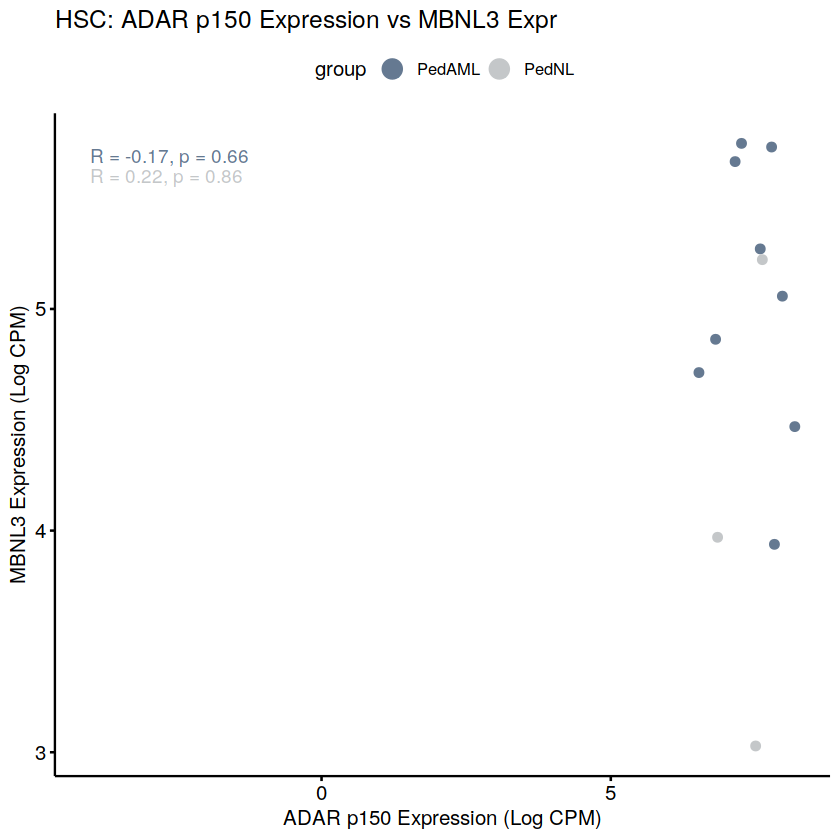

png 
  2

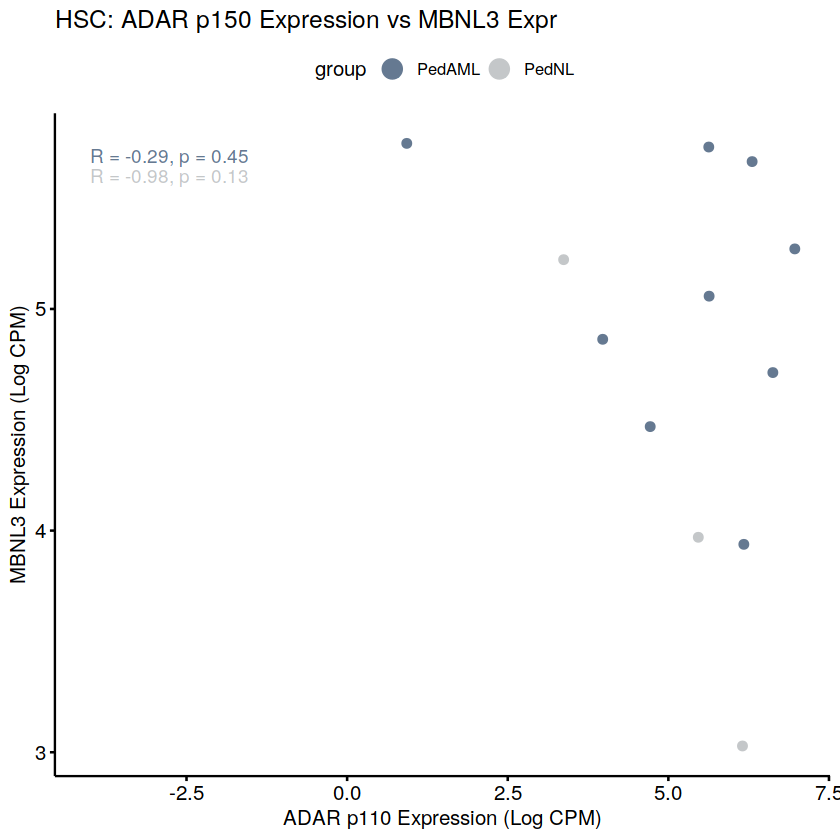

In [47]:
lcpm2.tmpCor.Stem <- subset(lcpm2.tmpCor.All, Cell.type!="Prog")
#png("PedAML_Sample_MBNL3expr_vs_ADARp150_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
#pdf("PedAML_Sample_MBNL3expr_vs_ADARp150_ggScatter_03112020.pdf", width = 7, height = 7)
ggscatter(subset(lcpm2.tmpCor.Stem, group != "AdultAML"), x="ADARp150.expr", y="MBNL3", color="group", palette=c("#657991",#"#A2C0E5", 
                                                                                                                        "#C4C7C9"),
          title = "HSC: ADAR p150 Expression vs MBNL3 Expr") +
          ylab("MBNL3 Expression (Log CPM)") + xlab("ADAR p150 Expression (Log CPM)") + 
          stat_cor(aes(col=group), output.type = "text", label.x = -4, na.rm=TRUE) + 
          #xlim(0,9) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))
#dev.off()

#png("PedAML_Sample_MBNL3expr_vs_ADARp110_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
#pdf("PedAML_Sample_MBNL3expr_vs_ADARp110_ggScatter_02232021.pdf", width = 7, height = 7)
ggscatter(subset(lcpm2.tmpCor.Stem, group != "AdultAML"), x="ADARp110.expr", y="MBNL3", color="group", palette=c("#657991",#"#A2C0E5", 
                                                                                                                 "#C4C7C9"),
          title = "HSC: ADAR p150 Expression vs MBNL3 Expr") +
          ylab("MBNL3 Expression (Log CPM)") + xlab("ADAR p110 Expression (Log CPM)") + 
          stat_cor(aes(col=group), output.type = "text", label.x = -4, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))
#dev.off()

#png("PedAML_Sample_MBNL3expr_vs_ADARratio_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
pdf("PedAML_PedNL_Stem_MBNL3expr_vs_ADARratio_ggScatter_06282021.pdf", width = 7, height = 7)
ggscatter(subset(lcpm2.tmpCor.Stem, group != "AdultAML"), x="ADARratio", y="MBNL3", color="group", palette=c("#657991",#"#A2C0E5", 
                                                                                                                   "#C4C7C9"),
          title = "HSC: ADAR Ratio Expression vs MBNL3 Expr") +
          ylab("MBNL3 Expression (Log CPM)") + xlab("ADAR Ratio") + 
          stat_cor(aes(col=group), output.type = "text", label.x = -4, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))
dev.off()

ERROR while rich displaying an object: Error: Insufficient values in manual scale. 3 needed but only 2 provided.

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.de

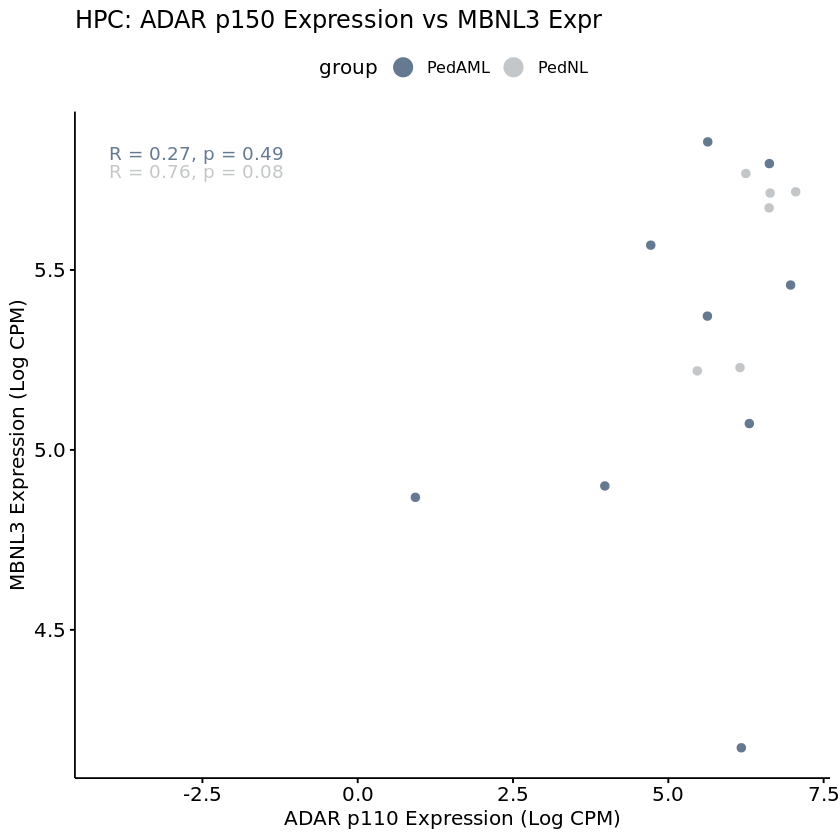

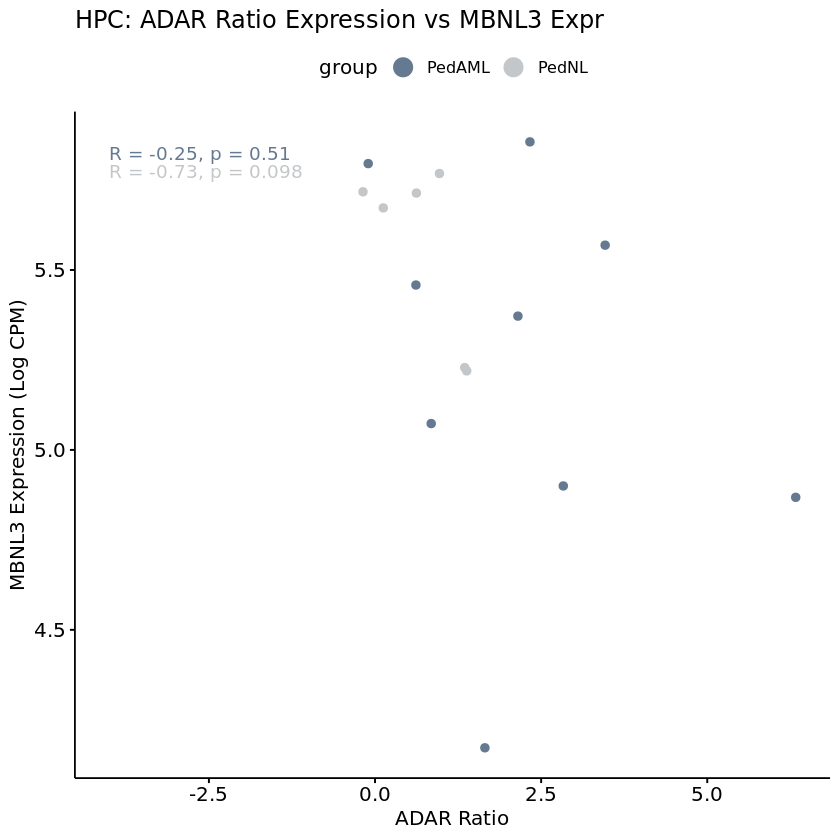

In [51]:
lcpm2.tmpCor.Prog <- subset(lcpm2.tmpCor.All, Cell.type=="Prog")
#png("PedAML_Sample_MBNL3expr_vs_ADARp150_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
#pdf("PedAML_Sample_MBNL3expr_vs_ADARp150_ggScatter_03112020.pdf", width = 7, height = 7)
ggscatter(subset(lcpm2.tmpCor.Prog), x="ADARp150.expr", y="MBNL3", color="group", palette=c("#657991",#"#A2C0E5", 
                                                                                                                        "#C4C7C9"),
          title = "HPC: ADAR p150 Expression vs MBNL3 Expr") +
          ylab("MBNL3 Expression (Log CPM)") + xlab("ADAR p150 Expression (Log CPM)") + 
          stat_cor(aes(col=group), output.type = "text", label.x = -4, na.rm=TRUE) + 
          #xlim(0,9) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Prog Cells", "Progenitors"), pch = c(15,17))
#dev.off()

#png("PedAML_Sample_MBNL3expr_vs_ADARp110_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
#pdf("PedAML_Sample_MBNL3expr_vs_ADARp110_ggScatter_02232021.pdf", width = 7, height = 7)
ggscatter(subset(lcpm2.tmpCor.Prog, group != "AdultAML"), x="ADARp110.expr", y="MBNL3", color="group", palette=c("#657991",#"#A2C0E5", 
                                                                                                                 "#C4C7C9"),
          title = "HPC: ADAR p150 Expression vs MBNL3 Expr") +
          ylab("MBNL3 Expression (Log CPM)") + xlab("ADAR p110 Expression (Log CPM)") + 
          stat_cor(aes(col=group), output.type = "text", label.x = -4, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Prog Cells", "Progenitors"), pch = c(15,17))
#dev.off()

#png("PedAML_Sample_MBNL3expr_vs_ADARratio_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
#pdf("PedAML_PedNL_Prog_MBNL3expr_vs_ADARratio_ggScatter_06282021.pdf", width = 7, height = 7)
ggscatter(subset(lcpm2.tmpCor.Prog, group != "AdultAML"), x="ADARratio", y="MBNL3", color="group", palette=c("#657991",#"#A2C0E5", 
                                                                                                                   "#C4C7C9"),
          title = "HPC: ADAR Ratio Expression vs MBNL3 Expr") +
          ylab("MBNL3 Expression (Log CPM)") + xlab("ADAR Ratio") + 
          stat_cor(aes(col=group), output.type = "text", label.x = -4, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Prog Cells", "Progenitors"), pch = c(15,17))
#dev.off()

In [76]:
lcpm2.tmpCor.All

group    lib.size norm.factors
X01id38cellHSC         PedAML   42406592 0.9711141   
Xcell05id90HSC         PedAML   34070699 0.9684815   
X03id78cellHSC         PedAML   29889738 0.8401557   
X05id00066HSC          PedAML   16772570 1.2590586   
X04id11474HSC          AdultAML 26494229 1.0971761   
X02id11251HSC          AdultAML 23521044 0.9294673   
X02x11379xHSCxxxxx     PedAML   46869202 0.9790568   
X04x00068xPLUSMINS     PedAML   26627608 1.0713088   
X08x00020xPLUSMINS     AdultAML 28086171 0.9766369   
X10x00082xPLUSMINS     AdultAML 28620442 0.6757614   
X12x12484xPLUSMINS     PedAML   45419072 0.8356475   
X13x12488xPLUSMINS     PedAML   33505660 1.1223094   
X16x12451xPLUSMINS     PedAML   23819678 0.9434247   
X01pid24760ctHSC       PedNL    40760475 1.2678422   
X03pid24474ctHSC       PedNL    31081268 1.0226053   
X05pid25376ctHSC       PedNL    16820448 1.2412435   
X02id38cellPROGENITORS PedAML   34657547 0.9788200   
X06id90cellPROGENITORS PedAML   34856832 0.8530318   
X04id78cellPROGENITORS PedAML   42824638 0.9087627   
X06id00066PRO          PedAML   31744580 1.1888360   
X03id11474HPC          AdultAML 25338927 1.0692039   
X01id11251HPC          AdultAML 24503278 0.8559037   
X01x00077xPROGENIT     PedAML   30830708 0.9503596   
X03x11379xHPCxxxxx     PedAML   44583134 1.0769868   
X05x00047xPLUSPLUS     PedNL    38613462 1.0933424   
X06x00077xPLUSPLUS     PedNL    64701405 1.2492177   
X07x00023xPLUSPLUS     AdultAML 38317179 1.1037879   
X09x00020xPLUSPLUS     AdultAML 34498091 0.9025508   
X11x00082xPLUSPLUS     AdultAML 51856309 0.6002891   
X14x12488xPLUSPLUS     PedAML   49615014 1.1356839   
X15x12584xPLUSPLUS     PedAML   40666280 0.8027412   
X17x12451xPLUSPLUS     PedAML   42143266 0.9013159   
X18x10720xPLUSPLUS     PedNL    45234224 1.1608719   
X02pid24760ctHPC       PedNL    47076899 1.2274924   
X04pid24474ctHPC       PedNL    45033714 1.0579347   
X06pid25376ctHPC       PedNL    48923699 1.1697460   
                       SequenceRun                                               
X01id38cellHSC         ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91
Xcell05id90HSC         ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91
X03id78cellHSC         ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91
X05id00066HSC          ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91
X04id11474HSC          ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91
X02id11251HSC          ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91
X02x11379xHSCxxxxx     ca_ne_630_001_400_060_JAMIESON_SN_human-ensembl-grch38-r91
X04x00068xPLUSMINS     ca_ne_630_001_400_060_JAMIESON_SN_human-ensembl-grch38-r91
X08x00020xPLUSMINS     ca_ne_645_001_300_060_JAMIESON_SN_human-ensembl-grch38-r91
X10x00082xPLUSMINS     ca_ne_645_001_300_060_JAMIESON_SN_human-ensembl-grch38-r91
X12x12484xPLUSMINS     ca_ne_645_001_300_060_JAMIESON_SN_human-ensembl-grch38-r91
X13x12488xPLUSMINS     ca_ne_650_001_360_060_JAMIESON_SN_human-ensembl-grch38-r91
X16x12451xPLUSMINS     ca_ne_650_001_360_060_JAMIESON_SN_human-ensembl-grch38-r91
X01pid24760ctHSC       ca_ne_714_001_400_070_JAMIESON_SN_human-ensembl-grch38-r91
X03pid24474ctHSC       ca_ne_714_001_400_070_JAMIESON_SN_human-ensembl-grch38-r91
X05pid25376ctHSC       ca_ne_714_001_400_070_JAMIESON_SN_human-ensembl-grch38-r91
X02id38cellPROGENITORS ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91
X06id90cellPROGENITORS ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91
X04id78cellPROGENITORS ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91
X06id00066PRO          ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91
X03id11474HPC          ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91
X01id11251HPC          ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91
X01x00077xPROGENIT     ca_ne_630_001_400_060_JAMIESON_SN_human-ensembl-grch38-r91
X03x11379xHPCxxxxx     ca_ne_630_001_400_060_JAMIESON_SN_

Warning message in if (shape %in% colnames(data)) {:
“the condition has length > 1 and only the first element will be used”
Warning message:
“Ignoring unknown aesthetics: shape”
Warning message in if (shape %in% colnames(data)) {:
“the condition has length > 1 and only the first element will be used”
Warning message:
“Ignoring unknown aesthetics: shape”


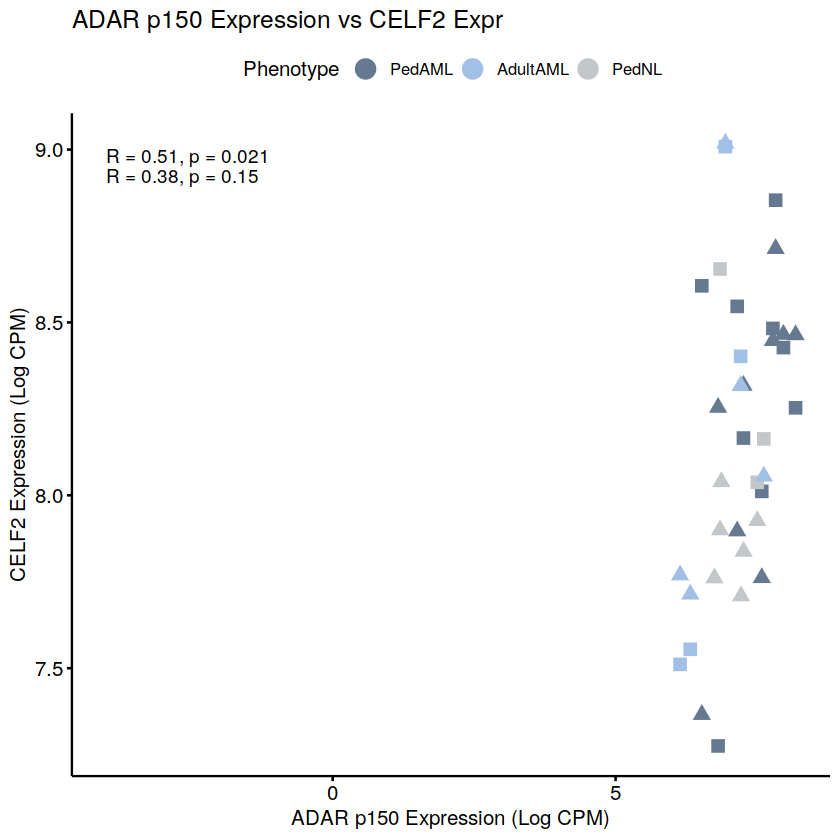

Warning message in if (shape %in% colnames(data)) {:
“the condition has length > 1 and only the first element will be used”
Warning message:
“Ignoring unknown aesthetics: shape”


png 
  2

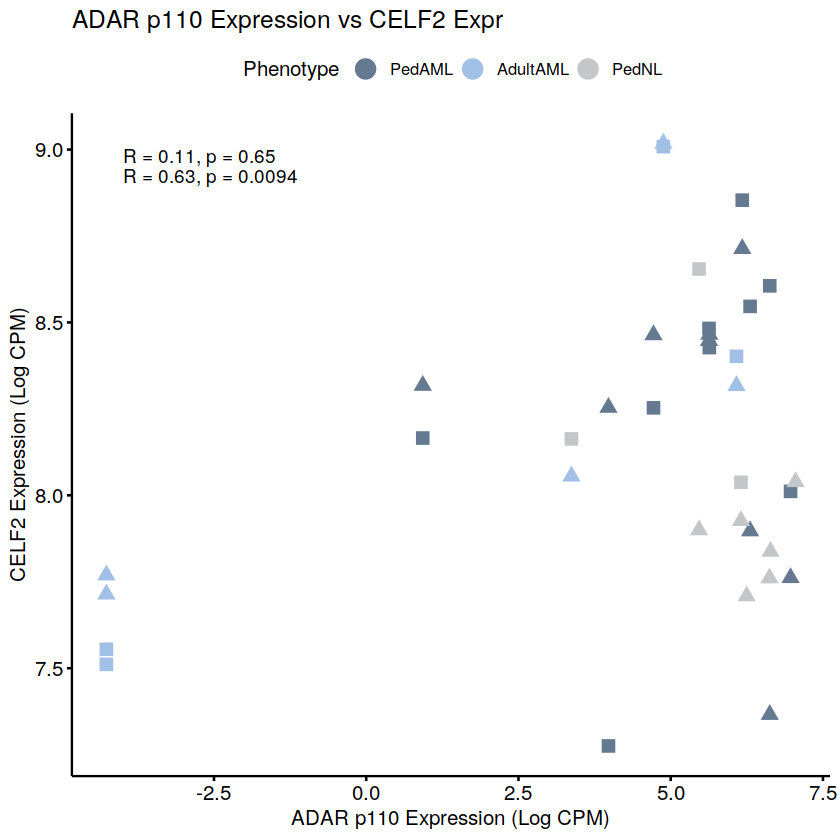

In [85]:
#png("PedAML_Sample_CELF2expr_vs_ADARp150_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
#pdf("PedAML_Sample_CELF2expr_vs_ADARp150_ggScatter_03112020.pdf", width = 7, height = 7)
ggscatter(lcpm2.tmpCor.All, x="ADARp150.expr", y="CELF2", color="Phenotype", palette=c("#657991","#A2C0E5", "#C4C7C9"),
          size=c(3.5,3.5)[lcpm2.tmpCor.All$Cell.type],
          shape = c(17,15)[lcpm2.tmpCor.All$Cell.type],
          title = "ADAR p150 Expression vs CELF2 Expr") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("CELF2 Expression (Log CPM)") + xlab("ADAR p150 Expression (Log CPM)") + 
          stat_cor(aes(shape=Cell.type), output.type = "text", label.x = -4, na.rm=TRUE) + 
          #xlim(0,9) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))
#dev.off()

#png("PedAML_Sample_CELF2expr_vs_ADARp110_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
#pdf("PedAML_Sample_CELF2expr_vs_ADARp110_ggScatter_02232021.pdf", width = 7, height = 7)
ggscatter(lcpm2.tmpCor.All, x="ADARp110.expr", y="CELF2", color="Phenotype", palette=c("#657991","#A2C0E5", "#C4C7C9"),
          size=c(3.5,3.5)[lcpm2.tmpCor.All$Cell.type],
          shape = c(17,15)[lcpm2.tmpCor.All$Cell.type],
          title = "ADAR p110 Expression vs CELF2 Expr") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("CELF2 Expression (Log CPM)") + xlab("ADAR p110 Expression (Log CPM)") + 
          stat_cor(aes(shape=Cell.type), output.type = "text", label.x = -4, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))
#dev.off()

#png("PedAML_Sample_CELF2expr_vs_ADARratio_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
pdf("PedAML_Sample_CELF2expr_vs_ADARratio_ggScatter_03022021.pdf", width = 7, height = 7)
ggscatter(lcpm2.tmpCor.All, x="ADARratio", y="CELF2", color="Phenotype", palette=c("#657991","#A2C0E5", "#C4C7C9"),
          size=c(3.5,3.5)[lcpm2.tmpCor.All$Cell.type],
          shape = c(17,15)[lcpm2.tmpCor.All$Cell.type],
          title = "ADAR Ratio Expression vs CELF2 Expr") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("CELF2 Expression (Log CPM)") + xlab("ADAR Ratio") + 
          stat_cor(aes(shape=Cell.type), output.type = "text", label.x = -4, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))
dev.off()

Warning message in if (shape %in% colnames(data)) {:
“the condition has length > 1 and only the first element will be used”
Warning message:
“Ignoring unknown aesthetics: shape”
Warning message in if (shape %in% colnames(data)) {:
“the condition has length > 1 and only the first element will be used”
Warning message:
“Ignoring unknown aesthetics: shape”


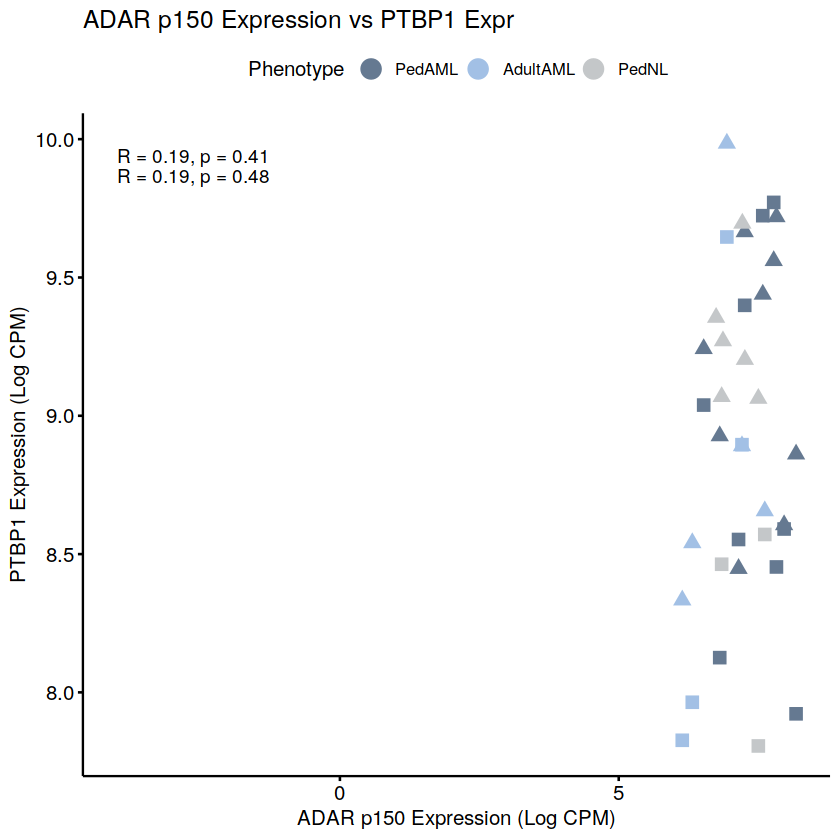

Warning message in if (shape %in% colnames(data)) {:
“the condition has length > 1 and only the first element will be used”
Warning message:
“Ignoring unknown aesthetics: shape”


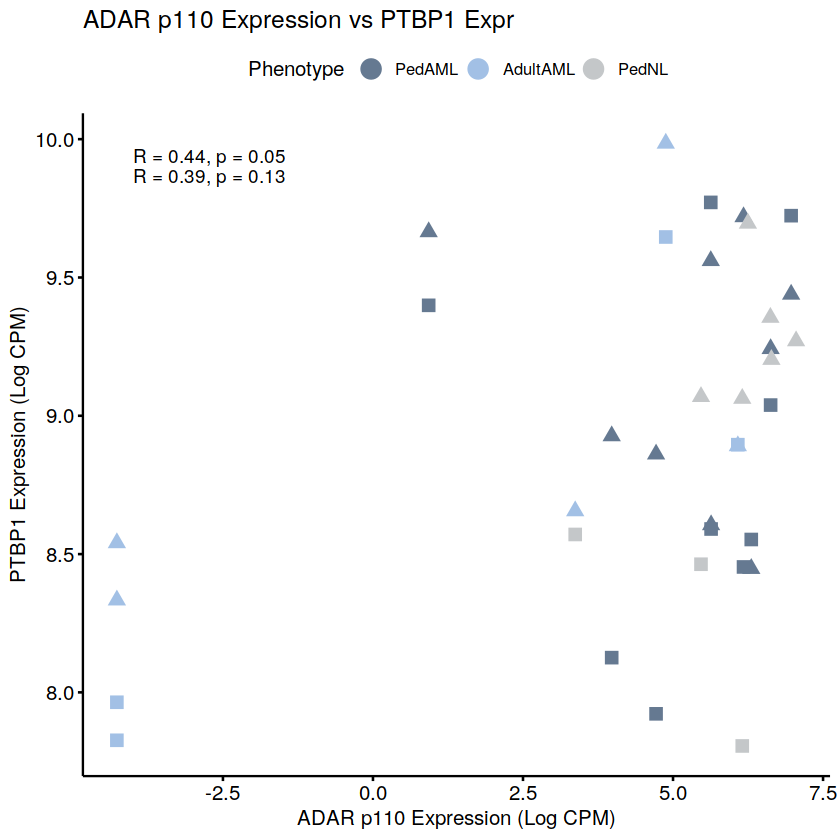

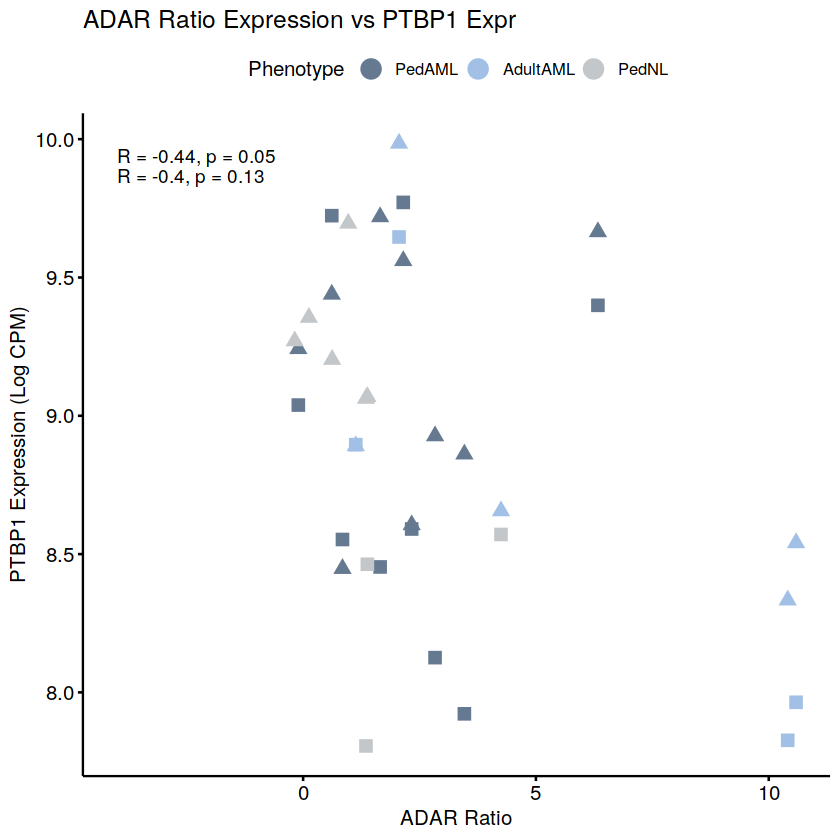

In [88]:
#png("PedAML_Sample_PTBP1expr_vs_ADARp150_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
#pdf("PedAML_Sample_PTBP1expr_vs_ADARp150_ggScatter_03112020.pdf", width = 7, height = 7)
ggscatter(lcpm2.tmpCor.All, x="ADARp150.expr", y="PTBP1", color="Phenotype", palette=c("#657991","#A2C0E5", "#C4C7C9"),
          size=c(3.5,3.5)[lcpm2.tmpCor.All$Cell.type],
          shape = c(17,15)[lcpm2.tmpCor.All$Cell.type],
          title = "ADAR p150 Expression vs PTBP1 Expr") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("PTBP1 Expression (Log CPM)") + xlab("ADAR p150 Expression (Log CPM)") + 
          stat_cor(aes(shape=Cell.type), output.type = "text", label.x = -4, na.rm=TRUE) + 
          #xlim(0,9) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))
#dev.off()

#png("PedAML_Sample_PTBP1expr_vs_ADARp110_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
#pdf("PedAML_Sample_PTBP1expr_vs_ADARp110_ggScatter_02232021.pdf", width = 7, height = 7)
ggscatter(lcpm2.tmpCor.All, x="ADARp110.expr", y="PTBP1", color="Phenotype", palette=c("#657991","#A2C0E5", "#C4C7C9"),
          size=c(3.5,3.5)[lcpm2.tmpCor.All$Cell.type],
          shape = c(17,15)[lcpm2.tmpCor.All$Cell.type],
          title = "ADAR p110 Expression vs PTBP1 Expr") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("PTBP1 Expression (Log CPM)") + xlab("ADAR p110 Expression (Log CPM)") + 
          stat_cor(aes(shape=Cell.type), output.type = "text", label.x = -4, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))
#dev.off()

#png("PedAML_Sample_PTBP1expr_vs_ADARratio_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
#pdf("PedAML_Sample_PTBP1expr_vs_ADARratio_ggScatter_03022021.pdf", width = 7, height = 7)
ggscatter(lcpm2.tmpCor.All, x="ADARratio", y="PTBP1", color="Phenotype", palette=c("#657991","#A2C0E5", "#C4C7C9"),
          size=c(3.5,3.5)[lcpm2.tmpCor.All$Cell.type],
          shape = c(17,15)[lcpm2.tmpCor.All$Cell.type],
          title = "ADAR Ratio Expression vs PTBP1 Expr") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("PTBP1 Expression (Log CPM)") + xlab("ADAR Ratio") + 
          stat_cor(aes(shape=Cell.type), output.type = "text", label.x = -4, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))
#dev.off()

## Other transcripts
* MCL1-L (ENST00000369026)
* MCL1-S (ENST00000307940)
* BCL2-L (ENST00000398117)
* BCL-XL/BCL2L1 (ENST00000307677)
* CD44-012/CD44-227 (ENST00000528086)
* PTK2B-202 (ENST00000420218)
* SF3B3-201 (ENST00000302516)
* SF3B3-207 (ENST00000566095)
* SF3B3-215 (ENST00000577085)

[1]  1 20

[1]  1 16

[1] 20  2

PTPN6.003 Phenotype
X02id38cellPROGENITORS 4.780803  PedAML   
X06id90cellPROGENITORS 7.360096  PedAML   
X04id78cellPROGENITORS 3.957134  PedAML   
X06id00066PRO          4.325243  PedAML   
X01x00077xPROGENIT     4.842806  PedAML   
X03x11379xHPCxxxxx     4.695970  PedAML

[1] 16  2

PTPN6.003 Phenotype
X01id38cellHSC     5.608007  PedAML   
Xcell05id90HSC     4.287309  PedAML   
X03id78cellHSC     6.157693  PedAML   
X05id00066HSC      2.711619  PedAML   
X02x11379xHSCxxxxx 4.045389  PedAML   
X04x00068xPLUSMINS 5.693743  PedAML


FALSE  TRUE 
33936     1 


FALSE  TRUE 
34982     1 

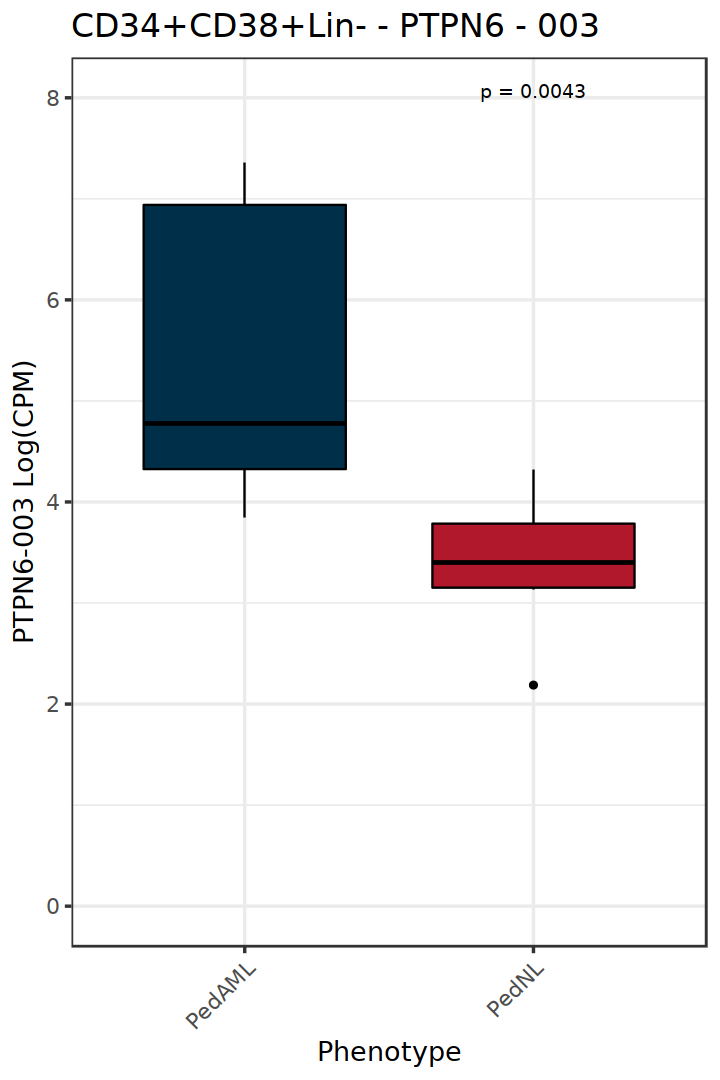

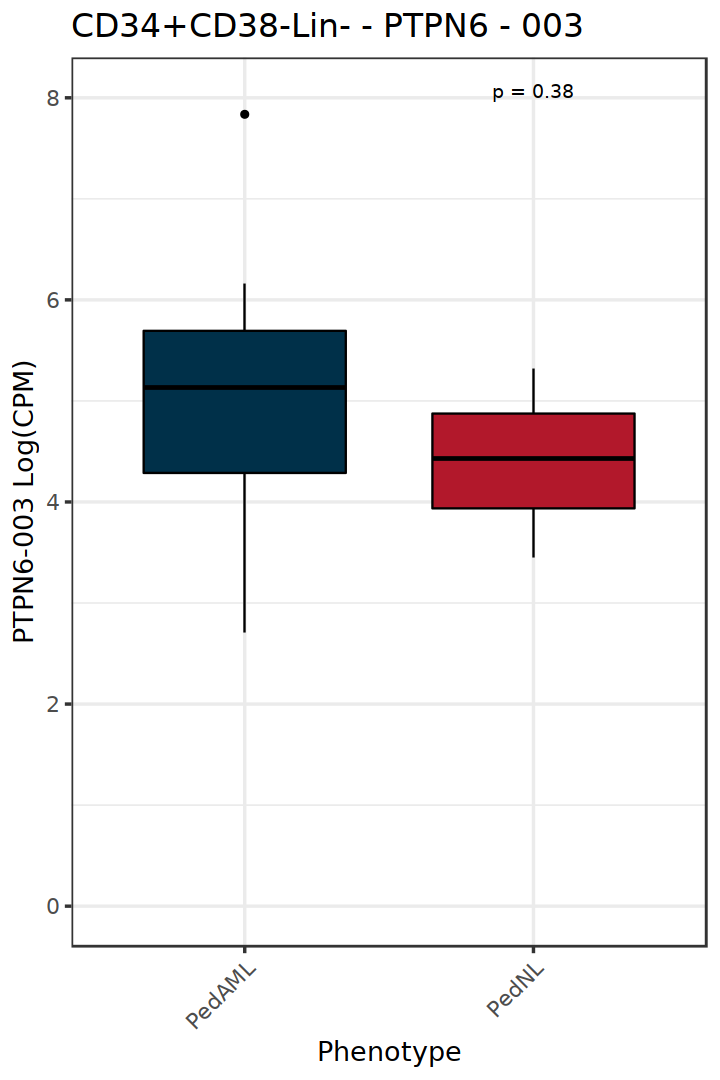

In [169]:
PTPN6.tx <- "ENST00000416215"
PTPN6.tx.exp.Prog.filt <- DGE_all.Prog.filt$counts[rownames(DGE_all.Prog.filt$counts) %in% PTPN6.tx,,drop=FALSE]
PTPN6.tx.exp.Stem.filt <- DGE_all.Stem.filt$counts[rownames(DGE_all.Stem.filt$counts) %in% PTPN6.tx,,drop=FALSE]
PTPN6.tx.lcpm.Prog.filt <- lcpm2.Prog.filt[rownames(lcpm2.Prog.filt) %in% PTPN6.tx,,drop=FALSE]
PTPN6.tx.lcpm.Stem.filt <- lcpm2.Stem.filt[rownames(lcpm2.Stem.filt) %in% PTPN6.tx,,drop=FALSE]
dim(PTPN6.tx.lcpm.Prog.filt)
dim(PTPN6.tx.lcpm.Stem.filt)

PTPN6.tx.lcpm.Prog.df <- as.data.frame(t(PTPN6.tx.lcpm.Prog.filt))
PTPN6.tx.lcpm.Prog.df$Phenotype <- #data.frame(Sample=colnames(X.tx.lcpm.Prog.filt), 
                                          factor(as.character(meta.Prog.filt[match(rownames(PTPN6.tx.lcpm.Prog.df), 
                                                                paste0("X", meta.Prog.filt$Sample)),"Phenotype"]), 
                                                           levels=c("PedAML", "AdultAML","PedNL"))

PTPN6.tx.lcpm.Stem.df <- as.data.frame(t(PTPN6.tx.lcpm.Stem.filt))
PTPN6.tx.lcpm.Stem.df$Phenotype <- #data.frame(Sample=colnames(X.tx.lcpm.Stem.filt), 
                                          factor(as.character(meta.Stem.filt[match(rownames(PTPN6.tx.lcpm.Stem.df), 
                                                                paste0("X", meta.Stem.filt$Sample)),"Phenotype"]), 
                                                           levels=c("PedAML", "AdultAML","PedNL"))
colnames(PTPN6.tx.lcpm.Stem.df)[1]<- colnames(PTPN6.tx.lcpm.Prog.df)[1] <- c("PTPN6.003")
dim(PTPN6.tx.lcpm.Prog.df)
head(PTPN6.tx.lcpm.Prog.df)
dim(PTPN6.tx.lcpm.Stem.df)
head(PTPN6.tx.lcpm.Stem.df)

table(rownames(DGE_all.Prog.filt$counts) %in% PTPN6.tx)
table(rownames(DGE_all.Stem.filt$counts) %in% PTPN6.tx)
#png(file="DerWerf_Jamieson_Prog_PTPN6_byPhenotype_11182020.png",width=6, height=9, units='in', res=300)
options(repr.plot.width=6, repr.plot.height=9)
ggboxplot(subset(PTPN6.tx.lcpm.Prog.df, Phenotype != "AdultAML"), x="Phenotype", y="PTPN6.003", fill="Phenotype",
         palette = c("#003049","#B2182B")) + ylim(0,8) +
    theme_bw(base_size=16) + ylab("PTPN6-003 Log(CPM)") + labs(title="CD34+CD38+Lin- - PTPN6 - 003") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1), legend.position="none")+ 
    stat_compare_means(method="t.test", label = "p.format", ref.group="PedAML")
#dev.off()
#png(file="DerWerf_Jamieson_Stem_PTPN6_byPhenotype_11182020.png",width=6, height=9, units='in', res=300)
options(repr.plot.width=6, repr.plot.height=9)
ggboxplot(subset(PTPN6.tx.lcpm.Stem.df, Phenotype != "AdultAML"), x="Phenotype", y="PTPN6.003", fill="Phenotype",
         palette = c("#003049","#B2182B")) + ylim(0,8) +
    theme_bw(base_size=16) + ylab("PTPN6-003 Log(CPM)") + labs(title="CD34+CD38-Lin- - PTPN6 - 003") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1), legend.position="none")+ 
    stat_compare_means(method="t.test", label = "p.format", ref.group="PedAML")
#dev.off()


In [30]:
X.tx <- c("ENST00000369026", "ENST00000307940", "ENST00000398117", "ENST00000307677", "ENST00000528086", "ENST00000420218", 
         "ENST00000302516", "ENST00000566095", "ENST00000577085")

table(rownames(DGE_all.Prog.filt$counts) %in% X.tx)
table(rownames(DGE_all.Stem.filt$counts) %in% X.tx)
X.tx.exp.Prog.filt <- DGE_all.Prog.filt$counts[rownames(DGE_all.Prog.filt$counts) %in% X.tx,]
X.tx.exp.Stem.filt <- DGE_all.Stem.filt$counts[rownames(DGE_all.Stem.filt$counts) %in% X.tx,]
X.tx.lcpm.Prog.filt <- lcpm2.Prog.filt[rownames(lcpm2.Prog.filt) %in% X.tx,]
X.tx.lcpm.Stem.filt <- lcpm2.Stem.filt[rownames(lcpm2.Stem.filt) %in% X.tx,]
dim(X.tx.lcpm.Prog.filt)
dim(X.tx.lcpm.Stem.filt)

X.tx.lcpm.Prog.df <- as.data.frame(t(X.tx.lcpm.Prog.filt))
X.tx.lcpm.Prog.df$Phenotype <- #data.frame(Sample=colnames(X.tx.lcpm.Prog.filt), 
                                          factor(as.character(meta.Prog.filt[match(rownames(X.tx.lcpm.Prog.df), 
                                                                paste0("X", meta.Prog.filt$Sample)),"Phenotype"]), 
                                                           levels=c("PedAML", "AdultAML","PedNL"))

X.tx.lcpm.Stem.df <- as.data.frame(t(X.tx.lcpm.Stem.filt))
X.tx.lcpm.Stem.df$Phenotype <- #data.frame(Sample=colnames(X.tx.lcpm.Stem.filt), 
                                          factor(as.character(meta.Stem.filt[match(rownames(X.tx.lcpm.Stem.df), 
                                                                paste0("X", meta.Stem.filt$Sample)),"Phenotype"]), 
                                                           levels=c("PedAML", "AdultAML","PedNL"))
colnames(X.tx.lcpm.Stem.df)[1:6] <- colnames(X.tx.lcpm.Prog.df)[1:6] <- c("PTK2B.202", "MCL1.S", "MCL1.L", "BCLX.L", 
                                                                          "BCL2.L", "SF3B3.201")
dim(X.tx.lcpm.Prog.df)
head(X.tx.lcpm.Prog.df)
dim(X.tx.lcpm.Stem.df)
head(X.tx.lcpm.Stem.df)

table(rownames(DGE_all.Prog.filt$counts) %in% X.tx)
table(rownames(DGE_all.Stem.filt$counts) %in% X.tx)


FALSE  TRUE 
33931     6 


FALSE  TRUE 
34977     6 

[1]  6 20

[1]  6 16

[1] 20  7

PTK2B.202 MCL1.S    MCL1.L    BCLX.L   BCL2.L  
X02id38cellPROGENITORS 7.801089  3.3603518  9.546563 2.850348 5.191556
X06id90cellPROGENITORS 6.522539  2.6637889 10.029068 1.795103 5.495866
X04id78cellPROGENITORS 7.112075  2.3871401 10.041223 4.822209 3.280472
X06id00066PRO          7.926026  0.2186684  7.544238 4.070463 4.438318
X01x00077xPROGENIT     7.002484  1.9853394 10.321447 4.331503 3.064359
X03x11379xHPCxxxxx     7.935862  3.7450815 10.533048 4.938064 5.644290
                       SF3B3.201 Phenotype
X02id38cellPROGENITORS 7.642692  PedAML   
X06id90cellPROGENITORS 6.363652  PedAML   
X04id78cellPROGENITORS 6.345528  PedAML   
X06id00066PRO          7.795793  PedAML   
X01x00077xPROGENIT     5.404672  PedAML   
X03x11379xHPCxxxxx     6.488606  PedAML

[1] 16  7

PTK2B.202 MCL1.S    MCL1.L    BCLX.L   BCL2.L   SF3B3.201
X01id38cellHSC     7.823833   3.687428 10.130170 3.203981 5.267580 7.808057 
Xcell05id90HSC     6.770653   3.211984 10.529987 4.926255 2.784796 7.130894 
X03id78cellHSC     6.627835   2.761753  9.782598 1.761593 4.948355 5.903076 
X05id00066HSC      7.955031   0.788143  7.461879 4.690557 4.114915 7.912180 
X02x11379xHSCxxxxx 8.491339   5.673027 11.410891 5.210464 6.018680 6.140812 
X04x00068xPLUSMINS 8.000570  -1.423181  8.837268 4.139981 4.962223 5.405376 
                   Phenotype
X01id38cellHSC     PedAML   
Xcell05id90HSC     PedAML   
X03id78cellHSC     PedAML   
X05id00066HSC      PedAML   
X02x11379xHSCxxxxx PedAML   
X04x00068xPLUSMINS PedAML


FALSE  TRUE 
33931     6 


FALSE  TRUE 
34977     6 

In [31]:
rownames(X.tx.lcpm.Prog.df)
X.tx.lcpm.Prog.df$PTK2B.202
X.tx.lcpm.Prog.df$Phenotype
colnames(lcpm2.Prog.filt)
lcpm2.Prog.filt["ENST00000420218",]

 head(meta.Prog.filt)

[1] "X02id38cellPROGENITORS" "X06id90cellPROGENITORS" "X04id78cellPROGENITORS"
 [4] "X06id00066PRO"          "X01x00077xPROGENIT"     "X03x11379xHPCxxxxx"    
 [7] "X14x12488xPLUSPLUS"     "X15x12584xPLUSPLUS"     "X17x12451xPLUSPLUS"    
[10] "X03id11474HPC"          "X01id11251HPC"          "X07x00023xPLUSPLUS"    
[13] "X09x00020xPLUSPLUS"     "X11x00082xPLUSPLUS"     "X05x00047xPLUSPLUS"    
[16] "X06x00077xPLUSPLUS"     "X18x10720xPLUSPLUS"     "X02pid24760ctHPC"      
[19] "X04pid24474ctHPC"       "X06pid25376ctHPC"

[1] 7.801089 6.522539 7.112075 7.926026 7.002484 7.935862 5.060382 6.728235
 [9] 7.481825 7.201686 6.506105 6.689566 4.347069 6.427745 6.595911 5.836606
[17] 6.449013 6.261200 5.015738 5.692288

[1] PedAML   PedAML   PedAML   PedAML   PedAML   PedAML   PedAML   PedAML  
 [9] PedAML   AdultAML AdultAML AdultAML AdultAML AdultAML PedNL    PedNL   
[17] PedNL    PedNL    PedNL    PedNL   
Levels: PedAML AdultAML PedNL

[1] "X02id38cellPROGENITORS" "X06id90cellPROGENITORS" "X04id78cellPROGENITORS"
 [4] "X06id00066PRO"          "X01x00077xPROGENIT"     "X03x11379xHPCxxxxx"    
 [7] "X14x12488xPLUSPLUS"     "X15x12584xPLUSPLUS"     "X17x12451xPLUSPLUS"    
[10] "X03id11474HPC"          "X01id11251HPC"          "X07x00023xPLUSPLUS"    
[13] "X09x00020xPLUSPLUS"     "X11x00082xPLUSPLUS"     "X05x00047xPLUSPLUS"    
[16] "X06x00077xPLUSPLUS"     "X18x10720xPLUSPLUS"     "X02pid24760ctHPC"      
[19] "X04pid24474ctHPC"       "X06pid25376ctHPC"

X02id38cellPROGENITORS X06id90cellPROGENITORS X04id78cellPROGENITORS 
              7.801089               6.522539               7.112075 
         X06id00066PRO     X01x00077xPROGENIT     X03x11379xHPCxxxxx 
              7.926026               7.002484               7.935862 
    X14x12488xPLUSPLUS     X15x12584xPLUSPLUS     X17x12451xPLUSPLUS 
              5.060382               6.728235               7.481825 
         X03id11474HPC          X01id11251HPC     X07x00023xPLUSPLUS 
              7.201686               6.506105               6.689566 
    X09x00020xPLUSPLUS     X11x00082xPLUSPLUS     X05x00047xPLUSPLUS 
              4.347069               6.427745               6.595911 
    X06x00077xPLUSPLUS     X18x10720xPLUSPLUS       X02pid24760ctHPC 
              5.836606               6.449013               6.261200 
      X04pid24474ctHPC       X06pid25376ctHPC 
              5.015738               5.692288

SequenceRun                                                SequenceDate
2  ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91 5/5/19      
4  ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91 5/5/19      
6  ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91 5/5/19      
8  ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91 6/26/19     
13 ca_ne_630_001_400_060_JAMIESON_SN_human-ensembl-grch38-r91 8/31/19     
15 ca_ne_630_001_400_060_JAMIESON_SN_human-ensembl-grch38-r91 8/31/19     
   Sample                SampleName     Patient.ID RIN  X      Adult.Pediatric
2  02id38cellPROGENITORS 38 Progenitors 32538       9.7 PedAML Pediatric      
4  06id90cellPROGENITORS 90 Progenitors 22390      10.0 PedAML Pediatric      
6  04id78cellPROGENITORS 78 Progenitors 28678      10.0 PedAML Pediatric      
8  06id00066PRO          66 Progenitors 22666       9.8 PedAML Pediatric      
13 01x00077xPROGENIT     77 Progenitors 27177       9.8 PedAML Pediatric      
15 03x11379xHPCxxxxx     11379 HPC      11379       9.7 PedAML Pediatric      
   Disease Cell.type Sorted.Cell.Type Tissue.Source RNA.seq.status Reads   
2  AML     Prog      34+38+           PB            Completed      73196851
4  AML     Prog      34+38+           BM            Completed      81721991
6  AML     Prog      34+38+           PB            Completed      88894032
8  AML     Prog      34+38+           BM            Completed      77343883
13 AML     Prog      34+38+           BM            Completed      68810108
15 AML     Prog      34+38+           PB            Completed      92324550
   Phenotype
2  PedAML   
4  PedAML   
6  PedAML   
8  PedAML   
13 PedAML   
15 PedAML

In [71]:
table(rownames(lcpm2.Stem.filt) %in% "ENST00000376055")


FALSE  TRUE 
34982     1 

In [32]:
bcl2_gns <- c("ENSG00000129473","ENSG00000137875","ENSG00000153094","ENSG00000099968","ENSG00000121380",
              "ENSG00000188761","ENSG00000140379","ENSG00000002330","ENSG00000015475","ENSG00000087088",
              "ENSG00000030110","ENSG00000100290","ENSG00000141682","ENSG00000105327","ENSG00000176720",
              "ENSG00000104081","ENSG00000135116","ENSG00000126581","ENSG00000113734","ENSG00000140299",
              "ENSG00000176171","ENSG00000184825")
names(bcl2_gns) <- c("BCL2L2","BCL2L10","BCL2L11","BCL2L13","BCL2L14","BCL2L15","BCL2A1","BAD","BID","BAX",
                     "BAK1","BIK","PMAIP1","BBC3","BOK","BMF","HRK","BECN1","BNIP1","BNIP2","BNIP3","BCAP31")
dim(lcpm2.Prog)
head(lcpm2.Prog)
table(gsub("[.].*$", "", rownames(lcpm2.Prog)) %in% bcl2_gns)
table(gsub("[.].*$", "", rownames(lcpm2.Stem)) %in% bcl2_gns)
#table(rownames(DGE_all.Prog.filt$counts) %in% X.tx)
#table(rownames(DGE_all.Stem.filt$counts) %in% X.tx)
X.tx.lcpm.Prog.df.tmp <- as.data.frame(t(lcpm2.Prog[match(bcl2_gns, gsub("[.].*$", "", rownames(lcpm2.Prog))),]))
X.tx.lcpm.Stem.df.tmp <- as.data.frame(t(lcpm2.Stem[match(bcl2_gns, gsub("[.].*$", "", rownames(lcpm2.Stem))),]))
colnames(X.tx.lcpm.Prog.df.tmp) <- names(bcl2_gns)
colnames(X.tx.lcpm.Stem.df.tmp) <- names(bcl2_gns)
X.tx.lcpm.Prog.df.tmp$BCLXS <- lcpm2.Prog.filt[rownames(lcpm2.Prog.filt) %in% "ENST00000376055",
                                               match(rownames(X.tx.lcpm.Prog.df.tmp),colnames(lcpm2.Prog.filt))]
X.tx.lcpm.Stem.df.tmp$BCLXS <- lcpm2.Stem.filt[rownames(lcpm2.Stem.filt) %in% "ENST00000376055",
                                               match(rownames(X.tx.lcpm.Stem.df.tmp),colnames(lcpm2.Stem.filt))]
X.tx.lcpm.Prog.df.tmp$BCL2S <- lcpm2.Prog.filt[rownames(lcpm2.Prog.filt) %in% "ENST00000589955",
                                               match(rownames(X.tx.lcpm.Prog.df.tmp),colnames(lcpm2.Prog.filt))]
#X.tx.lcpm.Stem.df$BCL2S <- lcpm2.Stem.filt[rownames(lcpm2.Stem.filt) %in% "ENST00000589955",]
X.tx.lcpm.Prog.df <- cbind.data.frame(X.tx.lcpm.Prog.df.tmp, X.tx.lcpm.Prog.df[match(rownames(X.tx.lcpm.Prog.df.tmp),
rownames(X.tx.lcpm.Prog.df)),])
X.tx.lcpm.Stem.df <- cbind.data.frame(X.tx.lcpm.Stem.df.tmp, X.tx.lcpm.Stem.df[match(rownames(X.tx.lcpm.Stem.df.tmp),
rownames(X.tx.lcpm.Stem.df)),])


[1] 57820    20

X02id38cellPROGENITORS X06id90cellPROGENITORS
ENSG00000000003.10 -4.384468              -4.384468             
ENSG00000000005.5  -4.384468              -4.384468             
ENSG00000000419.8   6.020139               6.305891             
ENSG00000000457.9   3.361357               2.285506             
ENSG00000000460.12  4.268082               3.944796             
ENSG00000000938.8   3.715471               3.009381             
                   X04id78cellPROGENITORS X06id00066PRO X03id11474HPC
ENSG00000000003.10 -4.384468              -4.384468     -4.384468    
ENSG00000000005.5  -4.384468              -4.384468     -4.384468    
ENSG00000000419.8   5.536927               5.532516      6.294307    
ENSG00000000457.9   2.842673               4.479683      3.973151    
ENSG00000000460.12  4.573385               4.584769      4.464439    
ENSG00000000938.8   2.286473               2.810809      4.607151    
                   X01id11251HPC X01x00077xPROGENIT X03x11379xHPCxxxxx
ENSG00000000003.10 -4.38446825   -4.3844682         -4.384468         
ENSG00000000005.5  -4.38446825   -4.3844682         -4.384468         
ENSG00000000419.8   6.40561952    5.3873755          5.588437         
ENSG00000000457.9   0.06534014    3.5904491          4.122120         
ENSG00000000460.12  3.80464917    4.6425878          4.783613         
ENSG00000000938.8   3.77450427    0.5997391          3.213203         
                   X05x00047xPLUSPLUS X06x00077xPLUSPLUS X07x00023xPLUSPLUS
ENSG00000000003.10 -1.076311          -0.6123766         -4.384468         
ENSG00000000005.5  -4.384468          -4.3844682         -4.384468         
ENSG00000000419.8   5.799908           5.9182399          4.621406         
ENSG00000000457.9   3.076529           4.1539902          2.930437         
ENSG00000000460.12  5.030572           4.9783143          3.154602         
ENSG00000000938.8   3.470653           2.4441827          2.015681         
                   X09x00020xPLUSPLUS X11x00082xPLUSPLUS X14x12488xPLUSPLUS
ENSG00000000003.10 -4.384468          -4.384468          -2.149757         
ENSG00000000005.5  -4.384468          -4.384468          -4.384468         
ENSG00000000419.8   5.725530           6.204410           5.990162         
ENSG00000000457.9   4.047121           1.746497           3.027899         
ENSG00000000460.12  2.692397           1.916713           4.651154         
ENSG00000000938.8   2.943301          -1.103151           1.704924         
                   X15x12584xPLUSPLUS X17x12451xPLUSPLUS X18x10720xPLUSPLUS
ENSG00000000003.10 -0.9788777         -4.384468          -1.159093         
ENSG00000000005.5  -4.3844682         -4.384468          -4.384468         
ENSG00000000419.8   5.6625941          5.821321           5.894864         
ENSG00000000457.9   2.2957093          5.093482           4.334554         
ENSG00000000460.12  3.4902507          2.250666           5.258840         
ENSG00000000938.8   1.9998340          2.886160           2.386185         
                   X02pid24760ctHPC X04pid24474ctHPC X06pid25376ctHPC
ENSG00000000003.10 -0.6136168        1.3118912       -0.2023217      
ENSG00000000005.5  -4.3844682       -4.3844682       -4.3844682      
ENSG00000000419.8   5.5603140        6.0365089        5.8984804      
ENSG00000000457.9   4.4253426        1.7506360        3.5263531      
ENSG00000000460.12  4.8802831        4.0168538        5.1795988      
ENSG00000000938.8   2.3556545        0.1340327        1.4627479


FALSE  TRUE 
57798    22 


FALSE  TRUE 
57798    22 

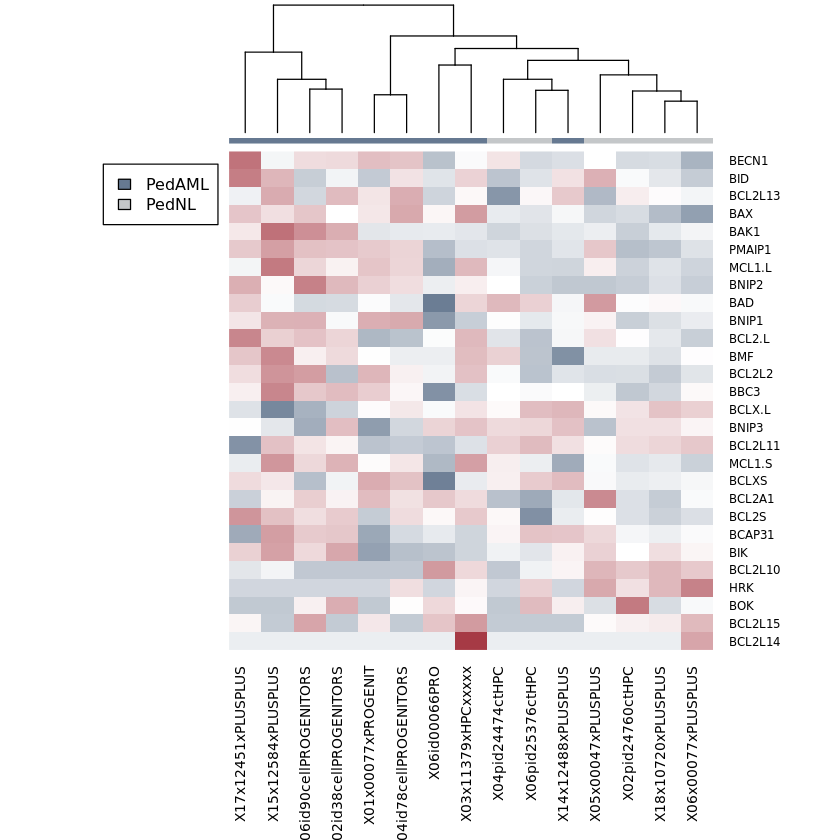

In [244]:
library(gplots)
mycol= colorpanel(1000, "#4B617D", "white", "#a63a45")
f <- factor(as.character(subset(X.tx.lcpm.Prog.df, Phenotype != "AdultAML")$Phenotype))
group_col= c("#667991", "#C4C7C9")[f]

heatmap.2(t(subset(X.tx.lcpm.Prog.df, Phenotype != "AdultAML")[,-c(25,30,ncol(X.tx.lcpm.Prog.df))]), 
          scale="row", labRow=colnames(X.tx.lcpm.Prog.df)[-c(25,30,ncol(X.tx.lcpm.Prog.df))], 
          labCol=NULL,
          ColSideColors=group_col, col=mycol, trace="none", density.info="none", 
         dendrogram="column", margin=c(12,8), lhei=c(2,10), key=FALSE)
legend("topleft", fill=unique(group_col), legend=unique(f), 
               inset=c(0,0.1), cex=0.8)

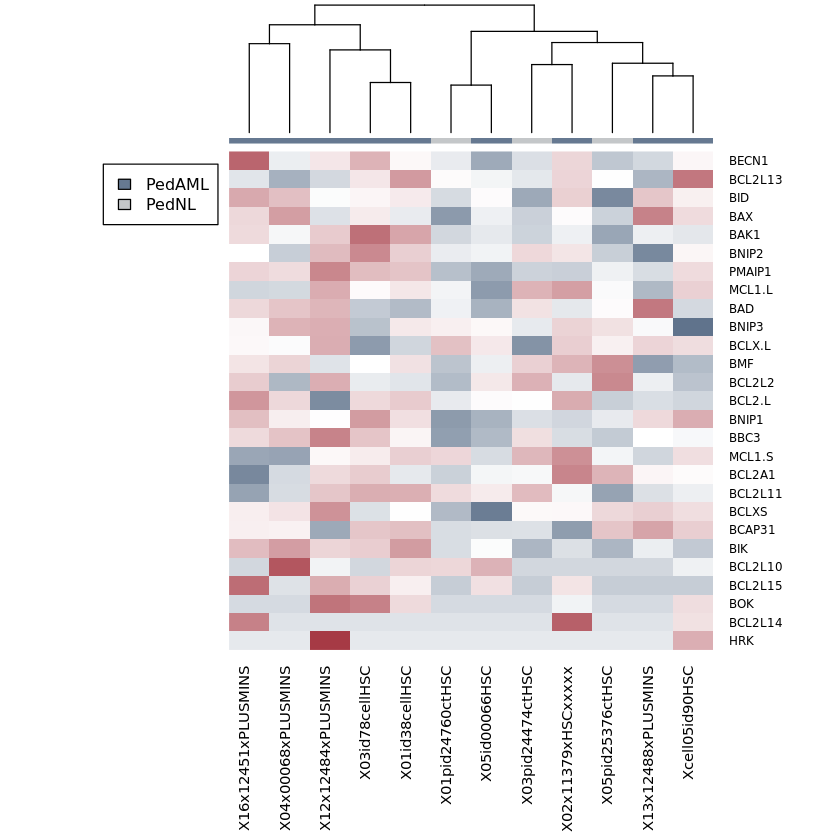

In [246]:
mycol= colorpanel(1000, "#4B617D", "white", "#a63a45")
f <- factor(as.character(subset(X.tx.lcpm.Stem.df, Phenotype != "AdultAML")$Phenotype))
group_col= c("#667991", "#C4C7C9")[f]

heatmap.2(t(subset(X.tx.lcpm.Stem.df, Phenotype != "AdultAML")[,-c(24,29,ncol(X.tx.lcpm.Stem.df))]), 
          scale="row", labRow=colnames(X.tx.lcpm.Stem.df)[-c(24,29,ncol(X.tx.lcpm.Stem.df))], 
         #labCol=rep("", nrow(X.tx.lcpm.Stem.df)), 
          ColSideColors=group_col, col=mycol, trace="none", density.info="none", 
         dendrogram="column", margin=c(12,8), lhei=c(2,10), key=FALSE)
legend("topleft", fill=unique(group_col), legend=unique(f), 
               inset=c(0,0.1), cex=0.8)

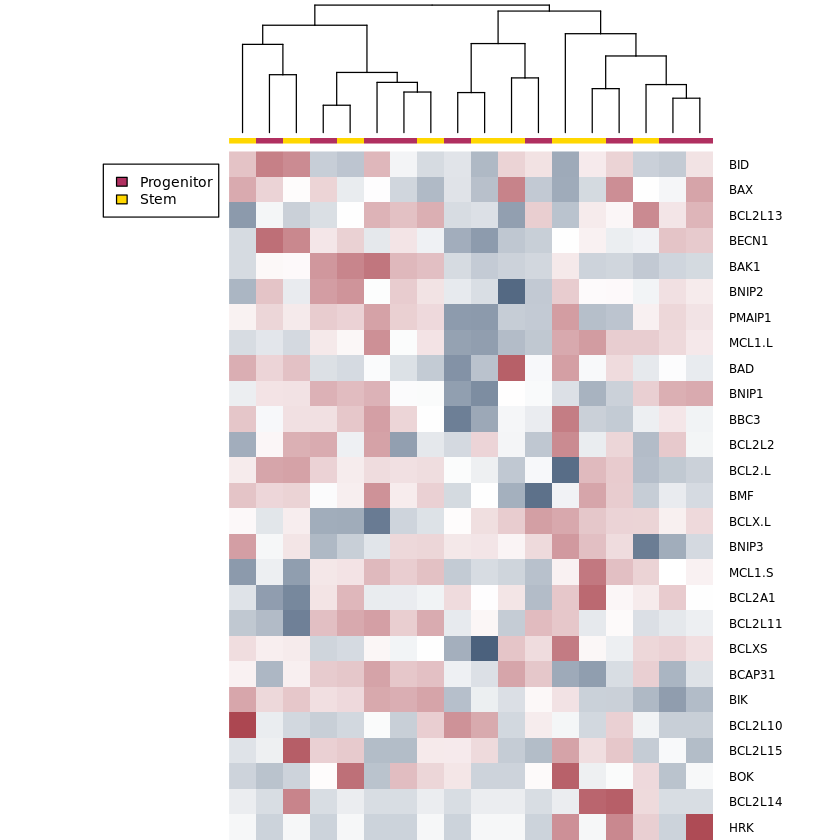

In [248]:
mycol= colorpanel(1000, "#4B617D", "white", "#a63a45")
X.tx.lcpm.df.tmp <- rbind.data.frame(X.tx.lcpm.Prog.df[,-24], X.tx.lcpm.Stem.df)
X.tx.lcpm.df.tmp$Cell <- factor(c(rep("Progenitor", nrow(X.tx.lcpm.Prog.df)),rep("Stem", nrow(X.tx.lcpm.Stem.df))),
                                levels=c("Progenitor", "Stem"))
f <- factor(as.character(subset(X.tx.lcpm.df.tmp, Phenotype == "PedAML")$Cell))
group_col= c("maroon", "gold")[f]

heatmap.2(t(subset(X.tx.lcpm.df.tmp, Phenotype == "PedAML")[,-c(24,29,ncol(X.tx.lcpm.df.tmp)-1, ncol(X.tx.lcpm.df.tmp))]), 
          scale="row", labRow=colnames(X.tx.lcpm.df.tmp)[-c(24,29,ncol(X.tx.lcpm.df.tmp))], 
         #labCol=rep("", nrow(X.tx.lcpm.Stem.df)), 
          ColSideColors=group_col, col=mycol, trace="none", density.info="none", 
         dendrogram="column", margin=c(0,8), lhei=c(2,10), key=FALSE)
legend("topleft", fill=unique(group_col), legend=unique(f), 
               inset=c(0,0.1), cex=0.7)

In [87]:
X.tx <- c("ENST00000369026", "ENST00000307940", "ENST00000398117", "ENST00000307677", "ENST00000528086", "ENST00000420218", 
         "ENST00000302516", "ENST00000566095", "ENST00000577085", "ENST00000487698", "ENST00000470268", 
         "ENST00000335508")
rownames(DGE_all.Prog.unfilt$counts[rownames(DGE_all.Prog.unfilt$counts) %in% X.tx,])
DGE_all.Prog.unfilt$genes[rownames(DGE_all.Prog.unfilt$counts) %in% X.tx,]
rownames(DGE_all.Stem.unfilt$counts[rownames(DGE_all.Stem.unfilt$counts) %in% X.tx,])
DGE_all.Stem.unfilt$genes[rownames(DGE_all.Stem.unfilt$counts) %in% X.tx,]


[1] "ENST00000528086" "ENST00000335508" "ENST00000470268" "ENST00000487698"
 [5] "ENST00000420218" "ENST00000307940" "ENST00000369026" "ENST00000307677"
 [9] "ENST00000398117" "ENST00000302516" "ENST00000566095" "ENST00000577085"

genes           ENTREZID SYMBOL
ENST00000528086 ENST00000528086 960      CD44  
ENST00000335508 ENST00000335508 23451    SF3B1 
ENST00000470268 ENST00000470268 23451    SF3B1 
ENST00000487698 ENST00000487698 23451    SF3B1 
ENST00000420218 ENST00000420218 2185     PTK2B 
ENST00000307940 ENST00000307940 4170     MCL1  
ENST00000369026 ENST00000369026 4170     MCL1  
ENST00000307677 ENST00000307677 598      BCL2L1
ENST00000398117 ENST00000398117 596      BCL2  
ENST00000302516 ENST00000302516 23450    SF3B3 
ENST00000566095 ENST00000566095 23450    SF3B3 
ENST00000577085 ENST00000577085 23450    SF3B3

[1] "ENST00000528086" "ENST00000335508" "ENST00000470268" "ENST00000487698"
 [5] "ENST00000420218" "ENST00000307940" "ENST00000369026" "ENST00000307677"
 [9] "ENST00000398117" "ENST00000302516" "ENST00000566095" "ENST00000577085"

genes           ENTREZID SYMBOL
ENST00000528086 ENST00000528086 960      CD44  
ENST00000335508 ENST00000335508 23451    SF3B1 
ENST00000470268 ENST00000470268 23451    SF3B1 
ENST00000487698 ENST00000487698 23451    SF3B1 
ENST00000420218 ENST00000420218 2185     PTK2B 
ENST00000307940 ENST00000307940 4170     MCL1  
ENST00000369026 ENST00000369026 4170     MCL1  
ENST00000307677 ENST00000307677 598      BCL2L1
ENST00000398117 ENST00000398117 596      BCL2  
ENST00000302516 ENST00000302516 23450    SF3B3 
ENST00000566095 ENST00000566095 23450    SF3B3 
ENST00000577085 ENST00000577085 23450    SF3B3

In [33]:
X.tx.exp.Prog.unfilt <- DGE_all.Prog.unfilt$counts[rownames(DGE_all.Prog.unfilt$counts) %in% X.tx,]
X.tx.exp.Stem.unfilt <- DGE_all.Stem.unfilt$counts[rownames(DGE_all.Stem.unfilt$counts) %in% X.tx,]
X.tx.lcpm.Prog.unfilt <- lcpm2.Prog.unfilt[rownames(lcpm2.Prog.unfilt) %in% X.tx,]
X.tx.lcpm.Stem.unfilt <- lcpm2.Stem.unfilt[rownames(lcpm2.Stem.unfilt) %in% X.tx,]
dim(X.tx.lcpm.Prog.unfilt)
dim(X.tx.lcpm.Stem.unfilt)

X.tx.lcpm.unfilt.Prog.df <- as.data.frame(t(X.tx.lcpm.Prog.unfilt))
X.tx.lcpm.unfilt.Prog.df$Phenotype <- #data.frame(Sample=colnames(X.tx.lcpm.Prog.unfilt), 
                                          factor(as.character(meta.Prog.filt[match(rownames(X.tx.lcpm.unfilt.Prog.df), 
                                                                paste0("X", meta.Prog.filt$Sample)),"Phenotype"]), 
                                                           levels=c("PedAML", "AdultAML","PedNL"))

X.tx.lcpm.unfilt.Stem.df <- as.data.frame(t(X.tx.lcpm.Stem.unfilt))
X.tx.lcpm.unfilt.Stem.df$Phenotype <- #data.frame(Sample=colnames(X.tx.lcpm.Stem.unfilt), 
                                          factor(as.character(meta.Stem.filt[match(rownames(X.tx.lcpm.unfilt.Stem.df), 
                                                                paste0("X", meta.Stem.filt$Sample)),"Phenotype"]), 
                                                           levels=c("PedAML", "AdultAML","PedNL"))
head(X.tx.lcpm.unfilt.Prog.df)
head(X.tx.lcpm.unfilt.Stem.df)
colnames(X.tx.lcpm.unfilt.Stem.df)[1:12] <- colnames(X.tx.lcpm.unfilt.Prog.df)[1:12] <- c("CD44.012", "PTK2B.202", 
                                                                                        "SF3B1.001", "SF3B1.002", "SF3B1.004",
                                                                                        "MCL1.S", "MCL1.L", "BCLX.L", 
                                                                          "BCL2.L", "SF3B3.201", "SF3B3.207", "SF3B3.215")
dim(X.tx.lcpm.unfilt.Prog.df)
head(X.tx.lcpm.unfilt.Prog.df)
dim(X.tx.lcpm.unfilt.Stem.df)
head(X.tx.lcpm.unfilt.Stem.df)

table(rownames(DGE_all.Prog.unfilt$counts) %in% X.tx)
table(rownames(DGE_all.Stem.unfilt$counts) %in% X.tx)

[1]  9 20

[1]  9 16

ENST00000528086 ENST00000420218 ENST00000307940
X02id38cellPROGENITORS -4.28397        7.759673        3.3190569      
X06id90cellPROGENITORS -4.28397        6.371443        2.5137680      
X04id78cellPROGENITORS -4.28397        7.112050        2.3869583      
X06id00066PRO          -4.28397        7.884530        0.1782894      
X01x00077xPROGENIT     -4.28397        6.939110        1.9225697      
X03x11379xHPCxxxxx     -4.28397        7.936814        3.7459695      
                       ENST00000369026 ENST00000307677 ENST00000398117
X02id38cellPROGENITORS  9.505143       2.809107        5.150170       
X06id90cellPROGENITORS  9.877898       1.646036        5.344852       
X04id78cellPROGENITORS 10.041204       4.822160        3.280366       
X06id00066PRO           7.502744       4.029040        4.396877       
X01x00077xPROGENIT     10.258055       4.268232        3.001261       
X03x11379xHPCxxxxx     10.534003       4.938990        5.645227       
                       ENST00000302516 ENST00000566095 ENST00000577085
X02id38cellPROGENITORS 7.601276        -4.283970       -1.860297      
X06id90cellPROGENITORS 6.212564        -4.283970       -3.314116      
X04id78cellPROGENITORS 6.345499        -3.065155       -4.283970      
X06id00066PRO          7.754298        -3.077413       -1.735192      
X01x00077xPROGENIT     5.341337        -2.124306       -4.283970      
X03x11379xHPCxxxxx     6.489552        -2.564074       -4.283970      
                       Phenotype
X02id38cellPROGENITORS PedAML   
X06id90cellPROGENITORS PedAML   
X04id78cellPROGENITORS PedAML   
X06id00066PRO          PedAML   
X01x00077xPROGENIT     PedAML   
X03x11379xHPCxxxxx     PedAML

ENST00000528086 ENST00000420218 ENST00000307940
X01id38cellHSC     -3.840207       7.948188         3.8110271     
Xcell05id90HSC     -3.840207       6.831166         3.2718911     
X03id78cellHSC     -3.840207       6.643140         2.7766384     
X05id00066HSC      -3.840207       7.903280         0.7373583     
X02x11379xHSCxxxxx -3.840207       8.563837         5.7454089     
X04x00068xPLUSMINS -3.840207       7.919973        -1.4936629     
                   ENST00000369026 ENST00000307677 ENST00000398117
X01id38cellHSC     10.254560       3.327261        5.391712       
Xcell05id90HSC     10.590553       4.986623        2.844475       
X03id78cellHSC      9.797931       1.776026        4.963592       
X05id00066HSC       7.410131       4.638864        4.063254       
X02x11379xHSCxxxxx 11.483405       5.282794        6.091090       
X04x00068xPLUSMINS  8.756664       4.059584        4.881732       
                   ENST00000302516 ENST00000566095 ENST00000577085 Phenotype
X01id38cellHSC     7.932411        -1.655095       -3.840207       PedAML   
Xcell05id90HSC     7.191420        -1.691241       -3.840207       PedAML   
X03id78cellHSC     5.918361        -1.136500       -3.840207       PedAML   
X05id00066HSC      7.860429        -1.530448       -3.840207       PedAML   
X02x11379xHSCxxxxx 6.213231        -3.840207       -3.840207       PedAML   
X04x00068xPLUSMINS 5.324853        -3.217494       -3.840207       PedAML

ERROR: Error in names(x) <- value: 'names' attribute [12] must be the same length as the vector [10]


In [34]:
X.tx.lcpm.unfilt.Prog.df$BCLXS <- lcpm2.Prog.unfilt[rownames(lcpm2.Prog.unfilt) %in% "ENST00000376055",]
X.tx.lcpm.unfilt.Stem.df$BCLXS <- lcpm2.Stem.unfilt[rownames(lcpm2.Stem.unfilt) %in% "ENST00000376055",]
X.tx.lcpm.unfilt.Prog.df$BCL2S <- lcpm2.Prog.unfilt[rownames(lcpm2.Prog.unfilt) %in% "ENST00000589955",]
X.tx.lcpm.unfilt.Stem.df$BCL2S <- lcpm2.Stem.unfilt[rownames(lcpm2.Stem.unfilt) %in% "ENST00000589955",]

In [30]:
grep("12488", rownames(X.tx.lcpm.Prog.df))

[1] 7

In [222]:
head(colnames(X.tx.lcpm.Stem.filt))
head(meta.Stem.filt$Sample)
table(X.tx.lcpm.Prog.df$Phenotype)
dim(X.tx.lcpm.Prog.df)
head(X.tx.lcpm.Prog.df)
table(X.tx.lcpm.Stem.df$Phenotype)
dim(X.tx.lcpm.Stem.df)
head(X.tx.lcpm.Stem.df)

[1] "X01id38cellHSC"     "Xcell05id90HSC"     "X03id78cellHSC"    
[4] "X05id00066HSC"      "X02x11379xHSCxxxxx" "X04x00068xPLUSMINS"

[1] "01id38cellHSC"     "cell05id90HSC"     "03id78cellHSC"    
[4] "05id00066HSC"      "02x11379xHSCxxxxx" "04x00068xPLUSMINS"


  PedAML AdultAML    PedNL 
       9        5        6 

[1] 20 31

BCL2L2   BCL2L10    BCL2L11   BCL2L13  BCL2L14  
X02id38cellPROGENITORS 2.055279 -4.3844682 3.0938252 6.540867 -4.384468
X06id90cellPROGENITORS 3.817742 -4.3844682 3.5834081 6.034791 -4.384468
X04id78cellPROGENITORS 2.978449 -4.3844682 0.7369863 6.598334 -4.384468
X06id00066PRO          2.680439  2.0363378 0.5117312 6.018107 -4.384468
X03id11474HPC          2.786280 -0.7332723 2.6435933 6.281357 -3.559972
X01id11251HPC          3.264027 -1.3896777 4.4550796 6.049412 -1.582216
                       BCL2L15    BCL2A1    BAD      BID      BAX      ⋯
X02id38cellPROGENITORS -4.3844682 1.5249539 4.381382 6.606057 6.153370 ⋯
X06id90cellPROGENITORS -1.5122554 2.2600037 4.372379 6.425870 6.577849 ⋯
X04id78cellPROGENITORS -4.3844682 1.8862103 4.501805 6.768138 6.793089 ⋯
X06id00066PRO          -2.0993533 2.3826488 3.485526 6.531357 6.228500 ⋯
X03id11474HPC          -4.3844682 3.4115921 5.075736 6.359962 6.850880 ⋯
X01id11251HPC          -0.9304494 0.9316538 5.211336 6.876366 7.130688 ⋯
                       BCAP31     BCLXS      BCL2S      PTK2B.202 MCL1.S   
X02id38cellPROGENITORS  1.7053102  1.4773089  1.4636852 7.801089  3.3603518
X06id90cellPROGENITORS  1.6204541  0.3624075  1.0740027 6.522539  2.6637889
X04id78cellPROGENITORS -0.7056218  2.8109597  1.1170116 7.112075  2.3871401
X06id00066PRO          -0.2467202 -0.9986801  0.5323101 7.926026  0.2186684
X03id11474HPC           0.2081390  3.1914648 -0.9543452 7.002484  1.9853394
X01id11251HPC           1.1015623  1.3198612  1.5004122 7.935862  3.7450815
                       MCL1.L    BCLX.L   BCL2.L   SF3B3.201 Phenotype
X02id38cellPROGENITORS  9.546563 2.850348 5.191556 7.642692  PedAML   
X06id90cellPROGENITORS 10.029068 1.795103 5.495866 6.363652  PedAML   
X04id78cellPROGENITORS 10.041223 4.822209 3.280472 6.345528  PedAML   
X06id00066PRO           7.544238 4.070463 4.438318 7.795793  PedAML   
X03id11474HPC          10.321447 4.331503 3.064359 5.404672  PedAML   
X01id11251HPC          10.533048 4.938064 5.644290 6.488606  PedAML


  PedAML AdultAML    PedNL 
       9        4        3 

[1] 16 30

BCL2L2   BCL2L10    BCL2L11    BCL2L13  BCL2L14   BCL2L15  
X01id38cellHSC 2.841535 -0.2486124 4.27208386 6.628889 -3.950975 -2.091485
Xcell05id90HSC 2.370502 -2.6842889 0.04886391 6.809495 -2.684289 -3.950975
X03id78cellHSC 2.930017 -3.9509752 4.32589540 6.241191 -3.950975 -1.383708
X05id00066HSC  3.465142  1.1346016 1.73641840 6.045016 -3.950975 -1.730109
X04id11474HSC  2.921529 -0.3454116 2.06791131 6.360717 -3.335533 -3.950975
X02id11251HSC  3.376533 -1.3776319 4.61415363 5.795688 -3.950975 -3.950975
               BCL2A1   BAD      BID      BAX      ⋯ BNIP3     BCAP31    
X01id38cellHSC 1.643522 4.129872 6.486126 5.993987 ⋯ 4.6009785  1.8996948
Xcell05id90HSC 2.156727 4.480508 6.436097 6.376827 ⋯ 0.7665361  1.5123814
X03id78cellHSC 2.909060 4.308604 6.383545 6.274968 ⋯ 2.6772343  1.7355338
X05id00066HSC  1.891769 4.033147 6.323595 6.030457 ⋯ 4.3112396 -0.7721317
X04id11474HSC  3.068624 4.593534 6.099961 6.667482 ⋯ 4.2853443 -0.9661376
X02id11251HSC  1.341812 4.725302 6.099826 6.395458 ⋯ 2.3870017  0.1592572
               BCLXS      PTK2B.202 MCL1.S    MCL1.L    BCLX.L   BCL2.L  
X01id38cellHSC  1.8391223 7.823833   3.687428 10.130170 3.203981 5.267580
Xcell05id90HSC  3.0519468 6.770653   3.211984 10.529987 4.926255 2.784796
X03id78cellHSC  0.5451828 6.627835   2.761753  9.782598 1.761593 4.948355
X05id00066HSC  -3.8118719 7.955031   0.788143  7.461879 4.690557 4.114915
X04id11474HSC   2.1275426 8.491339   5.673027 11.410891 5.210464 6.018680
X02id11251HSC   2.8644393 8.000570  -1.423181  8.837268 4.139981 4.962223
               SF3B3.201 Phenotype
X01id38cellHSC 7.808057  PedAML   
Xcell05id90HSC 7.130894  PedAML   
X03id78cellHSC 5.903076  PedAML   
X05id00066HSC  7.912180  PedAML   
X04id11474HSC  6.140812  PedAML   
X02id11251HSC  5.405376  PedAML

In [112]:
table(rownames(lcpm2.Prog) %in%  c("ENSG00000100320.18","ENSG00000100410.3",
                                   "ENSG00000115524.11","ENSG00000189091.8"))
table(rownames(lcpm2.Stem) %in%  c("ENSG00000100320.18","ENSG00000100410.3",
                                   "ENSG00000115524.11","ENSG00000189091.8"))
lcpm2.Prog.tmpCor2 <- cbind(DGE.Prog$samples, 
                         t(lcpm2.Prog[match(c("ENSG00000100320.18","ENSG00000100410.3",
                                   "ENSG00000115524.11","ENSG00000189091.8"), rownames(lcpm2.Prog)),]))
lcpm2.Stem.tmpCor2 <- cbind(DGE.Stem$samples, 
                         t(lcpm2.Stem[match(c("ENSG00000100320.18","ENSG00000100410.3",
                                   "ENSG00000115524.11","ENSG00000189091.8"),rownames(lcpm2.Stem)),]))
colnames(lcpm2.Prog.tmpCor2)[c(19:22)] <- c("RBFOX2", "SF3B1", "SF3B3", "PHF5A")
colnames(lcpm2.Stem.tmpCor2)[c(19:22)] <- c("RBFOX2", "SF3B1", "SF3B3", "PHF5A")
dim(lcpm2.Prog.tmpCor2)
rownames(X.tx.lcpm.unfilt.Prog.df)
X.tx.lcpm.unfilt.Prog.df2 <- cbind.data.frame(X.tx.lcpm.unfilt.Prog.df, lcpm2.Prog.tmpCor2[match(gsub("^X", "", 
                            rownames(X.tx.lcpm.unfilt.Prog.df)), lcpm2.Prog.tmpCor2$Sample), 19:22])
X.tx.lcpm.unfilt.Prog.df2$MCL1.ratio <- X.tx.lcpm.unfilt.Prog.df2$MCL1.L - X.tx.lcpm.unfilt.Prog.df2$MCL1.S
head(X.tx.lcpm.unfilt.Prog.df2)
X.tx.lcpm.unfilt.Stem.df2 <- cbind.data.frame(X.tx.lcpm.unfilt.Stem.df, lcpm2.Stem.tmpCor2[match(gsub("^X", "", 
                            rownames(X.tx.lcpm.unfilt.Stem.df)), lcpm2.Stem.tmpCor2$Sample), 19:22])
X.tx.lcpm.unfilt.Stem.df2$MCL1.ratio <- X.tx.lcpm.unfilt.Stem.df2$MCL1.L - X.tx.lcpm.unfilt.Stem.df2$MCL1.S
head(X.tx.lcpm.unfilt.Stem.df2)



FALSE  TRUE 
57816     4 


FALSE  TRUE 
57816     4 

[1] 20 22

[1] "X02id38cellPROGENITORS" "X06id90cellPROGENITORS" "X04id78cellPROGENITORS"
 [4] "X06id00066PRO"          "X01x00077xPROGENIT"     "X03x11379xHPCxxxxx"    
 [7] "X14x12488xPLUSPLUS"     "X15x12584xPLUSPLUS"     "X17x12451xPLUSPLUS"    
[10] "X03id11474HPC"          "X01id11251HPC"          "X07x00023xPLUSPLUS"    
[13] "X09x00020xPLUSPLUS"     "X11x00082xPLUSPLUS"     "X05x00047xPLUSPLUS"    
[16] "X06x00077xPLUSPLUS"     "X18x10720xPLUSPLUS"     "X02pid24760ctHPC"      
[19] "X04pid24474ctHPC"       "X06pid25376ctHPC"

CD44.012 PTK2B.202 SF3B1.001 SF3B1.002 SF3B1.004
X02id38cellPROGENITORS -4.28397 9.388467  3.965832  3.332685  7.759673 
X06id90cellPROGENITORS -4.28397 9.909712  6.412266  5.928708  6.371443 
X04id78cellPROGENITORS -4.28397 9.173996  5.566387  5.219247  7.112050 
X06id00066PRO          -4.28397 9.068307  6.133182  6.278352  7.884530 
X01x00077xPROGENIT     -4.28397 8.965524  6.419457  6.107626  6.939110 
X03x11379xHPCxxxxx     -4.28397 9.082629  5.593865  5.492421  7.936814 
                       MCL1.S    MCL1.L    BCLX.L   BCL2.L   SF3B3.201
X02id38cellPROGENITORS 3.3190569  9.505143 2.809107 5.150170 7.601276 
X06id90cellPROGENITORS 2.5137680  9.877898 1.646036 5.344852 6.212564 
X04id78cellPROGENITORS 2.3869583 10.041204 4.822160 3.280366 6.345499 
X06id00066PRO          0.1782894  7.502744 4.029040 4.396877 7.754298 
X01x00077xPROGENIT     1.9225697 10.258055 4.268232 3.001261 5.341337 
X03x11379xHPCxxxxx     3.7459695 10.534003 4.938990 5.645227 6.489552 
                       SF3B3.207 SF3B3.215 Phenotype RBFOX2    SF3B1   
X02id38cellPROGENITORS -4.283970 -1.860297 PedAML    -4.384468 4.573327
X06id90cellPROGENITORS -4.283970 -3.314116 PedAML    -4.384468 5.317146
X04id78cellPROGENITORS -3.065155 -4.283970 PedAML    -2.730627 5.048419
X06id00066PRO          -3.077413 -1.735192 PedAML    -4.384468 4.063066
X01x00077xPROGENIT     -2.124306 -4.283970 PedAML    -2.439118 5.307568
X03x11379xHPCxxxxx     -2.564074 -4.283970 PedAML     1.132920 4.546814
                       SF3B3     PHF5A    MCL1.ratio
X02id38cellPROGENITORS  9.389722 7.713372 6.186086  
X06id90cellPROGENITORS 10.309667 6.470325 7.364130  
X04id78cellPROGENITORS  9.321969 6.394874 7.654245  
X06id00066PRO           9.383595 7.859848 7.324455  
X01x00077xPROGENIT      9.379188 5.487350 8.335485  
X03x11379xHPCxxxxx      9.288176 6.617707 6.788034

CD44.012  PTK2B.202 SF3B1.001 SF3B1.002 SF3B1.004 MCL1.S    
X01id38cellHSC     -3.840207  9.668537 5.298396  5.097073  7.948188   3.8110271
Xcell05id90HSC     -3.840207  9.150650 4.767045  4.617231  6.831166   3.2718911
X03id78cellHSC     -3.840207 10.038341 6.061417  4.952691  6.643140   2.7766384
X05id00066HSC      -3.840207  8.918727 5.345010  5.547277  7.903280   0.7373583
X02x11379xHSCxxxxx -3.840207  9.219505 5.389077  4.965764  8.563837   5.7454089
X04x00068xPLUSMINS -3.840207  8.269511 5.293533  4.784668  7.919973  -1.4936629
                   MCL1.L    BCLX.L   BCL2.L   SF3B3.201 SF3B3.207 SF3B3.215
X01id38cellHSC     10.254560 3.327261 5.391712 7.932411  -1.655095 -3.840207
Xcell05id90HSC     10.590553 4.986623 2.844475 7.191420  -1.691241 -3.840207
X03id78cellHSC      9.797931 1.776026 4.963592 5.918361  -1.136500 -3.840207
X05id00066HSC       7.410131 4.638864 4.063254 7.860429  -1.530448 -3.840207
X02x11379xHSCxxxxx 11.483405 5.282794 6.091090 6.213231  -3.840207 -3.840207
X04x00068xPLUSMINS  8.756664 4.059584 4.881732 5.324853  -3.217494 -3.840207
                   Phenotype RBFOX2     SF3B1    SF3B3     PHF5A    MCL1.ratio
X01id38cellHSC     PedAML    -1.9494125 4.671781  9.651863 7.893556  6.443533 
Xcell05id90HSC     PedAML     0.8416497 4.473676  9.081814 7.090534  7.318662 
X03id78cellHSC     PedAML    -3.9509752 4.928299 10.115736 5.962215  7.021293 
X05id00066HSC      PedAML     0.7841201 4.048216  8.991586 7.878759  6.672773 
X02x11379xHSCxxxxx PedAML    -2.9430009 4.520212  9.224326 6.204467  5.737997 
X04x00068xPLUSMINS PedAML    -3.9509752 3.518235  8.518762 5.602324 10.250327

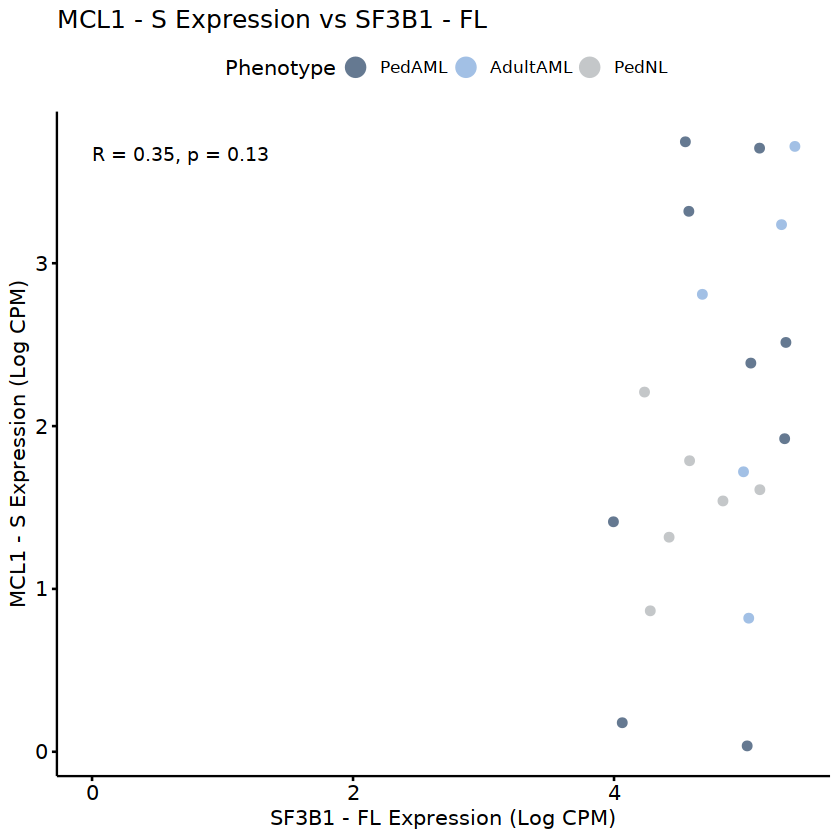

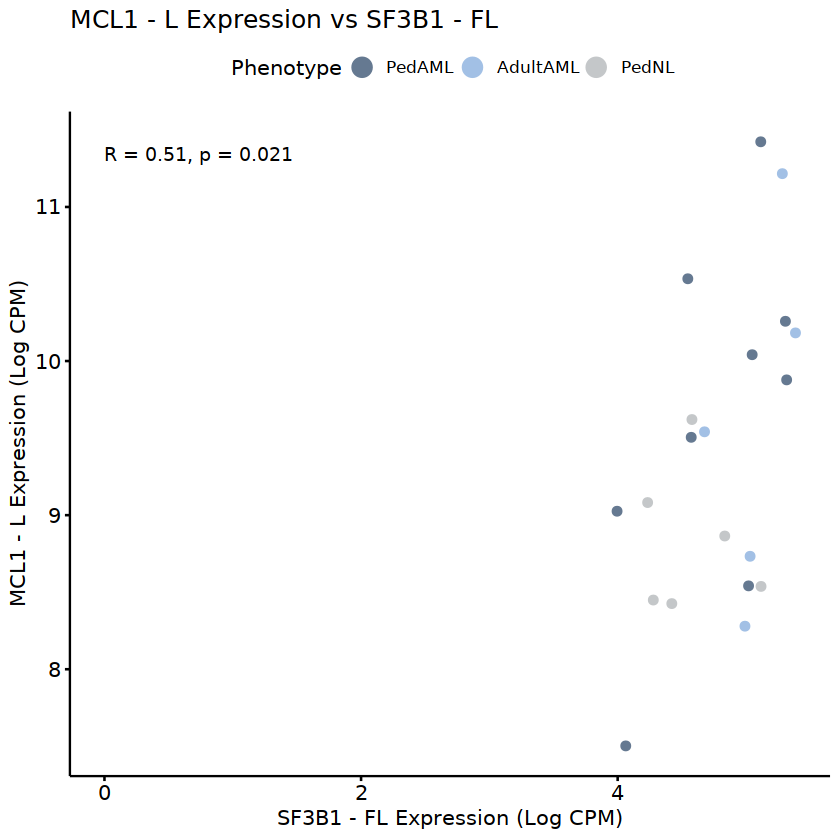

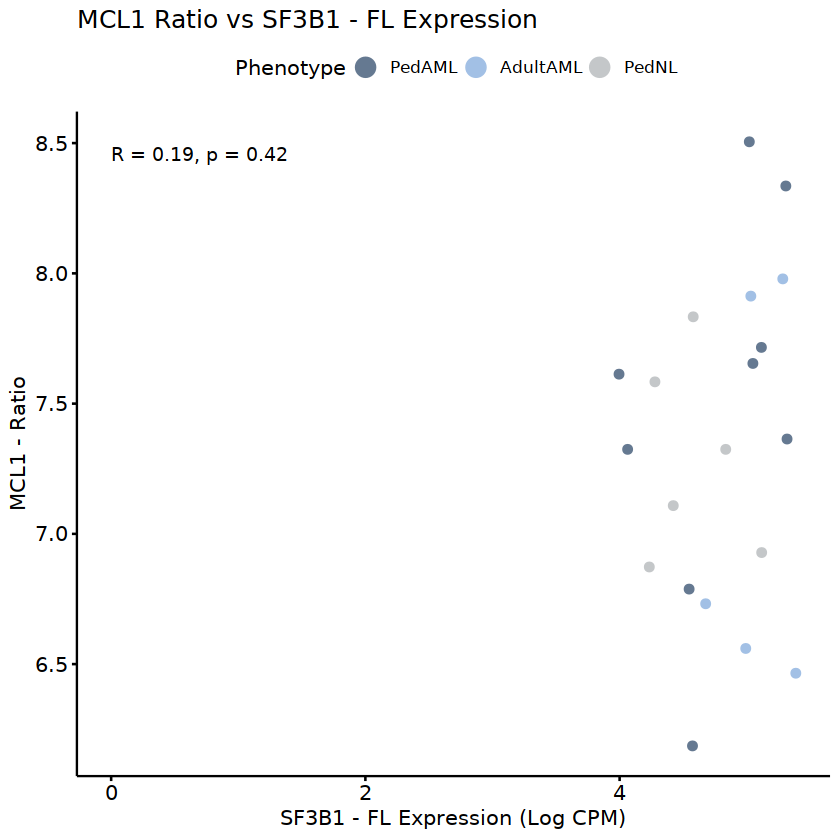

In [119]:
ggscatter(X.tx.lcpm.unfilt.Prog.df2, x="SF3B1", y="MCL1.S", color="Phenotype", palette=c("#657991","#A2C0E5", "#C4C7C9"),
          #size=c(3.5,3.5)[lcpm2.tmpCor.All$Cell.type],
          #shape = c(17,15)[lcpm2.tmpCor.All$Cell.type],
          title = "MCL1 - S Expression vs SF3B1 - FL") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("MCL1 - S Expression (Log CPM)") + xlab("SF3B1 - FL Expression (Log CPM)") + 
          stat_cor(output.type = "text", label.x = 0, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))

ggscatter(X.tx.lcpm.unfilt.Prog.df2, x="SF3B1", y="MCL1.L", color="Phenotype", palette=c("#657991","#A2C0E5", "#C4C7C9"),
          #size=c(3.5,3.5)[lcpm2.tmpCor.All$Cell.type],
          #shape = c(17,15)[lcpm2.tmpCor.All$Cell.type],
          title = "MCL1 - L Expression vs SF3B1 - FL") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("MCL1 - L Expression (Log CPM)") + xlab("SF3B1 - FL Expression (Log CPM)") + 
          stat_cor(output.type = "text", label.x = 0, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))

ggscatter(X.tx.lcpm.unfilt.Prog.df2, x="SF3B1", y="MCL1.ratio", color="Phenotype", palette=c("#657991","#A2C0E5", "#C4C7C9"),
          #size=c(3.5,3.5)[lcpm2.tmpCor.All$Cell.type],
          #shape = c(17,15)[lcpm2.tmpCor.All$Cell.type],
          title = "MCL1 Ratio vs SF3B1 - FL Expression") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("MCL1 - Ratio") + xlab("SF3B1 - FL Expression (Log CPM)") + 
          stat_cor(output.type = "text", label.x = 0, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))


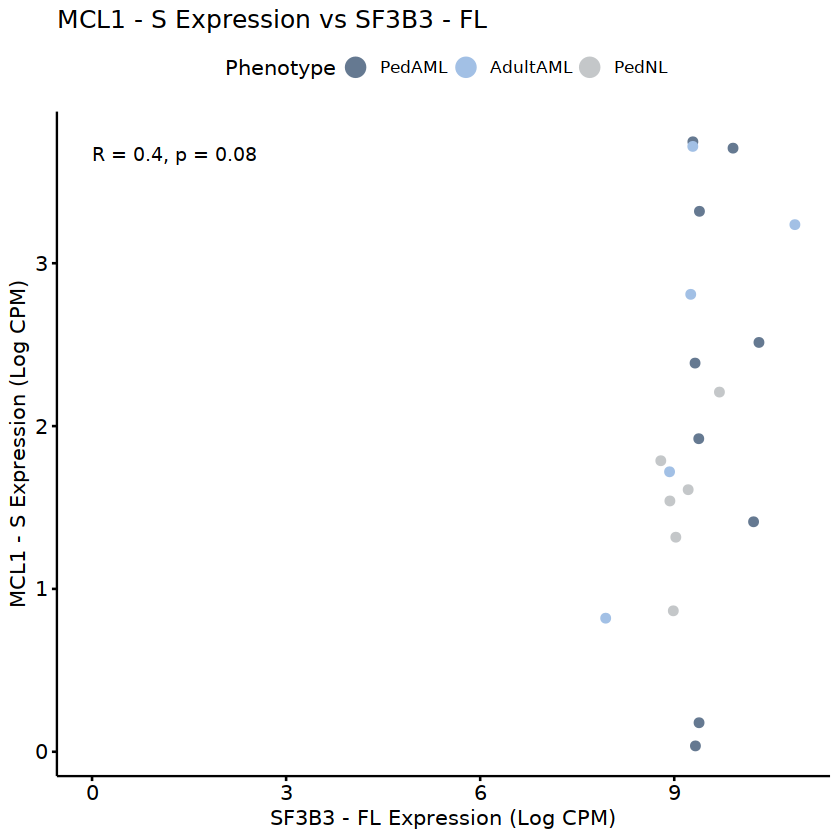

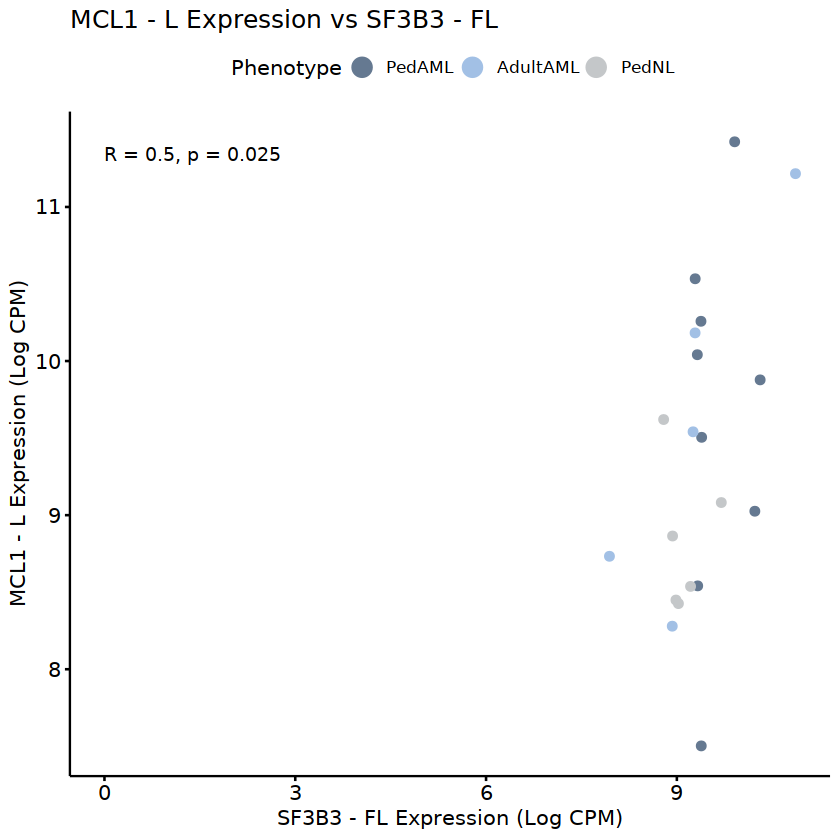

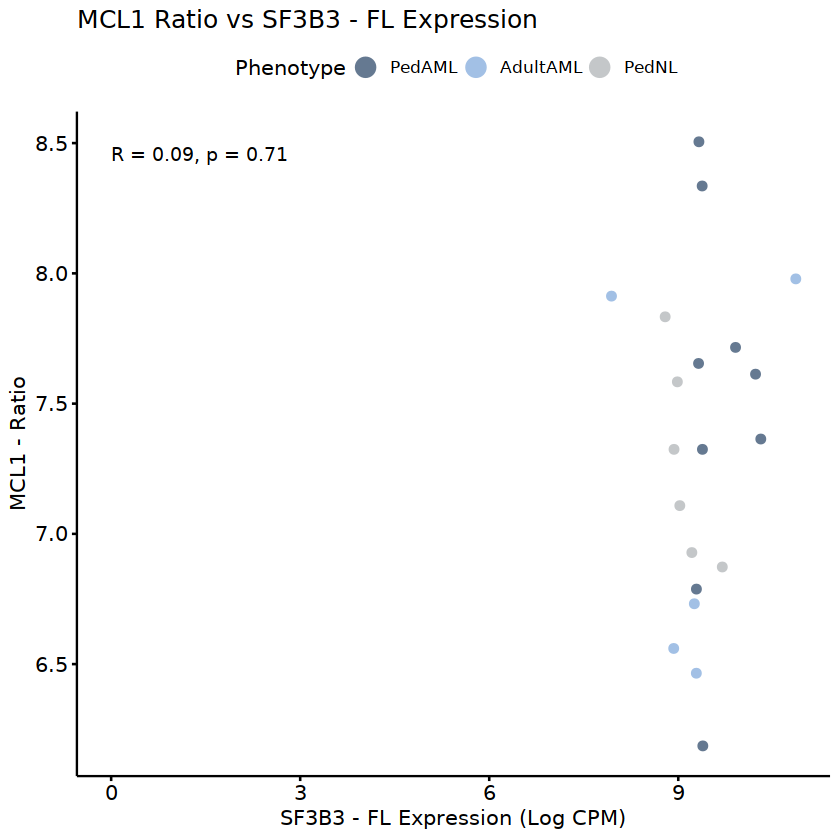

In [120]:
ggscatter(X.tx.lcpm.unfilt.Prog.df2, x="SF3B3", y="MCL1.S", color="Phenotype", palette=c("#657991","#A2C0E5", "#C4C7C9"),
          #size=c(3.5,3.5)[lcpm2.tmpCor.All$Cell.type],
          #shape = c(17,15)[lcpm2.tmpCor.All$Cell.type],
          title = "MCL1 - S Expression vs SF3B3 - FL") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("MCL1 - S Expression (Log CPM)") + xlab("SF3B3 - FL Expression (Log CPM)") + 
          stat_cor(output.type = "text", label.x = 0, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))

ggscatter(X.tx.lcpm.unfilt.Prog.df2, x="SF3B3", y="MCL1.L", color="Phenotype", palette=c("#657991","#A2C0E5", "#C4C7C9"),
          #size=c(3.5,3.5)[lcpm2.tmpCor.All$Cell.type],
          #shape = c(17,15)[lcpm2.tmpCor.All$Cell.type],
          title = "MCL1 - L Expression vs SF3B3 - FL") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("MCL1 - L Expression (Log CPM)") + xlab("SF3B3 - FL Expression (Log CPM)") + 
          stat_cor(output.type = "text", label.x = 0, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))

ggscatter(X.tx.lcpm.unfilt.Prog.df2, x="SF3B3", y="MCL1.ratio", color="Phenotype", palette=c("#657991","#A2C0E5", "#C4C7C9"),
          #size=c(3.5,3.5)[lcpm2.tmpCor.All$Cell.type],
          #shape = c(17,15)[lcpm2.tmpCor.All$Cell.type],
          title = "MCL1 Ratio vs SF3B3 - FL Expression") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("MCL1 - Ratio") + xlab("SF3B3 - FL Expression (Log CPM)") + 
          stat_cor(output.type = "text", label.x = 0, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))


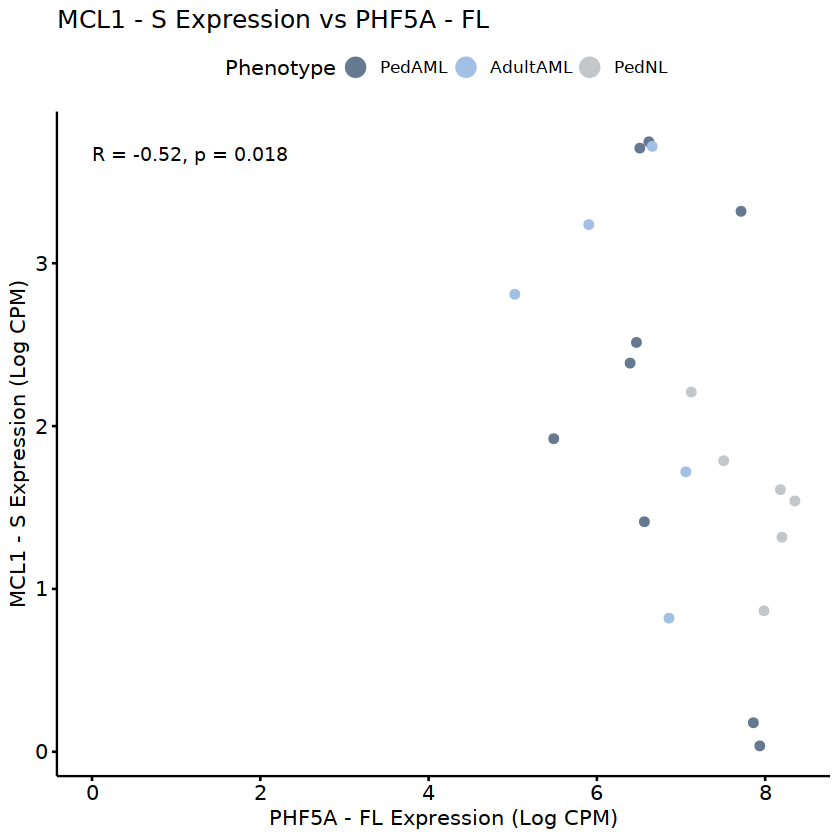

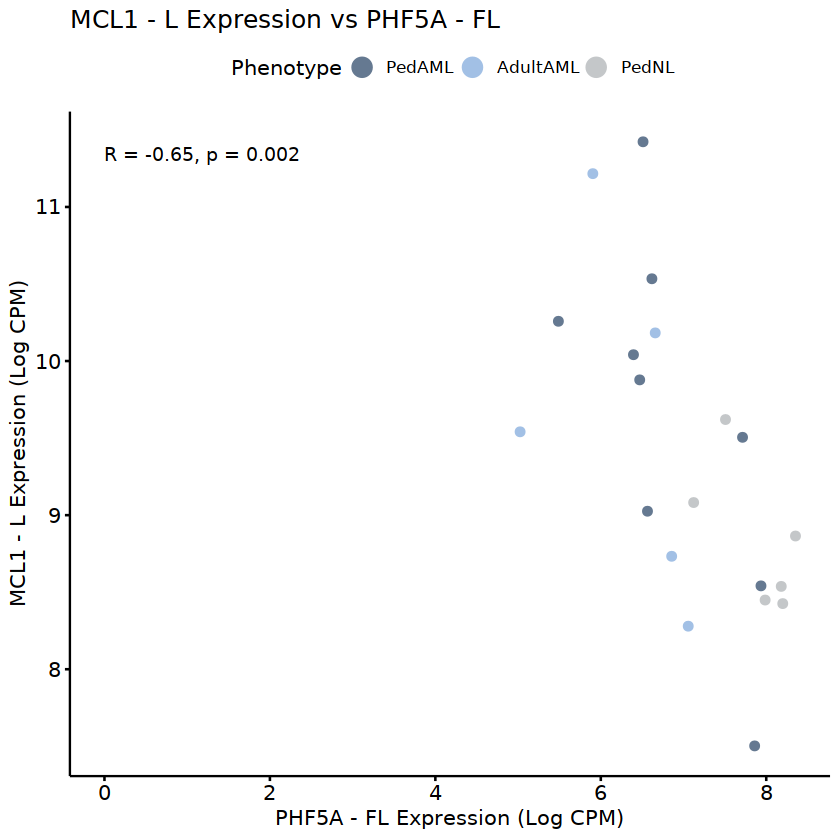

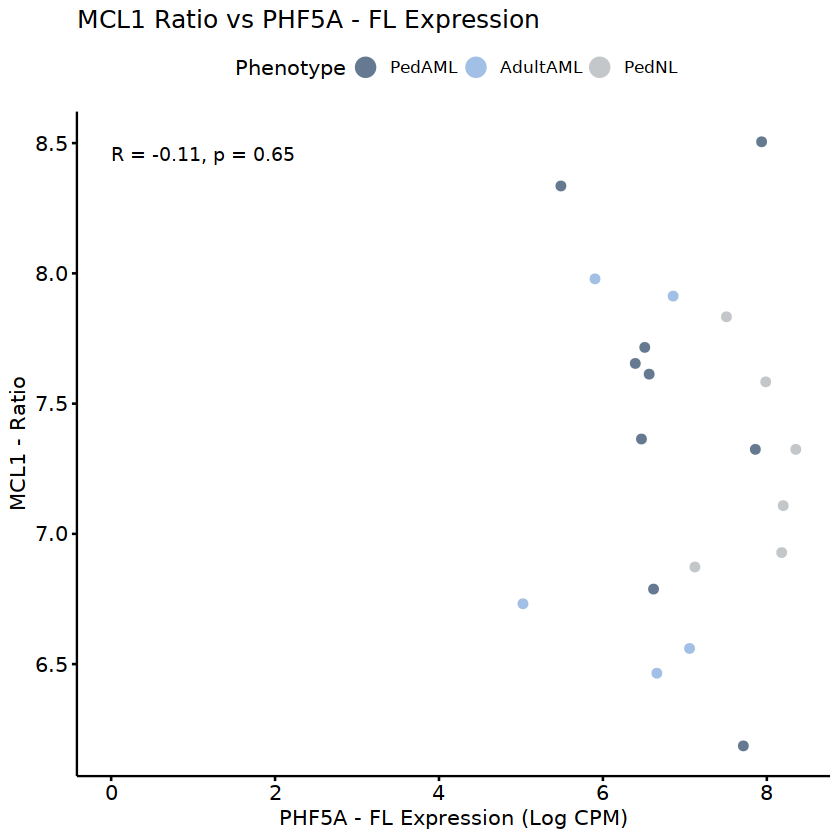

In [118]:
ggscatter(X.tx.lcpm.unfilt.Prog.df2, x="PHF5A", y="MCL1.S", color="Phenotype", palette=c("#657991","#A2C0E5", "#C4C7C9"),
          #size=c(3.5,3.5)[lcpm2.tmpCor.All$Cell.type],
          #shape = c(17,15)[lcpm2.tmpCor.All$Cell.type],
          title = "MCL1 - S Expression vs PHF5A - FL") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("MCL1 - S Expression (Log CPM)") + xlab("PHF5A - FL Expression (Log CPM)") + 
          stat_cor(output.type = "text", label.x = 0, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))

ggscatter(X.tx.lcpm.unfilt.Prog.df2, x="PHF5A", y="MCL1.L", color="Phenotype", palette=c("#657991","#A2C0E5", "#C4C7C9"),
          #size=c(3.5,3.5)[lcpm2.tmpCor.All$Cell.type],
          #shape = c(17,15)[lcpm2.tmpCor.All$Cell.type],
          title = "MCL1 - L Expression vs PHF5A - FL") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("MCL1 - L Expression (Log CPM)") + xlab("PHF5A - FL Expression (Log CPM)") + 
          stat_cor(output.type = "text", label.x = 0, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))

ggscatter(X.tx.lcpm.unfilt.Prog.df2, x="PHF5A", y="MCL1.ratio", color="Phenotype", palette=c("#657991","#A2C0E5", "#C4C7C9"),
          #size=c(3.5,3.5)[lcpm2.tmpCor.All$Cell.type],
          #shape = c(17,15)[lcpm2.tmpCor.All$Cell.type],
          title = "MCL1 Ratio vs PHF5A - FL Expression") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("MCL1 - Ratio") + xlab("PHF5A - FL Expression (Log CPM)") + 
          stat_cor(output.type = "text", label.x = 0, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))


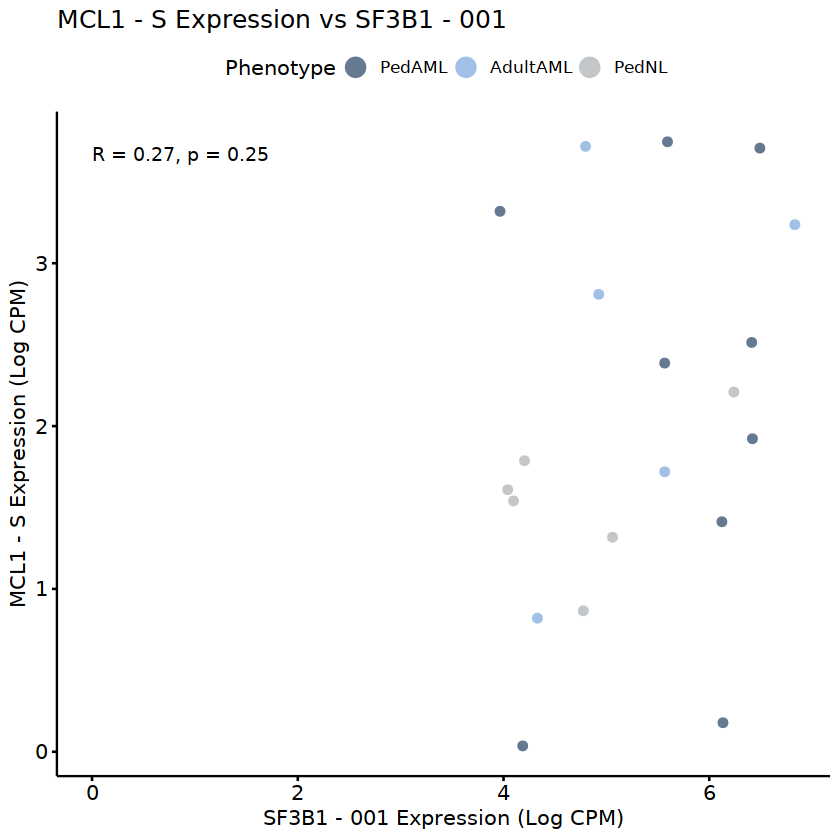

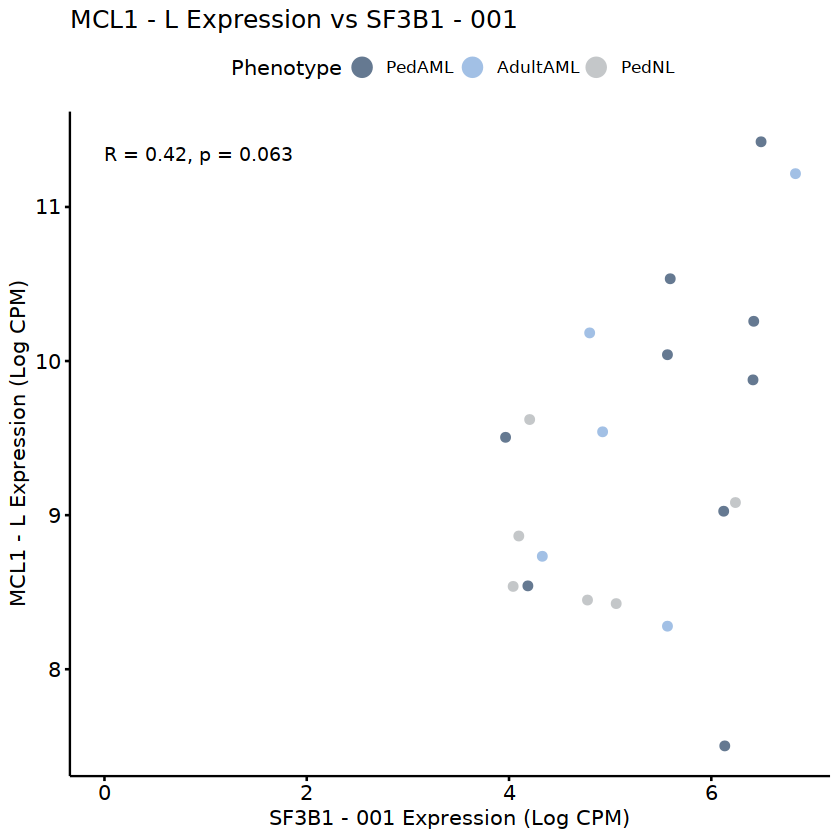

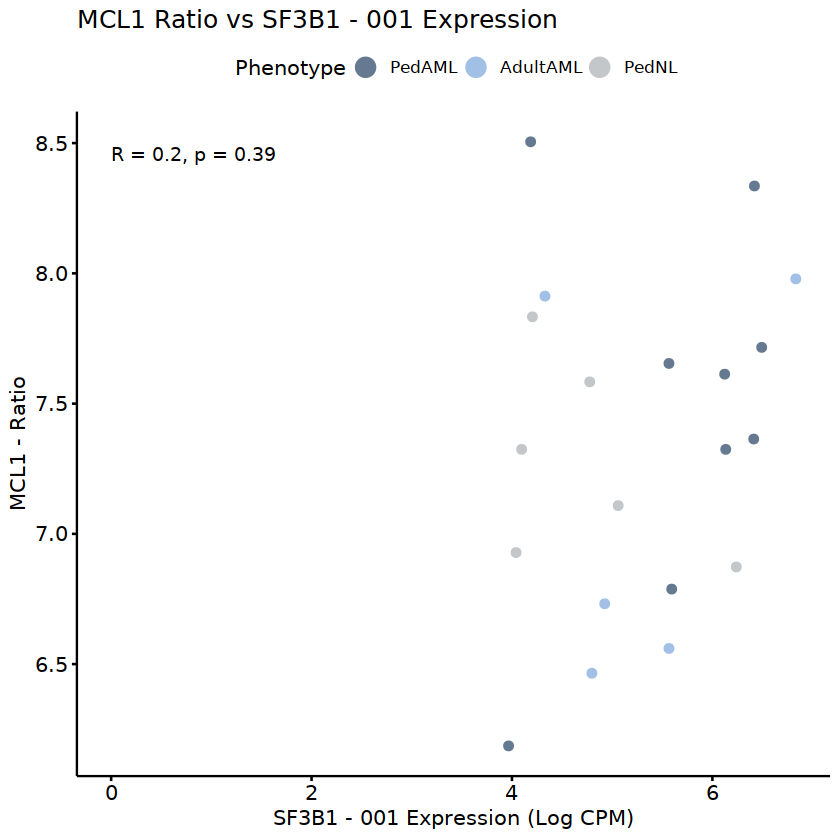

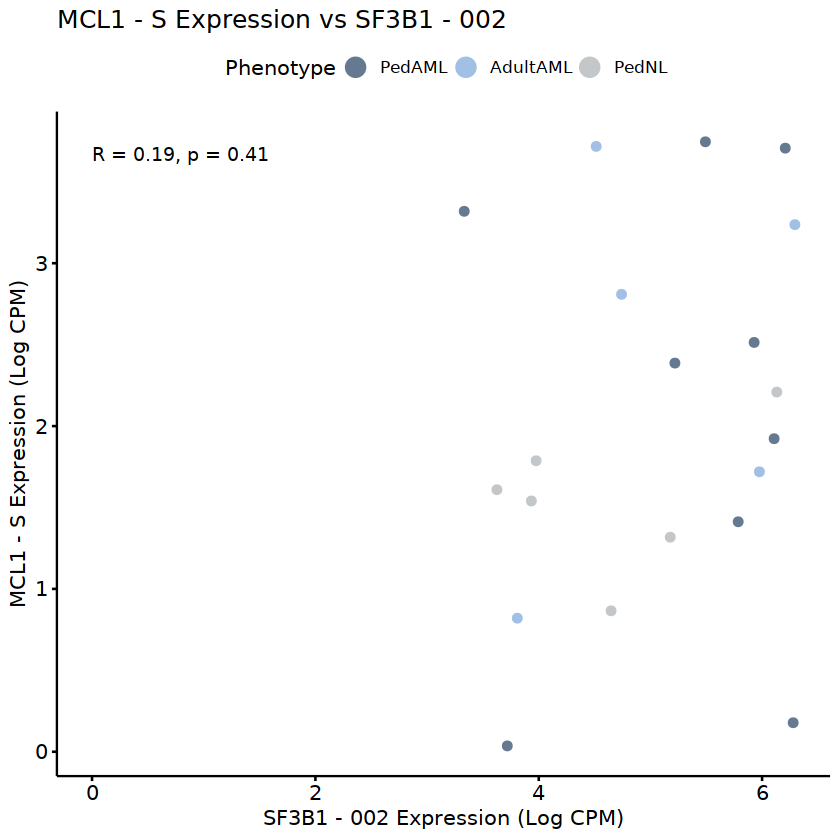

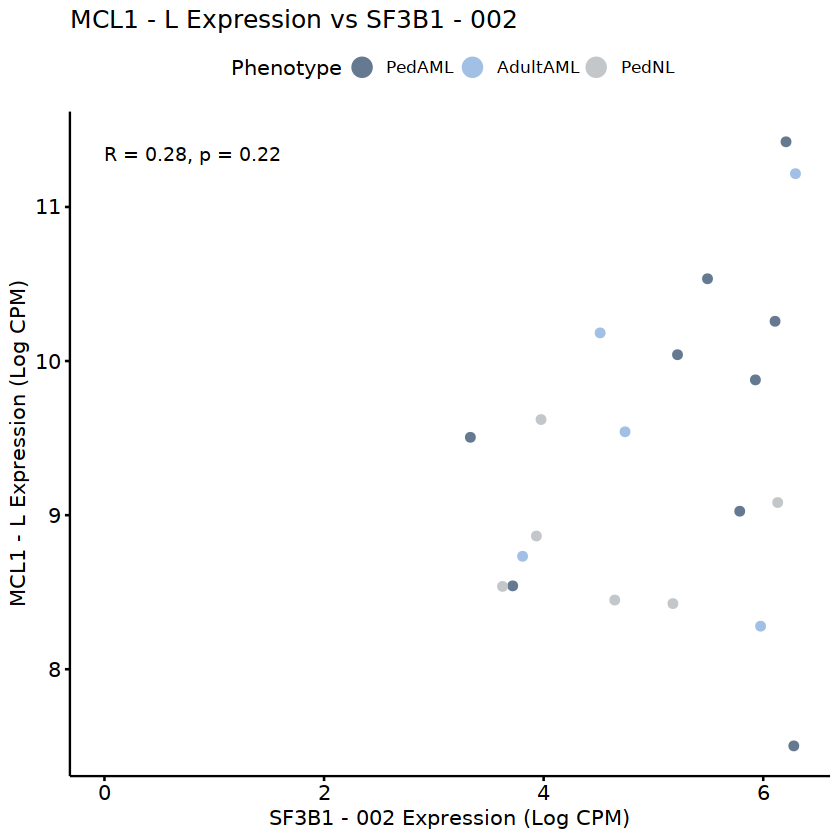

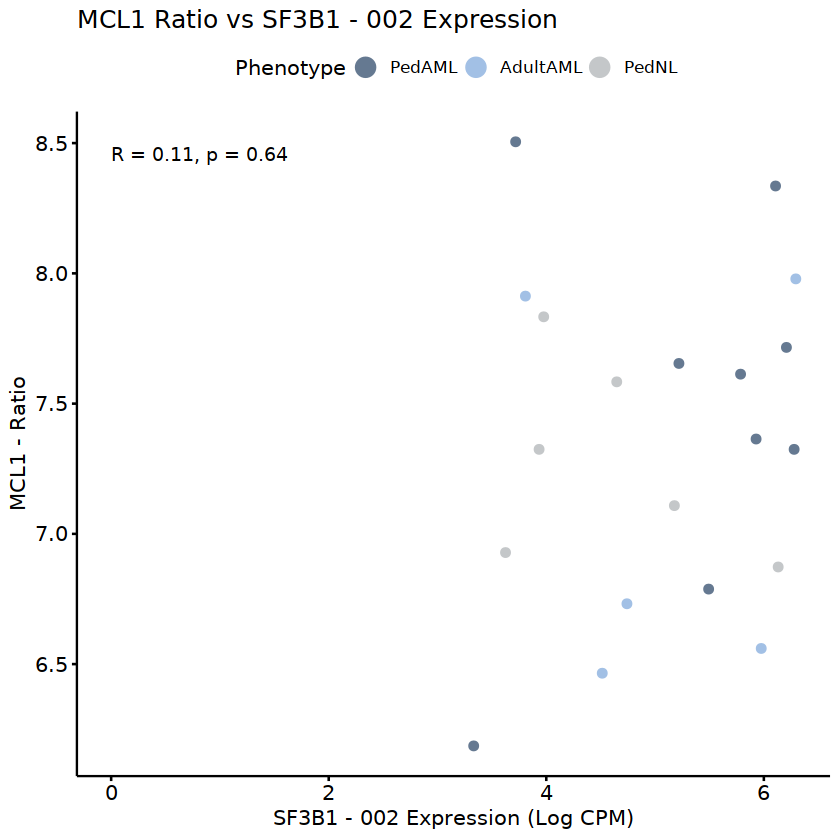

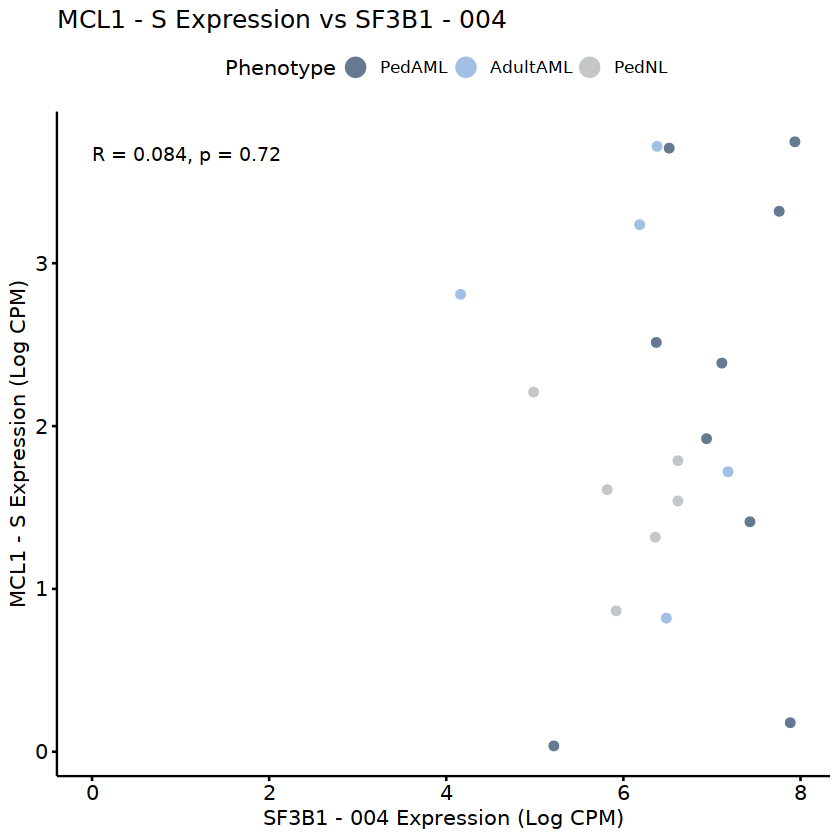

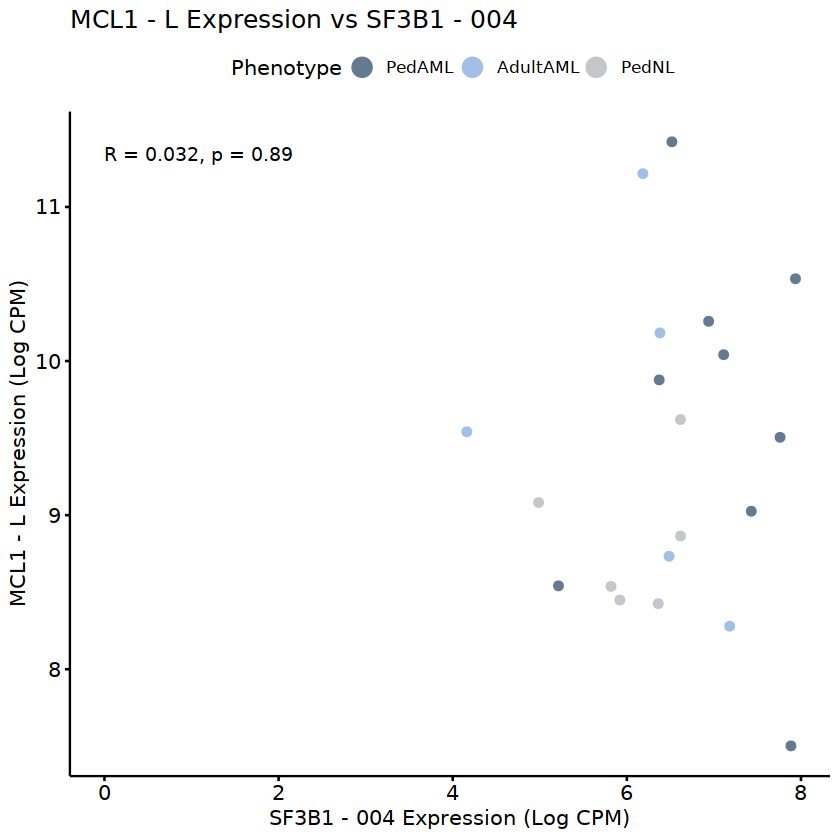

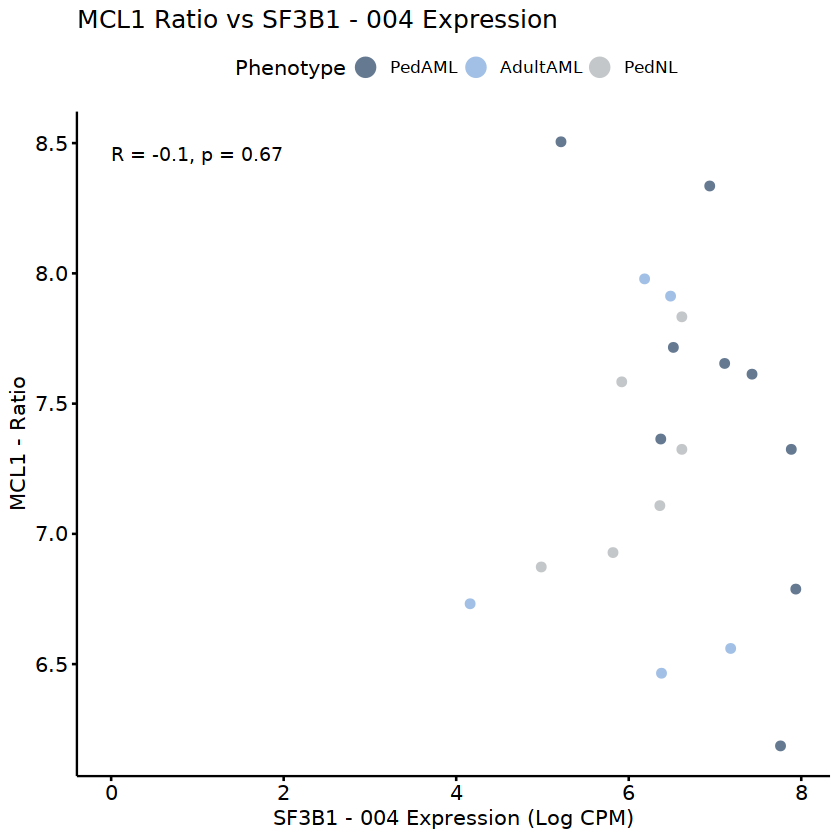

In [116]:
#png("PedAML_Sample_PTBP1expr_vs_ADARp110_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
#pdf("PedAML_Sample_PTBP1expr_vs_ADARp110_ggScatter_02232021.pdf", width = 7, height = 7)
ggscatter(X.tx.lcpm.unfilt.Prog.df2, x="SF3B1.001", y="MCL1.S", color="Phenotype", palette=c("#657991","#A2C0E5", "#C4C7C9"),
          #size=c(3.5,3.5)[lcpm2.tmpCor.All$Cell.type],
          #shape = c(17,15)[lcpm2.tmpCor.All$Cell.type],
          title = "MCL1 - S Expression vs SF3B1 - 001") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("MCL1 - S Expression (Log CPM)") + xlab("SF3B1 - 001 Expression (Log CPM)") + 
          stat_cor(output.type = "text", label.x = 0, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))
#dev.off()

ggscatter(X.tx.lcpm.unfilt.Prog.df2, x="SF3B1.001", y="MCL1.L", color="Phenotype", palette=c("#657991","#A2C0E5", "#C4C7C9"),
          #size=c(3.5,3.5)[lcpm2.tmpCor.All$Cell.type],
          #shape = c(17,15)[lcpm2.tmpCor.All$Cell.type],
          title = "MCL1 - L Expression vs SF3B1 - 001") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("MCL1 - L Expression (Log CPM)") + xlab("SF3B1 - 001 Expression (Log CPM)") + 
          stat_cor(output.type = "text", label.x = 0, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))

ggscatter(X.tx.lcpm.unfilt.Prog.df2, x="SF3B1.001", y="MCL1.ratio", color="Phenotype", palette=c("#657991","#A2C0E5", "#C4C7C9"),
          #size=c(3.5,3.5)[lcpm2.tmpCor.All$Cell.type],
          #shape = c(17,15)[lcpm2.tmpCor.All$Cell.type],
          title = "MCL1 Ratio vs SF3B1 - 001 Expression") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("MCL1 - Ratio") + xlab("SF3B1 - 001 Expression (Log CPM)") + 
          stat_cor(output.type = "text", label.x = 0, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))

ggscatter(X.tx.lcpm.unfilt.Prog.df2, x="SF3B1.002", y="MCL1.S", color="Phenotype", palette=c("#657991","#A2C0E5", "#C4C7C9"),
          #size=c(3.5,3.5)[lcpm2.tmpCor.All$Cell.type],
          #shape = c(17,15)[lcpm2.tmpCor.All$Cell.type],
          title = "MCL1 - S Expression vs SF3B1 - 002") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("MCL1 - S Expression (Log CPM)") + xlab("SF3B1 - 002 Expression (Log CPM)") + 
          stat_cor(output.type = "text", label.x = 0, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))
#dev.off()

ggscatter(X.tx.lcpm.unfilt.Prog.df2, x="SF3B1.002", y="MCL1.L", color="Phenotype", palette=c("#657991","#A2C0E5", "#C4C7C9"),
          #size=c(3.5,3.5)[lcpm2.tmpCor.All$Cell.type],
          #shape = c(17,15)[lcpm2.tmpCor.All$Cell.type],
          title = "MCL1 - L Expression vs SF3B1 - 002") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("MCL1 - L Expression (Log CPM)") + xlab("SF3B1 - 002 Expression (Log CPM)") + 
          stat_cor(output.type = "text", label.x = 0, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))

ggscatter(X.tx.lcpm.unfilt.Prog.df2, x="SF3B1.002", y="MCL1.ratio", color="Phenotype", palette=c("#657991","#A2C0E5", "#C4C7C9"),
          #size=c(3.5,3.5)[lcpm2.tmpCor.All$Cell.type],
          #shape = c(17,15)[lcpm2.tmpCor.All$Cell.type],
          title = "MCL1 Ratio vs SF3B1 - 002 Expression") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("MCL1 - Ratio") + xlab("SF3B1 - 002 Expression (Log CPM)") + 
          stat_cor(output.type = "text", label.x = 0, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))

ggscatter(X.tx.lcpm.unfilt.Prog.df2, x="SF3B1.004", y="MCL1.S", color="Phenotype", palette=c("#657991","#A2C0E5", "#C4C7C9"),
          #size=c(3.5,3.5)[lcpm2.tmpCor.All$Cell.type],
          #shape = c(17,15)[lcpm2.tmpCor.All$Cell.type],
          title = "MCL1 - S Expression vs SF3B1 - 004") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("MCL1 - S Expression (Log CPM)") + xlab("SF3B1 - 004 Expression (Log CPM)") + 
          stat_cor(output.type = "text", label.x = 0, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))
#dev.off()

ggscatter(X.tx.lcpm.unfilt.Prog.df2, x="SF3B1.004", y="MCL1.L", color="Phenotype", palette=c("#657991","#A2C0E5", "#C4C7C9"),
          #size=c(3.5,3.5)[lcpm2.tmpCor.All$Cell.type],
          #shape = c(17,15)[lcpm2.tmpCor.All$Cell.type],
          title = "MCL1 - L Expression vs SF3B1 - 004") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("MCL1 - L Expression (Log CPM)") + xlab("SF3B1 - 004 Expression (Log CPM)") + 
          stat_cor(output.type = "text", label.x = 0, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))

ggscatter(X.tx.lcpm.unfilt.Prog.df2, x="SF3B1.004", y="MCL1.ratio", color="Phenotype", palette=c("#657991","#A2C0E5", "#C4C7C9"),
          #size=c(3.5,3.5)[lcpm2.tmpCor.All$Cell.type],
          #shape = c(17,15)[lcpm2.tmpCor.All$Cell.type],
          title = "MCL1 Ratio vs SF3B1 - 004 Expression") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("MCL1 - Ratio") + xlab("SF3B1 - 004 Expression (Log CPM)") + 
          stat_cor(output.type = "text", label.x = 0, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))



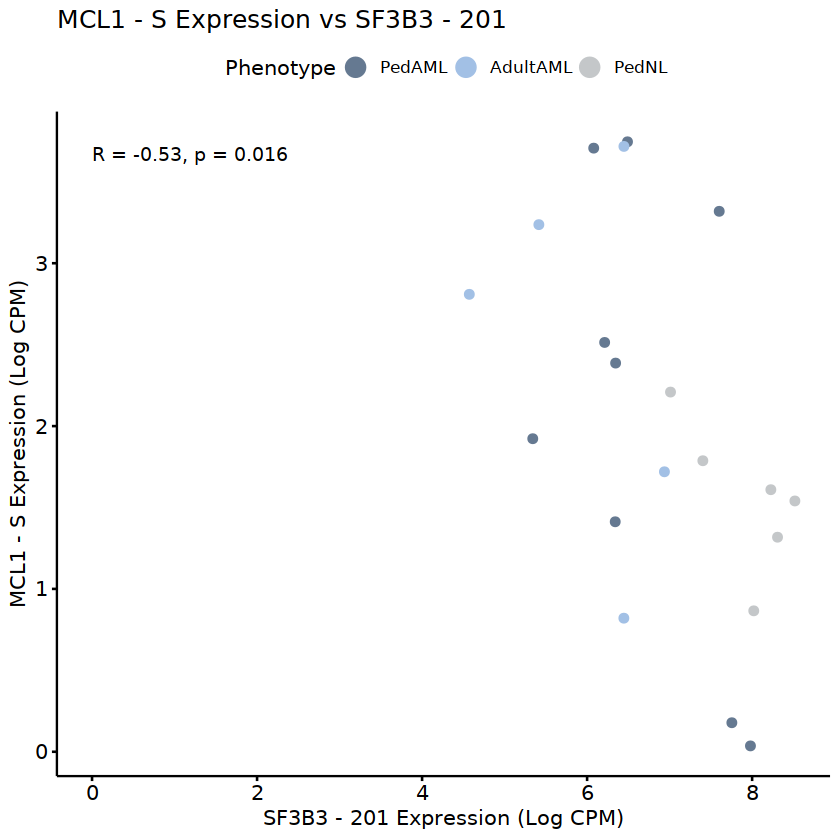

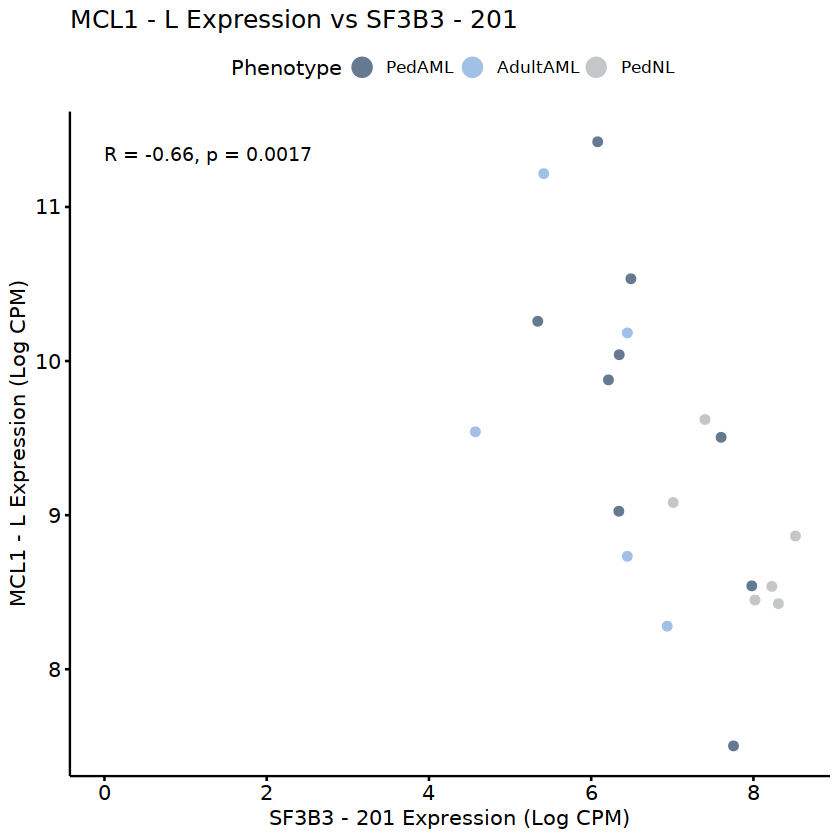

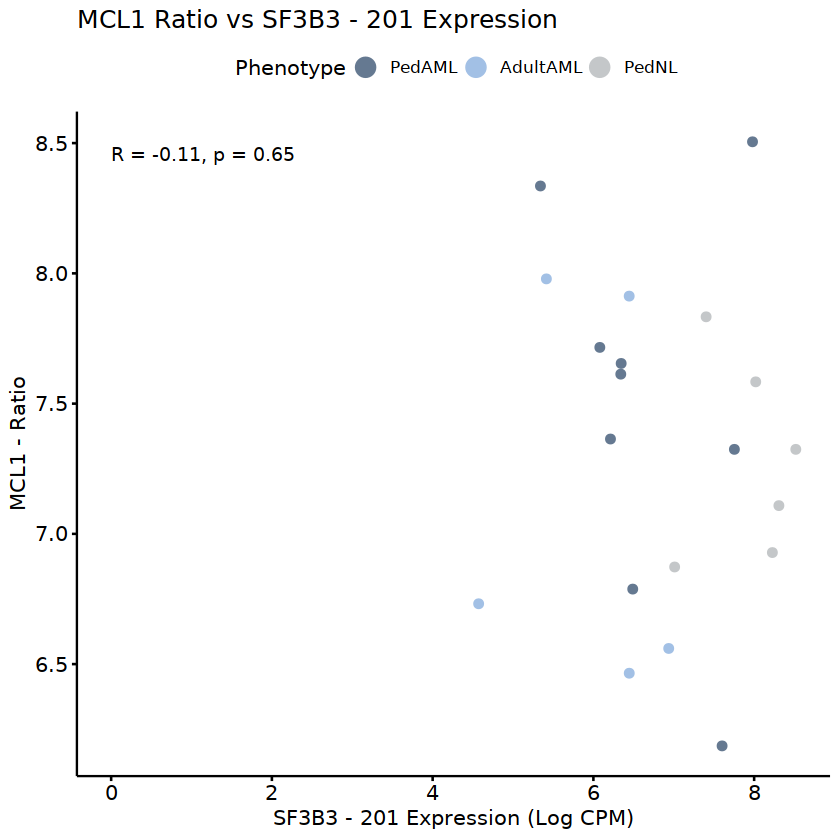

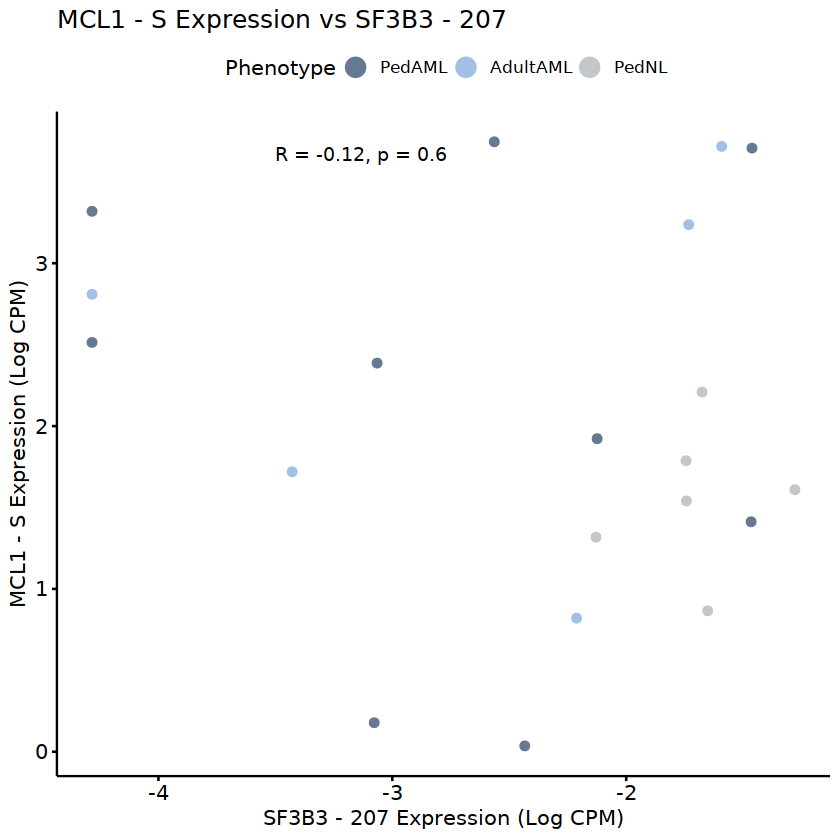

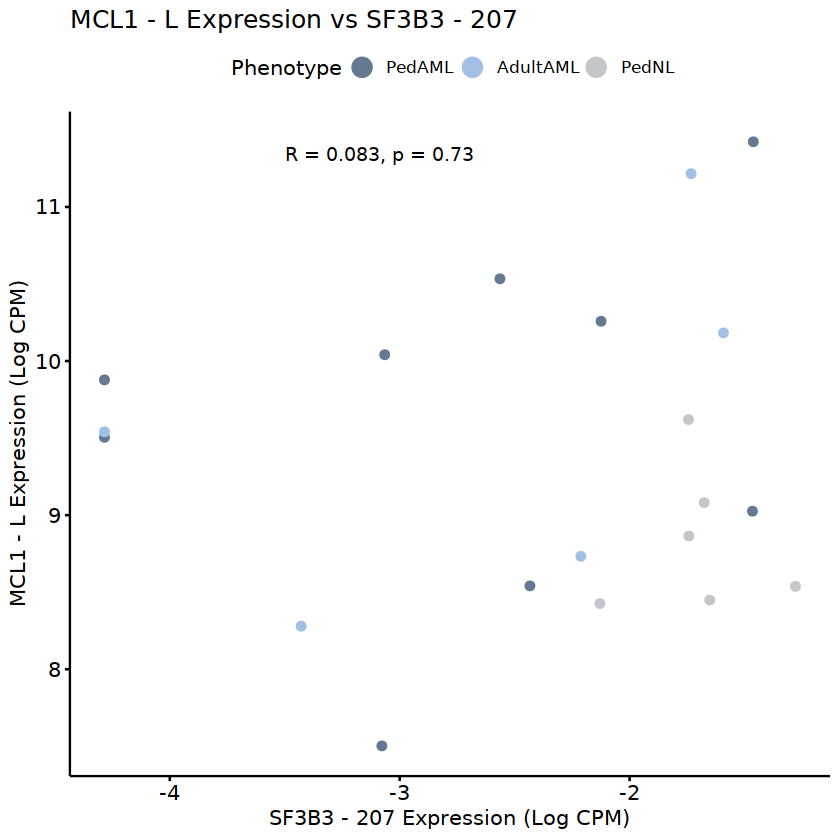

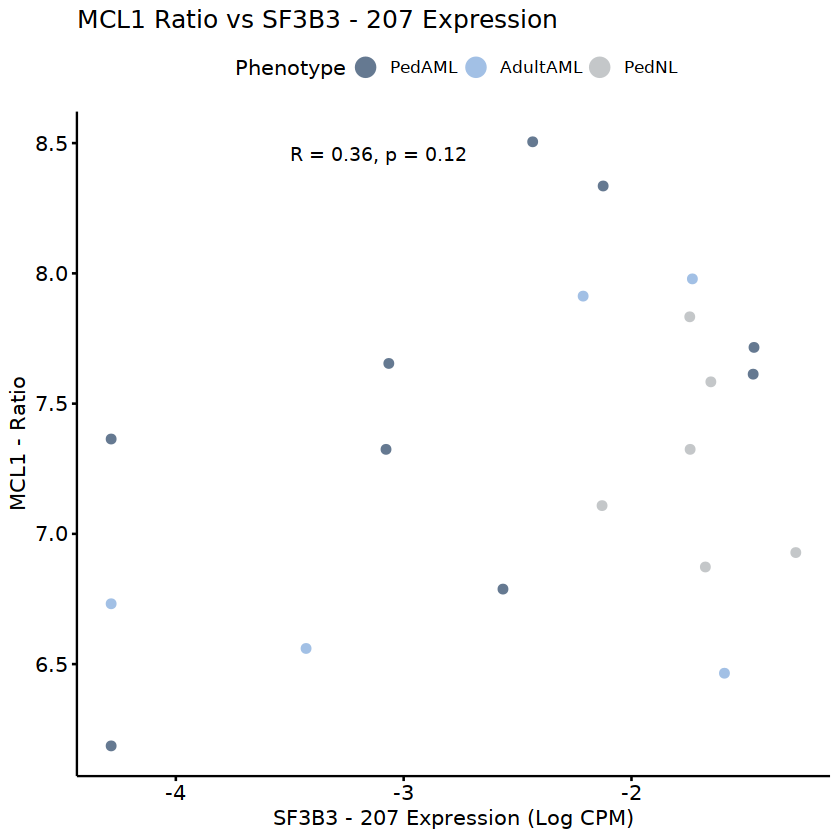

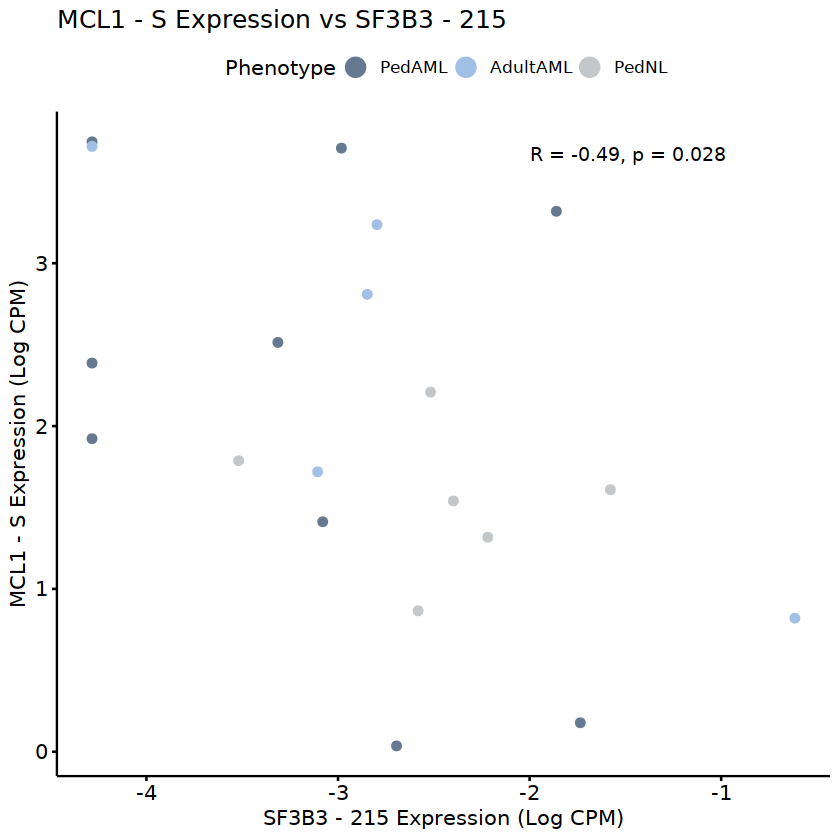

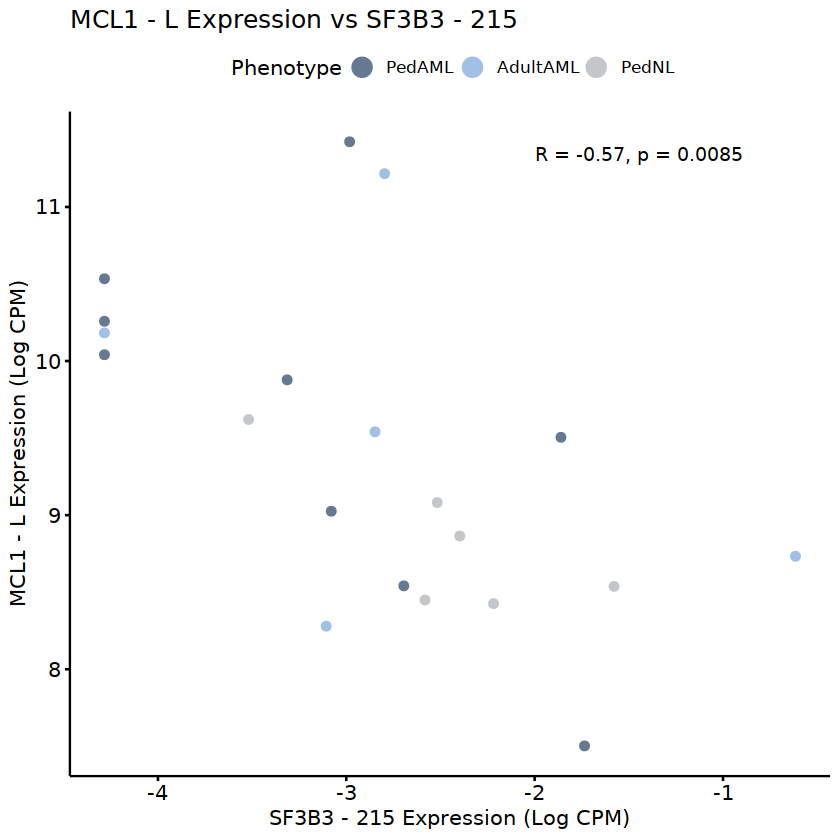

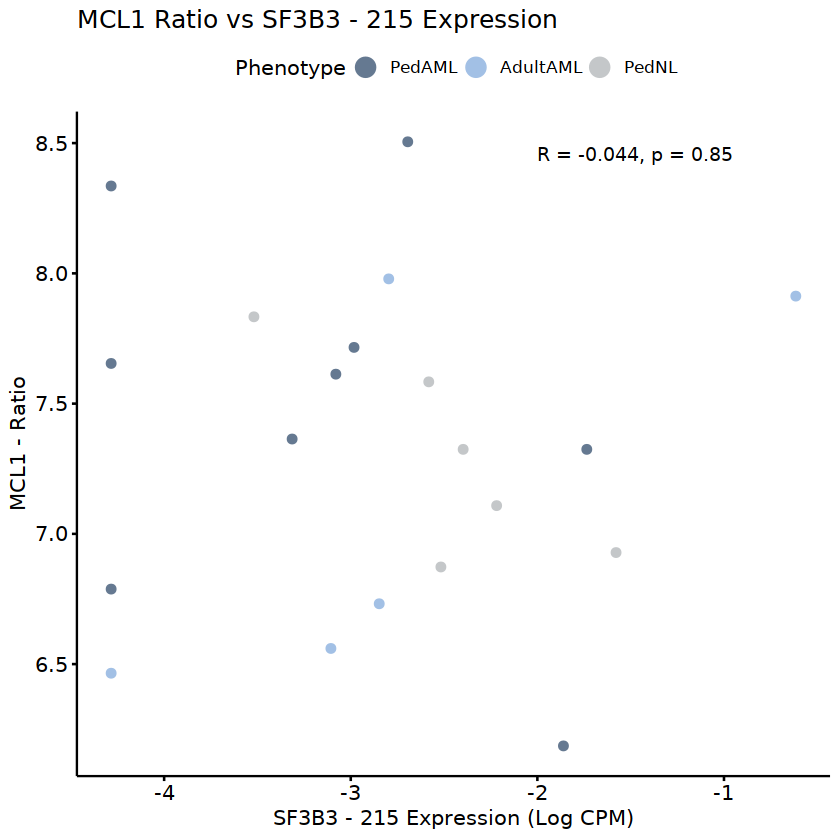

In [122]:
#png("PedAML_Sample_PTBP1expr_vs_ADARp110_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
#pdf("PedAML_Sample_PTBP1expr_vs_ADARp110_ggScatter_02232021.pdf", width = 7, height = 7)
ggscatter(X.tx.lcpm.unfilt.Prog.df2, x="SF3B3.201", y="MCL1.S", color="Phenotype", palette=c("#657991","#A2C0E5", "#C4C7C9"),
          #size=c(3.5,3.5)[lcpm2.tmpCor.All$Cell.type],
          #shape = c(17,15)[lcpm2.tmpCor.All$Cell.type],
          title = "MCL1 - S Expression vs SF3B3 - 201") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("MCL1 - S Expression (Log CPM)") + xlab("SF3B3 - 201 Expression (Log CPM)") + 
          stat_cor(output.type = "text", label.x = 0, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))
#dev.off()

ggscatter(X.tx.lcpm.unfilt.Prog.df2, x="SF3B3.201", y="MCL1.L", color="Phenotype", palette=c("#657991","#A2C0E5", "#C4C7C9"),
          #size=c(3.5,3.5)[lcpm2.tmpCor.All$Cell.type],
          #shape = c(17,15)[lcpm2.tmpCor.All$Cell.type],
          title = "MCL1 - L Expression vs SF3B3 - 201") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("MCL1 - L Expression (Log CPM)") + xlab("SF3B3 - 201 Expression (Log CPM)") + 
          stat_cor(output.type = "text", label.x = 0, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))

ggscatter(X.tx.lcpm.unfilt.Prog.df2, x="SF3B3.201", y="MCL1.ratio", color="Phenotype", palette=c("#657991","#A2C0E5", "#C4C7C9"),
          #size=c(3.5,3.5)[lcpm2.tmpCor.All$Cell.type],
          #shape = c(17,15)[lcpm2.tmpCor.All$Cell.type],
          title = "MCL1 Ratio vs SF3B3 - 201 Expression") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("MCL1 - Ratio") + xlab("SF3B3 - 201 Expression (Log CPM)") + 
          stat_cor(output.type = "text", label.x = 0, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))

ggscatter(X.tx.lcpm.unfilt.Prog.df2, x="SF3B3.207", y="MCL1.S", color="Phenotype", palette=c("#657991","#A2C0E5", "#C4C7C9"),
          #size=c(3.5,3.5)[lcpm2.tmpCor.All$Cell.type],
          #shape = c(17,15)[lcpm2.tmpCor.All$Cell.type],
          title = "MCL1 - S Expression vs SF3B3 - 207") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("MCL1 - S Expression (Log CPM)") + xlab("SF3B3 - 207 Expression (Log CPM)") + 
          stat_cor(output.type = "text", label.x = -3.5, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))
#dev.off()

ggscatter(X.tx.lcpm.unfilt.Prog.df2, x="SF3B3.207", y="MCL1.L", color="Phenotype", palette=c("#657991","#A2C0E5", "#C4C7C9"),
          #size=c(3.5,3.5)[lcpm2.tmpCor.All$Cell.type],
          #shape = c(17,15)[lcpm2.tmpCor.All$Cell.type],
          title = "MCL1 - L Expression vs SF3B3 - 207") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("MCL1 - L Expression (Log CPM)") + xlab("SF3B3 - 207 Expression (Log CPM)") + 
          stat_cor(output.type = "text", label.x = -3.5, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))

ggscatter(X.tx.lcpm.unfilt.Prog.df2, x="SF3B3.207", y="MCL1.ratio", color="Phenotype", palette=c("#657991","#A2C0E5", "#C4C7C9"),
          #size=c(3.5,3.5)[lcpm2.tmpCor.All$Cell.type],
          #shape = c(17,15)[lcpm2.tmpCor.All$Cell.type],
          title = "MCL1 Ratio vs SF3B3 - 207 Expression") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("MCL1 - Ratio") + xlab("SF3B3 - 207 Expression (Log CPM)") + 
          stat_cor(output.type = "text", label.x = -3.5, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))

ggscatter(X.tx.lcpm.unfilt.Prog.df2, x="SF3B3.215", y="MCL1.S", color="Phenotype", palette=c("#657991","#A2C0E5", "#C4C7C9"),
          #size=c(3.5,3.5)[lcpm2.tmpCor.All$Cell.type],
          #shape = c(17,15)[lcpm2.tmpCor.All$Cell.type],
          title = "MCL1 - S Expression vs SF3B3 - 215") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("MCL1 - S Expression (Log CPM)") + xlab("SF3B3 - 215 Expression (Log CPM)") + 
          stat_cor(output.type = "text", label.x = -2, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))
#dev.off()

ggscatter(X.tx.lcpm.unfilt.Prog.df2, x="SF3B3.215", y="MCL1.L", color="Phenotype", palette=c("#657991","#A2C0E5", "#C4C7C9"),
          #size=c(3.5,3.5)[lcpm2.tmpCor.All$Cell.type],
          #shape = c(17,15)[lcpm2.tmpCor.All$Cell.type],
          title = "MCL1 - L Expression vs SF3B3 - 215") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("MCL1 - L Expression (Log CPM)") + xlab("SF3B3 - 215 Expression (Log CPM)") + 
          stat_cor(output.type = "text", label.x = -2, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))

ggscatter(X.tx.lcpm.unfilt.Prog.df2, x="SF3B3.215", y="MCL1.ratio", color="Phenotype", palette=c("#657991","#A2C0E5", "#C4C7C9"),
          #size=c(3.5,3.5)[lcpm2.tmpCor.All$Cell.type],
          #shape = c(17,15)[lcpm2.tmpCor.All$Cell.type],
          title = "MCL1 Ratio vs SF3B3 - 215 Expression") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("MCL1 - Ratio") + xlab("SF3B3 - 215 Expression (Log CPM)") + 
          stat_cor(output.type = "text", label.x = -2, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))



[1] 20 17

[1] 16 17

CD44.012 PTK2B.202 SF3B1.001 SF3B1.002 SF3B1.004
X02id38cellPROGENITORS -4.28397 9.388467  3.965832  3.332685  7.759673 
X06id90cellPROGENITORS -4.28397 9.909712  6.412266  5.928708  6.371443 
X04id78cellPROGENITORS -4.28397 9.173996  5.566387  5.219247  7.112050 
X06id00066PRO          -4.28397 9.068307  6.133182  6.278352  7.884530 
X01x00077xPROGENIT     -4.28397 8.965524  6.419457  6.107626  6.939110 
X03x11379xHPCxxxxx     -4.28397 9.082629  5.593865  5.492421  7.936814 
                       MCL1.S    MCL1.L    BCLX.L   BCL2.L   SF3B3.201
X02id38cellPROGENITORS 3.3190569  9.505143 2.809107 5.150170 7.601276 
X06id90cellPROGENITORS 2.5137680  9.877898 1.646036 5.344852 6.212564 
X04id78cellPROGENITORS 2.3869583 10.041204 4.822160 3.280366 6.345499 
X06id00066PRO          0.1782894  7.502744 4.029040 4.396877 7.754298 
X01x00077xPROGENIT     1.9225697 10.258055 4.268232 3.001261 5.341337 
X03x11379xHPCxxxxx     3.7459695 10.534003 4.938990 5.645227 6.489552 
                       SF3B3.207 SF3B3.215 Phenotype RBFOX2    SF3B1   
X02id38cellPROGENITORS -4.283970 -1.860297 PedAML    -4.384468 4.573327
X06id90cellPROGENITORS -4.283970 -3.314116 PedAML    -4.384468 5.317146
X04id78cellPROGENITORS -3.065155 -4.283970 PedAML    -2.730627 5.048419
X06id00066PRO          -3.077413 -1.735192 PedAML    -4.384468 4.063066
X01x00077xPROGENIT     -2.124306 -4.283970 PedAML    -2.439118 5.307568
X03x11379xHPCxxxxx     -2.564074 -4.283970 PedAML     1.132920 4.546814
                       SF3B3     PHF5A    CellType   
X02id38cellPROGENITORS  9.389722 7.713372 Progenitors
X06id90cellPROGENITORS 10.309667 6.470325 Progenitors
X04id78cellPROGENITORS  9.321969 6.394874 Progenitors
X06id00066PRO           9.383595 7.859848 Progenitors
X01x00077xPROGENIT      9.379188 5.487350 Progenitors
X03x11379xHPCxxxxx      9.288176 6.617707 Progenitors

          
           Progenitors Stem
  PedAML             9    9
  AdultAML           5    4
  PedNL              6    3

Warning message in if (shape %in% colnames(data)) {:
“the condition has length > 1 and only the first element will be used”
Warning message:
“Ignoring unknown aesthetics: shape”


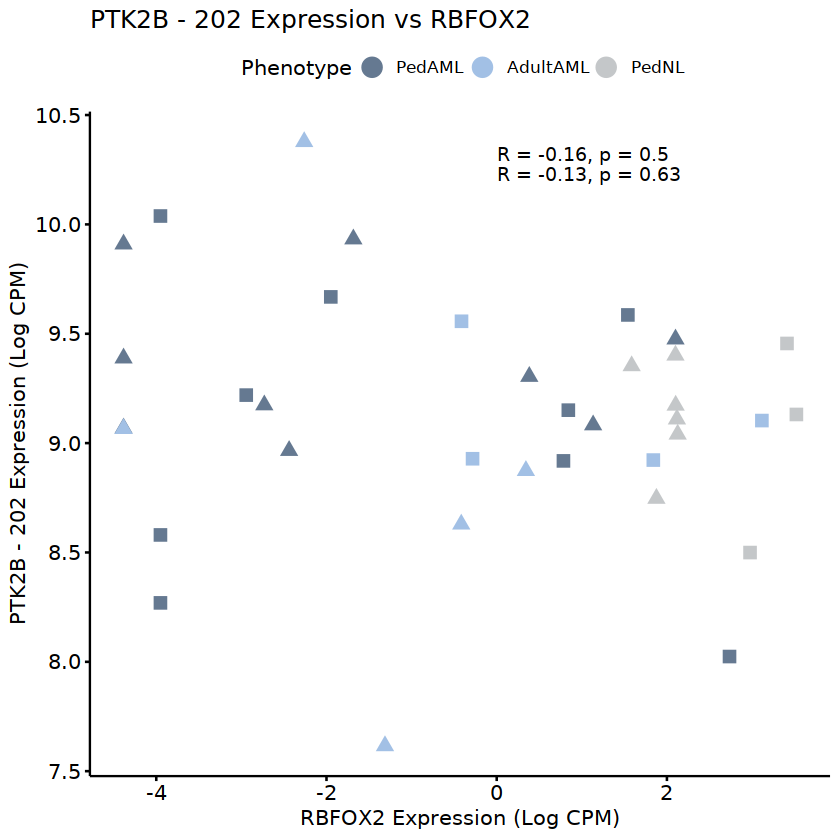

In [110]:
dim(X.tx.lcpm.unfilt.Prog.df2)
dim(X.tx.lcpm.unfilt.Stem.df2)
X.tx.lcpm.unfilt.df2 <- cbind.data.frame(rbind.data.frame(X.tx.lcpm.unfilt.Prog.df2, X.tx.lcpm.unfilt.Stem.df2), 
                                CellType=factor(c(rep("Progenitors", nrow(X.tx.lcpm.unfilt.Prog.df2)), 
                                           rep("Stem", nrow(X.tx.lcpm.unfilt.Stem.df2)))))
#X.tx.lcpm.unfilt.df2b <- X.tx.lcpm.unfilt.df2[,c("CellType", "Phenotype", "RBFOX2", "PTK2B.202")]
#X.tx.lcpm.unfilt.df.m <- melt(X.tx.lcpm.unfilt.df2b)
#head(X.tx.lcpm.unfilt.df.m)
#png("PedAML_Sample_PTBP1expr_vs_ADARp150_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
#pdf("PedAML_Sample_PTBP1expr_vs_ADARp150_ggScatter_03112020.pdf", width = 7, height = 7)
head(X.tx.lcpm.unfilt.df2)
table(X.tx.lcpm.unfilt.df2$Phenotype, X.tx.lcpm.unfilt.df2$CellType)
ggscatter(X.tx.lcpm.unfilt.df2, x="RBFOX2", y="PTK2B.202", color="Phenotype", 
          palette=c("#657991","#A2C0E5", "#C4C7C9"),
          size = c(3.5,3.5)[X.tx.lcpm.unfilt.df2$CellType],
          shape = c(17,15)[X.tx.lcpm.unfilt.df2$CellType],
          title = "PTK2B - 202 Expression vs RBFOX2") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("PTK2B - 202 Expression (Log CPM)") + xlab("RBFOX2 Expression (Log CPM)") + 
          stat_cor(aes(shape=CellType), output.type = "text", label.x = 0, na.rm=TRUE) + 
          #xlim(0,9) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))
#dev.off()
                                         

In [ ]:

#png("PedAML_Sample_PTBP1expr_vs_ADARratio_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
#pdf("PedAML_Sample_PTBP1expr_vs_ADARratio_ggScatter_03022021.pdf", width = 7, height = 7)
ggscatter(lcpm2.tmpCor.All, x="ADARratio", y="PTBP1", color="Phenotype", palette=c("#657991","#A2C0E5", "#C4C7C9"),
          size=c(3.5,3.5)[lcpm2.tmpCor.All$Cell.type],
          shape = c(17,15)[lcpm2.tmpCor.All$Cell.type],
          title = "ADAR Ratio Expression vs PTBP1 Expr") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("PTBP1 Expression (Log CPM)") + xlab("ADAR Ratio") + 
          stat_cor(aes(shape=Cell.type), output.type = "text", label.x = -4, na.rm=TRUE) + 
          #ylim(0,9.5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))
#dev.off()

In [320]:
getwd()

[1] "/mnt/data1/tomw/DeWerf_PedAML_RNASeq/Notebooks"

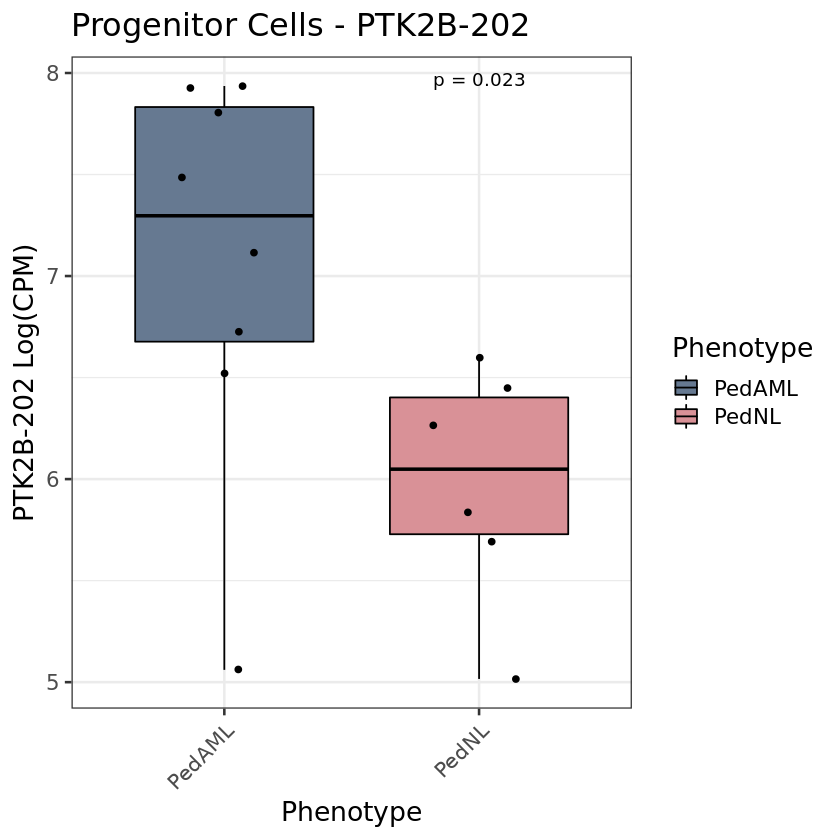

In [250]:
#pdf(file="Holm_Jamieson_Prog_PTK2B_byPhenotype_04142020.pdf", width=7, height=7)
ggboxplot(subset(X.tx.lcpm.Prog.df[-7,], Phenotype != "AdultAML"), x="Phenotype", y="PTK2B.202", add=c("jitter"), fill="Phenotype",
         palette = c("#667991", "#d99197")) + 
    theme_bw(base_size=16) + ylab("PTK2B-202 Log(CPM)") + labs(title="Progenitor Cells - PTK2B-202") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1))+ 
    stat_compare_means(method="t.test", label = "p.format", ref.group="PedAML")
#dev.off()




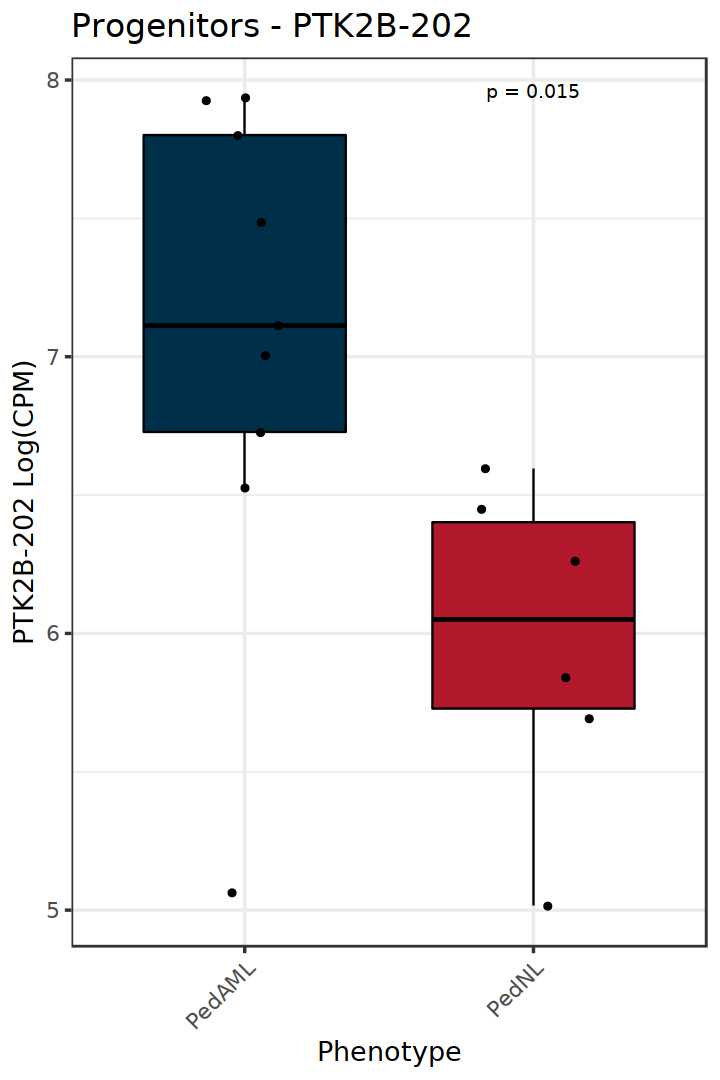

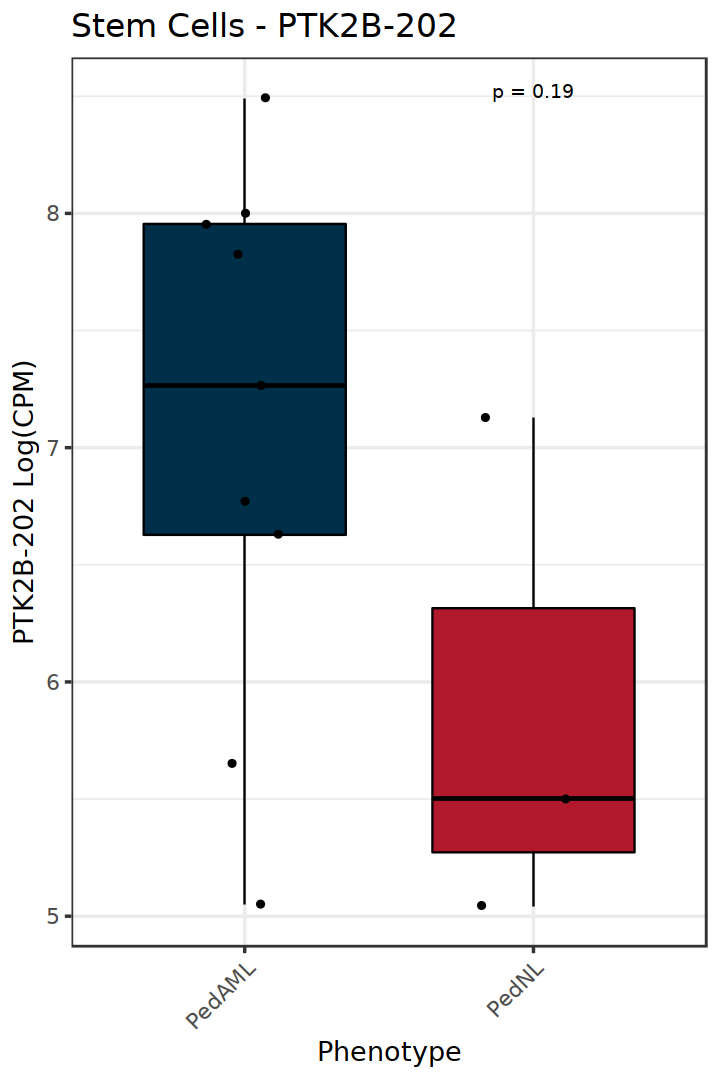

In [162]:
#pdf(file="Holm_Jamieson_Prog_PTK2B_byPhenotype_041452020.pdf", width=7, height=7)
#png(file="Holm_Jamieson_Prog_PTK2B_byPhenotype_08262020.png", width=6, height=9, units = "in", res = 300)
options(repr.plot.width=6, repr.plot.height=9)
ggboxplot(subset(X.tx.lcpm.Prog.df, Phenotype != "AdultAML"), x="Phenotype", y="PTK2B.202", add=c("jitter"), fill="Phenotype",
         palette = c("#003049","#B2182B")) + 
    theme_bw(base_size=16) + ylab("PTK2B-202 Log(CPM)") + labs(title="Progenitors - PTK2B-202") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1), legend.position="none")+ 
    stat_compare_means(method="t.test", label = "p.format", ref.group="PedAML")
#dev.off()


#pdf(file="Holm_Jamieson_Stem_PTK2B_byPhenotype_04192020.pdf", width=7, height=7)
#png(file="Holm_Jamieson_Stem_PTK2B_byPhenotype_08262020.png", width=6, height=9, units = "in", res = 300)
options(repr.plot.width=6, repr.plot.height=9)
ggboxplot(subset(X.tx.lcpm.Stem.df, Phenotype != "AdultAML"), x="Phenotype", y="PTK2B.202", add=c("jitter"), fill="Phenotype",
         palette = c("#003049","#B2182B"), legend="none") + 
    theme_bw(base_size=16) + ylab("PTK2B-202 Log(CPM)") + labs(title="Stem Cells - PTK2B-202") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1), legend.position="none")+ 
    stat_compare_means(method="t.test", label = "p.format", ref.group="PedAML")
#dev.off()

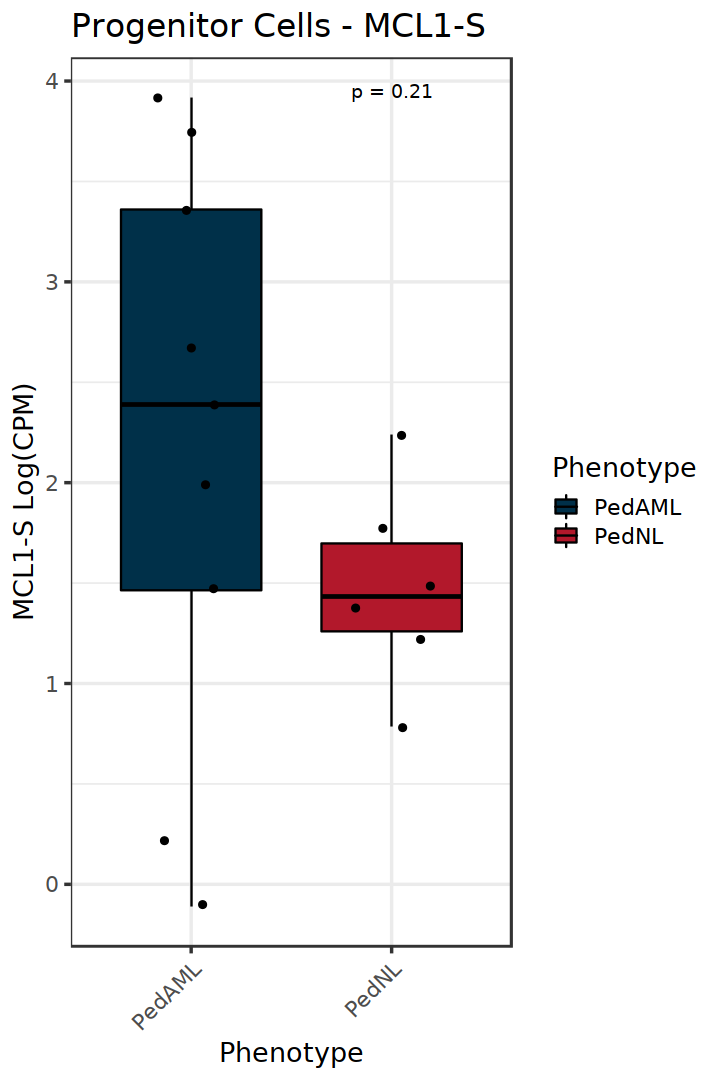

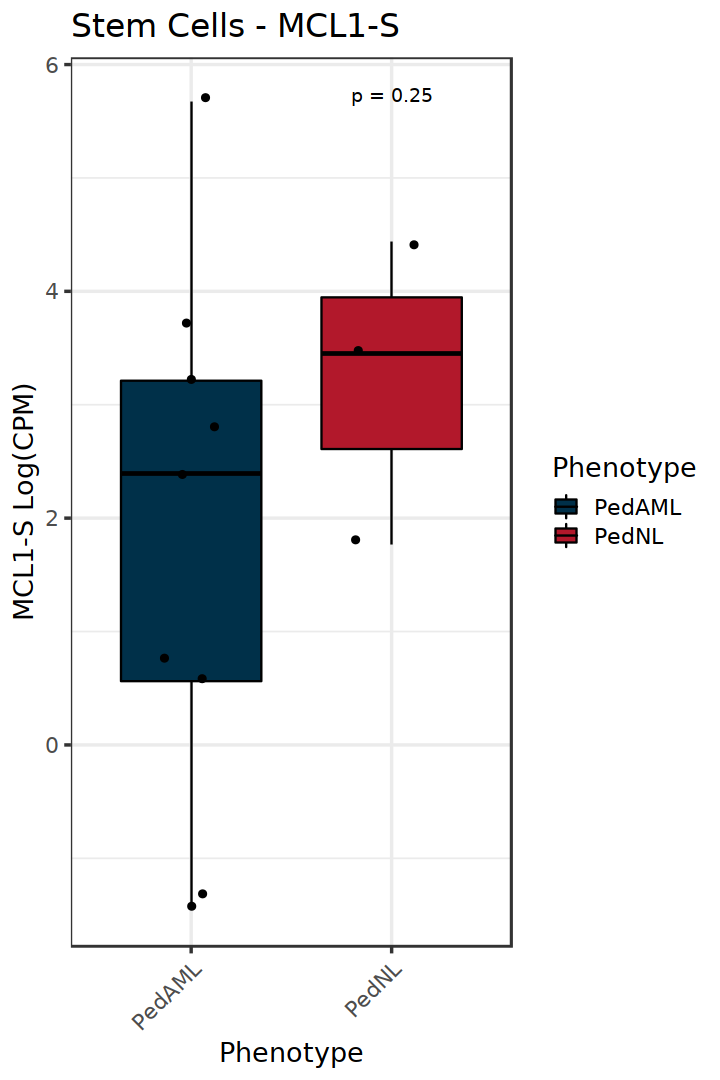

In [35]:
#pdf(file="Holm_Jamieson_Prog_MCL1_S_byPhenotype_04142020.pdf", width=7, height=7)
ggboxplot(subset(X.tx.lcpm.Prog.df, Phenotype != "AdultAML"), x="Phenotype", y="MCL1.S", add=c("jitter"), fill="Phenotype",
         palette = c("#003049","#B2182B")) + 
    theme_bw(base_size=16) + ylab("MCL1-S Log(CPM)") + labs(title="Progenitor Cells - MCL1-S") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1))+ 
    stat_compare_means(method="t.test", label = "p.format", ref.group="PedAML")
#dev.off()

#pdf(file="Holm_Jamieson_Stem_MCL1_S_byPhenotype_041452020.pdf", width=7, height=7)
ggboxplot(subset(X.tx.lcpm.Stem.df, Phenotype != "AdultAML"), x="Phenotype", y="MCL1.S", add=c("jitter"), fill="Phenotype",
         palette = c("#003049","#B2182B")) + 
    theme_bw(base_size=16) + ylab("MCL1-S Log(CPM)") + labs(title="Stem Cells - MCL1-S") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1))+ 
    stat_compare_means(method="t.test", label = "p.format", ref.group="PedAML")
#dev.off()

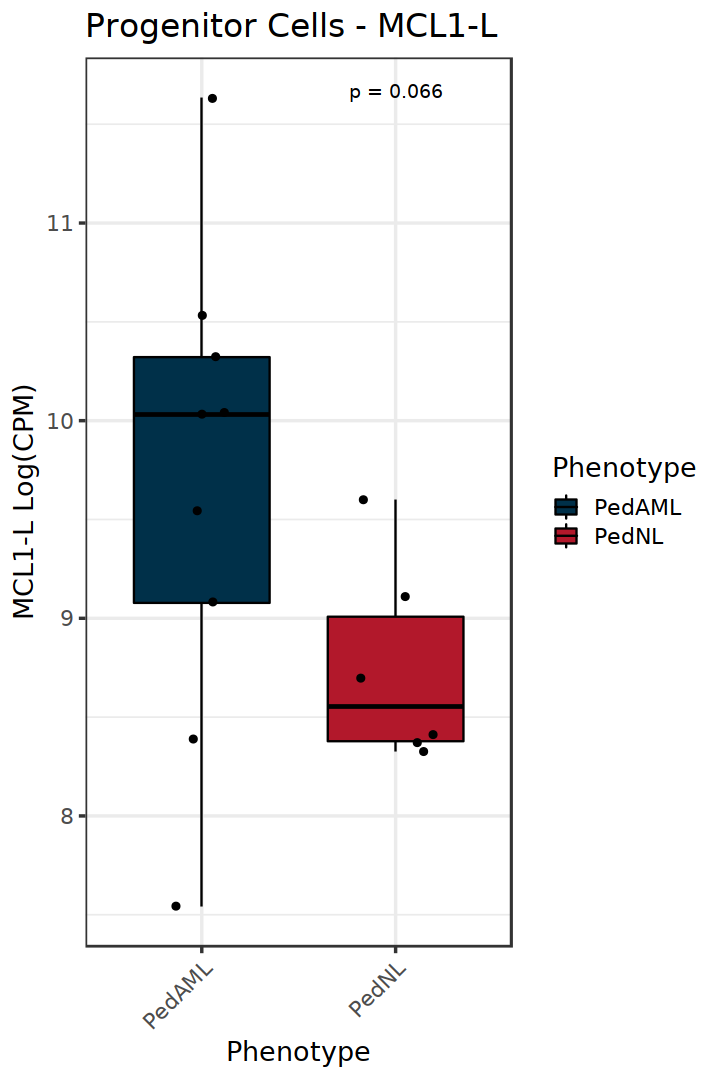

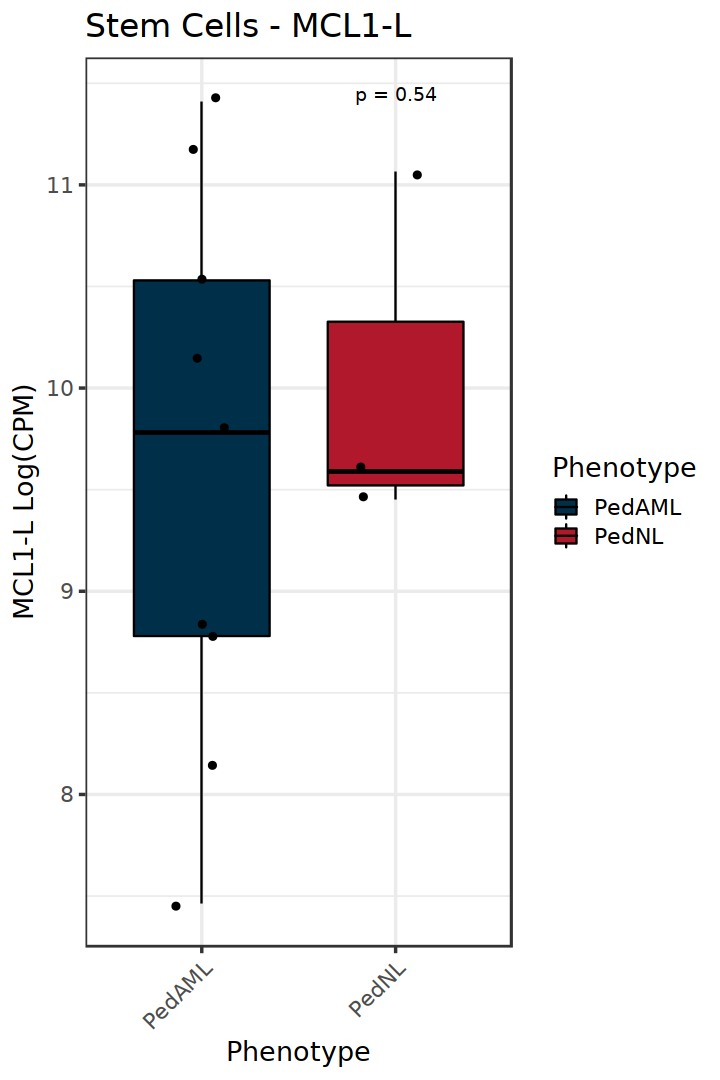

In [163]:
#pdf(file="Holm_Jamieson_Prog_MCL1_L_byPhenotype_04142020.pdf", width=7, height=7)
options(repr.plot.width=6, repr.plot.height=9)
ggboxplot(subset(X.tx.lcpm.Prog.df, Phenotype != "AdultAML"), x="Phenotype", y="MCL1.L", add=c("jitter"), fill="Phenotype",
         palette = c("#003049","#B2182B")) + 
    theme_bw(base_size=16) + ylab("MCL1-L Log(CPM)") + labs(title="Progenitor Cells - MCL1-L") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1))+ 
    stat_compare_means(method="t.test", label = "p.format", ref.group="PedAML")
#dev.off()

#pdf(file="Holm_Jamieson_Stem_MCL1_S_byPhenotype_041452020.pdf", width=7, height=7)
options(repr.plot.width=6, repr.plot.height=9)
ggboxplot(subset(X.tx.lcpm.Stem.df, Phenotype != "AdultAML"), x="Phenotype", y="MCL1.L", add=c("jitter"), fill="Phenotype",
         palette = c("#003049","#B2182B")) + 
    theme_bw(base_size=16) + ylab("MCL1-L Log(CPM)") + labs(title="Stem Cells - MCL1-L") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1))+ 
    stat_compare_means(method="t.test", label = "p.format", ref.group="PedAML")
#dev.off()

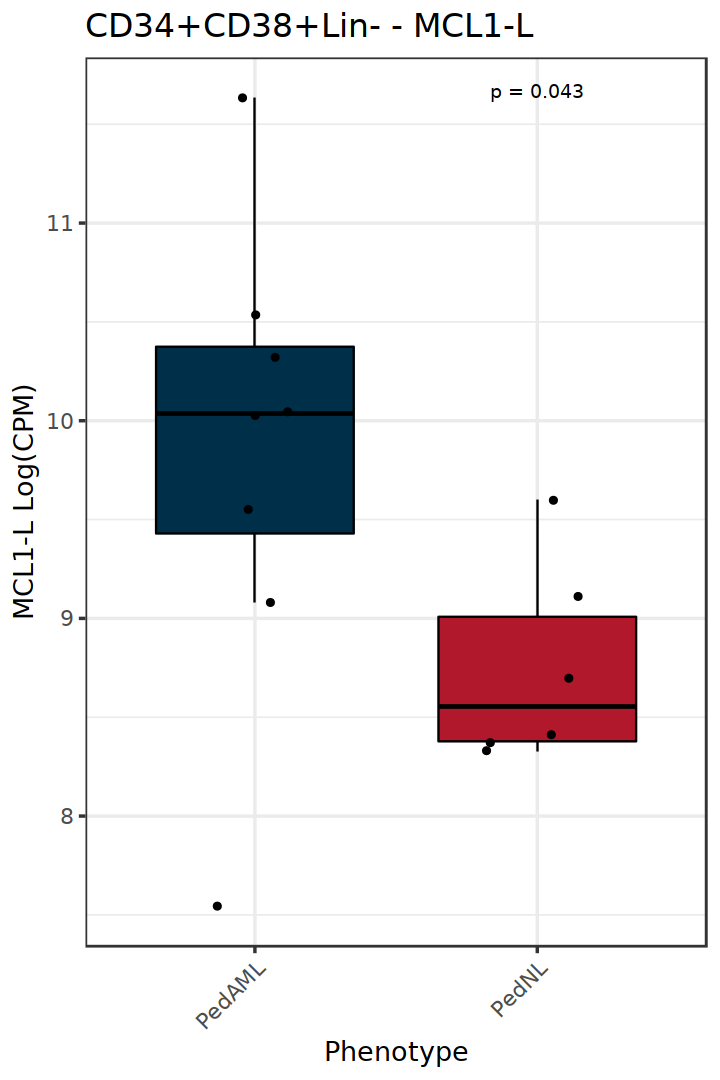

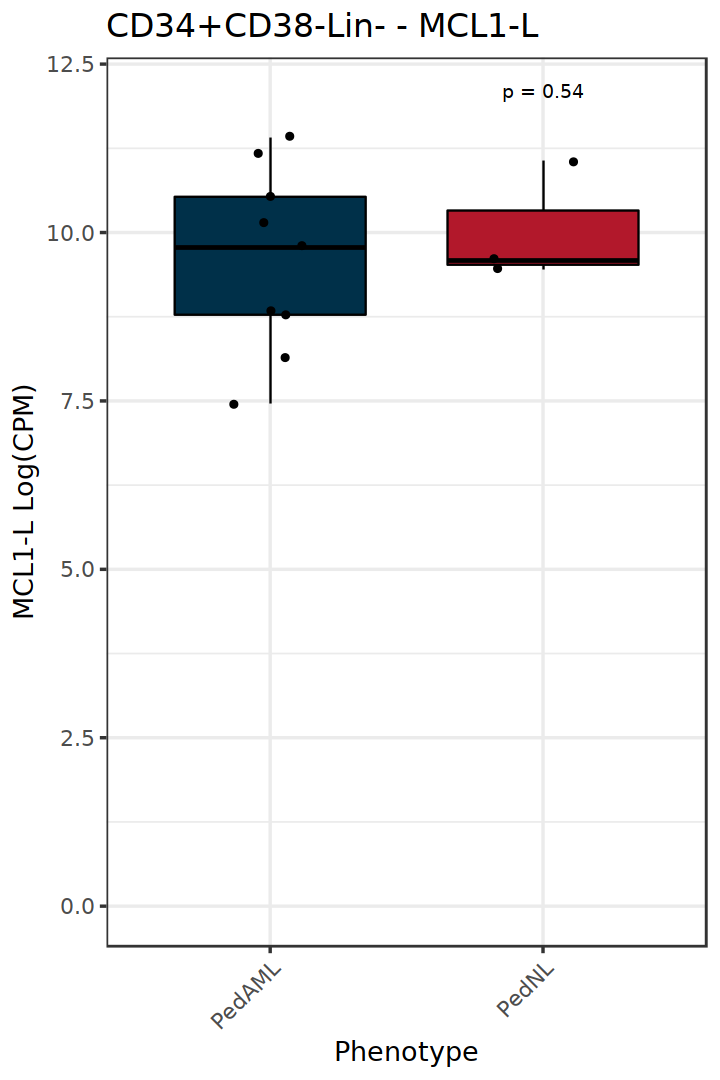

In [165]:
#pdf(file="Holm_Jamieson_Prog_MCL1_L_byPhenotype_04142020.pdf", width=7, height=7)
#png(file="DeWerf_Jamieson_Prog_MCL1_L_byPhenotype_08262020.png", width=6, height=9, units = "in", res = 300)
options(repr.plot.width=6, repr.plot.height=9)
ggboxplot(subset(X.tx.lcpm.Prog.df[-7,], Phenotype != "AdultAML"), x="Phenotype", y="MCL1.L", add=c("jitter"), fill="Phenotype",
         palette = c("#003049","#B2182B")) + 
    theme_bw(base_size=16) + ylab("MCL1-L Log(CPM)") + labs(title="CD34+CD38+Lin- - MCL1-L") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1), legend.position="none")+ 
    stat_compare_means(method="t.test", label = "p.format", ref.group="PedAML")
#dev.off()

#png(file="Holm_Jamieson_Stem_MCL1_L_byPhenotype_11182020.png", width=6, height=9, units='in', res=300)
options(repr.plot.width=6, repr.plot.height=9)
ggboxplot(subset(X.tx.lcpm.Stem.df, Phenotype != "AdultAML"), x="Phenotype", y="MCL1.L", add=c("jitter"), fill="Phenotype",
         palette =  c("#003049","#B2182B")) + ylim(0,12) +
    theme_bw(base_size=16) + ylab("MCL1-L Log(CPM)") + labs(title="CD34+CD38-Lin- - MCL1-L") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1), legend.position="none") + 
    stat_compare_means(method="t.test", label = "p.format", ref.group="PedAML")
#dev.off()

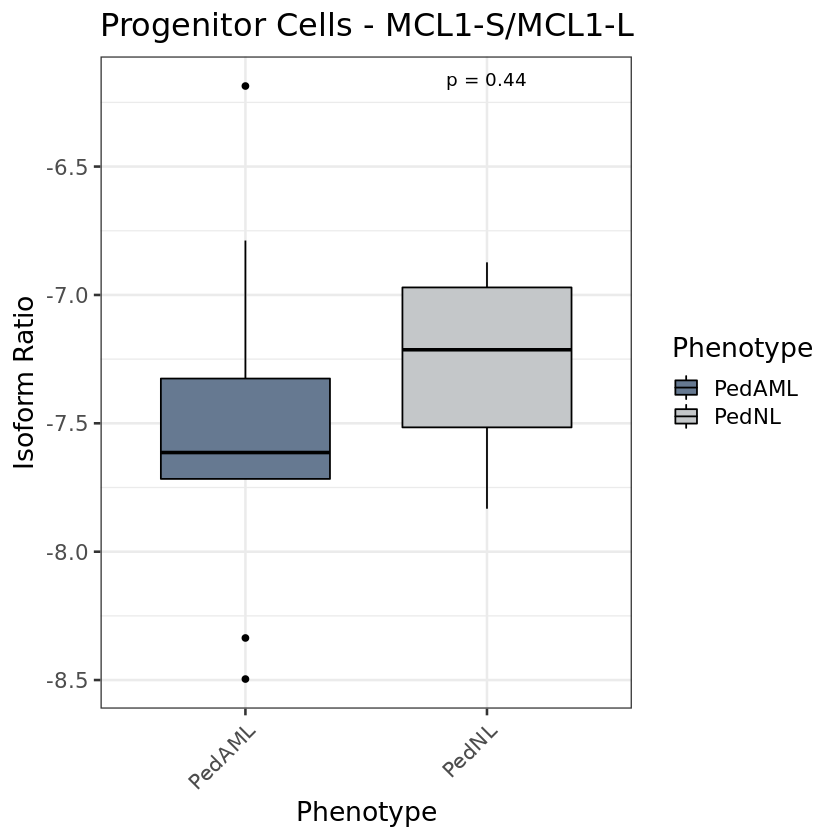

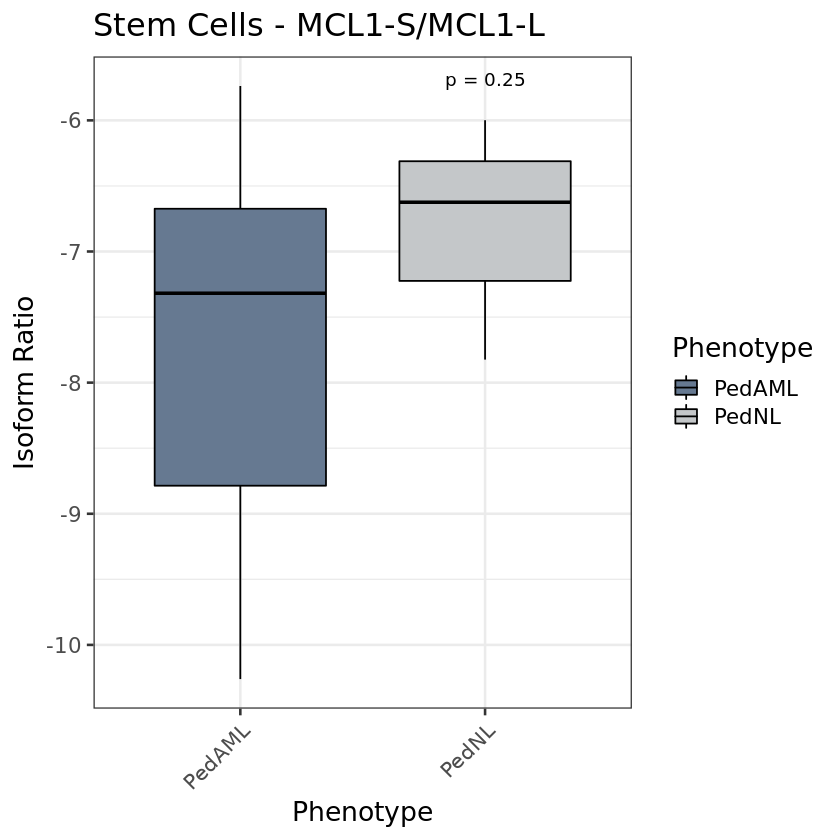

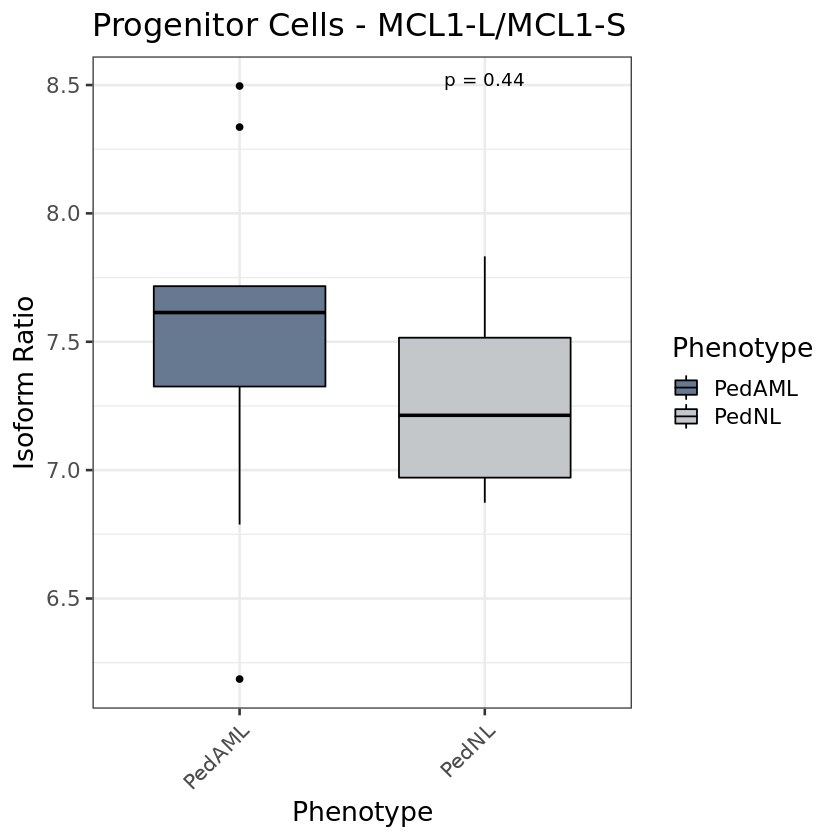

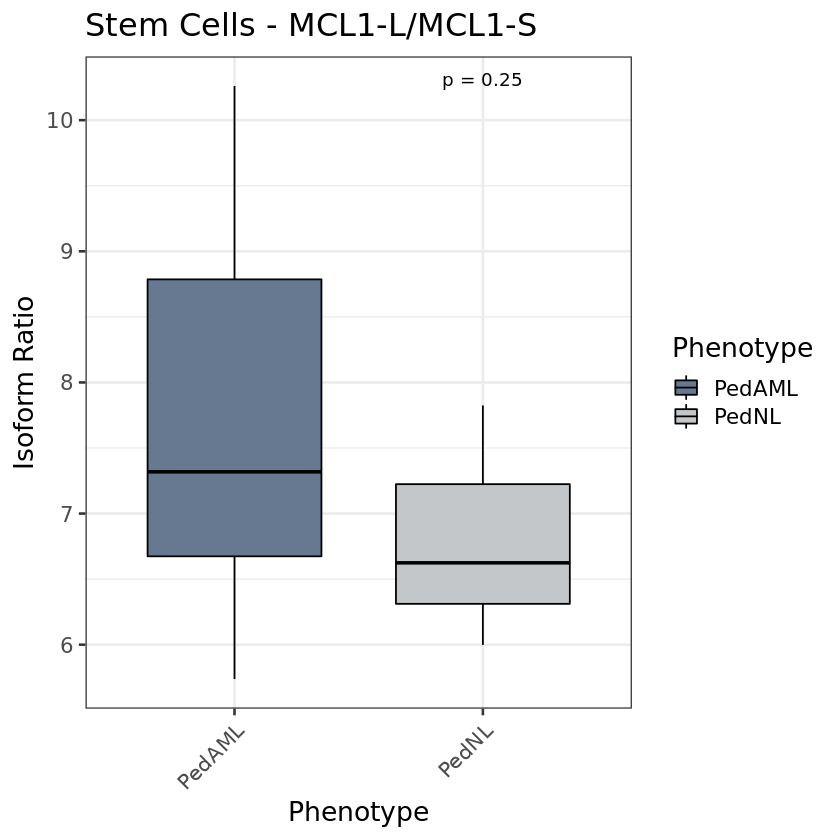

In [253]:
X.tx.lcpm.Prog.df$Ratio2 <- X.tx.lcpm.Prog.df$MCL1.S - X.tx.lcpm.Prog.df$MCL1.L

#pdf(file="Holm_Jamieson_Prog_MCL1_S_byPhenotype_04142020.pdf", width=7, height=7)
ggboxplot(subset(X.tx.lcpm.Prog.df, Phenotype != "AdultAML"), x="Phenotype", y="Ratio2", fill="Phenotype",
         palette = c("#667991", "#C4C7C9")) + 
    theme_bw(base_size=16) + ylab("Isoform Ratio") + labs(title="Progenitor Cells - MCL1-S/MCL1-L") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1))+ 
    stat_compare_means(method="t.test", label = "p.format", ref.group="PedAML")
#dev.off()
X.tx.lcpm.Stem.df$Ratio2 <- X.tx.lcpm.Stem.df$MCL1.S - X.tx.lcpm.Stem.df$MCL1.L
#pdf(file="Holm_Jamieson_Stem_MCL1_S_byPhenotype_041452020.pdf", width=7, height=7)
ggboxplot(subset(X.tx.lcpm.Stem.df, Phenotype != "AdultAML"), x="Phenotype", y="Ratio2", fill="Phenotype",
         palette = c("#667991", "#C4C7C9")) + 
    theme_bw(base_size=16) + ylab("Isoform Ratio") + labs(title="Stem Cells - MCL1-S/MCL1-L") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1))+ 
    stat_compare_means(method="t.test", label = "p.format", ref.group="PedAML")
#dev.off()
X.tx.lcpm.Prog.df$Ratio1 <- X.tx.lcpm.Prog.df$MCL1.L - X.tx.lcpm.Prog.df$MCL1.S
#pdf(file="Holm_Jamieson_Prog_MCL1_S_byPhenotype_04142020.pdf", width=7, height=7)
ggboxplot(subset(X.tx.lcpm.Prog.df, Phenotype != "AdultAML"), x="Phenotype", y="Ratio1", fill="Phenotype",
         palette = c("#667991", "#C4C7C9")) + 
    theme_bw(base_size=16) + ylab("Isoform Ratio") + labs(title="Progenitor Cells - MCL1-L/MCL1-S") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1))+ 
    stat_compare_means(method="t.test", label = "p.format", ref.group="PedAML")
#dev.off()
X.tx.lcpm.Stem.df$Ratio1 <- X.tx.lcpm.Stem.df$MCL1.L - X.tx.lcpm.Stem.df$MCL1.S
#pdf(file="Holm_Jamieson_Stem_MCL1_S_byPhenotype_041452020.pdf", width=7, height=7)
ggboxplot(subset(X.tx.lcpm.Stem.df, Phenotype != "AdultAML"), x="Phenotype", y="Ratio1", fill="Phenotype",
         palette = c("#667991", "#C4C7C9")) + 
    theme_bw(base_size=16) + ylab("Isoform Ratio") + labs(title="Stem Cells - MCL1-L/MCL1-S") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1))+ 
    stat_compare_means(method="t.test", label = "p.format", ref.group="PedAML")
#dev.off()

In [255]:
dim(lcpm2.Prog.tmpCor)
lcpm2.Prog.tmpCor
dim(X.tx.lcpm.Prog.df)
X.tx.lcpm.Prog.df

[1] 20 34

group    lib.size norm.factors
X02id38cellPROGENITORS PedAML   34657547 0.9788200   
X06id90cellPROGENITORS PedAML   34856832 0.8530318   
X04id78cellPROGENITORS PedAML   42824638 0.9087627   
X06id00066PRO          PedAML   31744580 1.1888360   
X03id11474HPC          AdultAML 25338927 1.0692039   
X01id11251HPC          AdultAML 24503278 0.8559037   
X01x00077xPROGENIT     PedAML   30830708 0.9503596   
X03x11379xHPCxxxxx     PedAML   44583134 1.0769868   
X05x00047xPLUSPLUS     PedNL    38613462 1.0933424   
X06x00077xPLUSPLUS     PedNL    64701405 1.2492177   
X07x00023xPLUSPLUS     AdultAML 38317179 1.1037879   
X09x00020xPLUSPLUS     AdultAML 34498091 0.9025508   
X11x00082xPLUSPLUS     AdultAML 51856309 0.6002891   
X14x12488xPLUSPLUS     PedAML   49615014 1.1356839   
X15x12584xPLUSPLUS     PedAML   40666280 0.8027412   
X17x12451xPLUSPLUS     PedAML   42143266 0.9013159   
X18x10720xPLUSPLUS     PedNL    45234224 1.1608719   
X02pid24760ctHPC       PedNL    47076899 1.2274924   
X04pid24474ctHPC       PedNL    45033714 1.0579347   
X06pid25376ctHPC       PedNL    48923699 1.1697460   
                       SequenceRun                                               
X02id38cellPROGENITORS ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91
X06id90cellPROGENITORS ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91
X04id78cellPROGENITORS ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91
X06id00066PRO          ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91
X03id11474HPC          ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91
X01id11251HPC          ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91
X01x00077xPROGENIT     ca_ne_630_001_400_060_JAMIESON_SN_human-ensembl-grch38-r91
X03x11379xHPCxxxxx     ca_ne_630_001_400_060_JAMIESON_SN_human-ensembl-grch38-r91
X05x00047xPLUSPLUS     ca_ne_630_001_400_060_JAMIESON_SN_human-ensembl-grch38-r91
X06x00077xPLUSPLUS     ca_ne_630_001_400_060_JAMIESON_SN_human-ensembl-grch38-r91
X07x00023xPLUSPLUS     ca_ne_645_001_300_060_JAMIESON_SN_human-ensembl-grch38-r91
X09x00020xPLUSPLUS     ca_ne_645_001_300_060_JAMIESON_SN_human-ensembl-grch38-r91
X11x00082xPLUSPLUS     ca_ne_645_001_300_060_JAMIESON_SN_human-ensembl-grch38-r91
X14x12488xPLUSPLUS     ca_ne_650_001_360_060_JAMIESON_SN_human-ensembl-grch38-r91
X15x12584xPLUSPLUS     ca_ne_650_001_360_060_JAMIESON_SN_human-ensembl-grch38-r91
X17x12451xPLUSPLUS     ca_ne_650_001_360_060_JAMIESON_SN_human-ensembl-grch38-r91
X18x10720xPLUSPLUS     ca_ne_650_001_360_060_JAMIESON_SN_human-ensembl-grch38-r91
X02pid24760ctHPC       ca_ne_714_001_400_070_JAMIESON_SN_human-ensembl-grch38-r91
X04pid24474ctHPC       ca_ne_714_001_400_070_JAMIESON_SN_human-ensembl-grch38-r91
X06pid25376ctHPC       ca_ne_714_001_400_070_JAMIESON_SN_human-ensembl-grch38-r91
                       SequenceDate Sample                SampleName    
X02id38cellPROGENITORS 5/5/19       02id38cellPROGENITORS 38 Progenitors
X06id90cellPROGENITORS 5/5/19       06id90cellPROGENITORS 90 Progenitors
X04id78cellPROGENITORS 5/5/19       04id78cellPROGENITORS 78 Progenitors
X06id00066PRO          6/26/19      06id00066PRO          66 Progenitors
X03id11474HPC          6/26/19      03id11474HPC          11474 HPC     
X01id11251HPC          6/26/19      01id11251HPC          11251 HPC     
X01x00077xPROGENIT     8/31/19      01x00077xPROGENIT     77 Progenitors
X03x11379xHPCxxxxx     8/31/19      03x11379xHPCxxxxx     11379 HPC     
X05x00047xPLUSPLUS     8/31/19      05x00047xPLUSPLUS     47 PlPl       
X06x00077xPLUSPLUS     8/31/19      06x00077xPLUSPLUS     77 PlPl       
X07x00023xPLUSPLUS     8/31/19      07x00023xPLUSPLUS     23 PlPl       
X09x00020xPLUSPLUS     8/31/19      09x00020xPLUSPLUS     20 PlPl       
X11x00082xPLUSPLUS     8/31/19      11x00082xPLUSPLUS     82 PlPl       
X14x12488xPLUSPLUS     9/1/19       14x12488xPLUSPLUS     12488 PlPl    
X15x12584xPLUSPLUS     9/1/19       15x12584xPLUSPLUS     12584 PlPl    

[1] 20 33

BCL2L2   BCL2L10    BCL2L11    BCL2L13  BCL2L14    
X02id38cellPROGENITORS 2.055279 -4.3844682  3.0938252 6.540867 -4.38446825
X06id90cellPROGENITORS 3.817742 -4.3844682  3.5834081 6.034791 -4.38446825
X04id78cellPROGENITORS 2.978449 -4.3844682  0.7369863 6.598334 -4.38446825
X06id00066PRO          2.680439  2.0363378  0.5117312 6.018107 -4.38446825
X03id11474HPC          2.786280 -0.7332723  2.6435933 6.281357 -3.55997159
X01id11251HPC          3.264027 -1.3896777  4.4550796 6.049412 -1.58221628
X01x00077xPROGENIT     3.558877 -4.3844682  0.4273868 6.361019 -4.38446825
X03x11379xHPCxxxxx     3.449039 -0.3261949  1.5874898 6.278875 -0.05252014
X05x00047xPLUSPLUS     2.412023  0.9581500  2.8810924 5.875778 -4.38446825
X06x00077xPLUSPLUS     2.496424  0.2311277  4.4362817 6.193137 -2.17729368
X07x00023xPLUSPLUS     2.581438  0.1219629  2.2125112 5.691712 -3.39339760
X09x00020xPLUSPLUS     4.181737 -4.3844682  4.7092297 6.656249 -4.38446825
X11x00082xPLUSPLUS     4.201586 -1.3174282  4.3007199 5.201573 -4.38446825
X14x12488xPLUSPLUS     2.484671 -1.3767876  3.7027759 6.477980 -4.38446825
X15x12584xPLUSPLUS     3.901771 -2.3144170  4.6499429 6.608565 -4.38446825
X17x12451xPLUSPLUS     3.169457 -2.9787065 -1.4587905 6.174634 -4.38446825
X18x10720xPLUSPLUS     2.175677  0.9077076  4.0461918 6.265057 -4.38446825
X02pid24760ctHPC       2.423029  0.2718062  3.8316781 6.326242 -4.38446825
X04pid24474ctHPC       2.760183 -4.3844682  4.1861716 5.686900 -4.38446825
X06pid25376ctHPC       2.074232 -2.4137317  4.8405943 6.282792 -4.38446825
                       BCL2L15    BCL2A1        BAD      BID      BAX      ⋯
X02id38cellPROGENITORS -4.3844682  1.524954e+00 4.381382 6.606057 6.153370 ⋯
X06id90cellPROGENITORS -1.5122554  2.260004e+00 4.372379 6.425870 6.577849 ⋯
X04id78cellPROGENITORS -4.3844682  1.886210e+00 4.501805 6.768138 6.793089 ⋯
X06id00066PRO          -2.0993533  2.382649e+00 3.485526 6.531357 6.228500 ⋯
X03id11474HPC          -4.3844682  3.411592e+00 5.075736 6.359962 6.850880 ⋯
X01id11251HPC          -0.9304494  9.316538e-01 5.211336 6.876366 7.130688 ⋯
X01x00077xPROGENIT     -2.7344000  2.614217e+00 4.697778 6.410480 6.334418 ⋯
X03x11379xHPCxxxxx     -1.3149784  1.994258e+00 5.061887 6.828809 6.889115 ⋯
X05x00047xPLUSPLUS     -3.0717061  3.611510e+00 5.513524 6.955580 5.781388 ⋯
X06x00077xPLUSPLUS     -1.8858780  1.140359e+00 4.674120 6.416439 5.282034 ⋯
X07x00023xPLUSPLUS     -4.3844682  8.834818e-01 5.339881 6.532423 6.730125 ⋯
X09x00020xPLUSPLUS     -4.3844682  3.289730e+00 6.037706 6.512415 6.161326 ⋯
X11x00082xPLUSPLUS     -3.1567808  5.039105e+00 5.186532 5.103879 6.448944 ⋯
X14x12488xPLUSPLUS     -4.3844682  6.545606e-01 4.651806 6.770972 6.082977 ⋯
X15x12584xPLUSPLUS     -4.3844682  1.519098e+00 4.682181 6.934331 6.391488 ⋯
X17x12451xPLUSPLUS     -2.9787065  1.038214e-01 5.123231 7.145202 6.581126 ⋯
X18x10720xPLUSPLUS     -2.8049376  8.317215e-05 4.786732 6.544754 5.541370 ⋯
X02pid24760ctHPC       -2.8953502  5.007808e-01 4.708155 6.632857 5.836361 ⋯
X04pid24474ctHPC       -4.3844682 -2.784216e-01 5.276738 6.381204 5.973328 ⋯
X06pid25376ctHPC       -4.3844682 -8.504257e-01 5.100040 6.524037 5.913197 ⋯
                       BCL2S      PTK2B.202 MCL1.S     MCL1.L    BCLX.L    
X02id38cellPROGENITORS  1.4636852 7.801089   3.3603518  9.546563  2.8503483
X06id90cellPROGENITORS  1.0740027 6.522539   2.6637889 10.029068  1.7951032
X04id78cellPROGENITORS  1.1170116 7.112075   2.3871401 10.041223  4.8222092
X06id00066PRO           0.5323101 7.926026   0.2186684  7.544238  4.0704633
X03id11474HPC          -0.5507138 7.201686   1.7392939  8.299482  3.5347292
X01id11251HPC           0.5089311 6.506105   3.8434629 10.308954  2.2638527
X01x00077xPROGENIT     -0.9543452 7.002484   1.9853394 10.321447  4.3315032
X03x11379xHPCxxxxx      1.5004122 7.935862   3.7450815 10.533048  4.9380637
X05x00047xPLUSPLUS      0.4209823 6.595911   1.7679083  9.600628  4.4009299
X06x00077xPLUSPLUS     -0.4487978 5.836606   0.7858782  8.366635  5.434

In [256]:
lcpm2.Prog.tmpCor$MCL1.L <- X.tx.lcpm.Prog.df$MCL1.L[match(rownames(lcpm2.Prog.tmpCor), rownames(X.tx.lcpm.Prog.df))]
lcpm2.Prog.tmpCor$MCL1.S <- X.tx.lcpm.Prog.df$MCL1.S[match(rownames(lcpm2.Prog.tmpCor), rownames(X.tx.lcpm.Prog.df))]
lcpm2.Stem.tmpCor$MCL1.L <- X.tx.lcpm.Stem.df$MCL1.L[match(rownames(lcpm2.Stem.tmpCor), rownames(X.tx.lcpm.Stem.df))]
lcpm2.Stem.tmpCor$MCL1.S <- X.tx.lcpm.Stem.df$MCL1.S[match(rownames(lcpm2.Stem.tmpCor), rownames(X.tx.lcpm.Stem.df))]
lcpm2.Prog.tmpCor$Ratio_MCL1 <- lcpm2.Prog.tmpCor$MCL1.L - lcpm2.Prog.tmpCor$MCL1.S
lcpm2.Stem.tmpCor$Ratio_MCL1 <- lcpm2.Stem.tmpCor$MCL1.L - lcpm2.Stem.tmpCor$MCL1.S


In [263]:
lcpm2.Prog.tmpCor$PTK2B.202 <- X.tx.lcpm.Prog.df$PTK2B.202 [match(rownames(lcpm2.Prog.tmpCor), rownames(X.tx.lcpm.Prog.df))]
lcpm2.Prog.tmpCor$PTK2B <- lcpm2.Prog[grep("ENSG00000120899", rownames(lcpm2.Prog)),]
lcpm2.Stem.tmpCor$PTK2B.202 <- X.tx.lcpm.Stem.df$PTK2B.202[match(rownames(lcpm2.Stem.tmpCor), rownames(X.tx.lcpm.Stem.df))]
lcpm2.Stem.tmpCor$PTK2B <- lcpm2.Stem[grep("ENSG00000120899", rownames(lcpm2.Stem)),]
lcpm2.Prog.tmpCor$Ratio_PTK2B <- lcpm2.Prog.tmpCor$PTK2B.202 - lcpm2.Prog.tmpCor$PTK2B
lcpm2.Stem.tmpCor$Ratio_PTK2B <- lcpm2.Stem.tmpCor$PTK2B.202 - lcpm2.Stem.tmpCor$PTK2B


Warning message:
“Removed 1 rows containing missing values (geom_point).”


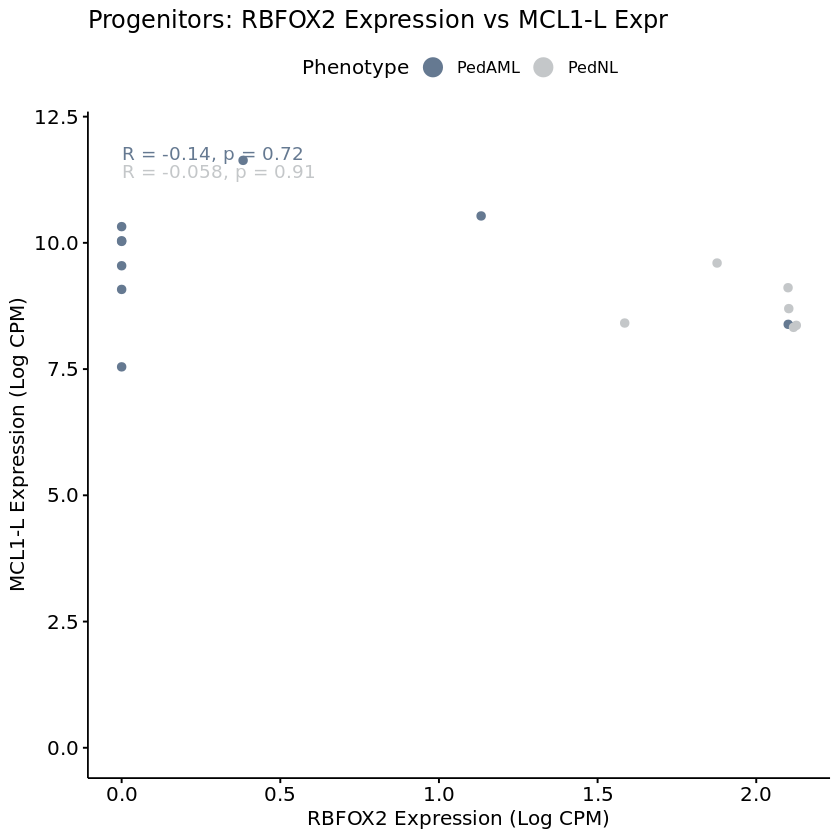

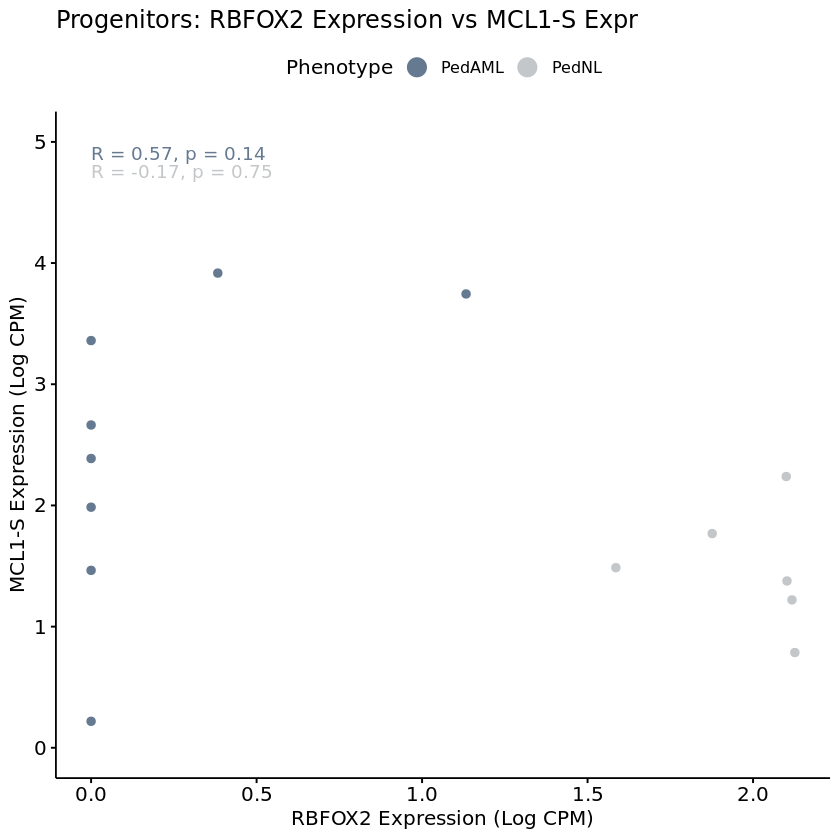

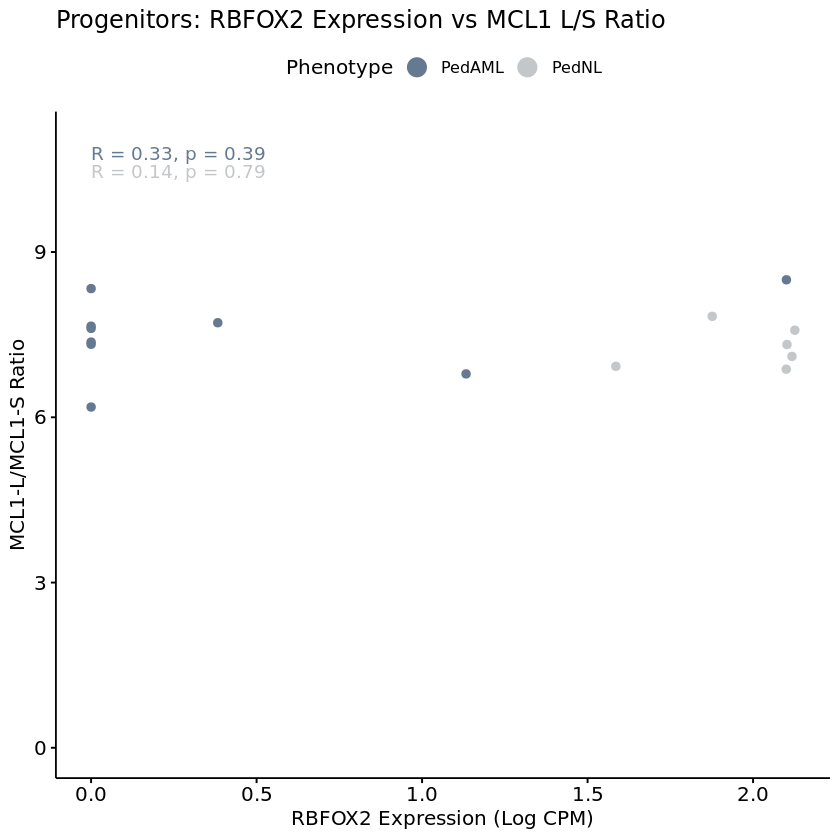

In [264]:
#png("PedAML_Sample_PTBP1expr_vs_ADARp150_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
#pdf("PedAML_Sample_PTBP1expr_vs_ADARp150_ggScatter_03112020.pdf", width = 7, height = 7)
ggscatter(subset(lcpm2.Prog.tmpCor, Phenotype != "AdultAML"), x="RBFOX2", y="MCL1.L", color="Phenotype", 
          palette=c("#657991","#C4C7C9"),
          #size=c(3.5,3.5)[lcpm2.Prog.tmpCor$Cell.type],
          #shape = c(17,15)[lcpm2.Prog.tmpCor$Cell.type],
          title = "Progenitors: RBFOX2 Expression vs MCL1-L Expr") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("MCL1-L Expression (Log CPM)") + xlab("RBFOX2 Expression (Log CPM)") + 
          #stat_cor(aes(shape=Cell.type), output.type = "text", label.x = 0, na.rm=TRUE) + 
          stat_cor(aes(color=Phenotype), output.type = "text", label.x = 0, na.rm=TRUE)  +
          ylim(0,12) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))
#dev.off()

#png("PedAML_Sample_PTBP1expr_vs_ADARp110_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
#pdf("PedAML_Sample_PTBP1expr_vs_ADARp110_ggScatter_02232021.pdf", width = 7, height = 7)
ggscatter(subset(lcpm2.Prog.tmpCor, Phenotype != "AdultAML"), x="RBFOX2", y="MCL1.S", color="Phenotype", 
          palette=c("#657991","#C4C7C9"),
          #size=c(3.5,3.5)[lcpm2.Prog.tmpCor$Cell.type],
          #shape = c(17,15)[lcpm2.Prog.tmpCor$Cell.type],
          title = "Progenitors: RBFOX2 Expression vs MCL1-S Expr") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("MCL1-S Expression (Log CPM)") + xlab("RBFOX2 Expression (Log CPM)") + 
          #stat_cor(aes(shape=Cell.type), output.type = "text", label.x = 0, na.rm=TRUE) + 
          stat_cor(aes(color=Phenotype), output.type = "text", label.x = 0, na.rm=TRUE)  +
          ylim(0,5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))
#dev.off()

#png("PedAML_Sample_PTBP1expr_vs_ADARratio_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
#pdf("PedAML_Sample_PTBP1expr_vs_ADARratio_ggScatter_03022021.pdf", width = 7, height = 7)
ggscatter(subset(lcpm2.Prog.tmpCor, Phenotype != "AdultAML"), x="RBFOX2", y="Ratio_MCL1", color="Phenotype", 
          palette=c("#657991","#C4C7C9"),
          #size=c(3.5,3.5)[lcpm2.Prog.tmpCor$Cell.type],
          #shape = c(17,15)[lcpm2.Prog.tmpCor$Cell.type],
          title = "Progenitors: RBFOX2 Expression vs MCL1 L/S Ratio") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("MCL1-L/MCL1-S Ratio") + xlab("RBFOX2 Expression (Log CPM)") + 
          #stat_cor(aes(shape=Cell.type), output.type = "text", label.x = 0, na.rm=TRUE) + 
          stat_cor(aes(color=Phenotype), output.type = "text", label.x = 0, na.rm=TRUE)  +
          ylim(0,11) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))

#dev.off()

In [2]:
library(ggpubr)

Loading required package: ggplot2



In [3]:
#png("PedAML_Sample_PTBP1expr_vs_ADARp150_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
#pdf("PedAML_Sample_PTBP1expr_vs_ADARp150_ggScatter_03112020.pdf", width = 7, height = 7)
ggscatter(subset(lcpm2.Prog.tmpCor), x="RBFOX2", y="MCL1.L", color="Phenotype", 
          palette=c("#657991","#C4C7C9"),
          #size=c(3.5,3.5)[lcpm2.Prog.tmpCor$Cell.type],
          #shape = c(17,15)[lcpm2.Prog.tmpCor$Cell.type],
          title = "Progenitors: RBFOX2 Expression vs MCL1-L Expr") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("MCL1-L Expression (Log CPM)") + xlab("RBFOX2 Expression (Log CPM)") + 
          #stat_cor(aes(shape=Cell.type), output.type = "text", label.x = 0, na.rm=TRUE) + 
          stat_cor(aes(color=Phenotype), output.type = "text", label.x = 0, na.rm=TRUE)  +
          ylim(0,12) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))
#dev.off()

#png("PedAML_Sample_PTBP1expr_vs_ADARp110_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
#pdf("PedAML_Sample_PTBP1expr_vs_ADARp110_ggScatter_02232021.pdf", width = 7, height = 7)
ggscatter(subset(lcpm2.Prog.tmpCor), x="RBFOX2", y="MCL1.S", color="Phenotype", 
          palette=c("#657991","#C4C7C9"),
          #size=c(3.5,3.5)[lcpm2.Prog.tmpCor$Cell.type],
          #shape = c(17,15)[lcpm2.Prog.tmpCor$Cell.type],
          title = "Progenitors: RBFOX2 Expression vs MCL1-S Expr") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("MCL1-S Expression (Log CPM)") + xlab("RBFOX2 Expression (Log CPM)") + 
          #stat_cor(aes(shape=Cell.type), output.type = "text", label.x = 0, na.rm=TRUE) + 
          stat_cor(aes(color=Phenotype), output.type = "text", label.x = 0, na.rm=TRUE)  +
          ylim(0,5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))
#dev.off()

#png("PedAML_Sample_PTBP1expr_vs_ADARratio_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
#pdf("PedAML_Sample_PTBP1expr_vs_ADARratio_ggScatter_03022021.pdf", width = 7, height = 7)
ggscatter(subset(lcpm2.Prog.tmpCor), x="RBFOX2", y="Ratio_MCL1", color="Phenotype", 
          palette=c("#657991","#C4C7C9"),
          #size=c(3.5,3.5)[lcpm2.Prog.tmpCor$Cell.type],
          #shape = c(17,15)[lcpm2.Prog.tmpCor$Cell.type],
          title = "Progenitors: RBFOX2 Expression vs MCL1 L/S Ratio") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("MCL1-L/MCL1-S Ratio") + xlab("RBFOX2 Expression (Log CPM)") + 
          #stat_cor(aes(shape=Cell.type), output.type = "text", label.x = 0, na.rm=TRUE) + 
          stat_cor(aes(color=Phenotype), output.type = "text", label.x = 0, na.rm=TRUE)  +
          ylim(0,11) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))

#dev.off()

ERROR: Error in subset(lcpm2.Prog.tmpCor): object 'lcpm2.Prog.tmpCor' not found


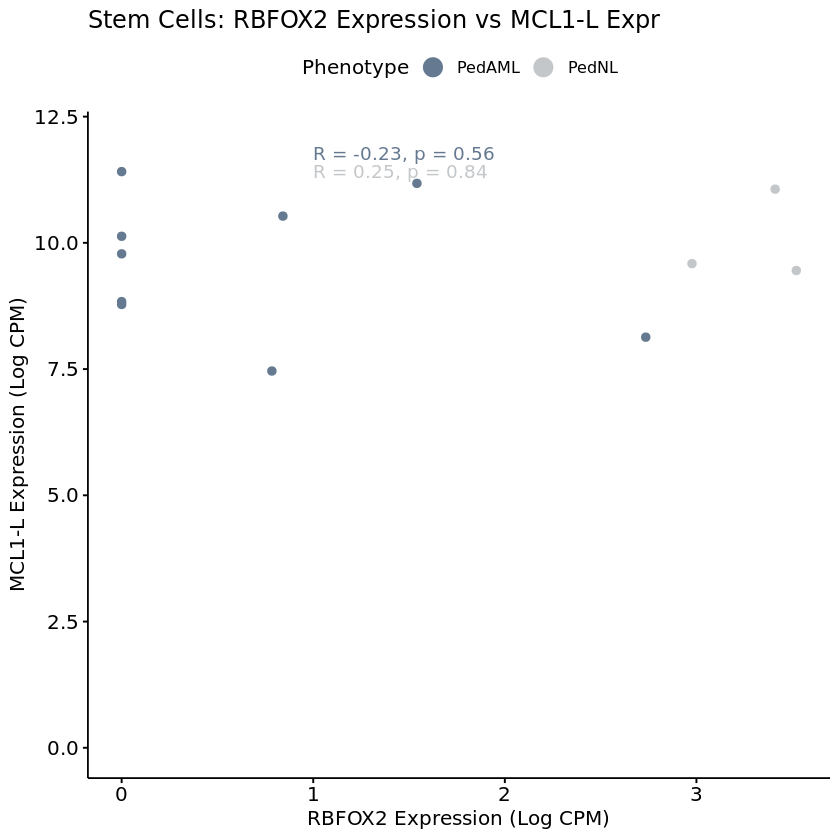

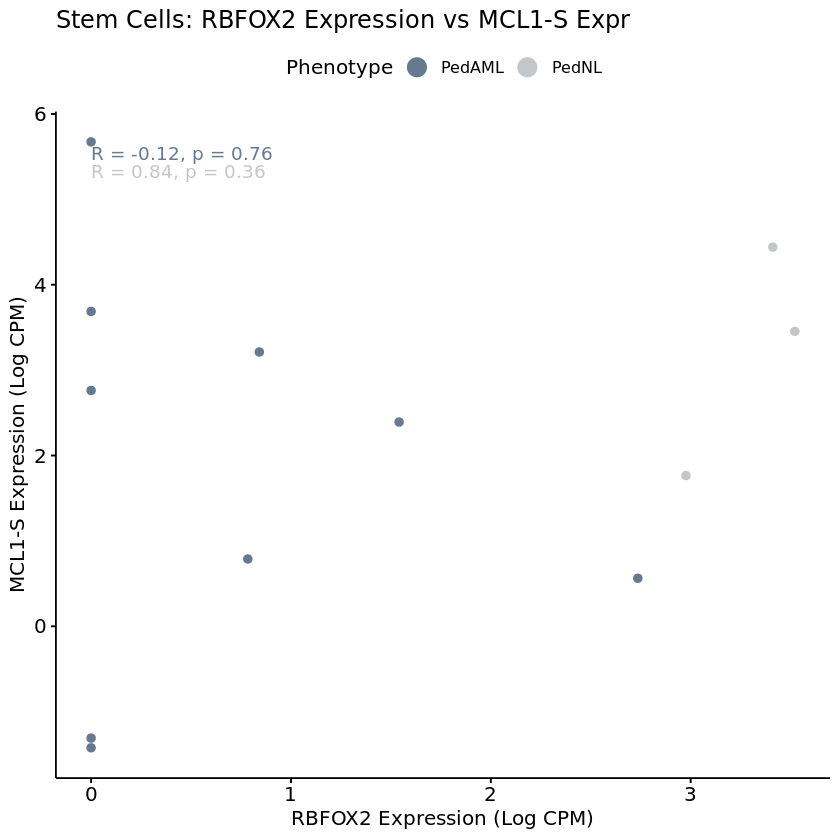

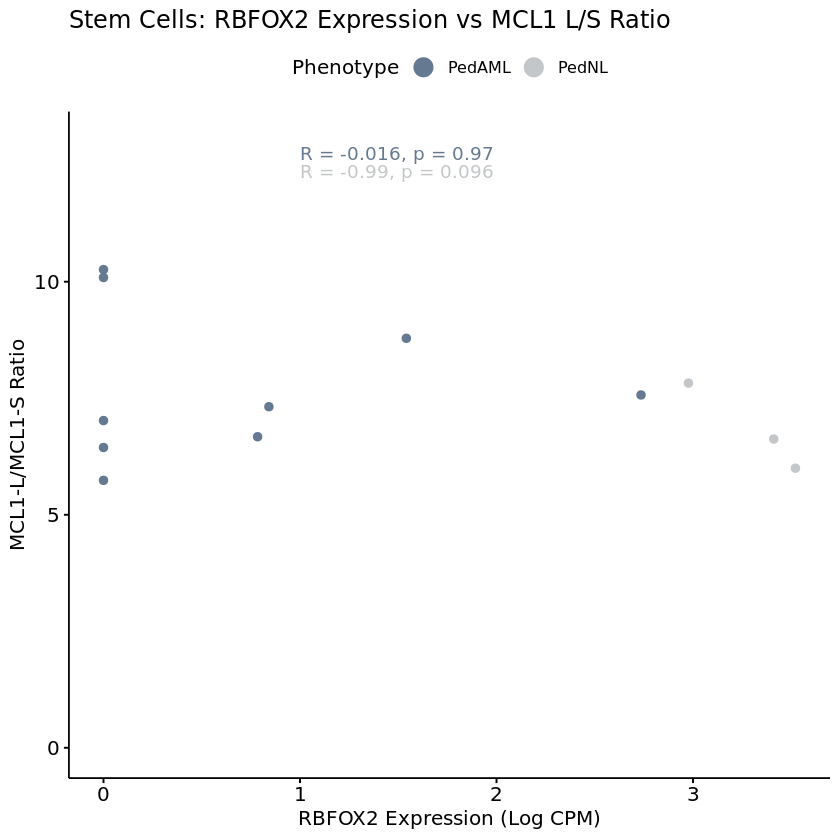

In [265]:
#png("PedAML_Sample_PTBP1expr_vs_ADARp150_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
#pdf("PedAML_Sample_PTBP1expr_vs_ADARp150_ggScatter_03112020.pdf", width = 7, height = 7)
ggscatter(subset(lcpm2.Stem.tmpCor, Phenotype != "AdultAML"), x="RBFOX2", y="MCL1.L", color="Phenotype", 
          palette=c("#657991","#C4C7C9"),
          #size=c(3.5,3.5)[lcpm2.Stem.tmpCor$Cell.type],
          #shape = c(17,15)[lcpm2.Stem.tmpCor$Cell.type],
          title = "Stem Cells: RBFOX2 Expression vs MCL1-L Expr") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("MCL1-L Expression (Log CPM)") + xlab("RBFOX2 Expression (Log CPM)") + 
          #stat_cor(aes(shape=Cell.type), output.type = "text", label.x = 0, na.rm=TRUE) + 
          stat_cor(aes(color=Phenotype), output.type = "text", label.x = 1, na.rm=TRUE)  +
          ylim(0,12) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Stemenitors"), pch = c(15,17))
#dev.off()

#png("PedAML_Sample_PTBP1expr_vs_ADARp110_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
#pdf("PedAML_Sample_PTBP1expr_vs_ADARp110_ggScatter_02232021.pdf", width = 7, height = 7)
ggscatter(subset(lcpm2.Stem.tmpCor, Phenotype != "AdultAML"), x="RBFOX2", y="MCL1.S", color="Phenotype", 
          palette=c("#657991","#C4C7C9"),
          #size=c(3.5,3.5)[lcpm2.Stem.tmpCor$Cell.type],
          #shape = c(17,15)[lcpm2.Stem.tmpCor$Cell.type],
          title = "Stem Cells: RBFOX2 Expression vs MCL1-S Expr") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("MCL1-S Expression (Log CPM)") + xlab("RBFOX2 Expression (Log CPM)") + 
          #stat_cor(aes(shape=Cell.type), output.type = "text", label.x = 0, na.rm=TRUE) + 
          stat_cor(aes(color=Phenotype), output.type = "text", label.x = 0, na.rm=TRUE)  +
          #ylim(0,5) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Stemenitors"), pch = c(15,17))
#dev.off()

#png("PedAML_Sample_PTBP1expr_vs_ADARratio_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
#pdf("PedAML_Sample_PTBP1expr_vs_ADARratio_ggScatter_03022021.pdf", width = 7, height = 7)
ggscatter(subset(lcpm2.Stem.tmpCor, Phenotype != "AdultAML"), x="RBFOX2", y="Ratio_MCL1", color="Phenotype", 
          palette=c("#657991","#C4C7C9"),
          #size=c(3.5,3.5)[lcpm2.Stem.tmpCor$Cell.type],
          #shape = c(17,15)[lcpm2.Stem.tmpCor$Cell.type],
          title = "Stem Cells: RBFOX2 Expression vs MCL1 L/S Ratio") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("MCL1-L/MCL1-S Ratio") + xlab("RBFOX2 Expression (Log CPM)") + 
          #stat_cor(aes(shape=Cell.type), output.type = "text", label.x = 0, na.rm=TRUE) + 
          stat_cor(aes(color=Phenotype), output.type = "text", label.x = 1, na.rm=TRUE)  +
          ylim(0,13) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Stemenitors"), pch = c(15,17))

#dev.off()

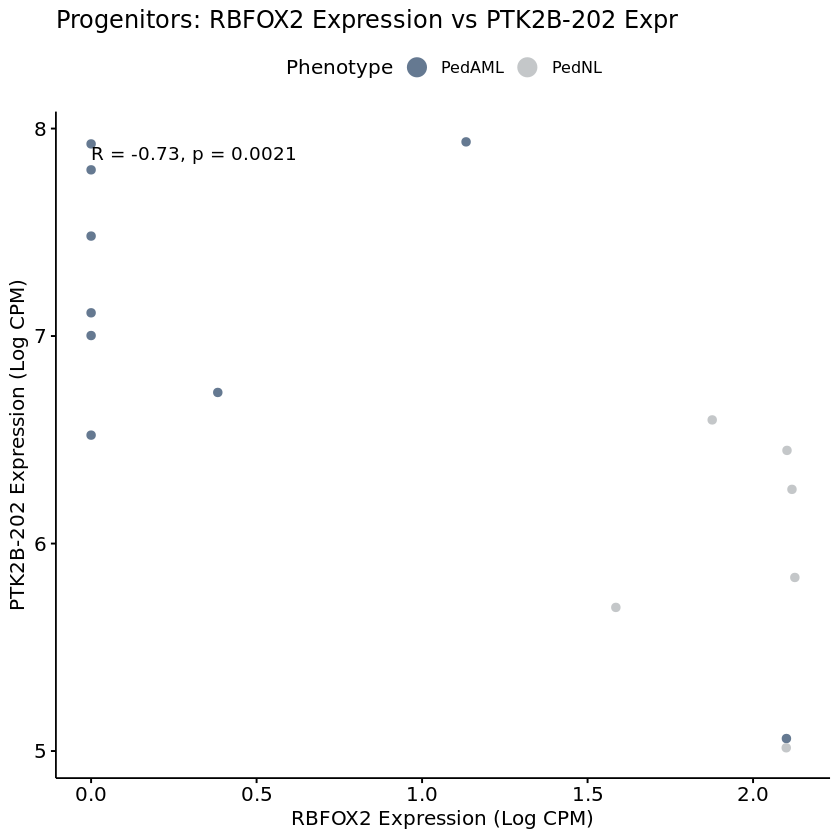

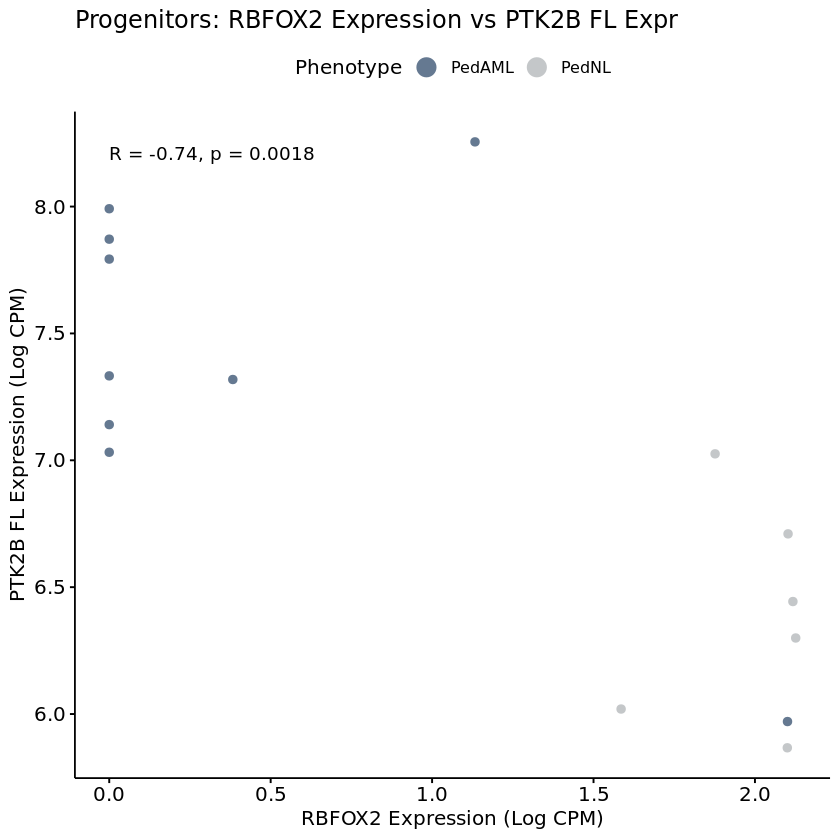

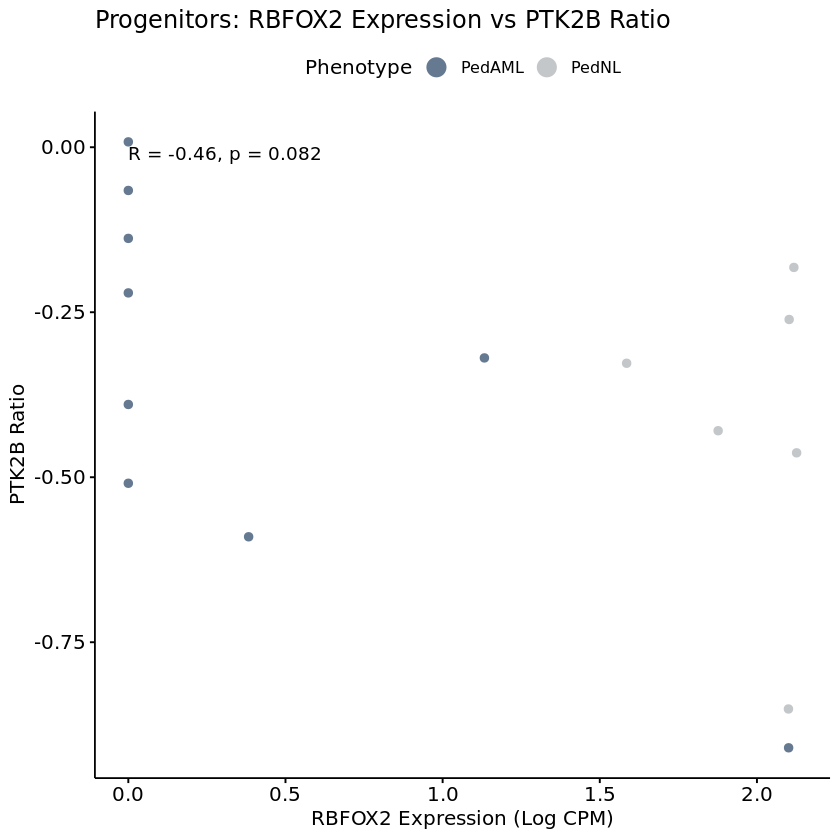

In [268]:
#png("PedAML_Sample_PTBP1expr_vs_ADARp150_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
#pdf("PedAML_Sample_PTBP1expr_vs_ADARp150_ggScatter_03112020.pdf", width = 7, height = 7)
ggscatter(subset(lcpm2.Prog.tmpCor, Phenotype != "AdultAML"), x="RBFOX2", y="PTK2B.202", color="Phenotype", 
          palette=c("#657991","#C4C7C9"),
          #size=c(3.5,3.5)[lcpm2.Prog.tmpCor$Cell.type],
          #shape = c(17,15)[lcpm2.Prog.tmpCor$Cell.type],
          title = "Progenitors: RBFOX2 Expression vs PTK2B-202 Expr") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("PTK2B-202 Expression (Log CPM)") + xlab("RBFOX2 Expression (Log CPM)") + 
          stat_cor(output.type = "text", label.x = 0, na.rm=TRUE) + 
          #stat_cor(aes(color=Phenotype), output.type = "text", label.x = 0, na.rm=TRUE)  +
          #xlim(0,9) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))
#dev.off()

#png("PedAML_Sample_PTBP1expr_vs_ADARp110_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
#pdf("PedAML_Sample_PTBP1expr_vs_ADARp110_ggScatter_02232021.pdf", width = 7, height = 7)
ggscatter(subset(lcpm2.Prog.tmpCor, Phenotype != "AdultAML"), x="RBFOX2", y="PTK2B", color="Phenotype", 
          palette=c("#657991","#C4C7C9"),
          #size=c(3.5,3.5)[lcpm2.Prog.tmpCor$Cell.type],
          #shape = c(17,15)[lcpm2.Prog.tmpCor$Cell.type],
          title = "Progenitors: RBFOX2 Expression vs PTK2B FL Expr") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("PTK2B FL Expression (Log CPM)") + xlab("RBFOX2 Expression (Log CPM)") + 
          stat_cor(output.type = "text", label.x = 0, na.rm=TRUE) + 
          #stat_cor(aes(color=Phenotype), output.type = "text", label.x = 0, na.rm=TRUE)  +
          #xlim(0,9) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))
#dev.off()

#png("PedAML_Sample_PTBP1expr_vs_ADARratio_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
#pdf("PedAML_Sample_PTBP1expr_vs_ADARratio_ggScatter_03022021.pdf", width = 7, height = 7)
ggscatter(subset(lcpm2.Prog.tmpCor, Phenotype != "AdultAML"), x="RBFOX2", y="Ratio_PTK2B", color="Phenotype", 
          palette=c("#657991","#C4C7C9"),
          #size=c(3.5,3.5)[lcpm2.Prog.tmpCor$Cell.type],
          #shape = c(17,15)[lcpm2.Prog.tmpCor$Cell.type],
          title = "Progenitors: RBFOX2 Expression vs PTK2B Ratio") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("PTK2B Ratio") + xlab("RBFOX2 Expression (Log CPM)") + 
          stat_cor(output.type = "text", label.x = 0, na.rm=TRUE) + 
          #stat_cor(aes(color=Phenotype), output.type = "text", label.x = 0, na.rm=TRUE)  +
          #xlim(0,9) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Progenitors"), pch = c(15,17))

#dev.off()

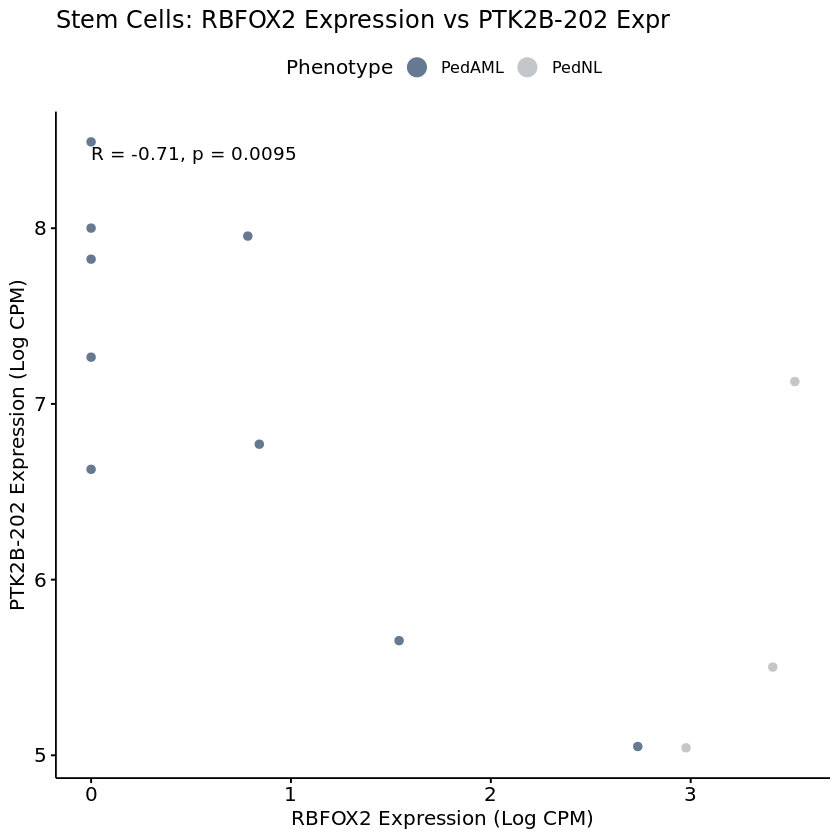

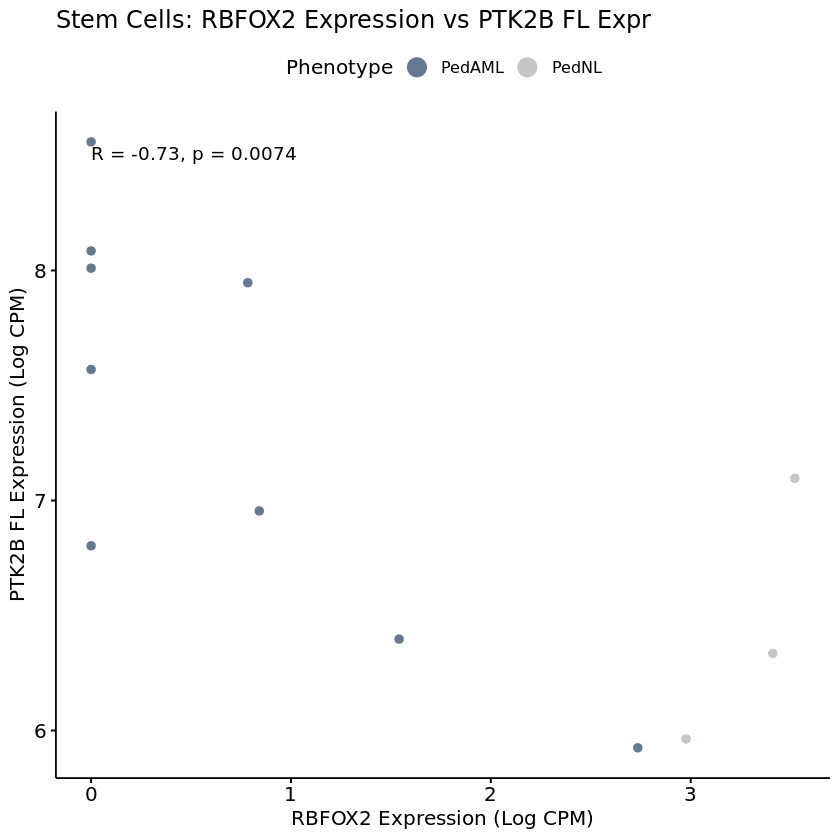

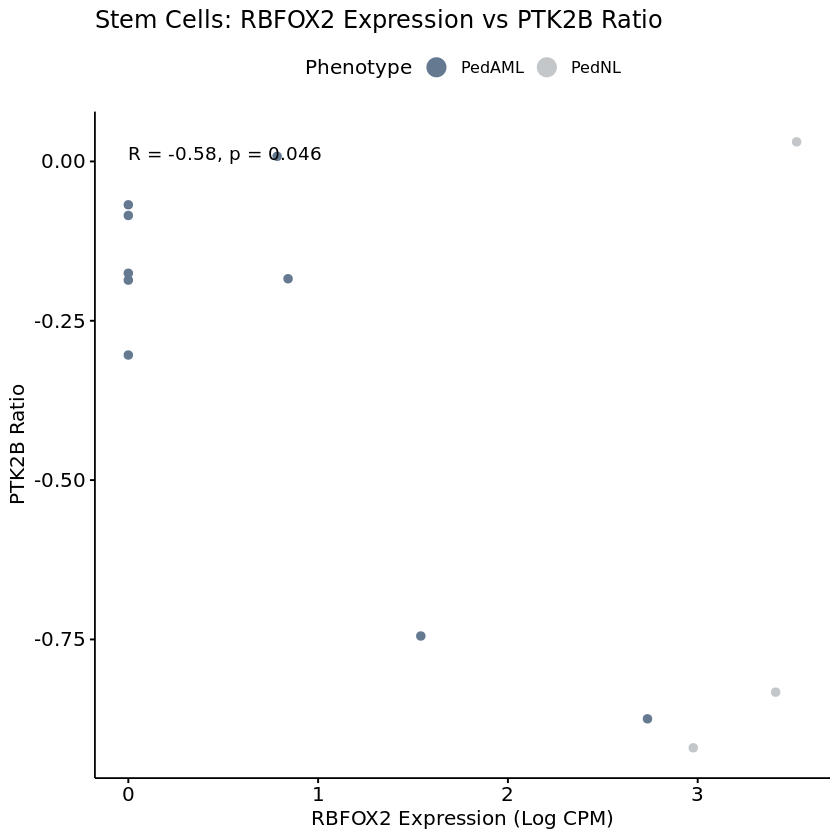

In [270]:
#png("PedAML_Sample_PTBP1expr_vs_ADARp150_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
#pdf("PedAML_Sample_PTBP1expr_vs_ADARp150_ggScatter_03112020.pdf", width = 7, height = 7)
ggscatter(subset(lcpm2.Stem.tmpCor, Phenotype != "AdultAML"), x="RBFOX2", y="PTK2B.202", color="Phenotype", 
          palette=c("#657991","#C4C7C9"),
          #size=c(3.5,3.5)[lcpm2.Stem.tmpCor$Cell.type],
          #shape = c(17,15)[lcpm2.Stem.tmpCor$Cell.type],
          title = "Stem Cells: RBFOX2 Expression vs PTK2B-202 Expr") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("PTK2B-202 Expression (Log CPM)") + xlab("RBFOX2 Expression (Log CPM)") + 
          stat_cor(output.type = "text", label.x = 0, na.rm=TRUE) + 
          #stat_cor(aes(color=Phenotype), output.type = "text", label.x = 0, na.rm=TRUE)  +
          #xlim(0,9) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Stemenitors"), pch = c(15,17))
#dev.off()

#png("PedAML_Sample_PTBP1expr_vs_ADARp110_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
#pdf("PedAML_Sample_PTBP1expr_vs_ADARp110_ggScatter_02232021.pdf", width = 7, height = 7)
ggscatter(subset(lcpm2.Stem.tmpCor, Phenotype != "AdultAML"), x="RBFOX2", y="PTK2B", color="Phenotype", 
          palette=c("#657991","#C4C7C9"),
          #size=c(3.5,3.5)[lcpm2.Stem.tmpCor$Cell.type],
          #shape = c(17,15)[lcpm2.Stem.tmpCor$Cell.type],
          title = "Stem Cells: RBFOX2 Expression vs PTK2B FL Expr") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("PTK2B FL Expression (Log CPM)") + xlab("RBFOX2 Expression (Log CPM)") + 
          stat_cor(output.type = "text", label.x = 0, na.rm=TRUE) + 
          #stat_cor(aes(color=Phenotype), output.type = "text", label.x = 0, na.rm=TRUE)  +
          #xlim(0,9) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Stemenitors"), pch = c(15,17))
#dev.off()

#png("PedAML_Sample_PTBP1expr_vs_ADARratio_ggScatter.png", width = 7, height = 7, units = 'in', res = 300)
#pdf("PedAML_Sample_PTBP1expr_vs_ADARratio_ggScatter_03022021.pdf", width = 7, height = 7)
ggscatter(subset(lcpm2.Stem.tmpCor, Phenotype != "AdultAML"), x="RBFOX2", y="Ratio_PTK2B", color="Phenotype", 
          palette=c("#657991","#C4C7C9"),
          #size=c(3.5,3.5)[lcpm2.Stem.tmpCor$Cell.type],
          #shape = c(17,15)[lcpm2.Stem.tmpCor$Cell.type],
          title = "Stem Cells: RBFOX2 Expression vs PTK2B Ratio") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          #stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("PTK2B Ratio") + xlab("RBFOX2 Expression (Log CPM)") + 
          stat_cor(output.type = "text", label.x = 0, na.rm=TRUE) + 
          #stat_cor(aes(color=Phenotype), output.type = "text", label.x = 0, na.rm=TRUE)  +
          #xlim(0,9) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          #legend(-5, 9.8, legend=c("Stem Cells", "Stemenitors"), pch = c(15,17))

#dev.off()

In [277]:
dim(lcpm2.Prog.tmpCor)
subset(lcpm2.Prog.tmpCor, Phenotype == "PedAML")[,-c(1:6)]

subset(lcpm2.Stem.tmpCor, Phenotype == "PedAML")[,-c(1:6)]
colnames(lcpm2.Prog.tmpCor)
colnames(lcpm2.Stem.tmpCor)

[1] 20 34

SampleName     Patient.ID RIN  X      Adult.Pediatric
X02id38cellPROGENITORS 38 Progenitors 32538       9.7 PedAML Pediatric      
X06id90cellPROGENITORS 90 Progenitors 22390      10.0 PedAML Pediatric      
X04id78cellPROGENITORS 78 Progenitors 28678      10.0 PedAML Pediatric      
X06id00066PRO          66 Progenitors 22666       9.8 PedAML Pediatric      
X01x00077xPROGENIT     77 Progenitors 27177       9.8 PedAML Pediatric      
X03x11379xHPCxxxxx     11379 HPC      11379       9.7 PedAML Pediatric      
X14x12488xPLUSPLUS     12488 PlPl     12488       9.8 PedAML Pediatric      
X15x12584xPLUSPLUS     12584 PlPl     12584       9.8 PedAML Pediatric      
X17x12451xPLUSPLUS     12451 PlPl     12451       9.9 PedAML Pediatric      
                       Disease Cell.type Sorted.Cell.Type Tissue.Source
X02id38cellPROGENITORS AML     Prog      34+38+           PB           
X06id90cellPROGENITORS AML     Prog      34+38+           BM           
X04id78cellPROGENITORS AML     Prog      34+38+           PB           
X06id00066PRO          AML     Prog      34+38+           BM           
X01x00077xPROGENIT     AML     Prog      34+38+           BM           
X03x11379xHPCxxxxx     AML     Prog      34+38+           PB           
X14x12488xPLUSPLUS     AML     Prog      34+38+           PB           
X15x12584xPLUSPLUS     AML     Prog      34+38+           PB           
X17x12451xPLUSPLUS     AML     Prog      34+38+           PB           
                       RNA.seq.status ⋯ PTBP1    ADARp110.expr ADARp150.expr
X02id38cellPROGENITORS Completed      ⋯ 9.560523 5.6290729     7.779699     
X06id90cellPROGENITORS Completed      ⋯ 9.664823 0.9283319     7.259562     
X04id78cellPROGENITORS Completed      ⋯ 9.439014 6.9681447     7.583469     
X06id00066PRO          Completed      ⋯ 8.605423 5.6344767     7.966045     
X01x00077xPROGENIT     Completed      ⋯ 8.447452 6.3038313     7.149097     
X03x11379xHPCxxxxx     Completed      ⋯ 8.861159 4.7175030     8.180739     
X14x12488xPLUSPLUS     Completed      ⋯ 9.242262 6.6264033     6.523670     
X15x12584xPLUSPLUS     Completed      ⋯ 8.927114 3.9779967     6.811428     
X17x12451xPLUSPLUS     Completed      ⋯ 9.719072 6.1748840     7.828503     
                       ADARratio  MCL1.L    MCL1.S     Ratio_MCL1 PTK2B.202
X02id38cellPROGENITORS  2.1506265  9.546563  3.3603518 6.186211   7.801089 
X06id90cellPROGENITORS  6.3312299 10.029068  2.6637889 7.365279   6.522539 
X04id78cellPROGENITORS  0.6153247 10.041223  2.3871401 7.654083   7.112075 
X06id00066PRO           2.3315684  7.544238  0.2186684 7.325570   7.926026 
X01x00077xPROGENIT      0.8452659 10.321447  1.9853394 8.336107   7.002484 
X03x11379xHPCxxxxx      3.4632360 10.533048  3.7450815 6.787967   7.935862 
X14x12488xPLUSPLUS     -0.1027329  8.386577 -0.1095093 8.496086   5.060382 
X15x12584xPLUSPLUS      2.8334318 11.633738  3.9171771 7.716561   6.728235 
X17x12451xPLUSPLUS      1.6536188  9.077979  1.4641917 7.613787   7.481825 
                       PTK2B    Ratio_PTK2B 
X02id38cellPROGENITORS 7.792999  0.008089909
X06id90cellPROGENITORS 7.031670 -0.509131023
X04id78cellPROGENITORS 7.332794 -0.220718610
X06id00066PRO          7.991553 -0.065527038
X01x00077xPROGENIT     7.140622 -0.138137399
X03x11379xHPCxxxxx     8.255085 -0.319223184
X14x12488xPLUSPLUS     5.970288 -0.909905869
X15x12584xPLUSPLUS     7.318455 -0.590220775
X17x12451xPLUSPLUS     7.871577 -0.389751041

SampleName Patient.ID RIN  X      Adult.Pediatric Disease
X01id38cellHSC     38 HSC     32538      10.0 PedAML Pediatric       AML    
Xcell05id90HSC     90 HSC     22390      10.0 PedAML Pediatric       AML    
X03id78cellHSC     78 HSC     28678      10.0 PedAML Pediatric       AML    
X05id00066HSC      66 HSC     22666       7.7 PedAML Pediatric       AML    
X02x11379xHSCxxxxx 11379 HSC  11379       9.6 PedAML Pediatric       AML    
X04x00068xPLUSMINS  68PlMn    11868       6.8 PedAML Pediatric       AML    
X12x12484xPLUSMINS 12484 PlMn 12584       9.9 PedAML Pediatric       AML    
X13x12488xPLUSMINS 12488 PlMn 12488       7.8 PedAML Pediatric       AML    
X16x12451xPLUSMINS 12451 PlMn 12451       8.7 PedAML Pediatric       AML    
                   Cell.type  Sorted.Cell.Type Tissue.Source RNA.seq.status ⋯
X01id38cellHSC     Stem Cells 34+38-           PB            Completed      ⋯
Xcell05id90HSC     Stem Cells 34+38-           BM            Completed      ⋯
X03id78cellHSC     Stem Cells 34+38-           PB            Completed      ⋯
X05id00066HSC      Stem Cells 34+38-           BM            Completed      ⋯
X02x11379xHSCxxxxx Stem Cells 34+38-           PB            Completed      ⋯
X04x00068xPLUSMINS Stem Cells 34+38-           PB            Completed      ⋯
X12x12484xPLUSMINS Stem Cells 34+38-           PB            Completed      ⋯
X13x12488xPLUSMINS Stem Cells 34+38-           PB            Completed      ⋯
X16x12451xPLUSMINS Stem Cells 34+38-           PB            Completed      ⋯
                   PTBP1    ADARp110.expr ADARp150.expr ADARratio  MCL1.L   
X01id38cellHSC     9.771486 5.6290729     7.779699       2.1506265 10.130170
Xcell05id90HSC     9.399344 0.9283319     7.259562       6.3312299 10.529987
X03id78cellHSC     9.723484 6.9681447     7.583469       0.6153247  9.782598
X05id00066HSC      8.590678 5.6344767     7.966045       2.3315684  7.461879
X02x11379xHSCxxxxx 8.552767 6.3038313     7.149097       0.8452659 11.410891
X04x00068xPLUSMINS 7.922507 4.7175030     8.180739       3.4632360  8.837268
X12x12484xPLUSMINS 9.038736 6.6264033     6.523670      -0.1027329 11.178058
X13x12488xPLUSMINS 8.125632 3.9779967     6.811428       2.8334318  8.132231
X16x12451xPLUSMINS 8.453452 6.1748840     7.828503       1.6536188  8.779676
                   MCL1.S     Ratio_MCL1 PTK2B.202 PTK2B    Ratio_PTK2B 
X01id38cellHSC      3.6874283  6.442741  7.823833  8.010113 -0.186279752
Xcell05id90HSC      3.2119839  7.318003  6.770653  6.954734 -0.184081024
X03id78cellHSC      2.7617533  7.020845  6.627835  6.803284 -0.175449744
X05id00066HSC       0.7881430  6.673736  7.955031  7.947068  0.007962756
X02x11379xHSCxxxxx  5.6730274  5.737863  8.491339  8.559366 -0.068026886
X04x00068xPLUSMINS -1.4231810 10.260449  8.000570  8.085354 -0.084783400
X12x12484xPLUSMINS  2.3920458  8.786012  5.652744  6.397417 -0.744673485
X13x12488xPLUSMINS  0.5624886  7.569742  5.050191  5.924816 -0.874625227
X16x12451xPLUSMINS -1.3096746 10.089350  7.265978  7.569774 -0.303796375

[1] "group"            "lib.size"         "norm.factors"     "SequenceRun"     
 [5] "SequenceDate"     "Sample"           "SampleName"       "Patient.ID"      
 [9] "RIN"              "X"                "Adult.Pediatric"  "Disease"         
[13] "Cell.type"        "Sorted.Cell.Type" "Tissue.Source"    "RNA.seq.status"  
[17] "Reads"            "Phenotype"        "IFIH1"            "RBFOX2"          
[21] "MBNL1"            "MBNL2"            "MBNL3"            "CELF2"           
[25] "PTBP1"            "ADARp110.expr"    "ADARp150.expr"    "ADARratio"       
[29] "MCL1.L"           "MCL1.S"           "Ratio_MCL1"       "PTK2B.202"       
[33] "PTK2B"            "Ratio_PTK2B"

[1] "group"            "lib.size"         "norm.factors"     "SequenceRun"     
 [5] "SequenceDate"     "Sample"           "SampleName"       "Patient.ID"      
 [9] "RIN"              "X"                "Adult.Pediatric"  "Disease"         
[13] "Cell.type"        "Sorted.Cell.Type" "Tissue.Source"    "RNA.seq.status"  
[17] "Reads"            "Phenotype"        "IFIH1"            "RBFOX2"          
[21] "MBNL1"            "MBNL2"            "MBNL3"            "CELF2"           
[25] "PTBP1"            "ADARp110.expr"    "ADARp150.expr"    "ADARratio"       
[29] "MCL1.L"           "MCL1.S"           "Ratio_MCL1"       "PTK2B.202"       
[33] "PTK2B"            "Ratio_PTK2B"

Warning message in if (shape %in% colnames(data)) {:
“the condition has length > 1 and only the first element will be used”
`geom_smooth()` using formula 'y ~ x'

Warning message in if (shape %in% colnames(data)) {:
“the condition has length > 1 and only the first element will be used”
`geom_smooth()` using formula 'y ~ x'



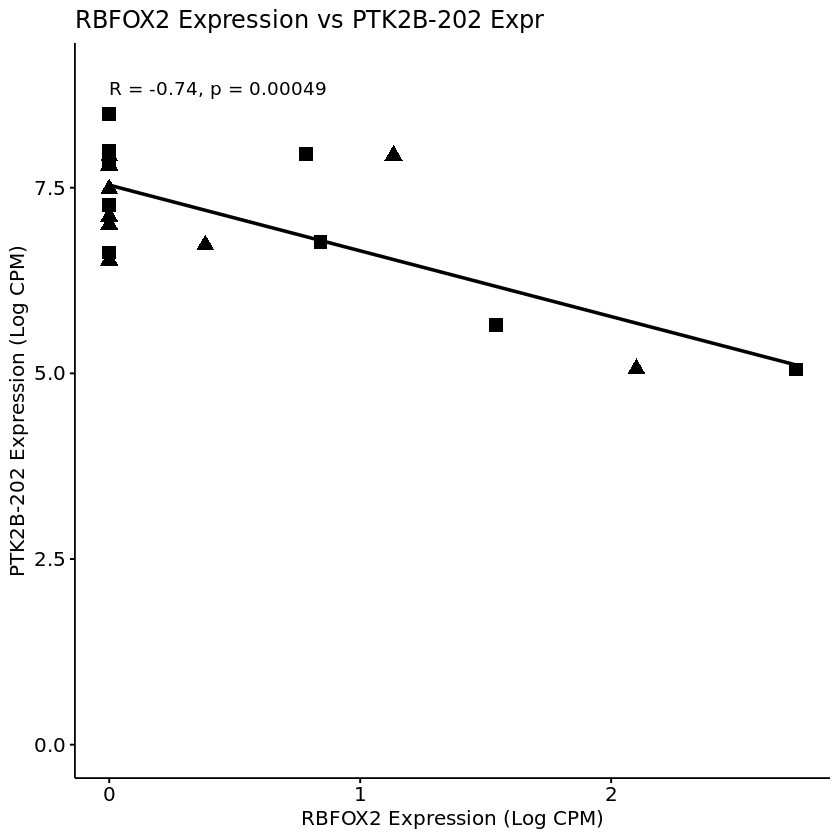

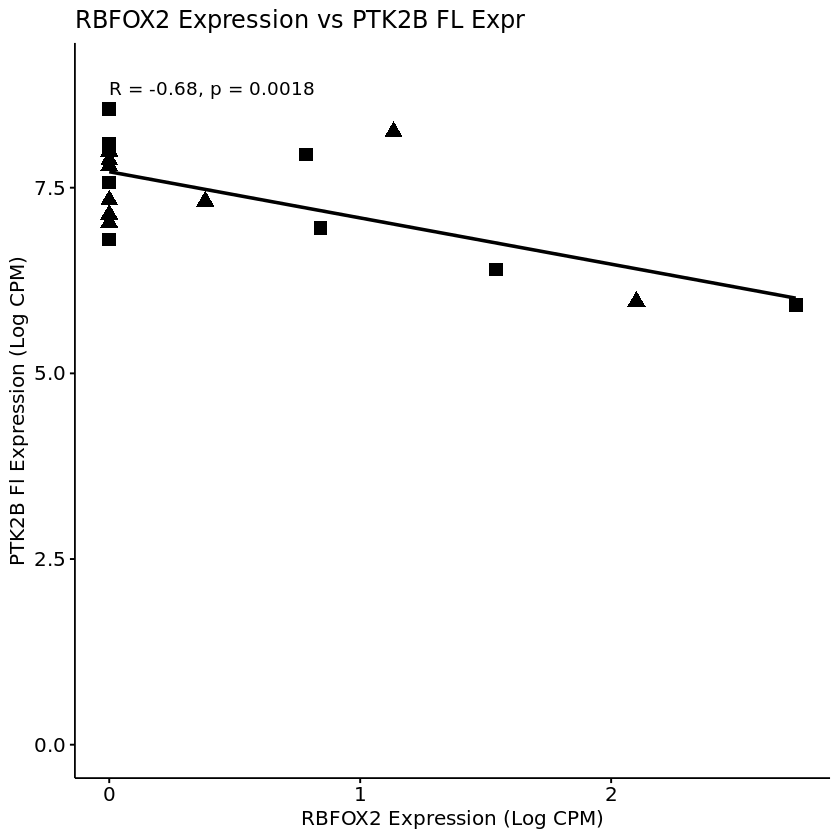

In [296]:
PTKplotinp <- rbind.data.frame(subset(lcpm2.Prog.tmpCor, Phenotype=="PedAML")[,c(1:14,20,32:34)],
                               subset(lcpm2.Stem.tmpCor, Phenotype=="PedAML")[,c(1:14,20,32:34)])

ggscatter(PTKplotinp, x="RBFOX2", y="PTK2B.202", #color="black", 
          palette=c("black"),
          size=c(3.5,3.5)[factor(PTKplotinp$Cell.type)],
          shape = c(17,15)[factor(PTKplotinp$Cell.type)],
          title = "RBFOX2 Expression vs PTK2B-202 Expr") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("PTK2B-202 Expression (Log CPM)") + xlab("RBFOX2 Expression (Log CPM)") + 
          stat_cor(output.type = "text", label.x = 0, na.rm=TRUE) + 
          #stat_cor(aes(color=Phenotype), output.type = "text", label.x = 0, na.rm=TRUE)  +
          ylim(0,9) +
          #legend("bottomleft", legend=c("Stem Cells", "Progenitors"), pch = c(15,17)) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          
#dev.off()

ggscatter(PTKplotinp, x="RBFOX2", y="PTK2B", #color="black", 
          palette=c("black"),
          size=c(3.5,3.5)[factor(PTKplotinp$Cell.type)],
          shape = c(17,15)[factor(PTKplotinp$Cell.type)],
          title = "RBFOX2 Expression vs PTK2B FL Expr") +
          #shape=c(15, 17)[factor(lcpm.Stem.APOBEC3C$Mutation[-10])]) + 
          stat_smooth(method="lm", se=FALSE, col="black") + 
          ylab("PTK2B Fl Expression (Log CPM)") + xlab("RBFOX2 Expression (Log CPM)") + 
          stat_cor(output.type = "text", label.x = 0, na.rm=TRUE) + 
          #stat_cor(aes(color=Phenotype), output.type = "text", label.x = 0, na.rm=TRUE)  +
          ylim(0,9) +
          #legend("bottomleft", legend=c("Stem Cells", "Progenitors"), pch = c(15,17)) +
          guides(colour = guide_legend(override.aes = list(size=5)))
          

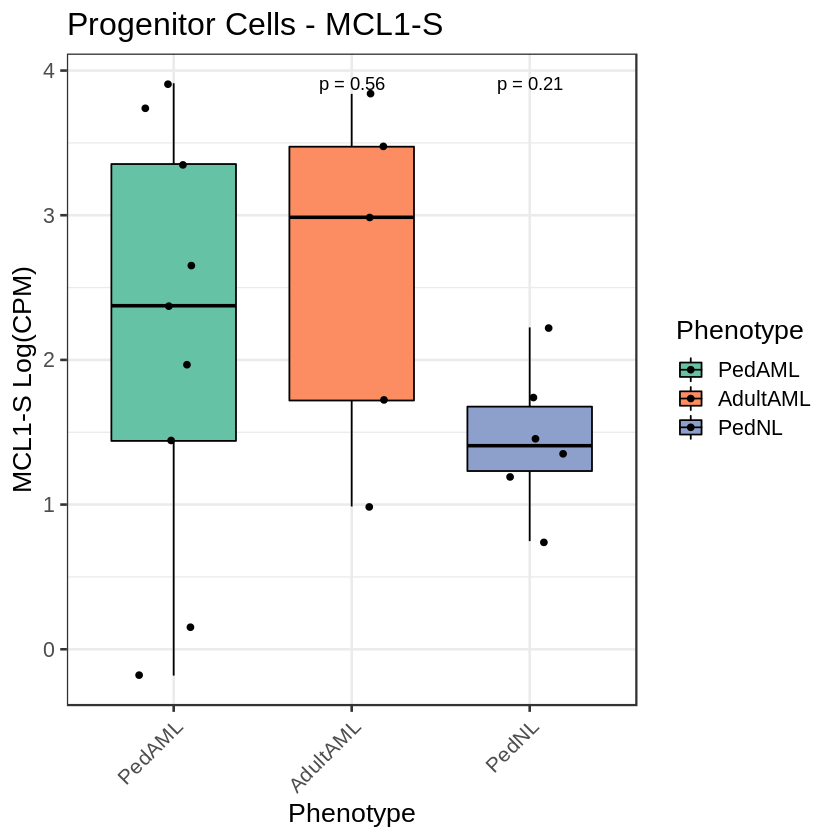

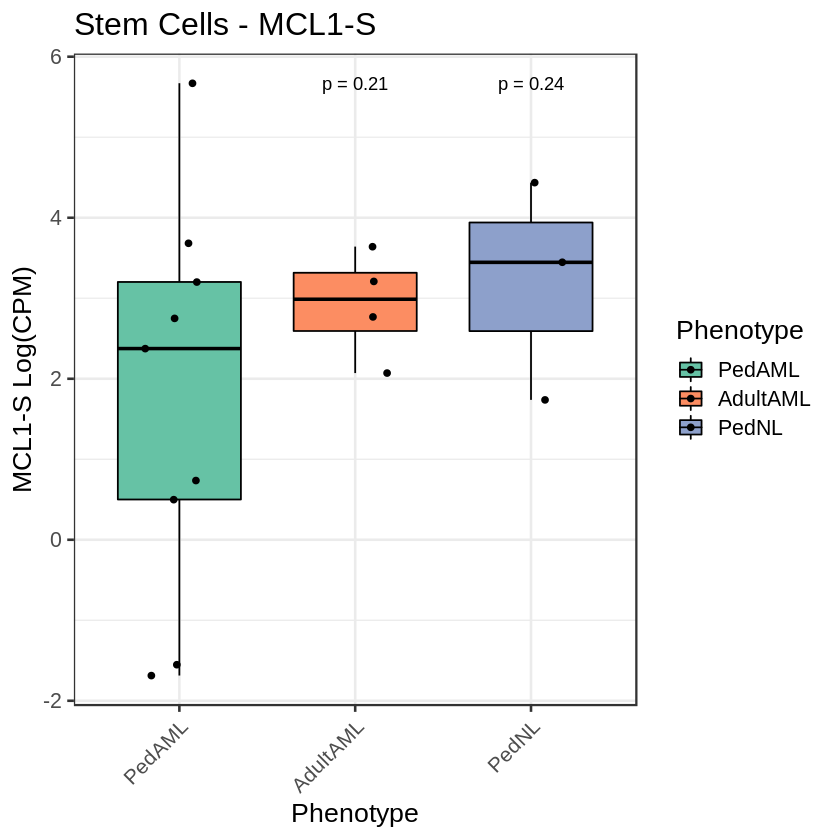

In [160]:
#pdf(file="Holm_Jamieson_Prog_MCL1_S_byPhenotype_04142020.pdf", width=7, height=7)
ggboxplot(X.tx.lcpm.Prog.df, x="Phenotype", y="MCL1.S", add=c("jitter"), fill="Phenotype",
         palette = c("#667991", "#d99197")) + 
    theme_bw(base_size=16) + ylab("MCL1-S Log(CPM)") + labs(title="Progenitor Cells - MCL1-S") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1))+ 
    stat_compare_means(method="t.test", label = "p.format", ref.group="PedAML")
#dev.off()

#pdf(file="Holm_Jamieson_Stem_MCL1_S_byPhenotype_041452020.pdf", width=7, height=7)
ggboxplot(X.tx.lcpm.Stem.df, x="Phenotype", y="MCL1.S", add=c("jitter"), fill="Phenotype",
         palette = c("#667991", "#d99197")) + 
    theme_bw(base_size=16) + ylab("MCL1-S Log(CPM)") + labs(title="Stem Cells - MCL1-S") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1))+ 
    stat_compare_means(method="t.test", label = "p.format", ref.group="PedAML")
#dev.off()

In [25]:
head(X.tx.lcpm.Prog.df)

PTK2B.202 MCL1.S    MCL1.L    BCLX.L   BCL2.L  
X02id38cellPROGENITORS 7.800795  3.3539551  9.546475 2.841230 5.189762
X06id90cellPROGENITORS 6.521826  2.6534079 10.029005 1.776091 5.494413
X04id78cellPROGENITORS 7.111601  2.3745552 10.041161 4.819890 3.273711
X06id00066PRO          7.925756  0.1612095  7.543887 4.066557 4.435292
X01x00077xPROGENIT     7.001973  1.9686893 10.321396 4.328244 3.056502
X03x11379xHPCxxxxx     7.935595  3.7401847 10.533004 4.935924 5.642979
                       Phenotype
X02id38cellPROGENITORS PedAML   
X06id90cellPROGENITORS PedAML   
X04id78cellPROGENITORS PedAML   
X06id00066PRO          PedAML   
X01x00077xPROGENIT     PedAML   
X03x11379xHPCxxxxx     PedAML

In [109]:
X.tx.lcpm.Prog.df.filt <- X.tx.lcpm.Prog.df[X.tx.lcpm.Prog.df$Phenotype %in% c("PedAML", "PedNL"),]
X.tx.lcpm.Prog.df.filt$Phenotype <- factor(as.character(X.tx.lcpm.Prog.df.filt$Phenotype), 
                                          levels=c("PedAML", "PedNL"))
X.tx.lcpm.Stem.df.filt <- X.tx.lcpm.Stem.df[X.tx.lcpm.Stem.df$Phenotype %in% c("PedAML", "PedNL"),]
X.tx.lcpm.Stem.df.filt$Phenotype <- factor(as.character(X.tx.lcpm.Stem.df.filt$Phenotype), 
                                          levels=c("PedAML", "PedNL"))

png(file="Holm_Jamieson_Prog_BCLX_L_byPhenotype_11182020.png", width=6, height=9, units='in', res=300)
ggboxplot(X.tx.lcpm.Prog.df.filt, x="Phenotype", y="BCLX.L", add=c("jitter"), fill="Phenotype",
         palette =  c("#657991", "#C4C7C9")) + 
    theme_bw(base_size=16) + ylab("BCLX-L Log(CPM)") + labs(title="CD34+CD38+Lin- - BCLX-L") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1))+ 
    stat_compare_means(method="t.test", label = "p.format", ref.group="PedAML")
dev.off()

png(file="Holm_Jamieson_Stem_BCLX_L_byPhenotype_11182020.png", width=6, height=9, units='in', res=300)
ggboxplot(X.tx.lcpm.Stem.df.filt, x="Phenotype", y="BCLX.L", add=c("jitter"), fill="Phenotype",
         palette =  c("#657991", "#C4C7C9")) + 
    theme_bw(base_size=16) + ylab("BCLX-L Log(CPM)") + labs(title="CD34+CD38-Lin- - BCLX-L") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1))+ 
    stat_compare_means(method="t.test", label = "p.format", ref.group="PedAML")
dev.off()

png 
  2

png 
  2

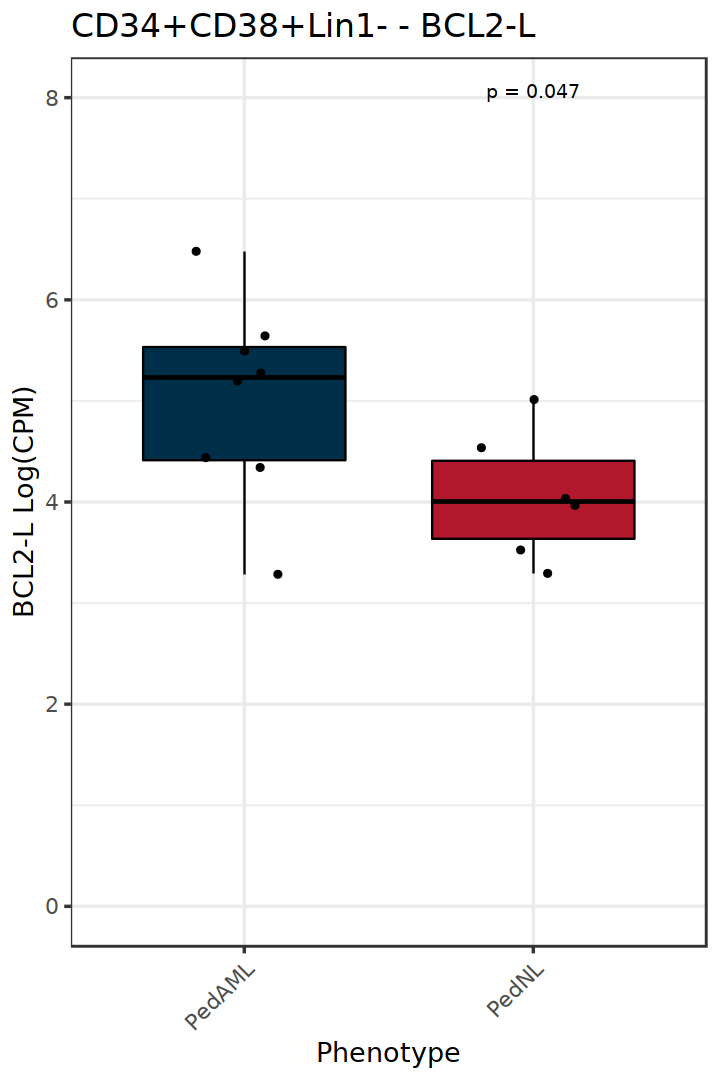

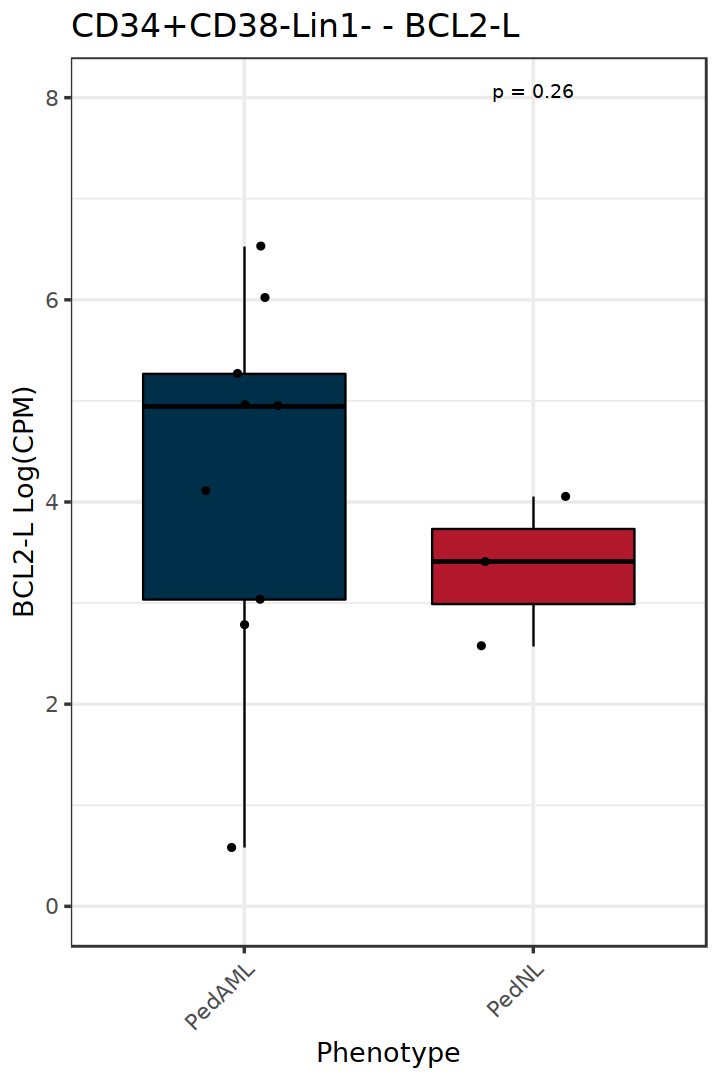

In [39]:
#png(file="Holm_Jamieson_Prog_BCL2_L_byPhenotype_11182020.png", width=6, height=9, units='in', res=300)
options(repr.plot.width=6, repr.plot.height=9)
ggboxplot(subset(X.tx.lcpm.Prog.df[-7,], Phenotype != "AdultAML"), x="Phenotype", y="BCL2.L", add=c("jitter"), fill="Phenotype",
         palette = c("#003049", "#B2182B")) + ylim(0,8) +
    theme_bw(base_size=16) + ylab("BCL2-L Log(CPM)") + labs(title="CD34+CD38+Lin1- - BCL2-L") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1), legend.position="none")+ 
    stat_compare_means(method="t.test", label = "p.format", ref.group="PedAML")
#dev.off()

#pdf(file="Holm_Jamieson_Prog_BCL2_L_byPhenotype_11122020.pdf", width=7, height=7)
#ggboxplot(subset(X.tx.lcpm.Prog.df, Phenotype != "AdultAML"), x="Phenotype", y="BCL2.L", add=c("jitter"), fill="Phenotype",
#         palette = c("#657991", "#C4C7C9")) + 
#    theme_bw(base_size=16) + ylab("BCL2-L Log(CPM)") + labs(title="CD34+CD38+Lin1- - BCL2-L") + 
#    theme(axis.text.x = element_text(angle = 45, hjust=1))+ 
#    stat_compare_means(method="t.test", label = "p.format", ref.group="PedAML")
#dev.off()

#png(file="Holm_Jamieson_Stem_BCL2_L_byPhenotype_11182020.png", width=6, height=9, units='in', res=300)
options(repr.plot.width=6, repr.plot.height=9)
ggboxplot(subset(X.tx.lcpm.Stem.df, Phenotype != "AdultAML"), x="Phenotype", y="BCL2.L", add=c("jitter"), fill="Phenotype",
         palette = c("#003049", "#B2182B")) + ylim(0,8) +
    theme_bw(base_size=16) + ylab("BCL2-L Log(CPM)") + labs(title="CD34+CD38-Lin1- - BCL2-L") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1), legend.position="none")+ 
    stat_compare_means(method="t.test", label = "p.format", ref.group="PedAML")
#dev.off()


In [204]:
png(file="DerWerf_Jamieson_Prog_SF3B1_201_byPhenotype_12102020.png", width=7, height=7, res=300, units="in")
ggboxplot(subset(X.tx.lcpm.Stem.df[-7,], Phenotype != "AdultAML"), x="Phenotype", y="SF3B3.201", add=c("jitter"), fill="Phenotype",
         palette = c("#657991","#C4C7C9")) + 
    theme_bw(base_size=16) + ylab("SF3B3 Log(CPM)") + labs(title="Progenitor Cells - SF3B3 - 201") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1))+ theme(legend.position = "none") +
    stat_compare_means(method="t.test", label = "p.format", ref.group="PedAML")
dev.off()

png(file="DerWerf_Jamieson_Stem_SF3B1_201_byPhenotype_12102020.png", width=7, height=7, res=300, units="in")
ggboxplot(subset(X.tx.lcpm.Stem.df, Phenotype != "AdultAML"), x="Phenotype", y="SF3B3.201", add=c("jitter"), fill="Phenotype",
         palette = c("#657991","#C4C7C9")) + 
    theme_bw(base_size=16) + ylab("SF3B3 Log(CPM)") + labs(title="Stem Cells - SF3B3 - 201") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1)) + theme(legend.position = "none") +
    stat_compare_means(method="t.test", label = "p.format", ref.group="PedAML")
dev.off()

png 
  2

png 
  2

In [207]:
png(file="DerWerf_Jamieson_Prog_SF3B1_207_byPhenotype_12102020.png", width=7, height=7, res=300, units="in")
ggboxplot(subset(X.tx.lcpm.unfilt.Prog.df[-7,], Phenotype != "AdultAML"), x="Phenotype", y="SF3B3.207", add=c("jitter"), fill="Phenotype",
         palette = c("#657991","#C4C7C9")) + 
    theme_bw(base_size=16) + ylab("SF3B3 Log(CPM)") + labs(title="Progenitor Cells - SF3B3 - 207") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1)) + theme(legend.position = "none") +
    stat_compare_means(method="t.test", label = "p.format", ref.group="PedAML")
dev.off()

png(file="DerWerf_Jamieson_Stem_SF3B1_207_byPhenotype_12102020.png", width=7, height=7, res=300, units="in")
ggboxplot(subset(X.tx.lcpm.unfilt.Prog.df, Phenotype != "AdultAML"), x="Phenotype", y="SF3B3.207", add=c("jitter"), fill="Phenotype",
         palette = c("#657991","#C4C7C9")) + 
    theme_bw(base_size=16) + ylab("SF3B3 Log(CPM)") + labs(title="Stem Cells - SF3B3 - 207") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1)) + theme(legend.position = "none") +
    stat_compare_means(method="t.test", label = "p.format", ref.group="PedAML")
dev.off()

png(file="DerWerf_Jamieson_Prog_SF3B1_215_byPhenotype_12102020.png", width=7, height=7, res=300, units="in")
ggboxplot(subset(X.tx.lcpm.unfilt.Prog.df[-7,], Phenotype != "AdultAML"), x="Phenotype", y="SF3B3.215", add=c("jitter"), fill="Phenotype",
         palette = c("#657991","#C4C7C9")) + 
    theme_bw(base_size=16) + ylab("SF3B3 Log(CPM)") + labs(title="Progenitor Cells - SF3B3 - 215") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1)) + theme(legend.position = "none") +
    stat_compare_means(method="t.test", label = "p.format", ref.group="PedAML")
dev.off()

png(file="DerWerf_Jamieson_Stem_SF3B1_215_byPhenotype_12102020.png", width=7, height=7, res=300, units="in")
ggboxplot(subset(X.tx.lcpm.unfilt.Prog.df, Phenotype != "AdultAML"), x="Phenotype", y="SF3B3.215", add=c("jitter"), fill="Phenotype",
         palette = c("#657991","#C4C7C9")) + 
    theme_bw(base_size=16) + ylab("SF3B3 Log(CPM)") + labs(title="Stem Cells - SF3B3 - 215") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1)) + theme(legend.position = "none") +
    stat_compare_means(method="t.test", label = "p.format", ref.group="PedAML")
dev.off()

png 
  2

png 
  2

png 
  2

png 
  2

In [33]:
ENST2EG2SYM <- toTable(org.Hs.egENSEMBLTRANS2EG)
ENST2EG2SYM$SYM <- ENS2EG2SYM[match(ENST2EG2SYM$gene_id, ENS2EG2SYM$gene_id),"SYM"]
head(ENST2EG2SYM)
table(ENST2EG2SYM$gene_id %in% "6774")

gene_id trans_id        SYM  
1 3       ENST00000543404 A2MP1
2 3       ENST00000566278 A2MP1
3 3       ENST00000545343 A2MP1
4 3       ENST00000544183 A2MP1
5 10      ENST00000286479 NAT2 
6 10      ENST00000520116 NAT2


FALSE 
40183 

In [32]:
RBFOX.genes <- genes[grep("RBFOX", genes$SYMBOL),]
RBFOX.genes
RBFOX.genes[RBFOX.genes$ENSEMBL %in% gsub("[.].*$","",rownames(lcpm3.Prog)),]
RBFOX.genes[RBFOX.genes$ENSEMBL %in% gsub("[.].*$","",rownames(lcpm3.Stem)),]

ENSEMBL         ENTREZID SYMBOL
1441  ENSG00000078328 54715    RBFOX1
2292  ENSG00000100320 23543    RBFOX2
12243 ENSG00000167281 146713   RBFOX3

ENSEMBL         ENTREZID SYMBOL
2292  ENSG00000100320 23543    RBFOX2
12243 ENSG00000167281 146713   RBFOX3

ENSEMBL         ENTREZID SYMBOL
2292 ENSG00000100320 23543    RBFOX2

In [196]:
lcpm.Prog.RBFOXs <- do.call(cbind, c(meta2.Prog.filt, lapply(2:3, function(y)   {
        i <- RBFOX.genes[y,]
        t <- data.frame(as.numeric(lcpm2.Prog[gsub("[.].*$", "", rownames(lcpm2.Prog)) %in% i[1]]))
        colnames(t) <- i[3]
        return(t)
})))
lcpm.Stem.RBFOXs <- do.call(cbind, c(meta2.Stem.filt, lapply(3:3, function(y)   {
        i <- RBFOX.genes[y,]
        t <- data.frame(LogCPM=as.numeric(lcpm2.Stem[gsub("[.].*$", "", rownames(lcpm2.Stem)) %in% i[1]]))
        colnames(t)<- "RBFOX2"
        return(t)
})))
dim(lcpm.Prog.RBFOXs)
dim(lcpm.Stem.RBFOXs)
lcpm2.Prog[gsub("[.].*$", "", rownames(lcpm2.Prog)) %in% c("ENSG00000100320"),,drop=FALSE]
lcpm2.Stem[gsub("[.].*$", "", rownames(lcpm2.Stem)) %in% c("ENSG00000100320"),,drop=FALSE]
lcpm.Prog.RBFOXs
lcpm.Stem.RBFOXs

[1] 20 17

[1] 16 16

X02id38cellPROGENITORS X06id90cellPROGENITORS
ENSG00000100320.18 -7.384468              -7.384468             
                   X04id78cellPROGENITORS X06id00066PRO X03id11474HPC
ENSG00000100320.18 -3.200693              -7.384468     -0.4996334   
                   X01id11251HPC X01x00077xPROGENIT X03x11379xHPCxxxxx
ENSG00000100320.18 -7.384468     -2.810942          1.105093          
                   X05x00047xPLUSPLUS X06x00077xPLUSPLUS X07x00023xPLUSPLUS
ENSG00000100320.18 1.859991           2.112331           -1.47135          
                   X09x00020xPLUSPLUS X11x00082xPLUSPLUS X14x12488xPLUSPLUS
ENSG00000100320.18 0.2944602          -2.585471          2.086635          
                   X15x12584xPLUSPLUS X17x12451xPLUSPLUS X18x10720xPLUSPLUS
ENSG00000100320.18 0.3356424          -1.892977          2.08838           
                   X02pid24760ctHPC X04pid24474ctHPC X06pid25376ctHPC
ENSG00000100320.18 2.103545         2.086062         1.565143

X01id38cellHSC Xcell05id90HSC X03id78cellHSC X05id00066HSC
ENSG00000100320.18 -2.305119      0.7953685      -6.950975      0.7359242    
                   X04id11474HSC X02id11251HSC X02x11379xHSCxxxxx
ENSG00000100320.18 -0.3866441    -0.5265699    -3.766904         
                   X04x00068xPLUSMINS X08x00020xPLUSMINS X10x00082xPLUSMINS
ENSG00000100320.18 -6.950975          3.106315           1.817216          
                   X12x12484xPLUSMINS X13x12488xPLUSMINS X16x12451xPLUSMINS
ENSG00000100320.18 1.512787           2.72316            -6.950975         
                   X01pid24760ctHSC X03pid24474ctHSC X05pid25376ctHSC
ENSG00000100320.18 3.514118         3.403197         2.966291

SequenceRun                                                SequenceDate
1  ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91 5/5/19      
2  ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91 5/5/19      
3  ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91 5/5/19      
4  ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91 6/26/19     
5  ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91 6/26/19     
6  ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91 6/26/19     
7  ca_ne_630_001_400_060_JAMIESON_SN_human-ensembl-grch38-r91 8/31/19     
8  ca_ne_630_001_400_060_JAMIESON_SN_human-ensembl-grch38-r91 8/31/19     
9  ca_ne_630_001_400_060_JAMIESON_SN_human-ensembl-grch38-r91 8/31/19     
10 ca_ne_630_001_400_060_JAMIESON_SN_human-ensembl-grch38-r91 8/31/19     
11 ca_ne_645_001_300_060_JAMIESON_SN_human-ensembl-grch38-r91 8/31/19     
12 ca_ne_645_001_300_060_JAMIESON_SN_human-ensembl-grch38-r91 8/31/19     
13 ca_ne_645_001_300_060_JAMIESON_SN_human-ensembl-grch38-r91 8/31/19     
14 ca_ne_650_001_360_060_JAMIESON_SN_human-ensembl-grch38-r91 9/1/19      
15 ca_ne_650_001_360_060_JAMIESON_SN_human-ensembl-grch38-r91 9/1/19      
16 ca_ne_650_001_360_060_JAMIESON_SN_human-ensembl-grch38-r91 9/1/19      
17 ca_ne_650_001_360_060_JAMIESON_SN_human-ensembl-grch38-r91 9/1/19      
18 ca_ne_714_001_400_070_JAMIESON_SN_human-ensembl-grch38-r91 12/19/19    
19 ca_ne_714_001_400_070_JAMIESON_SN_human-ensembl-grch38-r91 12/19/19    
20 ca_ne_714_001_400_070_JAMIESON_SN_human-ensembl-grch38-r91 12/19/19    
   Sample                SampleName     Patient.ID RIN  X       
1  02id38cellPROGENITORS 38 Progenitors 32538       9.7 PedAML  
2  06id90cellPROGENITORS 90 Progenitors 22390      10.0 PedAML  
3  04id78cellPROGENITORS 78 Progenitors 28678      10.0 PedAML  
4  06id00066PRO          66 Progenitors 22666       9.8 PedAML  
5  03id11474HPC          11474 HPC      11474       9.6 AdultAML
6  01id11251HPC          11251 HPC      11251       9.3 AdultAML
7  01x00077xPROGENIT     77 Progenitors 27177       9.8 PedAML  
8  03x11379xHPCxxxxx     11379 HPC      11379       9.7 PedAML  
9  05x00047xPLUSPLUS     47 PlPl        12747       9.8 PedNL   
10 06x00077xPLUSPLUS     77 PlPl        17677       9.6 PedNL   
11 07x00023xPLUSPLUS     23 PlPl         7023       8.2 AdultAML
12 09x00020xPLUSPLUS     20 PlPl        11220       8.5 AdultAML
13 11x00082xPLUSPLUS     82 PlPl        12682       9.9 AdultAML
14 14x12488xPLUSPLUS     12488 PlPl     12488       9.8 PedAML  
15 15x12584xPLUSPLUS     12584 PlPl     12584       9.8 PedAML  
16 17x12451xPLUSPLUS     12451 PlPl     12451       9.9 PedAML  
17 18x10720xPLUSPLUS     10720 PlPl     10720      10.0 PedNL   
18 02pid24760ctHPC       24760 HPC      24760       9.9 PedNL   
19 04pid24474ctHPC       24474 HPC      24474       9.9 PedNL   
20 06pid25376ctHPC       25376 HPC      25376       9.7 PedNL   
   Adult.Pediatric Disease      Cell.type Sorted.Cell.Type Tissue.Source
1  Pediatric       AML          Prog      34+38+           PB           
2  Pediatric       AML          Prog      34+38+           BM           
3  Pediatric       AML          Prog      34+38+           PB           
4  Pediatric       AML          Prog      34+38+           BM           
5  Adult           AML          Prog      34+38+           PB           
6  Adult           AML          Prog      34+38+           BM           
7  Pediatric       AML          Prog      34+38+           BM           
8  Pediatric       AML          Prog      34+38+           PB           
9  Pediatric       non-leukemic Prog      34+38+           BM           
10 Pediatric       non-leukemic Prog      34+38+           BM           
11 Adult           AML          Prog      34+38+           BM           
12 Adult           AML          Prog      34+38+           BM           
13 Adult           AML          Prog      34+38+           BM           
14 Pediatric       AML          Prog     

SequenceRun                                                SequenceDate
1  ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91 5/5/19      
2  ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91 5/5/19      
3  ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91 5/5/19      
4  ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91 6/26/19     
5  ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91 6/26/19     
6  ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91 6/26/19     
7  ca_ne_630_001_400_060_JAMIESON_SN_human-ensembl-grch38-r91 8/31/19     
8  ca_ne_630_001_400_060_JAMIESON_SN_human-ensembl-grch38-r91 8/31/19     
9  ca_ne_645_001_300_060_JAMIESON_SN_human-ensembl-grch38-r91 8/31/19     
10 ca_ne_645_001_300_060_JAMIESON_SN_human-ensembl-grch38-r91 8/31/19     
11 ca_ne_645_001_300_060_JAMIESON_SN_human-ensembl-grch38-r91 8/31/19     
12 ca_ne_650_001_360_060_JAMIESON_SN_human-ensembl-grch38-r91 9/1/19      
13 ca_ne_650_001_360_060_JAMIESON_SN_human-ensembl-grch38-r91 9/1/19      
14 ca_ne_714_001_400_070_JAMIESON_SN_human-ensembl-grch38-r91 12/19/19    
15 ca_ne_714_001_400_070_JAMIESON_SN_human-ensembl-grch38-r91 12/19/19    
16 ca_ne_714_001_400_070_JAMIESON_SN_human-ensembl-grch38-r91 12/19/19    
   Sample            SampleName Patient.ID RIN  X        Adult.Pediatric
1  01id38cellHSC     38 HSC     32538      10.0 PedAML   Pediatric      
2  cell05id90HSC     90 HSC     22390      10.0 PedAML   Pediatric      
3  03id78cellHSC     78 HSC     28678      10.0 PedAML   Pediatric      
4  05id00066HSC      66 HSC     22666       7.7 PedAML   Pediatric      
5  04id11474HSC      11474 HSC  11474      10.0 AdultAML Adult          
6  02id11251HSC      11251 HSC  11251       9.3 AdultAML Adult          
7  02x11379xHSCxxxxx 11379 HSC  11379       9.6 PedAML   Pediatric      
8  04x00068xPLUSMINS  68PlMn    11868       6.8 PedAML   Pediatric      
9  08x00020xPLUSMINS 20 PlMn    11220       7.3 AdultAML Adult          
10 10x00082xPLUSMINS 82 PlMn    12682       9.9 AdultAML Adult          
11 12x12484xPLUSMINS 12484 PlMn 12584       9.9 PedAML   Pediatric      
12 13x12488xPLUSMINS 12488 PlMn 12488       7.8 PedAML   Pediatric      
13 16x12451xPLUSMINS 12451 PlMn 12451       8.7 PedAML   Pediatric      
14 01pid24760ctHSC   24760 HSC  24760       9.1 PedNL    Pediatric      
15 03pid24474ctHSC   24474 HSC  24474      10.0 PedNL    Pediatric      
16 05pid25376ctHSC   25376 HSC  25376       8.8 PedNL    Pediatric      
   Disease      Cell.type Sorted.Cell.Type Tissue.Source RNA.seq.status
1  AML          Stem      34+38-           PB            Completed     
2  AML          Stem      34+38-           BM            Completed     
3  AML          Stem      34+38-           PB            Completed     
4  AML          Stem      34+38-           BM            Completed     
5  AML          Stem      34+38-           PB            Completed     
6  AML          Stem      34+38-           BM            Completed     
7  AML          Stem      34+38-           PB            Completed     
8  AML          Stem      34+38-           PB            Completed     
9  AML          Stem      34+38-           BM            Completed     
10 AML          Stem      34+38-           BM            Completed     
11 AML          Stem      34+38-           PB            Completed     
12 AML          Stem      34+38-           PB            Completed     
13 AML          Stem      34+38-           PB            Completed     
14 non-leukemic Stem      34+38-           BM            Completed     
15 non-leukemic Stem      34+38-           BM            Completed     
16 non-leukemic Stem      34+38-           BM            Completed     
   Reads     Phenotype RBFOX2     
1   81234305 PedAML    -1.99476269
2   72625632 PedAML     3.83614386
3   68483294 PedAML    -2.27097182
4   77519907 PedAML    -6.95097499
5   79123032 AdultAML  -6.95097499
6   81776486 AdultAML  -0.34797514
7  101108249 PedAM

In [192]:
dim(X.tx.lcpm.Prog.df[-7,])
dim(lcpm.Prog.RBFOXs)
dim(X.tx.lcpm.Stem.df)
dim(lcpm.Stem.RBFOXs)
lcpm.Prog.RBFOXs$Sample
#rownames(X.tx.lcpm.Prog.df)
table(paste0("X", lcpm.Prog.RBFOXs$Sample) %in% rownames(X.tx.lcpm.Prog.df))
lcpm.Stem.RBFOXs$Sample
#rownames(X.tx.lcpm.Stem.df)
table(paste0("X", lcpm.Stem.RBFOXs$Sample) %in% rownames(X.tx.lcpm.Stem.df))
head(X.tx.lcpm.Prog.df)
head(X.tx.lcpm.Stem.df)

[1] 19  7

[1] 20 17

[1] 16  7

[1] 16 16

[1] 02id38cellPROGENITORS 06id90cellPROGENITORS 04id78cellPROGENITORS
 [4] 06id00066PRO          03id11474HPC          01id11251HPC         
 [7] 01x00077xPROGENIT     03x11379xHPCxxxxx     05x00047xPLUSPLUS    
[10] 06x00077xPLUSPLUS     07x00023xPLUSPLUS     09x00020xPLUSPLUS    
[13] 11x00082xPLUSPLUS     14x12488xPLUSPLUS     15x12584xPLUSPLUS    
[16] 17x12451xPLUSPLUS     18x10720xPLUSPLUS     02pid24760ctHPC      
[19] 04pid24474ctHPC       06pid25376ctHPC      
20 Levels: 01id11251HPC 01x00077xPROGENIT ... 18x10720xPLUSPLUS


TRUE 
  20 

[1] 01id38cellHSC     cell05id90HSC     03id78cellHSC     05id00066HSC     
 [5] 04id11474HSC      02id11251HSC      02x11379xHSCxxxxx 04x00068xPLUSMINS
 [9] 08x00020xPLUSMINS 10x00082xPLUSMINS 12x12484xPLUSMINS 13x12488xPLUSMINS
[13] 16x12451xPLUSMINS 01pid24760ctHSC   03pid24474ctHSC   05pid25376ctHSC  
16 Levels: 01id38cellHSC 01pid24760ctHSC 02id11251HSC ... cell05id90HSC


TRUE 
  16 

PTK2B.202 MCL1.S    MCL1.L    BCLX.L   BCL2.L  
X02id38cellPROGENITORS 7.800795  3.3539551  9.546475 2.841230 5.189762
X06id90cellPROGENITORS 6.521826  2.6534079 10.029005 1.776091 5.494413
X04id78cellPROGENITORS 7.111601  2.3745552 10.041161 4.819890 3.273711
X06id00066PRO          7.925756  0.1612095  7.543887 4.066557 4.435292
X01x00077xPROGENIT     7.001973  1.9686893 10.321396 4.328244 3.056502
X03x11379xHPCxxxxx     7.935595  3.7401847 10.533004 4.935924 5.642979
                       SF3B3.201 Phenotype
X02id38cellPROGENITORS 7.642364  PedAML   
X06id90cellPROGENITORS 6.362856  PedAML   
X04id78cellPROGENITORS 6.344722  PedAML   
X06id00066PRO          7.795498  PedAML   
X01x00077xPROGENIT     5.403124  PedAML   
X03x11379xHPCxxxxx     6.487876  PedAML

PTK2B.202 MCL1.S     MCL1.L    BCLX.L   BCL2.L   SF3B3.201
X01id38cellHSC     7.823437   3.6804346 10.130090 3.194194 5.265245 7.807656 
Xcell05id90HSC     6.769829   3.2022509 10.529926 4.923296 2.771694 7.130252 
X03id78cellHSC     6.626926   2.7484389  9.782496 1.734837 4.945441 5.901573 
X05id00066HSC      7.954669   0.7351286  7.461370 4.687072 4.109718 7.911807 
X02x11379xHSCxxxxx 8.491089   5.6712648 11.410858 5.208034 6.017293 6.139537 
X04x00068xPLUSMINS 8.000220  -1.6869416  8.837071 4.134874 4.959336 5.403253 
                   Phenotype
X01id38cellHSC     PedAML   
Xcell05id90HSC     PedAML   
X03id78cellHSC     PedAML   
X05id00066HSC      PedAML   
X02x11379xHSCxxxxx PedAML   
X04x00068xPLUSMINS PedAML

In [194]:
cor(lcpm.Prog.RBFOXs$RBFOX2[match(rownames(X.tx.lcpm.Prog.df), paste0("X", lcpm.Prog.RBFOXs$Sample))], 
    as.numeric(as.character(X.tx.lcpm.Prog.df$MCL1.L)))
cor(lcpm.Stem.RBFOXs$RBFOX2[match(rownames(X.tx.lcpm.Stem.df), paste0("X", lcpm.Stem.RBFOXs$Sample))], 
    as.numeric(as.character(X.tx.lcpm.Stem.df$MCL1.L)))

cor(as.numeric(as.character(lcpm.Prog.RBFOXs$RBFOX2[match(rownames(subset(X.tx.lcpm.Prog.df, Phenotype != "AdultAML")), 
                                           paste0("X", lcpm.Prog.RBFOXs$Sample))])), 
    as.numeric(as.character(subset(X.tx.lcpm.Prog.df, Phenotype != "AdultAML")$MCL1.L)))
cor(as.numeric(as.character(lcpm.Stem.RBFOXs$RBFOX2[match(rownames(subset(X.tx.lcpm.Stem.df, Phenotype != "AdultAML")), 
                                           paste0("X", lcpm.Stem.RBFOXs$Sample))])), 
    as.numeric(as.character(subset(X.tx.lcpm.Stem.df, Phenotype != "AdultAML")$MCL1.L)))

[1] -0.1884964

[1] 0.4659837

[1] -0.09123012

[1] 0.4841278

SequenceRun                                                SequenceDate
1 ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91 5/5/19      
2 ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91 5/5/19      
3 ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91 5/5/19      
4 ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91 6/26/19     
7 ca_ne_630_001_400_060_JAMIESON_SN_human-ensembl-grch38-r91 8/31/19     
8 ca_ne_630_001_400_060_JAMIESON_SN_human-ensembl-grch38-r91 8/31/19     
  Sample                SampleName     Patient.ID RIN  X      Adult.Pediatric
1 02id38cellPROGENITORS 38 Progenitors 32538       9.7 PedAML Pediatric      
2 06id90cellPROGENITORS 90 Progenitors 22390      10.0 PedAML Pediatric      
3 04id78cellPROGENITORS 78 Progenitors 28678      10.0 PedAML Pediatric      
4 06id00066PRO          66 Progenitors 22666       9.8 PedAML Pediatric      
7 01x00077xPROGENIT     77 Progenitors 27177       9.8 PedAML Pediatric      
8 03x11379xHPCxxxxx     11379 HPC      11379       9.7 PedAML Pediatric      
  Disease Cell.type Sorted.Cell.Type Tissue.Source RNA.seq.status Reads   
1 AML     Prog      34+38+           PB            Completed      73196851
2 AML     Prog      34+38+           BM            Completed      81721991
3 AML     Prog      34+38+           PB            Completed      88894032
4 AML     Prog      34+38+           BM            Completed      77343883
7 AML     Prog      34+38+           BM            Completed      68810108
8 AML     Prog      34+38+           PB            Completed      92324550
  Phenotype RBFOX2    RBFOX3      MCL.L    
1 PedAML    -7.384468 -4.81754387  9.546475
2 PedAML    -7.384468 -0.07754600 10.029005
3 PedAML    -3.200693  4.19992470 10.041161
4 PedAML    -7.384468  0.09206335  7.543887
7 PedAML    -2.810942  3.11683877 10.321396
8 PedAML     1.105093  0.03771919 10.533004


Call:
lm(formula = MCL.L ~ RBFOX2, data = lcpm.Prog.RBFOX.MCL.L)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2250 -0.8358 -0.1660  0.5207  2.3114 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.34172    0.26498  35.254   <2e-16 ***
RBFOX2      -0.05785    0.07104  -0.814    0.426    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.109 on 18 degrees of freedom
Multiple R-squared:  0.03553,	Adjusted R-squared:  -0.01805 
F-statistic: 0.6631 on 1 and 18 DF,  p-value: 0.4261


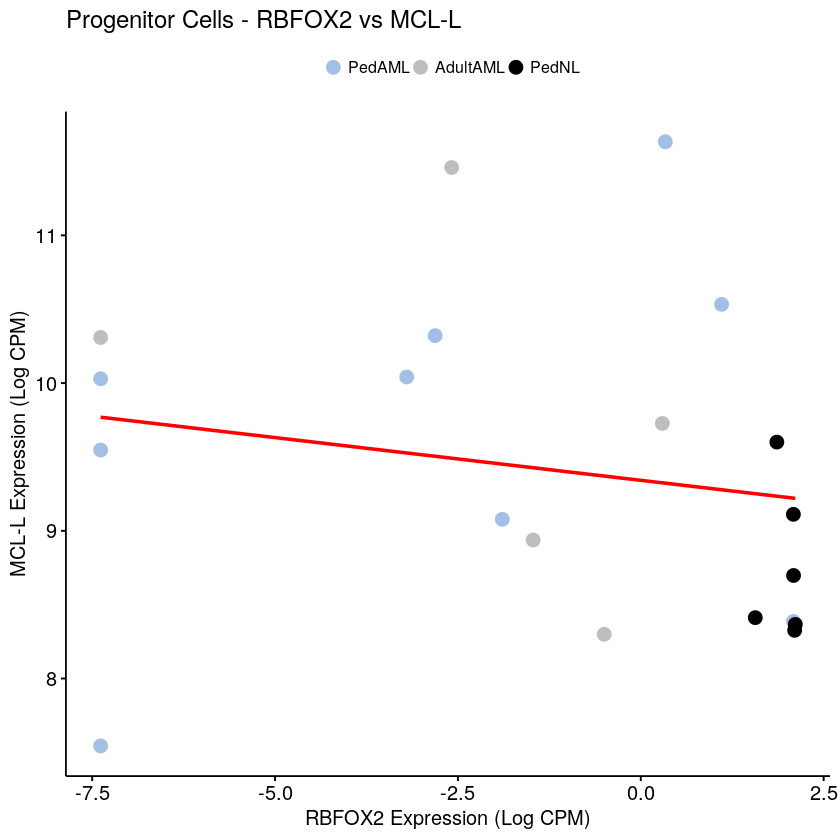

In [197]:
lcpm.Prog.RBFOX.MCL.L <- cbind(lcpm.Prog.RBFOXs[match(rownames(X.tx.lcpm.Prog.df), paste0("X", lcpm.Prog.RBFOXs$Sample)),], 
    MCL.L =as.numeric(as.character(X.tx.lcpm.Prog.df$MCL1.L)))
head(lcpm.Prog.RBFOX.MCL.L)
lcpm.Prog.RBFOX.MCL.L.lm <- lm(MCL.L ~ RBFOX2, data=lcpm.Prog.RBFOX.MCL.L)
summary(lcpm.Prog.RBFOX.MCL.L.lm)
ggscatter(lcpm.Prog.RBFOX.MCL.L, x ="RBFOX2", y="MCL.L", color="Phenotype", palette=c("#A2C0E5", "gray", "black"),
                   title = 'Progenitor Cells - RBFOX2 vs MCL-L', size=3.5) +
          stat_smooth(method="lm", se=FALSE, col="red") + 
          #scale_shape_manual(values=c(16,17,15,18)) + 
          ylab(paste0("MCL-L Expression (Log CPM)")) + xlab("RBFOX2 Expression (Log CPM)") + 
          theme(legend.title=element_text(size=0))
          #stat_smooth(method="lm", se=FALSE, col="black") 
          #guides(colour = guide_legend(override.aes = list(size=4))))

SequenceRun                                                SequenceDate
1 ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91 5/5/19      
2 ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91 5/5/19      
3 ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91 5/5/19      
4 ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91 6/26/19     
7 ca_ne_630_001_400_060_JAMIESON_SN_human-ensembl-grch38-r91 8/31/19     
8 ca_ne_630_001_400_060_JAMIESON_SN_human-ensembl-grch38-r91 8/31/19     
  Sample                SampleName     Patient.ID RIN  X      Adult.Pediatric
1 02id38cellPROGENITORS 38 Progenitors 32538       9.7 PedAML Pediatric      
2 06id90cellPROGENITORS 90 Progenitors 22390      10.0 PedAML Pediatric      
3 04id78cellPROGENITORS 78 Progenitors 28678      10.0 PedAML Pediatric      
4 06id00066PRO          66 Progenitors 22666       9.8 PedAML Pediatric      
7 01x00077xPROGENIT     77 Progenitors 27177       9.8 PedAML Pediatric      
8 03x11379xHPCxxxxx     11379 HPC      11379       9.7 PedAML Pediatric      
  Disease Cell.type Sorted.Cell.Type Tissue.Source RNA.seq.status Reads   
1 AML     Prog      34+38+           PB            Completed      73196851
2 AML     Prog      34+38+           BM            Completed      81721991
3 AML     Prog      34+38+           PB            Completed      88894032
4 AML     Prog      34+38+           BM            Completed      77343883
7 AML     Prog      34+38+           BM            Completed      68810108
8 AML     Prog      34+38+           PB            Completed      92324550
  Phenotype RBFOX2    RBFOX3      MCL.L    
1 PedAML    -7.384468 -4.81754387  9.546475
2 PedAML    -7.384468 -0.07754600 10.029005
3 PedAML    -3.200693  4.19992470 10.041161
4 PedAML    -7.384468  0.09206335  7.543887
7 PedAML    -2.810942  3.11683877 10.321396
8 PedAML     1.105093  0.03771919 10.533004


Call:
lm(formula = MCL.L ~ RBFOX2, data = subset(lcpm.Prog.RBFOX.MCL.L, 
    Phenotype != "AdultAML"))

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9309 -0.8364 -0.1173  0.6146  2.3594 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.28300    0.29734   31.22  1.3e-13 ***
RBFOX2      -0.02597    0.07863   -0.33    0.746    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.112 on 13 degrees of freedom
Multiple R-squared:  0.008323,	Adjusted R-squared:  -0.06796 
F-statistic: 0.1091 on 1 and 13 DF,  p-value: 0.7464


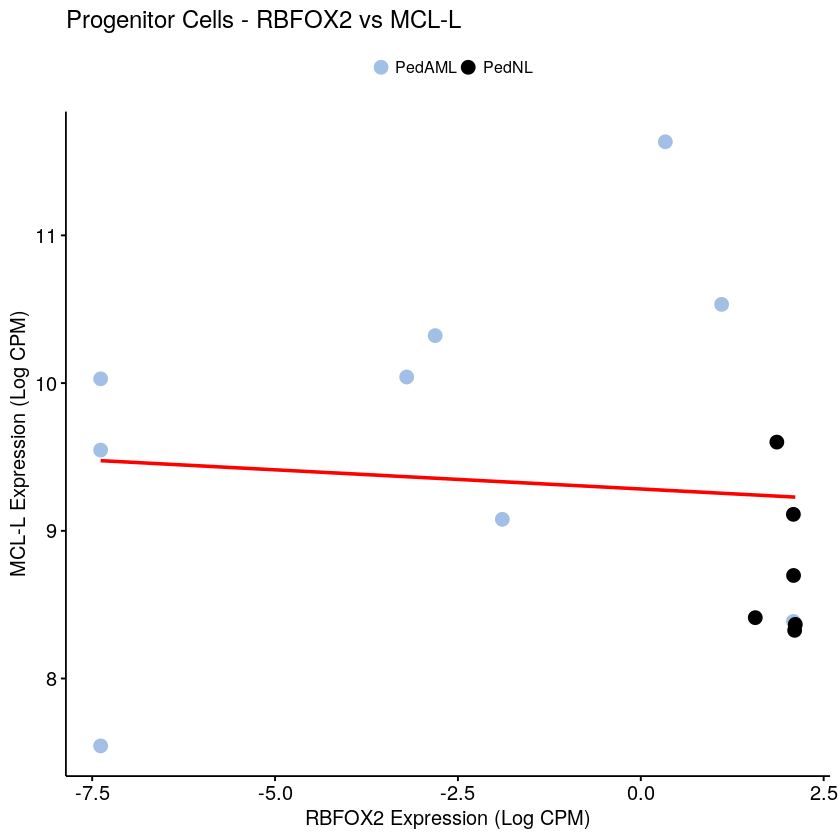

In [201]:
lcpm.Prog.RBFOX.MCL.L <- cbind(lcpm.Prog.RBFOXs[match(rownames(X.tx.lcpm.Prog.df), paste0("X", lcpm.Prog.RBFOXs$Sample)),], 
    MCL.L =as.numeric(as.character(X.tx.lcpm.Prog.df$MCL1.L)))
head(lcpm.Prog.RBFOX.MCL.L)
lcpm.Prog.RBFOX.MCL.L.lm <- lm(MCL.L ~ RBFOX2, data=subset(lcpm.Prog.RBFOX.MCL.L,Phenotype != "AdultAML"))
summary(lcpm.Prog.RBFOX.MCL.L.lm)
ggscatter(subset(lcpm.Prog.RBFOX.MCL.L,Phenotype != "AdultAML"), x ="RBFOX2", y="MCL.L", color="Phenotype", palette=c("#A2C0E5", "black"),
                   title = 'Progenitor Cells - RBFOX2 vs MCL-L', size=3.5) +
          stat_smooth(method="lm", se=FALSE, col="red") + 
          #scale_shape_manual(values=c(16,17,15,18)) + 
          ylab(paste0("MCL-L Expression (Log CPM)")) + xlab("RBFOX2 Expression (Log CPM)") + 
          theme(legend.title=element_text(size=0))
          #stat_smooth(method="lm", se=FALSE, col="black") 
          #guides(colour = guide_legend(override.aes = list(size=4))))

SequenceRun                                                SequenceDate
1  ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91 5/5/19      
2  ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91 5/5/19      
3  ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91 5/5/19      
4  ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91 6/26/19     
7  ca_ne_630_001_400_060_JAMIESON_SN_human-ensembl-grch38-r91 8/31/19     
8  ca_ne_630_001_400_060_JAMIESON_SN_human-ensembl-grch38-r91 8/31/19     
11 ca_ne_645_001_300_060_JAMIESON_SN_human-ensembl-grch38-r91 8/31/19     
12 ca_ne_650_001_360_060_JAMIESON_SN_human-ensembl-grch38-r91 9/1/19      
13 ca_ne_650_001_360_060_JAMIESON_SN_human-ensembl-grch38-r91 9/1/19      
5  ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91 6/26/19     
6  ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91 6/26/19     
9  ca_ne_645_001_300_060_JAMIESON_SN_human-ensembl-grch38-r91 8/31/19     
10 ca_ne_645_001_300_060_JAMIESON_SN_human-ensembl-grch38-r91 8/31/19     
14 ca_ne_714_001_400_070_JAMIESON_SN_human-ensembl-grch38-r91 12/19/19    
15 ca_ne_714_001_400_070_JAMIESON_SN_human-ensembl-grch38-r91 12/19/19    
16 ca_ne_714_001_400_070_JAMIESON_SN_human-ensembl-grch38-r91 12/19/19    
   Sample            SampleName Patient.ID RIN  X        Adult.Pediatric
1  01id38cellHSC     38 HSC     32538      10.0 PedAML   Pediatric      
2  cell05id90HSC     90 HSC     22390      10.0 PedAML   Pediatric      
3  03id78cellHSC     78 HSC     28678      10.0 PedAML   Pediatric      
4  05id00066HSC      66 HSC     22666       7.7 PedAML   Pediatric      
7  02x11379xHSCxxxxx 11379 HSC  11379       9.6 PedAML   Pediatric      
8  04x00068xPLUSMINS  68PlMn    11868       6.8 PedAML   Pediatric      
11 12x12484xPLUSMINS 12484 PlMn 12584       9.9 PedAML   Pediatric      
12 13x12488xPLUSMINS 12488 PlMn 12488       7.8 PedAML   Pediatric      
13 16x12451xPLUSMINS 12451 PlMn 12451       8.7 PedAML   Pediatric      
5  04id11474HSC      11474 HSC  11474      10.0 AdultAML Adult          
6  02id11251HSC      11251 HSC  11251       9.3 AdultAML Adult          
9  08x00020xPLUSMINS 20 PlMn    11220       7.3 AdultAML Adult          
10 10x00082xPLUSMINS 82 PlMn    12682       9.9 AdultAML Adult          
14 01pid24760ctHSC   24760 HSC  24760       9.1 PedNL    Pediatric      
15 03pid24474ctHSC   24474 HSC  24474      10.0 PedNL    Pediatric      
16 05pid25376ctHSC   25376 HSC  25376       8.8 PedNL    Pediatric      
   Disease      Cell.type Sorted.Cell.Type Tissue.Source RNA.seq.status
1  AML          Stem      34+38-           PB            Completed     
2  AML          Stem      34+38-           BM            Completed     
3  AML          Stem      34+38-           PB            Completed     
4  AML          Stem      34+38-           BM            Completed     
7  AML          Stem      34+38-           PB            Completed     
8  AML          Stem      34+38-           PB            Completed     
11 AML          Stem      34+38-           PB            Completed     
12 AML          Stem      34+38-           PB            Completed     
13 AML          Stem      34+38-           PB            Completed     
5  AML          Stem      34+38-           PB            Completed     
6  AML          Stem      34+38-           BM            Completed     
9  AML          Stem      34+38-           BM            Completed     
10 AML          Stem      34+38-           BM            Completed     
14 non-leukemic Stem      34+38-           BM            Completed     
15 non-leukemic Stem      34+38-           BM            Completed     
16 non-leukemic Stem      34+38-           BM            Completed     
   Reads     Phenotype RBFOX2      MCL.L    
1   81234305 PedAML    -1.99476269 10.130090
2   72625632 PedAML     3.83614386 10.529926
3   68483294 PedAML    -2.27097182  9.782496
4   77519907 PedAML    -6.95097499  7.461370
7  101108249 PedAML     0.01511464 11.


Call:
lm(formula = MCL.L ~ RBFOX2, data = lcpm.Stem.RBFOX.MCL.L)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6221 -0.6973  0.1942  0.7715  1.5322 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  10.1341     0.3184  31.831 1.84e-14 ***
RBFOX2        0.1744     0.0885   1.971   0.0689 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.109 on 14 degrees of freedom
Multiple R-squared:  0.2171,	Adjusted R-squared:  0.1612 
F-statistic: 3.883 on 1 and 14 DF,  p-value: 0.06888


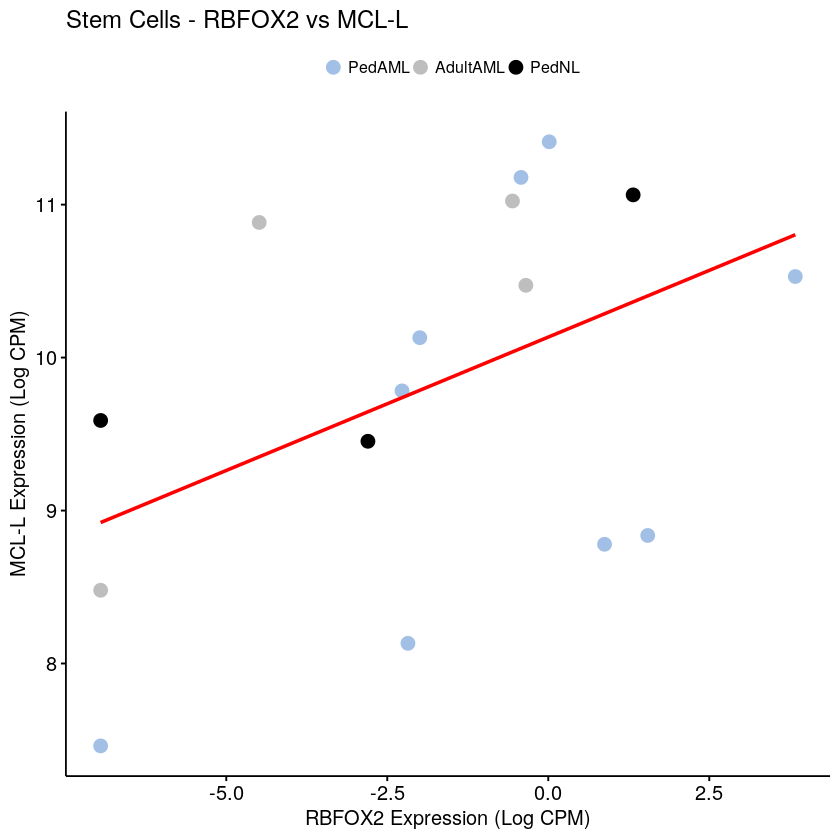

In [198]:
lcpm.Stem.RBFOX.MCL.L <- cbind(lcpm.Stem.RBFOXs[match(rownames(X.tx.lcpm.Stem.df), paste0("X", lcpm.Stem.RBFOXs$Sample)),], 
    MCL.L =as.numeric(as.character(X.tx.lcpm.Stem.df$MCL1.L)))
lcpm.Stem.RBFOX.MCL.L
lcpm.Stem.RBFOX.MCL.L.lm <- lm(MCL.L ~ RBFOX2, data=lcpm.Stem.RBFOX.MCL.L)
summary(lcpm.Stem.RBFOX.MCL.L.lm)
ggscatter(lcpm.Stem.RBFOX.MCL.L, x ="RBFOX2", y="MCL.L", color="Phenotype", palette=c("#A2C0E5", "gray", "black"),
                   title = 'Stem Cells - RBFOX2 vs MCL-L', size=3.5) +
          stat_smooth(method="lm", se=FALSE, col="red") + 
          #scale_shape_manual(values=c(16,17,15,18)) + 
          ylab(paste0("MCL-L Expression (Log CPM)")) + xlab("RBFOX2 Expression (Log CPM)") + 
          theme(legend.title=element_text(size=0))
          #stat_smooth(method="lm", se=FALSE, col="black") 
          #guides(colour = guide_legend(override.aes = list(size=4))))

SequenceRun                                                SequenceDate
1  ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91 5/5/19      
2  ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91 5/5/19      
3  ca_ne_586_001_400_000_JAMIESON_SR_human-ensembl-grch38-r91 5/5/19      
4  ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91 6/26/19     
7  ca_ne_630_001_400_060_JAMIESON_SN_human-ensembl-grch38-r91 8/31/19     
8  ca_ne_630_001_400_060_JAMIESON_SN_human-ensembl-grch38-r91 8/31/19     
11 ca_ne_645_001_300_060_JAMIESON_SN_human-ensembl-grch38-r91 8/31/19     
12 ca_ne_650_001_360_060_JAMIESON_SN_human-ensembl-grch38-r91 9/1/19      
13 ca_ne_650_001_360_060_JAMIESON_SN_human-ensembl-grch38-r91 9/1/19      
5  ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91 6/26/19     
6  ca_ne_618_001_400_070_JAMIESON_SR_human-ensembl-ghrc38-r91 6/26/19     
9  ca_ne_645_001_300_060_JAMIESON_SN_human-ensembl-grch38-r91 8/31/19     
10 ca_ne_645_001_300_060_JAMIESON_SN_human-ensembl-grch38-r91 8/31/19     
14 ca_ne_714_001_400_070_JAMIESON_SN_human-ensembl-grch38-r91 12/19/19    
15 ca_ne_714_001_400_070_JAMIESON_SN_human-ensembl-grch38-r91 12/19/19    
16 ca_ne_714_001_400_070_JAMIESON_SN_human-ensembl-grch38-r91 12/19/19    
   Sample            SampleName Patient.ID RIN  X        Adult.Pediatric
1  01id38cellHSC     38 HSC     32538      10.0 PedAML   Pediatric      
2  cell05id90HSC     90 HSC     22390      10.0 PedAML   Pediatric      
3  03id78cellHSC     78 HSC     28678      10.0 PedAML   Pediatric      
4  05id00066HSC      66 HSC     22666       7.7 PedAML   Pediatric      
7  02x11379xHSCxxxxx 11379 HSC  11379       9.6 PedAML   Pediatric      
8  04x00068xPLUSMINS  68PlMn    11868       6.8 PedAML   Pediatric      
11 12x12484xPLUSMINS 12484 PlMn 12584       9.9 PedAML   Pediatric      
12 13x12488xPLUSMINS 12488 PlMn 12488       7.8 PedAML   Pediatric      
13 16x12451xPLUSMINS 12451 PlMn 12451       8.7 PedAML   Pediatric      
5  04id11474HSC      11474 HSC  11474      10.0 AdultAML Adult          
6  02id11251HSC      11251 HSC  11251       9.3 AdultAML Adult          
9  08x00020xPLUSMINS 20 PlMn    11220       7.3 AdultAML Adult          
10 10x00082xPLUSMINS 82 PlMn    12682       9.9 AdultAML Adult          
14 01pid24760ctHSC   24760 HSC  24760       9.1 PedNL    Pediatric      
15 03pid24474ctHSC   24474 HSC  24474      10.0 PedNL    Pediatric      
16 05pid25376ctHSC   25376 HSC  25376       8.8 PedNL    Pediatric      
   Disease      Cell.type Sorted.Cell.Type Tissue.Source RNA.seq.status
1  AML          Stem      34+38-           PB            Completed     
2  AML          Stem      34+38-           BM            Completed     
3  AML          Stem      34+38-           PB            Completed     
4  AML          Stem      34+38-           BM            Completed     
7  AML          Stem      34+38-           PB            Completed     
8  AML          Stem      34+38-           PB            Completed     
11 AML          Stem      34+38-           PB            Completed     
12 AML          Stem      34+38-           PB            Completed     
13 AML          Stem      34+38-           PB            Completed     
5  AML          Stem      34+38-           PB            Completed     
6  AML          Stem      34+38-           BM            Completed     
9  AML          Stem      34+38-           BM            Completed     
10 AML          Stem      34+38-           BM            Completed     
14 non-leukemic Stem      34+38-           BM            Completed     
15 non-leukemic Stem      34+38-           BM            Completed     
16 non-leukemic Stem      34+38-           BM            Completed     
   Reads     Phenotype RBFOX2      MCL.L    
1   81234305 PedAML    -1.99476269 10.130090
2   72625632 PedAML     3.83614386 10.529926
3   68483294 PedAML    -2.27097182  9.782496
4   77519907 PedAML    -6.95097499  7.461370
7  101108249 PedAML     0.01511464 11.


Call:
lm(formula = MCL.L ~ RBFOX2, data = subset(lcpm.Stem.RBFOX.MCL.L, 
    Phenotype != "AdultAML"))

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4073 -1.2285  0.1443  0.8919  1.4667 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.9414     0.3579   27.77  8.5e-11 ***
RBFOX2        0.1846     0.1055    1.75    0.111    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.14 on 10 degrees of freedom
Multiple R-squared:  0.2344,	Adjusted R-squared:  0.1578 
F-statistic: 3.061 on 1 and 10 DF,  p-value: 0.1107


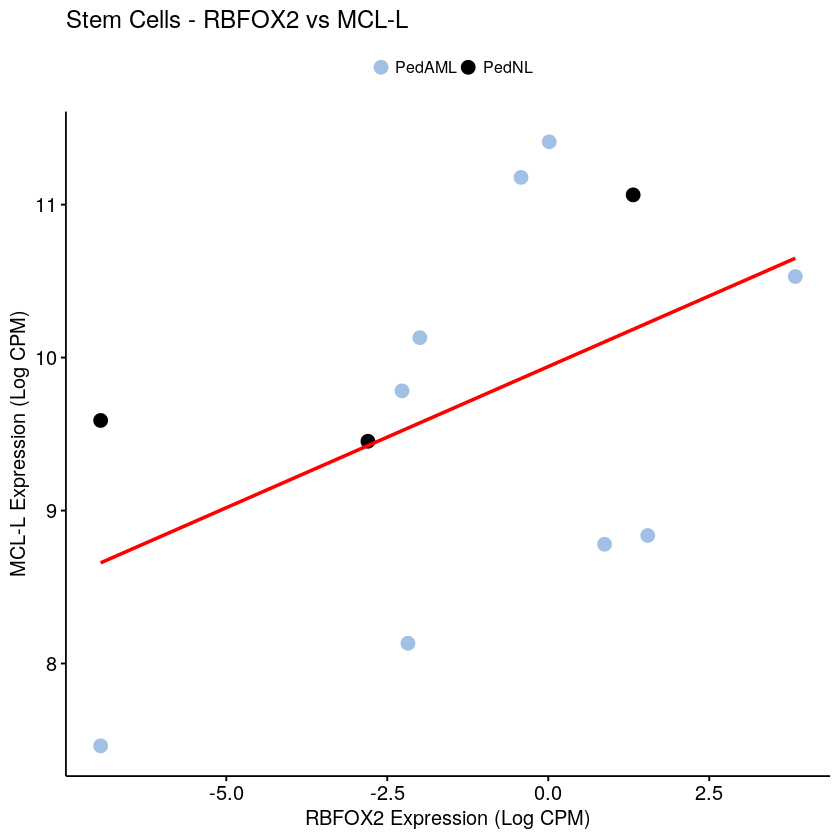

In [202]:
lcpm.Stem.RBFOX.MCL.L <- cbind(lcpm.Stem.RBFOXs[match(rownames(X.tx.lcpm.Stem.df), paste0("X", lcpm.Stem.RBFOXs$Sample)),], 
    MCL.L =as.numeric(as.character(X.tx.lcpm.Stem.df$MCL1.L)))
lcpm.Stem.RBFOX.MCL.L
lcpm.Stem.RBFOX.MCL.L.lm <- lm(MCL.L ~ RBFOX2, data=subset(lcpm.Stem.RBFOX.MCL.L,Phenotype != "AdultAML"))
summary(lcpm.Stem.RBFOX.MCL.L.lm)
ggscatter(subset(lcpm.Stem.RBFOX.MCL.L,Phenotype != "AdultAML"), x ="RBFOX2", y="MCL.L", color="Phenotype", palette=c("#A2C0E5","black"),
                   title = 'Stem Cells - RBFOX2 vs MCL-L', size=3.5) +
          stat_smooth(method="lm", se=FALSE, col="red") + 
          #scale_shape_manual(values=c(16,17,15,18)) + 
          ylab(paste0("MCL-L Expression (Log CPM)")) + xlab("RBFOX2 Expression (Log CPM)") + 
          theme(legend.title=element_text(size=0))
          #stat_smooth(method="lm", se=FALSE, col="black") 
          #guides(colour = guide_legend(override.aes = list(size=4))))